# Base Setting

In [1]:

# --i
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm


font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)


# font = {'family' : 'SimHei',
#         'size'   : 28}
# matplotlib.rc('font', **font)

config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [ ]:
# Package
# --begin--
# platform
platform = 'group'
# platform = 'old'

# --Import--
# Common
import os
import sys
import time
import pandas as pd
import numpy as np

import math
from math import log, e

from datetime import date, timedelta

# DataProcessing
# file
# import openpyxl
import xlrd

# pyspark
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql import functions as pyspark_f
# from pyspark.sql.functions import sum,expr,count,col,lit,isnull,when,countDistinct,rand,asc,array,udf,concat,concat_ws

# from pyspark.ml.feature import OneHotEncoder, StringIndexer
# from pyspark.sql.types import StringType,IntegerType,FloatType,LongType,ArrayType

import shutil
from multiprocessing import Pool
import xlrd

# feat
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler, StandardScaler, MaxAbsScaler,Normalizer

# time series anomaly detection
# from pylab import rcParams
# from PyAstronomy import pyasl
# import pyculiarity
# from pyculiarity import detect_ts
# from pyculiarity.date_utils import format_timestamp
# import sesd
# from statsmodels.tsa.seasonal import seasonal_decompose,STL
from pandas.plotting import register_matplotlib_converters

# Model
import pickle
from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.decomposition import PCA

import torch
# import torch.tensor
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data
from torch.autograd import Variable
from collections import OrderedDict

# model
# ml
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,\
    BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,VotingClassifier

from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import lightgbm as lgb
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.ensemble import IsolationForest
# from sklearn.cluster import DBSCAN
# # dl
# from torch import nn, einsum
# from random import random,randint
# from numpy import array,argmax
# from keras.models import Sequential
# from keras.layers import LSTM,Dense,Conv2D,Conv1D,MaxPooling2D,MaxPooling1D,Flatten,TimeDistributed,Dropout
# from keras.metrics import accuracy,binary_accuracy

# import tensorflow as tf

# from sklearn.model_selection import StratifiedKFold

# if platform == 'group':
#     from einops import rearrange, repeat
#     from einops.layers.torch import Rearrange

# # hyperparameter
# # import optuna
# # from optuna.trial import TrialState

# # metrics
# from sklearn.metrics import accuracy_score,precision_score,recall_score,\
#     mean_squared_error,log_loss,classification_report,confusion_matrix,\
#     roc_curve,roc_auc_score,average_precision_score,precision_recall_curve

# #,plot_precision_recall_curve

# # visualization
# import matplotlib.pyplot as plt
# import matplotlib.cbook as cbook
# import matplotlib
# font = { 'size'   : 24}
# matplotlib.rc('font', **font)

# import seaborn as sns
# from statsmodels.distributions.empirical_distribution import ECDF
# # import statsmodels.api as ssm
# # import scipy
# # from scipy.stats import f
# # import scipy.stats as stats
# # # additional packages
# # from statsmodels.stats.diagnostic import lilliefors

# # other
# import gc
# # import dill
# from pdb import set_trace as st
# import profile
# import random
# import joblib
# # import warnings
# # warnings.filterwarnings("ignore", category=FutureWarning)

# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# --Endings--

In [ ]:
# --Function--
# Common
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame得分
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
        print(f'pkl2df:{file} succeeded')
    except:
        print(f'pkl2df:{file} failed')
    return df

def xlsx2df(filename,path='default'):
    '''
    .xlsx->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.xlsx'
    print(f'filename:{file}')
    df = None
    try:
        df = pd.read_excel(file, engine='openpyxl')
        print(f'xlsx2df:{file} succeeded')
    except Exception as e:
        print(f'xlsx2df:{file} failed')
        print(e)
    return df    
def csv2df(filename,path='default'):
    '''
    .csv->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.csv'
    print(f'filename:{file}')
    df = None
    try:
        # df = pd.read_csv(file)
        # df = pd.read_csv(file, encoding='utf-8')
        # df=pd.read_csv(file,encoding='ISO-8859-1')
        df=pd.read_csv(file,encoding='GBK')
        # df = pd.read_csv(file, encoding="windows_1258")
        print(f'csv2df:{file} succeeded')
    except Exception as e:
        print(f'csv2df:{file} failed')
        print(e)
    return df
    
def check_file(filename=None,path='default',size_min=0):
    '''
    Check Attribute of File        
    查看工作目录下各个文件及大小
    '''
    if path == 'default':
        global save_path
        path = save_path
        # print(path)
    cur_file_list = os.listdir(path)
    cur_file_list = sorted(cur_file_list,key= lambda i:i[0])
    if filename is None:
        for file in cur_file_list:
            size = os.path.getsize(path + str(file))
            size = size / (2**20)
            if size > size_min:
                print(file,end ='--')
                print(f'{size:.2f} MB')
    else:
        for file in cur_file_list:
            if filename in file:
                size = os.path.getsize(path + str(file))
                size = size / (2**20)
                if size > size_min:
                    print(file,end ='--')
                    print('%.2f'%size)
                    # print(size // (2**20))

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    df = pd.DataFrame(df)
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        # print(df.columns)
        print(df.info(verbose = True, null_counts = True))
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    df = pd.DataFrame(df)
    print(df.head(rows))
    
    print('**********************************')

def check_all(df,rows=10):
    print("*******************start check_all**************************")
    check_format(df)
    check_detail(df, rows=rows)
    
def check_module():
    import pkgutil
    # print(pkgutil.iter_modules())
    for x in list(pkgutil.iter_modules()):
        print(x[1])
    
def pandasdf2sparkdf(pandas_df):
    '''
    PandasDF2SparkDF
    '''
    # for col in pandas_df.columns:
    #     if ((pandas_df[col].dtypes != np.int64) and (pandas_df[col].dtypes != np.float64)):
    #         # pandas_df[col] = pandas_df[col].fillna('')
    #         pandas_df[col].fillna('',inplace=True)
    
    # print(pandas_df.info(verbose=True))        
    spark_df = spark.createDataFrame(pandas_df)
    return spark_df,pandas_df

def sparkdf2hive(spark_df,target_table):
    spark_df.createOrReplaceTempView('TempTable')
    sqlContext.sql("insert overwrite table " + target_table + " select * from TempTable")
    print('sparkdf2hive success')

def simple_parquet2sparkdf(filename, mode='no_check'):
    print(f'----------------start reading {filename}----------------')
    spark_df = spark.read.format("parquet").option("inferSchema","true").option("header",'true').load(filename)
    if mode == 'check':
        check_spark_df(spark_df)
    print('----------------read successfully-----------')    
    return spark_df    
    
def parquet2sparkdf(user_type, table_type, date, version, mode='no_check'):
    
    # filename = filename + '.parquet'
    filename = get_filename(user_type,table_type,date,version,'.parquet')
	# filename = './qk/' + filename
    print(f'----------------start reading {filename}----------------')
    spark_df = spark.read.format("parquet").option("inferSchema","true").option("header",'true').load(filename)
    if mode == 'check':
        check_spark_df(spark_df)
    print('----------------read successfully-----------')    
    return spark_df

def sparkdf2parquet(df, user_type, table_type, date, version):
    
    # filename = filename + '.parquet'
    filename = get_filename(user_type,table_type,date,version,'.parquet')
	# filename = './qk/' + filename
    print(f'----------------start writing {filename}----------------')
    df.write.format('parquet').mode('overwrite').save(filename)
    print('----------------write successfully-----------')
    
def pandasdf_fillna_number(pandas_df):
    for col in pandas_df.columns:
        if ((pandas_df[col].dtypes == np.int64) or (pandas_df[col].dtypes == np.float64)):
            pandas_df[col].fillna(0,inplace=True)
    return pandas_df

def set_deal_filename(file_selection,file_suffix='.parquet'):
    deal_filename = file_selection + file_suffix
    deal_filename_backup = deal_filename[:-len(file_suffix)] + '_backup' + file_suffix
    return deal_filename,deal_filename_backup
    
# DataProcessing
def feats2cols(feat_list):
    '''
    SQL
    '''
    key = feat_list[0] # key is the first feat by default
    cols = ""
    for feat in feat_list:
        cols+=feat+','
    cols = cols[:-1] # remove the last comma
    return key,cols

def unqiue_element_num(x):
    a = len(np.unique(x))
    return a    
    
def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print(f'file:{file} has been saved in {save_path}')
    pickle.dump(df,open(file,'wb'))
    return None

def remove_file(file,path='default',mode='rm'):
    '''
    check and clean space
    '''
    if path == 'default':
        global save_path
        path = save_path
        # print(path)
    cur_file_list = os.listdir(path)
    for cur_file in cur_file_list:
        if file == cur_file:
            remove_file = path+cur_file
            if mode == 'check':
                print(remove_file)
            elif mode == 'rm':
                os.remove(remove_file)
                # os.unlink(path)
                print('success')
                
def pkl2pkl(src_file,tar_file,path='default',mode='no_bak'):
    '''
    Pkl->Pkl
    mode:
        del
        no_bak
    '''
    if path == 'default':
        global save_path
        path = save_path
    df = pkl2df(src_file,path)
    df2pkl(df,tar_file,path,mode)
    if mode == 'del':
        remove_file(src_file,path)
    return     

    
    
def pkls2pkl(src_file_list,tar_file,path='default'):
    '''
    # Pkls->Pkl
    '''
    if path == 'default':
        global save_path
        path = save_path
    df = pd.DataFrame()
    for src_file in src_file_list:
        tmp_df = pkl2df(src_file,path)
        df = pd.concat([tmp_df,df],ignore_index=True)
    df2pkl(df,tar_file,path)
    return        

def lists2list(lists):
    extended_list = []
    for single_list in lists:
        extended_list.extend(single_list)
    single_set = set(extended_list)
    extended_list = list(single_set)
    return extended_list

def list2uniquelist(input_list):
    single_set = set(input_list)
    unique_list = list(single_set)
    return unique_list
    
def cal_gb(num):
    return num/1024/1024/1024
    
def check_memory():
    '''
    Check Memory
    '''
    mem = virtual_memory()
    total = cal_gb(mem.total)# total physical memory available
    print('total:'+str(total))
    available = cal_gb(mem.available)# total physical memory available
    print('available:'+str(available))


def check_disk_usage(path='default'):
    '''
    Check Hard Disk
    '''
    if path == 'default':
        global save_path
        path = save_path
    print(path)
    total, used, free = shutil.disk_usage(path)
    print("Total: %d GiB" % (total // (2**30)))
    print("Used: %d GiB" % (used // (2**30)))
    print("Free: %d GiB" % (free // (2**30)))

def show_file(file_dir='default'):
    if file_dir == 'default':
        global save_path
        file_dir = save_path
        # print(path)
    for root, dirs, files in os.walk(file_dir):
        print('root_dir:', root)  # 当前目录路径
        print('sub_dirs:', dirs)  # 当前路径下所有子目录
        print('files:', files)  # 当前路径下所有非目录子文件



# feat
def sub_binned_entropy(series,period=30,bin_num=7):
    '''
    计算某一特征的时间序列在等距分箱下的信息熵
    '''
    # pandas version
    # Variable Statement
    #  Args
    base=2
    # bin_num = 7
    # period = 30
    # minor_action = 1e-6 # 最小作用量
    
    #  Intermediate Variables
    valid_val = 0
    count_dict = {}
    
    # Output
    entropy = 0
    
    # Calculate the binned entropy
    bin_list = list(pd.cut(series,bin_num,labels=False)) #labels=False 返回分箱后的箱子序号序列
    for bin in bin_list:
        if bin in count_dict.keys():
            count_dict[bin] += 1
        else:
            count_dict[bin] = 1
    
    for val in count_dict.values():
        p = float(val/period)
        entropy -= p*math.log(p,base)
        valid_val += val
    
    # Validation
    if valid_val != period:
        print('valid_val:{} is not equal to period:{}'.format(valid_val,period))
        #todo try-catch
        return None
    
    # series['binned_entropy_'+str(bin_num)] = entropy # ValueError: Length of passed values is 30, index implies 31.
    # print('series.values:{}'.format(series.values))
    # print('bin_list:{}'.format(bin_list))
    # print('entropy:{}'.format(entropy))

    return entropy

def apply_entropy(df,feat,month='202004',bin_num=7):
    start = time.time()
    
    global month_period_dict
    period=month_period_dict[int(month[-2:])]
    # Feat Series collection
    feat_list = []
    for day in range(1,period+1,1):
        if day <10:
            day = '0' + str(day)
        else:
            day = str(day)
        feat_list.append(month+day+'_'+feat)    
    df = df[feat_list]
    entropy = df.apply(sub_binned_entropy,args=(period,bin_num),axis='columns')
    
    print('time cost:{}'.format(time.time()-start))
    # col = '202004_tgps_count_entropy'
    # print(df.groupby(col)[col].describe())# 显示分组后的数据分布
    # df = df[col]
    # check_format(df)
    return entropy

def sub_extract_time(df,col):
    # df['year'] = int(df[col][:4])
    # df['month'] = int(df[col][4:6])
    df['day'] = int(df[col][6:8])
    # df['hour'] = int(df[col][8:10])
    # df['min'] = int(df[col][10:12])
    # df['sec'] = int(df[col][12:14])
    return df

def apply_extract_time(df,feat):
    start = time.time()
    df = df.apply(sub_extract_time,args=(feat,),axis='columns')
    print(f'time cost of function apply_extract_time:{time.time()-start}')
    return df

def extract_time(df,col):
    # df['year'] = int(df[col][:4])
    # df['month'] = int(df[col][4:6])
    # df['day'] = int(df[col][6:8])
    # df['hour'] = int(df[col][8:10])
    # df['min'] = int(df[col][10:12])
    # df['sec'] = int(df[col][12:14])
    # df['year'] = df[col][:4]
    # df['month'] = df[col][4:6]
    # df['day'] = df[col][6:8]
    # df['hour'] = df[col][8:10]
    # df['min'] = df[col][10:12]
    # df['sec'] = df[col][12:14]
    return df
    
def set_limit(record_num):
    return f'limit {record_num}'

# --EDA--
# cdf
def plot_cdf(bl,xlabel='Day tgps_count Entropy',max_val=float('inf'),ylabel='CDF'):
    ecdf = ssm.distributions.ECDF(bl)
    x =np.linspace(min(bl), min(max(bl),max_val))
    y = ecdf(x)
    fig, ax = plt.subplots(figsize=(20, 12))

    ax.plot(x,y)
    
    ax.set_xlabel(xlabel)
    # ax.set_ylabel(ylabel)
    ax.set_ylabel("CDF")
    ax.grid(True)
    plt.show()

def plot_hist(bl,xlabel='Day tgps_count Entropy',num_bins = 50,max_val=float('inf')):
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.hist(bl, bins = num_bins, density=True, range=[min(bl), min(max(bl),max_val)],facecolor='gray',align='mid')
    ax.set_xlabel(xlabel)
    plt.show()
    
def plot_cdf_hist(bl,xlabel='Day tgps_count Entropy',max_val=float('inf'),num_bins = 50,ylabel='CDF'):
    ecdf = ssm.distributions.ECDF(bl)
    x =np.linspace(min(bl), min(max(bl),max_val))
    y = ecdf(x)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    ax_twinx = ax.twinx()

    ax_twinx.hist(bl, bins = num_bins, density=True, range=[min(bl), min(max(bl),max_val)],facecolor='gray',align='mid',zorder=1)
    ax.plot(x,y,zorder=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("CDF")
    ax_twinx.set_ylabel("Probability Density")
    ax.grid(True)
    # ax.set_xlim(0,min(max(bl),max_val))
    ax.set_ylim(0,1)
    # ax_twinx.set_ylim(0,0.00175)
    plt.show()    
    
def plot_cdf_two(df1, df2, col):
    fst_ecdf = ssm.distributions.ECDF(df1[col])
    fst_x = np.linspace(0, df1[col].max())
    fst_y = fst_ecdf(fst_x)
    plt.plot(fst_x, fst_y, linewidth='1', color='red')
    print(col + '_mean: ', df1[col].mean())
    
    scd_ecdf = ssm.distributions.ECDF(df2[col])
    scd_x = np.linspace(0, df2[col].max())
    scd_y = scd_ecdf(scd_x)
    plt.plot(scd_x, scd_y, linewidth='1', color='blue')
    print(col + '_mean: ', df2[col].mean())
    
    x_max = max(df1[col].max(),df2[col].max())
    plt.title(col+' CDF', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Distributions', fontsize=16)
    plt.legend(['normal_'+col,'lost_'+col], fontsize=16)
    plt.xlim(0, x_max)
    plt.ylim(0, 1)
    plt.show()
# heatmap
    
# --Encoding--
def onehot_encoding(df,feat_list,mode='save'):
    '''
    One-of-K encoding on an array of length K  ??
    Basic method: Used with most linear algorithms  ??
    Dropping first column avoids collinearity ??
    Sparse format is memory-friendly  ??
    Most current implementations don't gracefully treat missing, unseen variables how to avoid it
    '''
    func_suffix = ''
    onehot_encoder = OneHotEncoder(sparse=False)
    if mode == 'save':
        func_suffix = '_onehot'
    for feat in feat_list:
        np_feat = df[feat].values
        np_feat = np_feat.reshape(-1,1)
        # print(np_feat)
        feat_onehot_encoded=onehot_encoder.fit_transform(np_feat)
        feat_onehot_encoded = pd.DataFrame(feat_onehot_encoded)
        # print(feat_onehot_encoded)
        for index,col in enumerate(feat_onehot_encoded.columns):
            # print(feat_onehot_encoded[col])
            df[feat+func_suffix+str(index)] = feat_onehot_encoded[col]
    return df

# def onehot_encoding_spark(df,feat_list):
#     for feat in feat_list:
#         string_indxr =  StringIndexer().setInputCol(feat).setOutputCol(feat+'_ind')
#         # feat_ind = string_indxr.fit(df).transform(df.select(feat))
#         feat_ind = string_indxr.fit(df.select(feat)).transform(df.select(feat))
#         one_hot_encoder = OneHotEncoder().setInputCol(feat_ind).setOutputCol(feat+'_onehot')
#         tmp = one_hot_encoder.transform(feat_ind)
#         tmp.show()
#     return df    

def onehot_encoding_spark(df,cols):
    '''
    for non-tree-based model:logistic,svm,nn
    '''
    new_df = df
    num = 0
    total = len(cols)
    print('onehot_encoding has started')
    for col in cols:
        num += 1
        print(f"{num}/{total} feature is string indexing:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        string_indexer = StringIndexer(inputCol = col, outputCol = col + "_index")
        new_df = string_indexer.fit(new_df).transform(new_df).drop(col)
        new_df = new_df.withColumnRenamed(col + '_onehot', col)
        # new_df.show()
        # print(f'col:{col}')
        print(f"{num}/{total} feature is onehot encoding:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        onehot_encoder = OneHotEncoder(inputCol = col, outputCol = col + "_onehot", dropLast = False)
        new_df = onehot_encoder.transform(new_df)
        # new_df = onehot_encoder.transform(new_df).drop(col)
        # new_df = new_df.withColumnRenamed(col + '_onehot', col)
        # new_df.withColumn('update_time',time.strftime('%Y-%m-%d %H:%M:%S'))
        # new_df.show()
    print('onehot_encoding has finished')
    return new_df
    
def label_encoding(df,feat_list,mode='save'):
    '''
    Give every categorical variable a unique numerical ID
    Useful for non-linear tree-based algorithms
    Does not increase dimensionality
    Randomize the cat_var -> num_id mapping and  retrain, average, for small bump in accuracy
    '''
    func_suffix = ''
    le = LabelEncoder()
    if mode == 'save':
        func_suffix = '_label'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        le.fit(df[feat])
        df[enc_feat]=le.transform(df[feat])
    return df

# def label_encoding_spark(df,cols,mode='fit',encoder_list=[]):
#     new_df = None
#     total = len(cols) - 1
#     print('label_encoding has started')
#     encoder = None
#     for i,col in enumerate(cols):
#         if mode == 'fit':
#             print(f"{i}/{total} feature is string fitting:{time.strftime('%Y-%m-%d %H:%M:%S')}")
#             print(f'col:{col}')            
#             encoder = StringIndexer(inputCol = col, outputCol = col + "_index")
#             # encoder = StringIndexer.setInputCol(col).setOutputCol(col+"_index")
#             encoder.fit(df)
#             encoder_list.append(encoder)
#         elif mode == 'transform':
#             print(f"{i}/{total} feature is string indexing:{time.strftime('%Y-%m-%d %H:%M:%S')}")
#             print(f'col:{col}')            
#             encoder = encoder_list[i]
#             print(f'type:{type(encoder)}')
#             new_df = encoder.transform(df)
#             print('start renaming')
#             new_df = new_df.withColumnRenamed(col + '_index', col)
#         # new_df.show()
#         # print(f'col:{col}')
#     print('label_encoding has finished')
#     if mode == 'fit':
#         return encoder_list
#     elif mode == 'transform':
#         return new_df    

def label_encoding_spark(src_df,tar_df,cols):
    # new_df = tar_df
    total = len(cols) - 1
    print('label_encoding has started')
    for i,col in enumerate(cols):
        print(f"{i}/{total} feature is string fitting:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f'col:{col}')            
        encoder = StringIndexer(inputCol = col, outputCol = col + "_index")
        # encoder = StringIndexer.setInputCol(col).setOutputCol(col+"_index")
        tar_df = encoder.fit(src_df).transform(tar_df)
        # check_spark_df(tmp_df)
        # new_df = new_df.withColumn(colName=col+'_index',col=tmp_df.select(col+'_index'))
        # encoded_col = col + '_index'
        # selected_col = tmp_df.select(tmp_df[encoded_col])
        # # selected_col = tmp_df.select(tmp_df.columns[-1])
        # print(f'type(selected_col):{type(selected_col)}')
        
        # # new_df = new_df.join()
        # new_df = new_df.withColumn(colName=col+'_index',col=lit(selected_col))
        # print('start renaming')
        # new_df = new_df.withColumnRenamed(col + '_index', col)
        # new_df.show()
        # print(f'col:{col}')
    print('label_encoding has finished')
    return tar_df   
    
def sub_round_encoding(series,feat,enc_feat):
    series[enc_feat]=int(round(series[feat]))
    return series
    
def round_encoding(df,feat_list,mode='save'):
    func_suffix = ''
    if mode == 'save':
        func_suffix = '_round'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        df= df.apply(sub_round_encoding,axis=1,args=(feat,enc_feat,))
    return df

def round_encoding_spark(df,cols):
    total = len(cols) - 1
    print('round_encoding has started')
    for i,col in enumerate(cols):
        print(f"{i}/{total} feature is encoding:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f'col:{col}')
        df = df.withColumn(col+'_round', df[col].cast(IntegerType()))

    print('round_encoding has finished')
    return df     
    
# def target_encoding(df,feat_list,mode='save'):
#     '''
#     Do in cross-validation manner
#     Add smoothing to avoid setting variable encodings to 0.
#     Add random noise to combat overfit
#     '''
#     func_suffix = ''
#     tar_feat='is_halted_next_month'
#     if mode == 'save':
#         func_suffix = '_target'
#     for feat in feat_list:
#         enc_feat = feat+func_suffix
#         df[enc_feat]=0
#         uniq_vals = set(df[feat].values)
#         # print(uniq_vals)
#         for val in uniq_vals:
#             # print('start cal val')
#             # print(val)
#             sample = df[df[feat]==val]
#             # print(sample.shape)
#             pos = sample[sample[tar_feat]==1]
#             # print(pos.shape)
#             tar_ratio = pos.shape[0]/sample.shape[0]
#             # print(tar_ratio)
#             # sample[enc_feat] = tar_ratio
#             df.loc[df[feat]==val,[enc_feat]]=tar_ratio
#     return df
def target_encoding(df,feat_list,mode='save'):
    '''
    Do in cross-validation manner
    Add smoothing to avoid setting variable encodings to 0.
    Add random noise to combat overfit
    '''
    func_suffix = ''
    tar_feat='is_halted_next_month'
    if mode == 'save':
        func_suffix = '_target'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        statistics_df = df.groupby(feat).agg(churner_num=pd.NamedAgg(column=tar_feat,aggfunc='sum'),group_user_num = pd.NamedAgg(column=feat,aggfunc='count'))
        # check_format(statistics_df)
        # check_detail(statistics_df)
        df = df.merge(statistics_df,how='left',on=feat)
        df.rename(columns={'churner_num':enc_feat+'_churner_num','group_user_num':enc_feat+'_group_user_num'},inplace=True)
        # check_format(df,'cols')
        df[enc_feat]=df[enc_feat+'_churner_num']/df[enc_feat+'_group_user_num']
    return df

def target_encoding_spark(df,feat_list,tar_feat,mode='save'):
    func_suffix = ''
    total = len(feat_list) - 1
    print('target_encoding has started')    
    if mode == 'save':
        func_suffix = '_target'
    for i,feat in enumerate(feat_list):
        print(f"{i}/{total} feature is encoding:{time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f'feat:{feat}')
        enc_feat = feat+func_suffix
        user_group_df = df.groupBy(feat).count().withColumnRenamed("count",'tmp_group_user_num')

        churner_group_df = df.groupBy(feat).sum(tar_feat).withColumnRenamed(f"sum({tar_feat})",'tmp_group_churner_num')
        
        check_spark_df(user_group_df)
        check_spark_df(churner_group_df)
        
        join_expression = df[feat] == user_group_df[feat]
        join_type="inner"
        
        # df = df.join(user_group_df,join_expression,join_type)
        df=df.join(user_group_df,[feat])
        df=df.join(churner_group_df,[feat])
        # df[enc_feat]=df.select(col('tmp_group_user_num')/col('tmp_group_churner_num'))
        df=df.withColumn(enc_feat,col('tmp_group_churner_num')/col('tmp_group_user_num'))
        check_spark_df(df,10,[enc_feat,feat,'tmp_group_user_num','tmp_group_churner_num'])
        
        df=df.drop('tmp_group_user_num','tmp_group_churner_num')
        
        # df = df.merge(statistics_df,how='left',on=feat)
        # df.rename(columns={'churner_num':enc_feat+'_churner_num','group_user_num':enc_feat+'_group_user_num'},inplace=True)
        # # check_format(df,'cols')
        # df[enc_feat]=df[enc_feat+'_churner_num']/df[enc_feat+'_group_user_num']
    print('target_encoding has finished')
    return df    

def period_generator(month='202004',period=None,start=None):
    global month_period_dict
    if period is None:
        period = month_period_dict[int(month[-2:])]
    period_list = []
    if start is None:
        start = 1
    for day in range(start,start+period,1):
        if day < 10:
            day = '0' +str(day)
        else:
            day = str(day)
        period_feat = month+day
        period_list.append(period_feat)
    return period_list

        
def period_feat(feat='byte_in',month='202004',period=30):
    period_feat_list = []
    for day in range(1,period+1,1):
        if day < 10:
            day = '0' +str(day)
        else:
            day = str(day)
        period_feat = month+day+'_'+feat
        period_feat_list.append(period_feat)
    return period_feat_list

def records2statistics(records,day,kind='cdr',gran='day'):
    statistics = None
    if kind == 'traffic':
        
        addition_sum = records.groupby(by=['prod_inst_id']).sum()
        addition_sum.rename(columns={'byte_in':day+'_byte_in','byte_out':day+'_byte_out','duration':day+'_duration'},inplace=True)
        # check_format(addition_sum)
        # check_detail(addition_sum)
    
        record = pd.DataFrame(records.groupby(by=['prod_inst_id']).size())
        record.rename(columns={0:day+'_record_num'},inplace=True)
        # check_format(record)
        # check_detail(record)
        
        statistics = addition_sum.join(record,how='left',on='prod_inst_id')
        statistics.reset_index(inplace=True)
        statistics.rename({'index':'prod_inst_id'},inplace=True)
        # check_format(statistics)
        # check_detail(statistics)
        
    elif kind == 'cdr':
        # 'prod_inst_id','acc_nbr','calling_nbr','called_nbr','duration','day_id'
        calling_records = records[records['acc_nbr']==records['calling_nbr']]
        called_records = records[records['acc_nbr']==records['called_nbr']]
        # check_format(calling_records,'simple')
        # check_format(called_records,'simple')
        # check_format(records,'simple')
        
        addition_sum1 = calling_records.groupby(by=['prod_inst_id']).sum()
        addition_sum1.rename(columns={'duration':day+'_calling_duration'},inplace=True)
        addition_sum2 = called_records.groupby(by=['prod_inst_id']).sum()
        addition_sum2.rename(columns={'duration':day+'_called_duration'},inplace=True)
        addition_sum = addition_sum1.merge(addition_sum2,how='outer',on='prod_inst_id')
        # check_format(addition_sum1,'simple')
        # check_format(addition_sum2,'simple')
        # check_format(addition_sum,'simple')
        # check_format(addition_sum)
        # check_detail(addition_sum1)
        # check_detail(addition_sum2)
        # check_detail(addition_sum)
    
        record1 = pd.DataFrame(calling_records.groupby(by=['prod_inst_id']).size())
        record1.rename(columns={0:day+'_calling_record_num'},inplace=True)
        record2 = pd.DataFrame(called_records.groupby(by=['prod_inst_id']).size())
        record2.rename(columns={0:day+'_called_record_num'},inplace=True)
        record = record1.merge(record2,how='outer',on='prod_inst_id')
        # check_format(record1,'simple')
        # check_format(record2,'simple')
        # check_format(record,'simple')
        # # check_format(record)
        # check_detail(record1)
        # check_detail(record2)
        # check_detail(record)
        
        statistics = addition_sum.join(record,how='outer',on='prod_inst_id')
        statistics.reset_index(inplace=True)
        statistics.rename({'index':'prod_inst_id'},inplace=True)
        # check_format(statistics,'simple')
        # check_detail(statistics)
    return statistics

def records2statistics_spark(records,day,kind='cdr',gran='day'):
    '''
    daily_traffic_col_list = ['prod_inst_id','byte_in','byte_out','p_day_id','duration']
    daily_cdr_col_list =['prod_inst_id','acc_nbr','calling_nbr','called_nbr','duration']
    '''
    
    statistics = None
    if kind == 'traffic':
        print('*****spark start:*********')
        # records.printSchema()
        # # records.columns()
        # records.show(10)
        
        # records.filter(col("prod_inst_id") == '920460094277').show(100)
        statistics = records.groupBy('prod_inst_id').agg(sum("byte_in").alias(day+'_byte_in'),count("byte_in").alias(day+'_record_num'),sum("byte_out").alias(day+'_byte_out'),sum("duration").alias(day+'_duration'))
        # statistics = records.groupBy('prod_inst_id').agg(sum("duration").alias(day+'_duration'))                # print(type(group_sum)) # list of rows
        # print(type(group_sum)) # list of rows
        # group_sum.show(10)
        # group_sum.filter(col("prod_inst_id") == '920460094277').show()
    elif kind == 'cdr':
        # calling_records = records.filter(col('acc_nbr') == col('calling_nbr'))
        calling_records = records.filter(col('acc_nbr') == col('calling_nbr_new'))
        # calling_records.show(10)
        # called_records = records.filter(col('acc_nbr') == col('called_nbr'))
        called_records = records.filter(col('acc_nbr') == col('called_nbr_new'))
        # called_records.show(10)
        
        calling_statistics = calling_records.groupBy('prod_inst_id').agg(sum("duration").alias(day+'_calling_duration'),count("duration").alias(day+'_calling_record_num'))
        called_statistics = called_records.groupBy('prod_inst_id').agg(sum("duration").alias(day+'_called_duration'),count("duration").alias(day+'_called_record_num'))
        statistics = calling_statistics.join(called_statistics,"prod_inst_id","outer")
        
    
    return statistics
    
def cal_sequence_feat(kind,table_name,col_list,month='202011'):
    sequence_set = None
    global month_period_dict
    period = month_period_dict[int(month[-2:])]
    start = time.time()
    for i in range(1,period+1,1):
    # for i in range(1,11,1):
    # for i in range(1,3,1):
        # Load raw table data
        # Table Selection
        # table_name = 'hlwk_raw_traffic_21_201101_201107' # 2020年11月1号到7号张家界互联网卡目标用户的原始流量表
        # table_name = 'hlwk_simple_cdr_21_202011' # 2020年11月张家界互联网卡目标用户的简单cdr表
        # table_name = 'hlwk_simple_cdr_2012_quick' # 2020年12月互联网卡目标用户的简单cdr表
        # query_table = personal_database + table_name
        query_table = table_name
        
        #  Columns Selection
        # sql_feat_list = daily_traffic_feat_list
        # sql_feat_list = daily_cdr_col_list
        sql_feat_list = col_list
        key,cols = feats2cols(sql_feat_list)
        
        if i < 10:
            day = month + '0' + str(i)
        else:
            day = month + str(i)
        
        constraint_key = ''
        if kind == 'cdr':
            constraint_key = 'day_id' #fea
        elif kind == 'traffic':
            # constraint_key = 'p_day_id'
            constraint_key = 'day_id'
        constraint_value = day
        
        # limit_mode = 'limit 100'
        query_sql = condition_sql.format(cols,query_table,constraint_key,constraint_value,limit_mode)
        
        #  Execute SQL
        # start = time.time()
        spark_df = spark.sql(query_sql) # type:pyspark.sql.dataframe.DataFrame
        
        # # pandas version fit to 10w
        # #  SparkDF2PandasDF
        # daily_set = spark_df.toPandas()
        # # print('the time cost of function {}: {}s'.format('',time.time()-start))
        # # start = time.time()
        # #  Statistics processing
        # daily_statistics = records2statistics(daily_set,day,kind)

        # #  Feature Conjunction
        # if sequence_set is None:
        #     sequence_set = daily_statistics
        # else:
        #     sequence_set = sequence_set.merge(daily_statistics,how='outer',on='prod_inst_id')
        # print('sequence_set.shape):{}'.format(sequence_set.shape))
        
        # spark version
        daily_statistics = records2statistics_spark(spark_df,day,kind)
        
        if sequence_set is None:
            sequence_set = daily_statistics
        else:
            join_type = 'outer'
            join_expression = sequence_set["prod_inst_id"] == daily_statistics['prod_inst_id']
            # sequence_set = sequence_set.join(daily_statistics,join_expression,join_type)
            sequence_set = sequence_set.join(daily_statistics,"prod_inst_id",join_type)
                
    # sequence_pd_set = sequence_set.toPandas()
    
    # check_format(sequence_pd_set)
    # check_detail(sequence_pd_set)
    # print('the time cost of function {}: {}s'.format('',time.time()-start))
    # # sequence_set.fillna(value=0,inplace=True) # forbidden to deal in model
    # print('sequence_set.shape):{}'.format(sequence_pd_set.shape))
    # print('sys.getsizeof(sequence_set):{}'.format(sys.getsizeof(sequence_pd_set)/1024/1024))

    # return sequence_set,sequence_pd_set
    return sequence_set

# sequential
def cal_sequence_feat_spark(id_table,kind,seq_table,col_list,month='202011'):
    '''
    Input:
        table of prod_inst_id;
        kind of sequential data;
        table of sequential data;
        list of extracted feature;
        month
    Output:
        spark dataframe of sequential statistics of some prod_inst_id set
    '''
    seq_df = None
    period = month_period_dict[int(month[-2:])]
    start = time.time()
    print(f'id_table:{id_table}')
    print(f'seq_table:{seq_table}')

    constraint_key = ''
    if kind == 'cdr':
        constraint_key = 'day_id'
    elif kind == 'traffic':
        constraint_key = 'p_day_id'
        constraint_key = 'day_id'
       
    for i in range(1,period+1,1):
    # for i in range(1,3,1):
        # Load raw table data
        # Table Selection
        query_table = seq_table
        
        #  Columns Selection
        sql_feat_list = col_list
        key,cols = feats2cols(sql_feat_list)
        
        if i < 10:
            day = month + '0' + str(i)
        else:
            day = month + str(i)
        constraint_value = day 
        # limit_mode = 'limit 100'
        
        query_sql = ''
        if id_table == '':
            query_sql = condition_sql.format(cols,query_table,constraint_key,constraint_value,limit_mode)
        else:
            # query_sql = "SELECT {} FROM {} WHERE {} = {} {}".format(cols,query_table,constraint_key,constraint_value,limit_mode)
            # query_sql = 'SELECT a.'+cols+' FROM '+query_table+' a,'+id_table+' b WHERE a.'+constraint_key+' = '+constraint_value+' AND a.prod_inst_id=b.prod_inst_id'
            # query_sql = 'SELECT a.'+cols+' FROM '+query_table+' a,'+id_table+' b WHERE a.'+constraint_key+' = '+constraint_value+' AND a.prod_inst_id=b.prod_inst_id and b.game_app_top1_name=1'
            query_sql = "SELECT a.prod_inst_id,a.day_id,duration FROM user_sjwj.view_tmp_app_exp_event_tgps_202110_apn_15303345281_20201124_001 a,user_sjwj.ic_2107 b WHERE a.day_id = "+constraint_value+" AND a.prod_inst_id=b.prod_inst_id and b.game_app_top1_name=1"          
            
        print(f'query_sql:{query_sql}')    
        
        #  Execute SQL
        spark_df = spark.sql(query_sql) # type:pyspark.sql.dataframe.DataFrame
        
        # spark version
        daily_statistics = records2statistics_spark(spark_df,day,kind)
        
        if seq_df is None:
            seq_df = daily_statistics
        else:
            join_type = 'outer'
            join_expression = seq_df["prod_inst_id"] == daily_statistics['prod_inst_id']
            # sequence_set = sequence_set.join(daily_statistics,join_expression,join_type)
            seq_df = seq_df.join(daily_statistics,"prod_inst_id",join_type)
                
    # check_spark_df(seq_df)
    print(f'the time cost of function: {time.time()-start:.1f}s')
    # print(f'sys.getsizeof(seq_df):{sys.getsizeof(seq_df)/1024/1024:.1f} MB') # not correct
    
    # sequence_set.fillna(value=0,inplace=True) # forbidden to deal in model

    return seq_df
#  SparkDF2Parquet
# def sparkdf2parquet(sparkdf,dst_filename,backup_filename,if_backup='True',file_format='parquet',mode='overwrite'):
#     if if_backup=='TRUE':
#         try:
#             old_sparkdf = spark.read.format(file_format).load(dst_filename)
#         except IOError:
#             print(file_format+'file load failed') # dst file not exists due to save the sparkdf firstly
#             sparkdf.write.format(file_format).mode(mode).save(backup_filename)
#         else:    
#             old_sparkdf.format(file_format).mode(mode).save(backup_filename)
#     sparkdf.write.format(file_format).mode(mode).save(dst_filename)
    

# Model
def standardization(df,feat_list=None,scaler=StandardScaler()):
    '''
    标准化处理 统一函数接口
    func可接受4种标准化函数:MinMaxScaler, StandardScaler, MaxAbsScaler,Normalizer
    '''
    if feat_list is None:
        for feat in df.columns:
            tmp = df[feat].values.reshape(-1,1)
            df[feat] = scaler.fit_transform(tmp)
            joblib.dump(scaler, 'scaler_'+feat+".gz")
    else:
        for feat in feat_list:
            tmp = df[feat].values.reshape(-1,1)
            df[feat] = scaler.fit_transform(tmp)
            joblib.dump(scaler, 'scaler_'+feat+".gz")
    df = pd.DataFrame(df)
    # check_format(df)
    return df
    
def inverse_standardization(df, feat_list):
    # df = pd.DataFrame(np_array)
    for feat in feat_list:
        scaler = joblib.load('scaler_'+feat+".gz")
        df[feat] = scaler.inverse_transform(df[feat].values)
    return df
    
# Define Metrics
def confusion_matrix_reset():
    global tp
    global tn
    global fp
    global fn
    
    tp=0
    fn=0
    tn=0
    fp=0
    
    return



def confusion_matrix_count(series,threshold):
    global tp
    global tn
    global fp
    global fn
    # print('tp:{}'.format(tp),end=' ')
    # print('tn:{}'.format(tn),end=' ')
    # print('fp:{}'.format(fp),end=' ')
    # print('fn:{}'.format(fn))
    ground_truth = series.iloc[0]
    pred_truth = series.iloc[-1]
    
    if ground_truth == 1:
        if pred_truth >= threshold:
            tp += 1
        else:
            fn += 1
    else:
        if pred_truth >= threshold:
            fp += 1
        else:
            tn += 1
    return         

def confusion_matrix_plot():
    global tp
    global tn
    global fp
    global fn
    # print('tp:{}'.format(tp))
    # print('tn:{}'.format(tn))
    # print('fp:{}'.format(fp))
    # print('fn:{}'.format(fn))
    data = pd.DataFrame([[tn,fp],[fn,tp]])
    
    data.rename(index={0:'Normal',1:'Churn'},columns={0:'Normal',1:'Churn'},inplace=True)

    # print('data:{}'.format(data))
    fig, ax= plt.subplots()
    ax = sns.heatmap(data,annot=True,fmt='d', cmap="YlGnBu", linewidths=1.0)
    ax.set_xlabel('Ground Truth',fontsize=20)
    ax.set_ylabel('Predicted Label',fontsize=20)
    return


def f_beta(precision,recall,beta=1):
    ratio = math.pow(beta,2)
    return (1+ratio)*precision*recall/(ratio*precision+recall)  

def class_metrics():
    global tp
    global fn
    global fp
    
    positive_precision = (tp)/(tp+fp)
    positive_recall = (tp)/(tp+fn)
    positive_f1 = f_beta(positive_precision,positive_recall,beta=1)
    # positive_f2 = f_beta(positive_precision,positive_recall)
    
    # print('%.4f' % positive_precision)
    # print('%.4f' % positive_recall)
    # print('%.4f' % positive_f1)
    # print('%.4f' % positive_f2)
    
    # positive_recall = round(positive_recall*100,2)
    # positive_precision = round(positive_precision*100,2)
    # positive_f1 = round(positive_f1*100,2)
    
    positive_recall = round(positive_recall,4)
    positive_precision = round(positive_precision,4)
    positive_f1 = round(positive_f1,4)    
    
    # print(f'recall:{positive_recall:.2f}')
    # print(f'precision:{positive_precision:.2f}')
    
    return positive_f1,positive_recall,positive_precision
    
def auc(y_test,y_pre,mode='plot'):
    # 增加别的roc_auc计算方法 看看这个计算正不正确
    
    # print(f'y_test.shape:{y_test.shape}')
    # print(f'y_test:{y_test[:10]}')
    # print(f'y_pre.shape:{y_pre.shape}')
    # print(f'y_pre:{y_pre[:10]}')
    # print('fpr:{}'.format(fpr))
    # print('tpr:{}'.format(tpr))
    # print('thresholds:{}'.format(thresholds))
    auc = roc_auc_score(y_test, y_pre)
    sota_auc = 0.97
    # print('AUC:{}'.format('%.4f' % auc))
    # auc *= 100
    # print('{:.2f}'.format(auc))
    # if(auc>sota_auc):
    #     print('6666666666 Congratulation New SOTA 6666666666666666')

    if mode=='plot':
        fig, ax= plt.subplots()
        lw = 2
        fpr, tpr, _ = roc_curve(y_test, y_pre)
        ax.plot(fpr, tpr, label="ROC(area ={:.3f})".format(auc), color='darkorange', lw=lw)
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--',lw=lw)
        ax.legend(loc=4, fontsize=10)
        # ax.set_title('User Churn Prediction ROC with '+ model_name +' ',fontsize=14)
        ax.set_xlabel('False Positive Rate',fontsize=20)
        ax.set_ylabel('True Positive Rate',fontsize=20)
    elif mode == 'cal':
        pass
        
    return auc    

def prauc(y_test,y_pre,mode='plot'):
    average_precision = average_precision_score(y_test, y_pre)
    # average_precision *= 100
    if mode=='plot':
        sota_auprc = 60
        # print('{:.2f}'.format(average_precision))
        # if(average_precision>sota_auprc):
        #     print('666666666666666 Congratulation New SOTA 6666666666666666')
        precision,recall,thresholds = precision_recall_curve(y_test,y_pre)
        fig, ax= plt.subplots()
        lw = 2
        ax.plot(recall, precision, label="PRC(area ={:.3f})".format(average_precision), color='darkblue', lw=lw)
        ax.plot([0, 1], [1, 0], color='navy', linestyle='--',lw=lw)
        ax.legend(loc=4, fontsize=10)
        # ax.set_title('User Churn Prediction PRC with '+ model_name +' ',fontsize=14)
        ax.set_xlabel('Recall',fontsize=20)
        ax.set_ylabel('Precision',fontsize=20)
    elif mode=='cal':
        precision,recall,thresholds = precision_recall_curve(y_test,y_pre)
      
    return recall,precision,thresholds,average_precision    

def cal_best_f1(recall,precision,thresholds):
    theory_best_f1 = 0
    # best_f1_rec = 0
    # best_f1_pre =0
    best_f1_threshold =0
    for rec,pre,threshold in zip(recall,precision,thresholds):
        f1 = f_beta(pre,rec)
        if f1 > theory_best_f1:
            theory_best_f1 = f1
            # best_f1_pre = pre
            # best_f1_rec = rec
            best_f1_threshold = threshold
    
    # best_f1 *= 100
    # best_f1_rec *= 100
    # best_f1_pre *= 100
    
    # print('{}'.format('%.2f' % best_f1))
    # print('{}'.format('%.2f' % best_f1_rec))
    # print('{}'.format('%.2f' % best_f1_pre))
    # print('{0:.2f}'.format(best_f1_threshold))
    
    theory_best_f1 = round(theory_best_f1,3)
    best_f1_threshold = round(best_f1_threshold,2)# to avoid overfitting
    
    return theory_best_f1,best_f1_threshold     

# def topu_metrics(y_test,y_pre,threshold,user_num_ratio):
def topu_metrics(y_test,y_pre,threshold,part_gran):
    # part_gran = 2000
    # part_gran = 50
    # part_gran = 100
    # part_gran = 500*user_num_ratio # 10w user
    
    # part_gran = 100000
    # part_gran = 1000
    # part_gran = 2000
    
    # y_pre.rename(columns={0:'predict'},inplace=True)
    # y_test.rename(columns={0:'truth'},inplace=True)
    
    # 0 static statistics
    total_churner_num = y_test.loc[y_test.iloc[:,0] == 1].shape[0]
    print('total_churner_num:{}'.format(total_churner_num))
    
    # part_gran = int(total_churner_num * user_num_ratio)
    
    # 1 concat the predcition and ground truth
    y_pre.rename(columns={y_pre.columns[0]:"predict"}, inplace=True)
    y_test.rename(columns={y_test.columns[0]:"truth"}, inplace=True)
    result = pd.concat([y_pre,y_test],axis=1,join='inner')
    
    check_format(result)
    check_detail(result)
    
    # result.rename(columns={result.columns[0]:"predict",result.columns[1]:"truth"}, inplace=True)
    # check_format(result)
    # check_detail(result)
    
    # 2 sort by score in descending order
    result.sort_values(by=result.columns[0],ascending=False,inplace=True)
    
    # 4 filtered by thershlod
    suspected_churner = result.loc[result.iloc[:,0] >= threshold] #?? whether > or >=
    suspected_churner_num = suspected_churner.shape[0]
#   suspected_churner_num += 300 # add more users under the threshold to increase the recall
    
    print('suspected_churner_num:{}'.format(suspected_churner_num))
    #   reduce user to an integral multiple of part gran
    
    # top_churner_num = suspected_churner_num // part_gran * part_gran
    top_churner_num = part_gran * 10
    
    # user_num = y_test.shape[0] // part_gran * part_gran
    # print(f'user_num:{user_num}')
    
    top_churner = suspected_churner[:top_churner_num]
    print('top_churner_num:{}'.format(top_churner_num))
    
    class_num = top_churner_num // part_gran
    class_range = range(0,class_num)
    metrics_matrix = np.zeros((class_num,2))
#   print('metrics_matrix:{}'.format(metrics_matrix))
    
    true_churners_num = 0
    total_user_num = 0
    print('cur_true_churners_num:')
    for top_churner_class in class_range:
        churners = top_churner[top_churner_class*part_gran:(top_churner_class+1)*part_gran]
        cur_true_churners_num = churners.loc[churners.iloc[:,1]==1].shape[0]
       # print('cur_true_churners_num:{}'.format(cur_true_churners_num))
        # print(cur_true_churners_num)
        true_churners_num += cur_true_churners_num
        print(true_churners_num)
        total_user_num += part_gran
        R_U = true_churners_num / total_churner_num # R@U = The number of true churners in top U / The total number of true churners
        P_U = true_churners_num / total_user_num # P@U = The number of true churners in top U / U
        metrics_matrix[top_churner_class,0] = R_U
        metrics_matrix[top_churner_class,1] = P_U
    
    print('Top U')
    for i,metrics in enumerate(metrics_matrix):
        print((i+1)*part_gran)
    
    # print('Recall:')
    # for i,metrics in enumerate(metrics_matrix):    
    #     print('{:.4f}'.format(metrics[0]))
    # print('Precision:')    
    # for i,metrics in enumerate(metrics_matrix):    
    #     print('{:.4f}'.format(metrics[1]))
    
    recall_list = []
    precision_list = []
    print('Recall:')
    for i,metrics in enumerate(metrics_matrix):    
        recall_list.append(metrics[0])
    print(recall_list)
    
    print('Precision:')    
    for i,metrics in enumerate(metrics_matrix):    
        precision_list.append(metrics[1])
    print(precision_list)
    
    return metrics_matrix
    
def adv_period_feat(feat='byte_in',period=[1,7],month='202004',frq=1):
    '''advanced period feat extraction'''
    period_feat_list = []
    for day in range(period[0],period[1]+1):
        if day % frq == 0:
            if day < 10:
                day = '0' +str(day)
            else:
                day = str(day)
            period_feat = month+day+'_'+feat
            period_feat_list.append(period_feat)
        else:
            period_feat_list.append('')
    return period_feat_list

def time_count(moduel_name,time_start,mode='count'):
    global time_count_dict
    if mode == 'count':
        time_end = time.time()
        time_cost = time_end - time_start
        time_count_dict[moduel_name] = time_cost
        return time_end
    elif mode == 'print':
        for key,val in time_count_dict.items():
            print('Moduel : {}, Time Cost : {}'.format(key.ljust(15),'%.2f' % val))    

def plot_loss(loss_dict):
    fig,ax = plt.subplots()
    style_list = ['bo','b','orange']
    legend_list = []
    for loss,style in zip(loss_dict.items(),style_list):
        epochs = range(1,len(loss[1])+1)
        ax.plot(epochs,loss[1],style,label=loss[0])
        legend_list.append(loss[0])
    ax.legend(legend_list)
    ax.set_xlabel('Epochs',fontsize =20)
    ax.set_ylabel('Loss',fontsize =20)

def summary(model, input_size, batch_size=-1, device=torch.device('cuda:0'), dtypes=None):
    result, params_info = summary_string(
        model, input_size, batch_size, device, dtypes)
    print(result)
    return params_info

def summary_string(model, input_size, batch_size=-1, device=torch.device('cuda:0'), dtypes=None):
    if dtypes == None:
        dtypes = [torch.FloatTensor]*len(input_size)

    summary_str = ''
    # device = torch.device("cpu")
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    def register_hook(module):
        def hook(module, input, outputs):
            class_name = str(module.__class__).split(".")[-1].split("'")[0]
            module_idx = len(summary)

            m_key = "%s-%i" % (class_name, module_idx + 1)
            summary[m_key] = OrderedDict()
            summary[m_key]["input_shape"] = list(input[0].size())
            summary[m_key]["input_shape"][0] = batch_size
            if isinstance(outputs, (list, tuple)):
                summary[m_key]["output_shape"] = [
                    [-1] + list(o.size())[1:] for o in outputs
                ]
            else:
                summary[m_key]["output_shape"] = list(outputs.size())
                summary[m_key]["output_shape"][0] = batch_size

            params = 0
            if hasattr(module, "weight") and hasattr(module.weight, "size"):
                params += torch.prod(torch.LongTensor(list(module.weight.size())))
                summary[m_key]["trainable"] = module.weight.requires_grad
            if hasattr(module, "bias") and hasattr(module.bias, "size"):
                params += torch.prod(torch.LongTensor(list(module.bias.size())))
            summary[m_key]["nb_params"] = params

        if (
            not isinstance(module, nn.Sequential)
            and not isinstance(module, nn.ModuleList)
        ):
            hooks.append(module.register_forward_hook(hook))

    # multiple inputs to the network
    if isinstance(input_size, tuple):
        input_size = [input_size]

    # batch_size of 2 for batchnorm
    x = [torch.rand(2, *in_size).type(dtype).to(device=device)
         for in_size, dtype in zip(input_size, dtypes)]

    # create properties
    summary = OrderedDict()
    hooks = []

    # register hook
    model.apply(register_hook)

    # make a forward pass
    # print(x.shape)
    model(*x)

    # remove these hooks
    for h in hooks:
        h.remove()

    summary_str += "----------------------------------------------------------------" + "\n"
    line_new = "{:>20}  {:>25} {:>15}".format(
        "Layer (type)", "Output Shape", "Param #")
    summary_str += line_new + "\n"
    summary_str += "================================================================" + "\n"
    total_params = 0
    total_output = 0
    trainable_params = 0
    for layer in summary:
        # input_shape, output_shape, trainable, nb_params
        line_new = "{:>20}  {:>25} {:>15}".format(
            layer,
            str(summary[layer]["output_shape"]),
            "{0:,}".format(summary[layer]["nb_params"]),
        )
        total_params += summary[layer]["nb_params"]

        total_output += np.prod(summary[layer]["output_shape"])
        if "trainable" in summary[layer]:
            if summary[layer]["trainable"] == True:
                trainable_params += summary[layer]["nb_params"]
        summary_str += line_new + "\n"

    # assume 4 bytes/number (float on cuda).
    total_input_size = abs(np.prod(sum(input_size, ()))
                           * batch_size * 4. / (1024 ** 2.))
    total_output_size = abs(2. * total_output * 4. /
                            (1024 ** 2.))  # x2 for gradients
    total_params_size = abs(total_params * 4. / (1024 ** 2.))
    total_size = total_params_size + total_output_size + total_input_size

    summary_str += "================================================================" + "\n"
    summary_str += "Total params: {0:,}".format(total_params) + "\n"
    summary_str += "Trainable params: {0:,}".format(trainable_params) + "\n"
    summary_str += "Non-trainable params: {0:,}".format(total_params -
                                                        trainable_params) + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    summary_str += "Input size (MB): %0.2f" % total_input_size + "\n"
    summary_str += "Forward/backward pass size (MB): %0.2f" % total_output_size + "\n"
    summary_str += "Params size (MB): %0.2f" % total_params_size + "\n"
    summary_str += "Estimated Total Size (MB): %0.2f" % total_size + "\n"
    summary_str += "----------------------------------------------------------------" + "\n"
    # return summary
    return summary_str, (total_params, trainable_params)    

def define_model(trial,in_features):
    '''
    Function:
    Args:
        trial:
        in_features(int):the dim of input features
    Return:
        nn of torch    
    Steps:
    
    '''
    # We optimize
    n_layers = trial.suggest_int("n_layers",1,9)
    layers = []
    
    in_features = in_features
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i),4,160)
        layers.append(nn.Linear(in_features,out_features))
        layers.append(nn.BatchNorm1d(out_features))
        layers.append(nn.ReLU())
        # p = trial.suggest_float("dropout_l{}".format(i),0.05,0.5)
        p = trial.suggest_uniform("dropout_l{}".format(i),0.05,0.5)
        layers.append(nn.Dropout(p))
        
        in_features = out_features
    # M1
    # layers.append(nn.Linear(in_features,CLASSES))
    # layers.append(nn.LogSoftmax(dim=1))
    
    # M2
    layers.append(nn.Linear(in_features,1))
    layers.append(nn.Sigmoid())
    
    return nn.Sequential(*layers)

def objective(trial):
    '''
    Function:
    Args:
    Return:
    Steps:
        # Generate the model.
        # Generate the optimizers.
        # Get the dataset.
        # Training of the model.
        # Validation of the model.
        # Handle pruning based on the intermediate value.
    '''
    # Generate the model
    in_features = 131
    model = define_model(trial,in_features).to(DEVICE)
    
    # Generate the optimizers.
    # optimizer_name = trial.suggest_categorical("optimizer",["Adam","RMSprop","SGD"])
    lr = trial.suggest_float("lr",1e-5,1e-1,log=True) #?? meaning of log=True
    # optimizer = getattr(optim,optimizer_name)(model.parameters(),lr=lr) #??what does func getattr do
    optimizer = torch.optim.Adam(model.parameters(),lr = lr)
   
    # Get the dataset.
    # global train_loader
    global valid_loader
    global training_dataset
    global Data
    global BATCHSIZE
    # BATCHSIZE = trial.suggest_int("batch",64,512)
    train_loader = Data.DataLoader(
                dataset = training_dataset,
                batch_size = BATCHSIZE,
                shuffle = True
            )
    valid_loader = valid_loader
    
    # EPOCHS = trial.suggest_int("epoch",1,40)
    # Training of the model.
    global EPOCHS
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx,(data,target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break
        
            data, target = data.view(data.size(0),-1).to(DEVICE),target.to(DEVICE)
            
            optimizer.zero_grad()
            pred = model(data)
            # print("pred.squeeze() before:")
            # print(pred.squeeze())
            
            # pred = pred.argmax(dim=1,keepdim=True)
            
            # print("pred:")
            # print(pred)
            # print("pred.squeeze():")
            # print(pred.squeeze())
            # print("target:")
            # print(target)
            
            # print("pred.shape:")
            # print(pred.shape)
            # print("pred.squeeze().shape:")
            # print(pred.squeeze().shape)
            # print("target:")
            # print(target.shape)
            
            # loss = F.nll_loss(pred.squeeze(),target)
            criterion = nn.BCELoss()
            loss = criterion(pred.squeeze(),target)
            loss.backward()
            optimizer.step()
            
    # Validation of the model.
    
    model.eval()
    correct = 0
    with torch.no_grad():
        # M1 with batch
        for batch_idx,(data,target) in enumerate(valid_loader):
            # Limiting validation data.
            if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                break
            data,target = data.view(data.size(0),-1).to(DEVICE),target.to(DEVICE)
            pred = model(data)
            # Get the index of the max log-probability.
            # pred = pred.output.argmax(dim=1,keepdim=True)
            # pred = pred.squeeze()
            
            # print("validation:")
            # print("pred:")
            # print(pred)
            # print("target:")
            # print(target)
            
            # correct += pred.eq(target.view_as(pred)).sum().item()
            
            y_valid_df = pd.DataFrame(target.detach().numpy())

            y_pred_df = pd.DataFrame(pred.detach().numpy())
            y_result_df = pd.concat([y_valid_df,y_pred_df],axis=1)
            # print('batch_idx:{}'.format(batch_idx))
            # print('y_result_df:{}'.format(y_result_df))
            prauc = prc(y_valid_df,y_pred_df,'MLP',"cal")
        
        # M2 without batch
        
        
    # accuracy = correct/min(len(valid_loader.dataset),N_VALID_EXAMPLES)
    
    trial.report(prauc,epoch)
            
    # Handle pruning based on the intermediate value.
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    
    return prauc  

def output_str(content,output_mode='file',filename=None,filemode='a'):
    if output_mode == 'file':
        with open(filename,filemode) as f:
            f.write(content)
            f.close()
    elif output_mode == 'print':
        print(content)
    return     
        
def print_file(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        for line in lines:
            # if line != '\n':
            print(line[:-1])
            # print('end of line')
        f.close()    
    return        

def clear_file(filename):
    with open(filename,'w') as f:
        f.write("")
        f.close()
    return

#  anomaly detection
def timestamp_generator(year=2020,month=4,period=[1,30]):
    if month < 10:
        base_date = str(year)+'-0'+str(month)+'-'
    else:
        base_date = str(year)+'-'+str(month)+'-'
    date_list = []
    for i in range(period[0],period[1]+1):
        date=''
        if i < 10:
            date =  base_date + '0' + str(i)
        else:
            date =  base_date + str(i)
        date += ' 00:00:00'
        date_list.append(date)
    return date_list

def anomaly_detection_shesd(series):
    global time
    # start_0 = time.time()
    
    global date_array
    global src_feat_list
    global tar_feat_list
    # global user_set
    feat_series = series[src_feat_list].copy()
    ts = pd.DataFrame(feat_series).T.values[0]
    ts_data = pd.DataFrame(np.vstack((date_array,ts))).T
    ts_data.iloc[:,1] = ts_data.iloc[:,1].astype('float')
    
    # start_1 = time.time()
    results = detect_ts(ts_data, max_anoms=0.49, alpha=0.001, direction='neg', only_last=None)
    # time_cost_1 = time.time() - start_1
    # print('the time cost of data processing 1: {:.2f}s'.format(time_cost_1))
    
    for timestamp in results['anoms'].index:
        # print(type(time))
        timestamp = str(timestamp)
        index = int(timestamp[8:10])-1 # -1 cause index start from 0 while day start from 1
        # print(index)
        tar_feat = tar_feat_list[index]
        series[tar_feat] = 1
    
    # all_time_cost = time.time() - start_0
    # print('the time cost of all data processing: {:.2f}s'.format(all_time_cost))
    # print('the time percentage of 1: {:.2f}/% '.format(time_cost_1/all_time_cost))
    return series    
       
    # print('***************')

# Mutiple Processing
def sub_process(args):  # multiple parameters (arguments)
    print(f'| inputs:  {args.shape}')
    args = args.apply(anomaly_detection_shesd,axis=1)
    # time.sleep(1)  # pretend it is a time-consuming operation
    
    return args


def run_pool(process_args):  # main process
    # from multiprocessing import Pool
    global cpu_worker_num
    
    # process_args = [(1, 1), (9, 9), (4, 4), (3, 3), ]

    # print(f'| inputs:  {process_args}')
    # print(f'| inputs:  {process_args}')
    
    start_time = time.time()
    with Pool(cpu_worker_num) as p:
        outputs = p.map(sub_process, process_args)
        
    # print(f'| outputs: {outputs}    TimeUsed: {time.time() - start_time:.1f}s    \n')
    print(f'|TimeUsed: {time.time() - start_time:.1f}s    \n')
    result = pd.concat(outputs,axis='index')
    # check_format(result)
    # check_detail(result)
    
    return result

def sequence_reshape(np_arr,timesteps,mode='Normal'):
    # mode='Normal'
    print(f'np_arr.shape:{np_arr.shape}')
    print(f'timesteps:{timesteps}')
    print(f'np_arr.shape[1]//timesteps:{np_arr.shape[1]//timesteps}')
    if mode == 'Normal':
        np_arr = np_arr.reshape(np_arr.shape[0],timesteps,np_arr.shape[1]//timesteps)    
    elif mode == 'Transposition':
        np_arr = np_arr.reshape(np_arr.shape[0],np_arr.shape[1]//timesteps,timesteps)
    return np_arr

# def sequence_reshape_T(np_arr,timesteps):
#     print(f'np_arr.shape:{np_arr.shape}')
#     print(f'timesteps:{timesteps}')
#     print(f'np_arr.shape[1]//timesteps:{np_arr.shape[1]//timesteps}')
#     # np_arr = np_arr.reshape(np_arr.shape[0],timesteps,np_arr.shape[1]//timesteps)
#     np_arr = np_arr.reshape(np_arr.shape[0],np_arr.shape[1]//timesteps,timesteps)
#     return np_arr    
    

    

def feat2featlist(series,feat):
    global record_num_list
    global counter
    feat_list = feat + '_list'
    series[feat_list] = []
    # if counter<=2:
    #     print(series[feat_list])
    
    for feat_idx in record_num_list:
        # if counter<=2:
        #     print(series[feat_idx])
        series[feat_list].append(series[feat_idx])
        
    # if counter<=2:
    #     print(series[feat_list])    
    # counter+=1
    return series    

def simple_hiveql2df(query_sql):
    return spark.sql(query_sql)

def hiveql2df(personal_database, table_name, sql_col_list, limit_mode, where_key='', where_val=''):
    #HiveQL2SparkDF
    #  Table Selection
    query_table = personal_database + table_name
    query_sql = ""

    #  Columns Selection
    # if sql_col_list != []:
    key,cols = feats2cols(sql_col_list)
        #  SQL Combination
    if where_key == '' and where_val == '':
        query_sql = simple_sql.format(cols,query_table,limit_mode)
    else:    
        query_sql = condition_sql.format(cols,query_table,where_key,where_val,limit_mode)
    
    print(f'query_sql:{query_sql}')
    
    spark_df = spark.sql(query_sql) #  Execute SQL/HiveQL2SparkDF
    
    # pandas_df = spark_df.toPandas() #SparkDF2PandasDF
    
    # return spark_df,pandas_df
    
    # global spark_qk
    # spark_df = spark_qk.sql(query_sql) #  Execute SQL/HiveQL2SparkDF
    
    return spark_df
    
def data_labeling(user_set,src_col,tar_col):
    # user_set['is_halted_next_month'] = 0
    # user_set['eff_date'] = user_set['eff_date'].fillna('')
    # rule = (user_set['eff_date'] != '')
    # index = np.arange(user_set.shape[0])[rule]
    # user_set.loc[index,'is_halted_next_month'] = 1
    # return user_set
    user_set[tar_col] = 0
    user_set[src_col] = user_set[src_col].fillna('')
    rule = (user_set[src_col] != '')
    index = np.arange(user_set.shape[0])[rule]
    user_set.loc[index,tar_col] = 1
    return user_set    
    
def data_labeling_spark(df,src_col,tar_col):
    #1'
    # non_churners = df.where(col("eff_date") != '')
    # non_churners = non_churners.withColumn("is_halted_next_month", lit(0))
    # print('non_churners:*******')
    # check_spark_df(non_churners)
    
    # churners = df.where(col("eff_date") == '')
    # churners = churners.withColumn("is_halted_next_month", lit(1))
    # print('churners:*******')
    # check_spark_df(churners)
    
    # df = non_churners.union(churners)
    
    #2'
    # non_churners = df.filter(isnull('effdate'))
    # non_churners = non_churners.withColumn("is_halted_next_month", lit(0))
    # print('non_churners:*******')
    # check_spark_df(non_churners)
    
    # churners = df.filter(isNotNull('effdate'))
    # churners = churners.withColumn("is_halted_next_month", lit(1))
    # print('churners:*******')
    # check_spark_df(churners)
    
    # df = non_churners.union(churners)
    
    #3'
    # df = df.withColumn("is_halted_next_month", lit(0))
    df = df.select('*',when(isnull(src_col),0).otherwise(1).alias(tar_col))
    print('ic:*******')
    # check_spark_df(df)    
    return df

def scale4features(X_train,X_valid):
    '''
    X_train&X_valid:pandas.df
    
    '''
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train))
    X_valid = pd.DataFrame(scaler.transform(X_valid))
    
    # fill after scale equals mean #totest
    X_train.fillna(0,inplace=True)
    X_valid.fillna(0,inplace=True)
    return X_train,X_valid

def pca4features(X_train,X_valid):
    pca = PCA(n_components = pca_ratio,svd_solver='auto')
    pca.fit(X_train)
    X_train = pd.DataFrame(pca.transform(X_train))
    
    # PCA-X_test
    X_valid = pd.DataFrame(pca.transform(X_valid))
    return X_train, X_valid
    
def data_feat_filter(data,feat_list,label_feat):
    '''
    data is a pandas dataframe
    feat_list is a list of useless feat
    '''
    print("data_feat_filter:")
    data.drop(columns=feat_list,axis='columns',inplace=True)
    
    # check_all(data)
    print(f"label_feat:{label_feat}")
    
    label = data.pop(label_feat)
    feature = data
    
    # check_detail(feature)
    
    print(f'feature.shape:{feature.shape}')
    print(f'label.shape:{label.shape}')
    check_detail(label)
    
    return feature,label

def data_feat_selecter(data,feat_list,label_feat):
    '''
    data is a pandas dataframe
    feat_list is a list of useless feat
    '''
    feat_list.append(label_feat)
    data = data[feat_list]
    
    label = data.pop(label_feat)
    feature = data
    
    print(f'feature.shape:{feature.shape}')
    print(f'label.shape:{label.shape}')
#     check_all(label)
    
    return feature,label

def data_feat_extraction(user_set,feat_list):
    global label_feat
    feat_list.append(label_feat)

    dataset = user_set[feat_list]
    label = dataset.pop(label_feat)
    feature = dataset
    print(f'feature.shape:{feature.shape}')
    print(f'label.shape:{label.shape}')

    return feature,label

def metrics_output(metrics,mode='numerical'):
    mean_metric, roc_auc, pr_auc, empirical_best_f1, best_f1_rec, best_f1_pre ,tn ,fp ,fn ,tp =metrics
    start_content = "*******************************\n"
    end_content = "*******************************\n"
    metrics_content = None
    if mode == 'numerical':
        mean_metric_content = '{:.4f}\n'.format(mean_metric)
        auc_content = '{:.4f}\n'.format(roc_auc)
        prauc_content = '{:.4f}\n'.format(pr_auc)
        best_content = '{:.4f}\n'.format(empirical_best_f1)+'{:.4f}\n'.format(best_f1_rec)+'{:.4f}\n'.format(best_f1_pre)
        # print(tn+fp+fn+tp)
        sample_content = str(tn)+'   '+str(fp)+'\n'+str(fn)+'   '+str(tp)+'\n'
        # time_content =
        metrics_content = start_content+mean_metric_content+auc_content+prauc_content+best_content+sample_content+end_content
        # output_str(metrics_content,'print')
    elif mode == 'detail':
        mean_metric_content = '{:.2f}\n'.format(mean_metric)
        auc_content = 'ROC-AUC'.ljust(17)+':{:.2f}\n'.format(roc_auc)
        prauc_content = 'PR-AUC'.ljust(17)+':{:.2f}\n'.format(pr_auc)
        best_content = 'EMPIRICAL-BEST-F1'.ljust(17)+':{:.2f}\n'.format(empirical_best_f1)+'BEST-F1-RECALL'.ljust(17)+':{:.2f}\n'.format(best_f1_rec)+'BEST-F1-PRECISION:{:.2f}\n'.format(best_f1_pre)+'BEST-F1-THRESHOLD:{:.3f}\n'.format(best_f1_threshold)
        print('validation_sample_num:{}'.format(tn+fp+fn+tp))
        sample_content = 'TN     FP\n'+str(tn).ljust(7)+str(fp).ljust(7)+'\n'+str(fn).ljust(7)+str(tp).ljust(7)+'\n'+'FN     TP\n'
        # time_content =
        metrics_content = start_content+auc_content+prauc_content+best_content+sample_content+end_content
        # output_str(metrics_content,output_mode,output_filename,'a')
    elif mode == 'group':
        best_content = '{:.2f}\n'.format(best_f1_rec)+'{:.2f}\n'.format(best_f1_pre)
        metrics_content = best_content
    output_str(metrics_content,'print')    
    return    

def feature_std_np(feat):
    mu = np.mean(feat, axis=0)
    sigma = np.std(feat, axis=0)
    return (feat - mu) / sigma

def data_transformation(dataset,mode='all'):
    print(f'*******start of function:data_transformation mode:{mode}*******')
    dataset_df = None
    dataset_np = None
    dataset_tensor = None
    
    X_train,y_train,X_valid,y_valid = dataset
    
    y_train = pd.DataFrame(y_train).astype('int')
    y_valid = pd.DataFrame(y_valid).astype('int')
    
    X_train_df = X_train.copy()
    y_train_df = y_train.copy()
    X_valid_df = X_valid.copy()
    y_valid_df = y_valid.copy()
    # print(f'X_train_df.shape:{X_train_df.shape}')
    
    X_train_np = X_train_df.values
    X_valid_np = X_valid_df.values
    y_train_np = y_train_df.values
    y_valid_np = y_valid_df.values
    print('X_train_np.shape:{}'.format(X_train_np.shape))
    print('X_valid_np.shape:{}'.format(X_valid_np.shape))
    print('y_train_np.shape:{}'.format(y_train_np.shape))
    print('y_valid_np.shape:{}'.format(y_valid_np.shape))    
    
    if mode == 'all':
        # standardization
        X_train_df,X_valid_df = scale4features(X_train_df,X_valid_df)
        print("scaling:")
        print(f'X_train_df.shape:{X_train_df.shape}')
        print(f'X_valid_df.shape:{X_valid_df.shape}')
        
        # PCA
        X_train_df,X_valid_df = pca4features(X_train_df,X_valid_df)
        print("pca:")
        print(f'X_train_df.shape:{X_train_df.shape}')
        print(f'X_valid_df.shape:{X_valid_df.shape}')
        
        # for sklearn
        dataset_df = (X_train_df,y_train_df,X_valid_df,y_valid_df)
        
        X_train_np = X_train_df.values
        X_valid_np = X_valid_df.values
        y_train_np = y_train_df.values
        y_valid_np = y_valid_df.values
        
    elif mode == 'sequence':
        global month_days
        print('start transforming sequential data')
        # print(f'month_days:{month_days}')
        
        print('before X_train_np.shape:{}'.format(X_train_np.shape))
        print('before X_valid_np.shape:{}'.format(X_valid_np.shape))
        
        X_train_np = sequence_reshape(X_train_np,month_days)
        X_valid_np = sequence_reshape(X_valid_np,month_days)
        
        # X_train_np = sequence_reshape(X_train_np, month_days, 'Normal')
        # X_valid_np = sequence_reshape(X_valid_np, month_days, 'Normal')
        
        print('after X_train_np.shape:{}'.format(X_train_np.shape))
        print('after X_valid_np.shape:{}'.format(X_valid_np.shape))
        
        # std
        seq_num = X_train_np.shape[2]
        for i in range(seq_num):
            X_train_np[:,:,i] = feature_std_np(X_train_np[:,:,i])
            X_valid_np[:,:,i] = feature_std_np(X_valid_np[:,:,i])
        
        print(f"X_train_np[:,:,0]:{X_train_np[:,:,0]}")
        
    elif mode == 'plain':
        # standardization
        X_train_df,X_valid_df = scale4features(X_train_df,X_valid_df)
        print("scaling:")
        print(f'X_train_df.shape:{X_train_df.shape}')
        print(f'X_valid_df.shape:{X_valid_df.shape}')
        
        # for sklearn
        dataset_df = (X_train_df,y_train_df,X_valid_df,y_valid_df)
        
        X_train_np = X_train_df.values
        X_valid_np = X_valid_df.values
        y_train_np = y_train_df.values
        y_valid_np = y_valid_df.values      
        
    elif mode == 'none':
        dataset_df = (X_train_df,y_train_df,X_valid_df,y_valid_df)
        
        X_train_np = X_train_df.values
        X_valid_np = X_valid_df.values
        y_train_np = y_train_df.values
        y_valid_np = y_valid_df.values           
        
    
    
    # for keras
    dataset_np = (X_train_np,y_train_np,X_valid_np,y_valid_np)
    
    # for pytorch
    X_train_tensor = torch.FloatTensor(X_train_np)
    y_train_tensor = torch.FloatTensor(np.reshape(y_train_np,(-1,)))
    X_valid_tensor = torch.FloatTensor(X_valid_np)
    y_valid_tensor = torch.FloatTensor(np.reshape(y_valid_np,(-1,)))
    dataset_tensor = (X_train_tensor,y_train_tensor,X_valid_tensor,y_valid_tensor)
    
    print(f'*******end of function:data_transformation mode:{mode}*******')
    # data_time = time_count("Data Prepare",start_time)
    return dataset_df,dataset_np,dataset_tensor

def performance_evaluation(y_valid_df,y_hat_df,y_result_df, best_threshold=None, part_gran = 2000):
    # y_valid = y_valid_df.values.flatten()
    # y_hat = y_valid_df.values.flatten()
    # print(f"performance_evaluation-y_valid:{y_valid[:10]}")
    # print(f"performance_evaluation-y_hat:{y_hat[:10]}")
    # roc_auc = auc(y_valid,y_hat,'plot')
    # roc_auc = auc(y_valid_df,y_hat_df,'plot')
    roc_auc = auc(y_valid_df,y_hat_df,'cal')
    auc_content = '{:.4f}\n'.format(roc_auc)
    
    recall,precision,thresholds,pr_auc = prauc(y_valid_df,y_hat_df,'cal')
    # recall,precision,thresholds,pr_auc = prauc(y_valid_df,y_hat_df,'plot')
    prauc_content = '{:.4f}\n'.format(pr_auc)
    
    theory_best_f1,best_f1_threshold = cal_best_f1(recall,precision,thresholds)
    print(f'best_f1_threshold:{best_f1_threshold}')
    
    # topu_metrics(y_valid_df,y_hat_df,best_f1_threshold,user_num_ratio) #todo: write to the file
    # topu_metrics(y_valid_df,y_hat_df,best_f1_threshold,2000) #todo: write to the file
    if best_threshold is not None:
        topu_metrics(y_valid_df,y_hat_df,best_threshold, part_gran) #todo: write to the file
        y_result_df.apply(confusion_matrix_count,args=(best_threshold,),axis=1)
    else:
        topu_metrics(y_valid_df,y_hat_df,best_f1_threshold, part_gran) #todo: write to the file
        y_result_df.apply(confusion_matrix_count,args=(best_f1_threshold,),axis=1)
    
    
    empirical_best_f1,best_f1_rec,best_f1_pre = class_metrics()
    # print(f'best_f1_rec:{best_f1_rec}')
    # print(f'best_f1_pre:{best_f1_pre}')
    
    mean_metric = (roc_auc+pr_auc+empirical_best_f1)/3
    metrics = (mean_metric, roc_auc, pr_auc, empirical_best_f1, best_f1_rec, best_f1_pre ,tn ,fp ,fn ,tp)
    
    confusion_matrix_reset()
    return metrics, best_f1_threshold

def bar_plot(ylabel_name,data_list,label_list):
    fig, ax = plt.subplots(figsize=(10,6))
    x = range(len(data_list))
    ax.bar(x,data_list)
    # ax.legend(model_list)
    
    ax.set_xlabel('models')
    ax.set_xticks(x)
    ax.set_xticklabels(label_list)
    
    ax.set_ylabel(ylabel_name)
    plt.savefig('./'+ylabel_name)
    # fig.tight_layout()

    plt.show()    
  
def check_spark_df(spark_df,show_rows=10,col_list=['*'],mode='detail'):
    n_rows = spark_df.count()
    cols = spark_df.columns
    n_cols = len(cols)
    print(f'shape:{n_rows,n_cols}')
    # print(cols)
    
    if mode == 'detail':
        spark_df.printSchema()
        spark_df.select(col_list).show(show_rows)

def print_spark_df(spark_df,mode = 'spark'):
    if mode == "spark":
        n_rows = spark_df.count()
        spark_df.show(n_rows)
    elif mode == "list":
        for col in spark_df.columns:
            print(spark_df.select(col).rdd.map(lambda x : x[0]).collect())

def env_test(test_path='./'):
    from multiprocessing import cpu_count
     
     
    print("CPU的核数为：{}".format(cpu_count()))
    # print(type(cpu_count()))
    
    import os
    
    # 获取/目录的磁盘信息
    info = os.statvfs(test_path)
    
    free_size = info.f_bsize * info.f_bavail / 1024 / 1024 /1024
    # print(f'可用磁盘空间:{free_size}MB')
    print(f'可用磁盘空间:{free_size:.1f}GB')
    
    #常用的：
    import psutil
    import os
    info = psutil.virtual_memory()
    # print(f'内存使用：{psutil.Process(os.getpid()).memory_info().rss/ 1024 / 1024 /1024}GB')
    print(f'总内存：{info.total/ 1024 / 1024 /1024:.1f}GB')
    print(f'使用内存占比：{info.percent}%',)
    # print(f'cpu个数：{psutil.cpu_count()}')    


def mkdir(path):
    isExisted = os.path.exists(path)
    if not isExisted:
        os.makedirs(path)
        print(f'{path} has been made')
    else:
        print(f'{path} has has already existed')

def get_filename(user_type,table_type,date,version,file_type='.parquet'):
    return user_type+'_'+table_type+'_'+date+'_'+version+file_type
    
# def get_database(platform,if_self_built,table_type):
#     global group_project_database
    
#     if platform == 'group':
#         if if_self_built == True:
#             return group_project_database
#         else:
#             return group_project_database
#     else:
#         if table_type == 'halt':
#             return None
        
#     return None
    
def get_table(user,table_type,date):
    global table_dict
    return table_dict[user+'_'+table_type+'_'+date]

def get_database(user,table_type,date):
    global database_dict
    return database_dict[user+'_'+table_type+'_'+date]
    
def get_full_table(user,table_type,date):
    table = get_database(user,table_type,date)+get_table(user,table_type,date)
    return table

def hive2info(month):
    '''
    table = table_ic_info_2102
    '''
    global no_limit
    
    table = get_table('ic','info',month)
    database = get_database('ic','info',month)
    
    where_key = 'is_hlwk_offer'
    where_val = "'1' AND prod_status_name='正常' AND std_stgy_sale_dept_cd='12002'"
    # where_val = "'1' AND std_stgy_sale_dept_cd='12002'"
    sql_col_list = ['*']
    
    
    ic_df = hiveql2df(database,table,sql_col_list,no_limit,where_key,where_val)
    # change col name
    ic_df = ic_df.withColumnRenamed("prd_inst_id","prod_inst_id")
    
    check_spark_df(ic_df)
    return ic_df

def hive2halt(month):
    '''
    table = table_ic_halted_2101
    '''
    global no_limit,platform
    
    table = get_table('ic','halt',month)
    database = get_database('ic','halt',month)
    
    where_key = ''
    where_val = ""
    if platform == 'group':
        # where_key = 'is_hlwk_offer'
        # where_val = "'1' AND standard_code='A05' AND cur_status='00A' AND month_id='202011'" # 202011/2012/2101/2102 for group
        # where_val = "'00A' AND exp_date='A05' AND month_id='202106'" # 202106/07/08 for group
    
        where_key = 'standard_code'
        where_val = "'A05' AND cur_status='00A' AND month_id='" +month +"'" # 202011/2012/2101/2102 for group    
    else:
        where_key = 'is_hlwk_offer'
        where_val = "'1' AND standard_code='A05' and status_cd='00A'"
        # where_val = "'1' AND standard_code='A05' AND status_cd='00A'" # 202106/07/08 for old
    sql_col_list = ['prod_inst_id','eff_date']
    
    halted_df = hiveql2df(database,table,sql_col_list,no_limit,where_key,where_val)
    halted_df = halted_df.withColumnRenamed("eff_date","eff_date_"+month[2:])
    
    check_spark_df(halted_df)
    
    return halted_df

# sequential
# def cal_sequence_feat_spark(id_table,kind,seq_table,col_list,month='202011'):
#     '''
#     Input:
#         table of prod_inst_id;
#         kind of sequential data;
#         table of sequential data;
#         list of extracted feature;
#         month
#     Output:
#         spark dataframe of sequential statistics of some prod_inst_id set
#     '''
#     seq_df = None
#     period = month_period_dict[int(month[-2:])]
#     start = time.time()

#     constraint_key = ''
#     if kind == 'cdr':
#         constraint_key = 'day_id'
#     elif kind == 'traffic':
#         # constraint_key = 'p_day_id'
#         constraint_key = 'day_id'
       
#     for i in range(1,period+1,1):
#     # for i in range(1,3,1):
#         # Load raw table data
#         # Table Selection
#         query_table = seq_table
        
#         #  Columns Selection
#         sql_feat_list = col_list
#         key,cols = feats2cols(sql_feat_list)
        
#         if i < 10:
#             day = month + '0' + str(i)
#         else:
#             day = month + str(i)
#         constraint_value = day
#         # limit_mode = 'limit 100'
        
#         query_sql = ''
#         if id_table == '':
#             query_sql = condition_sql.format(cols,query_table,constraint_key,constraint_value,limit_mode)
#         else:
#             # query_sql = "SELECT {} FROM {} WHERE {} = {} {}".format(cols,query_table,constraint_key,constraint_value,limit_mode)
#             query_sql = 'SELECT a.'+cols+' FROM '+query_table+' a,'+id_table+' b WHERE a.'+constraint_key+' = '+constraint_value+' AND a.prod_inst_id=b.prod_inst_id'
#         # print(f'query_sql:{query_sql}')    
        
#         #  Execute SQL
#         spark_df = spark.sql(query_sql) # type:pyspark.sql.dataframe.DataFrame
        
#         # spark version
#         daily_statistics = records2statistics_spark(spark_df,day,kind)
        
#         if seq_df is None:
#             seq_df = daily_statistics
#         else:
#             join_type = 'outer'
#             join_expression = seq_df["prod_inst_id"] == daily_statistics['prod_inst_id']
#             # sequence_set = sequence_set.join(daily_statistics,join_expression,join_type)
#             seq_df = seq_df.join(daily_statistics,"prod_inst_id",join_type)
                
#     # check_spark_df(seq_df)
#     print(f'the time cost of function: {time.time()-start:.1f}s')
#     # print(f'sys.getsizeof(seq_df):{sys.getsizeof(seq_df)/1024/1024:.1f} MB') # not correct
    
#     # sequence_set.fillna(value=0,inplace=True) # forbidden to deal in model

#     return seq_df

def sequential_statistics(seq_df,stats='all'):
    '''
    Input:
        (seq_df,spark dataframe)
        (stats,string)
    Output:
        (stats_df,pandas df)
    '''
    stats_df = seq_df.describe().toPandas()
    return stats_df

def print_sequential_statistics(ic_df_list,month_list):
    for month,ic_df in zip(month_list,ic_df_list):
        print('------------------'+month+'------------------')
        stats_df = sequential_statistics(ic_df)
        month_days = month_period_dict[int(month[-2:])]
        
        byte_in_list = period_feat('byte_in',month,month_days)
        new_li = []
        li = list(stats_df[byte_in_list].values)
        for i in range(len(li)):
            new_li.append(list(li[i]))
        # print(new_li)
        # byte_out_list = period_feat('byte_out',month,month_days)
        # print(stats_df[byte_out_list].values)
        
        # duration_list = period_feat('duration',month,month_days)
        # print(stats_df[duration_list].values)
        
        # record_num_list = period_feat('record_num',month,month_days)
        # print(stats_df[record_num_list].values)
        
        # return stats_df[byte_in_list].values

def num2decimal_str(num):
    if num < 10:
        return '0'+str(num)
    elif num>=10 and num<100:
        return str(num)
    else:
        print('num2decimal_str error')
    return     

def test_param_generation(year,month,incre=1):
    test_year=0
    test_month = 0
    if month == 12:
        test_month = incre
        test_year = year + incre
    else:
        test_month = month + incre
        test_year = year
    return test_year, test_month

def month_generation(year,month,incre=1):
    test_year=0
    test_month = 0
    if month == 12:
        test_month = incre
        test_year = year + incre
    else:
        test_month = month + incre
        test_year = year
    
    train_month = str(year)+num2decimal_str(month)
    test_month = str(test_year)+num2decimal_str(test_month)
    return train_month, test_month

def boxplot_sequential_data(seq):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
    labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30']
    
    seq = seq.values
    stats = cbook.boxplot_stats(seq, labels=labels, bootstrap=10000)
    print(f'list(stats[0]):{list(stats[0])}')
    bplot1 = ax.bxp(stats, showmeans=True, meanline=True)
    
    ticks = [i for i in range(1,31,1)]
    ax.set_xticks(ticks)
    labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30']
    ax.set_xticklabels(labels=labels)
    fig.autofmt_xdate()
    
    ax.set_xlabel('Dates of a month')
    ax.set_ylabel('#. traffic records')
    plt.show()

def weeknum(dayname):
    if dayname == 'Monday':   return 0
    if dayname == 'Tuesday':  return 1
    if dayname == 'Wednesday':return 2
    if dayname == 'Thursday': return 3
    if dayname == 'Friday':   return 4
    if dayname == 'Saturday': return 5
    if dayname == 'Sunday':   return 6

def generate_date(year, month, week, whichDayYouWant):
    d = date(year, month, 1 + (week - 1)*7)
    # print(d)

    delta = timedelta(days = (weeknum(whichDayYouWant) - d.weekday()) % 7)
    # print(f"delta:{delta}")
    d += delta
    
    s = d.strftime('%Y%m%d')

    return s

  
    
def extract_sequential_list(ic_df_list,month_list,col):
    '''
    Function:
    Args:
    Return:
    Steps:
    '''
    li = []
    for ic_df,month in zip(ic_df_list,month_list):
        month_days = month_period_dict[int(month[-2:])]
        period_feat_list = period_feat(col,month,month_days)
        tmp_pd_df = ic_df[period_feat_list].toPandas()
        tmp_pd_df.fillna(0,inplace=True)
        li.append(tmp_pd_df)
    return li

def get_train_feat(month,test_month):
    # constant feat
    base_feat = [ 'lan_id',   'innet_dur', 'balance', 'night_latitude', 'night_longitude',  'day_latitude', 'day_longitude', 'offer_grade', 'user_terminal_dur', 'reg_term_price',   'exceed_flow_l1m', 'surplus_flow_l1m', 'total_offer_flow_l1m', 'use_dura_l1m', 'use_offer_percent', 'use_flow_l1m', 'exceed_flow_l2m', 'surplus_flow_l2m', 'use_dura_l2m', 'use_flow_l2m', 'l1_use_offer_percent', 'use_dura_avg_3m', 'use_flow_avg_3m', 'surplus_flow_cm', 'use_dura_cm', 'use_flow_cm',  'games_app_days_l1m', 'music_app_days_l1m', 'video_app_days_l1m', 'shopping_app_days_l1m', 'own_age', 'avg_over_flow', 's_stop_cnt_sum_3m', 'd_stop_cnt_sum_3m', 'hlwk_offer_aim_flow_cm', 'std_stgy_sale_dept_cd', 'partition_nf_amount_1m', 'l2_use_offer_percent', 'rel_amount']
    
    # base_feat.remove("balance")
    
    magic_feat_list =['rel_amount','hlwk_offer_aim_flow_cm']
    magic_feat_list_v2 =['rel_amount_round','hlwk_offer_aim_flow_cm_round']
    magic_feat_list_v3 =['rel_amount_round_target','hlwk_offer_aim_flow_cm_round_target']
    
    month_days = month_period_dict[int(month[-2:])]
    # print(f"month:{month},month_days:{month_days}")
    # sequential feat
    traffic_feat_list = period_feat('byte_in',month,month_days)
    traffic_feat_list.extend(period_feat('byte_out',month,month_days))
    traffic_feat_list.extend(period_feat('duration',month,month_days))
    traffic_feat_list.extend(period_feat('record_num',month,month_days))
    
   
    
    cdr_feat_list = period_feat('calling_duration',month,month_days)
    cdr_feat_list.extend(period_feat('calling_record_num',month,month_days))
    cdr_feat_list.extend(period_feat('called_duration',month,month_days))
    cdr_feat_list.extend(period_feat('called_record_num',month,month_days))
    
    sequence_feat_list = []
    sequence_feat_list.extend(traffic_feat_list)
    sequence_feat_list.extend(cdr_feat_list)
    
    anomaly_feat_list = period_feat('byte_in_anomaly',month,month_days)
    sequence_feat_list.extend(anomaly_feat_list)
    
    traffic_statistics_feat = ['byte_in', 'byte_out', 'duration', 'record_num']
    entropy_feat_list = []
    anomaly_feat_list = []
    
    for ele in traffic_statistics_feat:
        entropy_feat_list.append(month[2:]+"_"+ele+"_binned_entropy_7")
    # for ele in traffic_statistics_feat:
    #     entropy_feat_list.append(month+"_"+ele+"_list_entropy")
    #     anomaly_feat_list.append(month+"_"+ele+"_list_anomaly")
    
    train_feat=[]
    train_feat.extend(base_feat)
    
    # train_feat.extend(iccp_feat_list)
    
    train_feat.extend(sequence_feat_list)
    train_feat.extend(magic_feat_list_v3)
    
    train_feat.extend(entropy_feat_list)
    train_feat.extend(anomaly_feat_list)
    
    # train_feat.append('is_halted_next_2months')
    
    label_feat = 'halt_' + test_month[2:]
    print(f"label_feat:{label_feat}")
    
    train_feat.append(label_feat)
    
    id_feat = "prod_inst_id"
    train_feat.append(id_feat)
    
    train_feat.append("all_app_use_times")
    return train_feat

def merge_metrics(metrics_list):
    auc_list = []
    pr_auc_list = []
    f1_list = []
    rec_list = []
    pre_list = []
    for metrics in metrics_list:
        roc_auc = metrics[1]
        pr_auc = metrics[2]
        f1 = metrics[3]
        rec = metrics[4]
        pre = metrics[5]
        
        auc_list.append(roc_auc)
        pr_auc_list.append(pr_auc)
        f1_list.append(f1)
        rec_list.append(rec)
        pre_list.append(pre)
    
    print(f"auc_list:{auc_list}")
    print(f"pr_auc_list:{pr_auc_list}")
    print(f"f1_list:{f1_list}")
    print(f"rec_list:{rec_list}")
    print(f"pre_list:{pre_list}")
    return (auc_list, pr_auc_list, f1_list, rec_list, pre_list)


def churner_greedy_algorithm(pre_churner,budget):
    pre_churner.sort_values(by=["churn_prob"],ascending=False,inplace=True)
    pre_churner.drop(columns=['level_0',"index"],inplace=True,errors='ignore')
    pre_churner.reset_index(inplace=True)
    # check_all(pre_churner)
    
    income = 0
    ci = 0
    cni = 0
    nci = 0
    ncni = 0      
    for i in range(pre_churner.shape[0]):
        stg_ind = -1
        max_single_profit = -1
        for j in range(len(cost)):
            cur_single_profit = pre_churner.loc[i,"rel_amount"]*suc_rate[j]*rent_month[j]-cost[j]
            if(cur_single_profit>max_single_profit):
                max_single_profit = cur_single_profit
                stg_ind = j
        if(budget<cost[stg_ind]):
            stg_ind = 0
        budget -= cost[stg_ind]
        if(pre_churner.at[i,"is_churn"]==1):
            income += pre_churner.loc[i,"rel_amount"]*suc_rate[stg_ind]*rent_month[stg_ind]
            if(stg_ind == 0):
                cni += 1
            else:
                ci += 1
        else:
            if(stg_ind == 0):
                ncni += 1
            else:
                nci += 1             
        
    profit = income - (500000 - budget)
    print("*******************strategy:churner_greedy_algorithm************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")
    return profit    

def profit_greedy_algorithm(pre_churner,budget):
    pre_churner.sort_values(by=['rel_amount'],ascending=False,inplace=True)
    pre_churner.drop(columns=['level_0',"index"],inplace=True,errors='ignore')
    pre_churner.reset_index(inplace=True)
    # check_all(pre_churner)
    
    income = 0
    ci = 0
    cni = 0
    nci = 0
    ncni = 0      
    for i in range(pre_churner.shape[0]):
        stg_ind = -1
        max_single_profit = -1
        for j in range(len(cost)):
            cur_single_profit = pre_churner.loc[i,"rel_amount"]*suc_rate[j]*rent_month[j]-cost[j]
            if(cur_single_profit>max_single_profit):
                max_single_profit = cur_single_profit
                stg_ind = j
        if(budget<cost[stg_ind]):
            stg_ind = 0
        budget -= cost[stg_ind]
        if(pre_churner.at[i,"is_churn"]==1):
            income += pre_churner.loc[i,"rel_amount"]*suc_rate[stg_ind]*rent_month[stg_ind]
            if(stg_ind == 0):
                cni += 1
            else:
                ci += 1
        else:
            if(stg_ind == 0):
                ncni += 1
            else:
                nci += 1      
        
    profit = income - (500000 - budget)
    print("*******************strategy:profit_greedy_algorithm************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")    
    return profit

def random_selection(pre_churner,budget):
    income = 0
    ci = 0
    cni = 0
    nci = 0
    ncni = 0    
    for i in range(pre_churner.shape[0]):
        # print(f"i:{i}")
        stg_ind = -1
        if(budget >= 100):
            stg_ind = random.randint(0,2)
        elif(budget >= 15):
            stg_ind = random.randint(0,1)
        else:
            stg_ind = 0
        budget -= cost[stg_ind]
        # if(pre_churner.loc[i,"is_churner"]>0):
        # obj = pre_churner.at[i,"churn_prob"]
        obj = pre_churner.at[i,"is_churn"]
        # print(f"obj:{obj}")
        if(obj==1):
            income += pre_churner.loc[i,"rel_amount"]*suc_rate[stg_ind]*rent_month[stg_ind]
            if(stg_ind == 0):
                cni += 1
            else:
                ci += 1
        else:
            if(stg_ind == 0):
                ncni += 1
            else:
                nci += 1              
        
    profit = income - (500000 - budget)
    print("*******************strategy:random_selection************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")    
    return profit

def naive_alg(pre_churner, budget, int_stg_li, kind = "do_not_intervention"):
    income = 0
    profit = 0
    
    ci = 0
    cni = 0
    nci = 0
    ncni = 0
    
    if kind == "do_not_intervention":
        for i in range(pre_churner.shape[0]):
            stg_ind = 0
            single_income, single_cost = int_stg_li[stg_ind].cal_income_cost(pre_churner.at[i,"rel_amount"])
            budget -= single_cost
            
            if(pre_churner.at[i,"is_churn"]==1):
                income += single_income
                if(stg_ind == 0):
                    cni += 1
                else:
                    ci += 1
            else:
                if(stg_ind == 0):
                    ncni += 1
                else:
                    nci += 1            
                
        profit = income - (500000 - budget)
        
    print("*******************strategy:do_not_intervention************************")
    print(f"income:{income:.0f}")
    print(f"cost:{500000 - budget}")
    print(f"profit:{profit:.0f}")
    
    print(f"ci:{ci}")
    print(f"cni:{cni}")
    print(f"nci:{nci}")
    print(f"ncni:{ncni}")
    acc = (ci+ncni)/(ci+nci+cni+ncni)
    print(f"acc:{acc:.4f}")    
    return profit    

def check_sp_pd_li(spark_df,cols,rows=50):
    tmp_df = ex_ic_df.select(*(cols))
    check_spark_df(tmp_df)
    
    tmp_df_sample = tmp_df.sample(withReplacement=False,fraction=0.00001)
    # check_spark_df(dt_series_df_sample)
    
    tmp_df_sample_pd_df = tmp_df_sample.toPandas()
    check_all(tmp_df_sample_pd_df)
    
    print(cols)
    for col in cols:
        print(list(tmp_df_sample_pd_df.loc[:rows,col].values))
    
    return

# def data_preprocessing(ic_spark_df,label_feat):
#     '''
#     user selection
#     '''
#     ic_spark_df = ic_spark_df.filter(ic_spark_df.src_offer_id.isin(cur_src_offer_id_li))
#     # ic_spark_df = ic_spark_df.sample(fraction = 0.1, withReplacement = False)
#     # check_spark_df(ic_spark_df)

#     import pyspark.sql.functions as F
#     ic_spark_df = ic_spark_df.withColumn('user_obj',F.when((ic_spark_df.lan_id == 20) | (ic_spark_df.lan_id == 11), 1).otherwise(0))
#     ic_spark_df = ic_spark_df.where(ic_spark_df.user_obj == 1)
#     # check_spark_df(ic_spark_df)
#     '''
#     feature selection
#     '''
#     # manual
#     id_feat = ["prod_inst_id","lan_id"]
    
#     # basic feat
#     # bio_feat = ["own_gender_cd","own_age"]
#     bio_feat = ["own_age"]
#     # money_feat = ["partition_nf_amount_1m","balance","rel_amount"]
#     money_feat = ["balance","rel_amount"]
#     # offer_feat = ["src_offer_id","offer_grade"]
#     # offer_feat = ["offer_grade"] # 套餐不合适/套餐贵
#     offer_feat = ["rel_amount"] # 套餐不合适/套餐贵
#     cm_tfc_feat = ["cm_tfc_sum"] # 通用流量不够用
#     dt_tfc_feat = ["in_offer_tfc_sum","out_offer_tfc_sum"] # 定向流量不满足需求
#     halt_feat = ["d_stop_cnt_sum_3m","s_stop_cnt_sum_3m"]
#     app_feat = ["all_app_use_times"] 
    
#     # churn feat
#     net_feat = ["max_net_speed","avg_net_speed"] # 网速不行
#     remote_feat = ["monthly_trf_remote_record_num"] # 不愿使用异地号卡
#     card_feat = ["card_weight"] # 号卡太多
    
#     # label_feat = ["halt_2012"]
    
#     user_feat = []
#     user_feat.extend(id_feat)
#     # user_feat.extend(bio_feat)
#     # user_feat.extend(money_feat)
#     user_feat.extend(offer_feat)
#     # user_feat.extend(halt_feat)
#     # user_feat.extend(app_feat)
#     user_feat.extend(cm_tfc_feat)
#     user_feat.extend(dt_tfc_feat)
#     user_feat.extend(net_feat)
#     user_feat.extend(remote_feat)
#     user_feat.extend(card_feat)
#     user_feat.extend(label_feat)
    
#     print(user_feat)
    
#     part_ic_spark_df = ic_spark_df.select([col for col in user_feat])
#     # check_spark_df(part_ic_spark_df)
    
#     # spark->pandas
#     part_ic_pd_df = part_ic_spark_df.toPandas()
#     part_ic_pd_df.rename(columns={"monthly_trf_remote_record_num":"monthly_tfc_remote_record_num"},inplace=True)
#     # check_all(part_ic_pd_df,100)
    
#     '''
#     # DataWashing
#     '''
#     # TypeConverting
#     for col in part_ic_pd_df.columns:
#         part_ic_pd_df[col] = part_ic_pd_df[col].astype("double")
    
#     # MissingValue
#     part_ic_pd_df.fillna(0,inplace=True)
    
#     # # AnomalyValue
#     # part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['own_age']>=16)&(part_ic_pd_df['own_age']<=85)]
#     part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['rel_amount']>=0)]
#     # # check_all(part_ic_pd_df)
#     part_ic_pd_df['rel_amount'] = part_ic_pd_df['rel_amount'] / 100
#     # part_ic_pd_df.loc[part_ic_pd_df['d_stop_cnt_sum_3m'] == -1, 'd_stop_cnt_sum_3m'] = 0
#     # part_ic_pd_df.loc[part_ic_pd_df['s_stop_cnt_sum_3m'] == -1, 's_stop_cnt_sum_3m'] = 0
    
#     # ID Column
#     part_ic_pd_df.set_index(id_feat[0],inplace=True)
    
#     check_all(part_ic_pd_df,10)
    
#     return part_ic_pd_df


def data_preprocessing_churn(ic_spark_df,label_feat):
    '''
    user selection
    '''
    ic_spark_df = ic_spark_df.filter(ic_spark_df.src_offer_id.isin(cur_src_offer_id_li))
    # ic_spark_df = ic_spark_df.sample(fraction = 0.1, withReplacement = False)
    # check_spark_df(ic_spark_df)

    # import pyspark.sql.functions as F
    # ic_spark_df = ic_spark_df.withColumn('user_obj',F.when((ic_spark_df.lan_id == 20) | (ic_spark_df.lan_id == 11), 1).otherwise(0))
    # ic_spark_df = ic_spark_df.where(ic_spark_df.user_obj == 1)
    # check_spark_df(ic_spark_df)
    '''
    feature selection
    '''
    # manual
    id_feat = ["prod_inst_id"]
    
    # basic feat
    # bio_feat = ["own_gender_cd","own_age"]
    bio_feat = ["own_age"]
    # money_feat = ["partition_nf_amount_1m","balance","rel_amount"]
    money_feat = ["balance","rel_amount"]
    # offer_feat = ["src_offer_id","offer_grade"]
    # offer_feat = ["offer_grade"] # 套餐不合适/套餐贵
    offer_feat = ["rel_amount"] # 套餐不合适/套餐贵
    cm_tfc_feat = ["cm_tfc_sum"] # 通用流量不够用
    dt_tfc_feat = ["in_offer_tfc_sum","out_offer_tfc_sum"] # 定向流量不满足需求
    halt_feat = ["d_stop_cnt_sum_3m","s_stop_cnt_sum_3m"]
    app_feat = ["all_app_use_times"] 
    
    # churn feat
    net_feat = ["max_net_speed","avg_net_speed"] # 网速不行
    remote_feat = ["monthly_tfc_remote_record_num"] # 不愿使用异地号卡
    card_feat = ["card_weight"] # 号卡太多
    
    # label_feat = ["halt_2012"]
    
    user_feat = []
    user_feat.extend(id_feat)
    # user_feat.extend(bio_feat)
    # user_feat.extend(money_feat)
    user_feat.extend(offer_feat)
    # user_feat.extend(halt_feat)
    # user_feat.extend(app_feat)
    user_feat.extend(cm_tfc_feat)
    user_feat.extend(dt_tfc_feat)
    user_feat.extend(net_feat)
    user_feat.extend(remote_feat)
    user_feat.extend(card_feat)
    user_feat.extend(label_feat)
    
    print(user_feat)
    
    part_ic_spark_df = ic_spark_df.select([col for col in user_feat])
    # check_spark_df(part_ic_spark_df)
    
    # spark->pandas
    part_ic_pd_df = part_ic_spark_df.toPandas()
    # check_all(part_ic_pd_df,100)
    
    '''
    # DataWashing
    '''
    # TypeConverting
    for col in part_ic_pd_df.columns:
        part_ic_pd_df[col] = part_ic_pd_df[col].astype("double")
    
    # MissingValue
    part_ic_pd_df.fillna(0,inplace=True)
    
    # # AnomalyValue
    # part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['own_age']>=16)&(part_ic_pd_df['own_age']<=85)]
    part_ic_pd_df = part_ic_pd_df.loc[(part_ic_pd_df['rel_amount']>=0)]
    # # check_all(part_ic_pd_df)
    part_ic_pd_df['rel_amount'] = part_ic_pd_df['rel_amount'] / 100
    # part_ic_pd_df.loc[part_ic_pd_df['d_stop_cnt_sum_3m'] == -1, 'd_stop_cnt_sum_3m'] = 0
    # part_ic_pd_df.loc[part_ic_pd_df['s_stop_cnt_sum_3m'] == -1, 's_stop_cnt_sum_3m'] = 0
    
    # ID Column
    part_ic_pd_df.set_index(id_feat[0],inplace=True)
    
    check_all(part_ic_pd_df,10)
    
    return part_ic_pd_df
    
def plotImp(model, X, num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    # plt.savefig('lgbm_importances-01.png')
    plt.show()
    
    return feature_imp  
    
def check_label_distribution(df, df_name, label_feat):
    pos_df = df.loc[df[label_feat]==1]
    print(f"{df_name}:positive sample number:{pos_df.shape[0]}")
    neg_df = df.loc[df[label_feat]==0]
    print(f"{df_name}:negative sample number:{neg_df.shape[0]}") 
    print(f"{df_name}:neg-pos ratio:{neg_df.shape[0]/pos_df.shape[0]:.4f}")    


'''
check degree of repetition of History data
'''
def check_spark_feature_intersection(spark_df1, spark_df2):
    print("the feature of spark_df1:")
    col1 = spark_df1.columns
    print(col1)
    
    print("the feature of spark_df2:")
    col2 = spark_df2.columns
    print(col2)    
    
    print("the common feature of spark_df1 and spark_df2:")
    common_col = list(set(col1)&set(col2))
    print(common_col)
    
    return common_col
    
def check_spark_sample_intersection(spark_df1, spark_df2, id_feat):
    print("the #. of sample of spark_df1:")
    rows1 = spark_df1.count()
    print(rows1)
    id_df_1= spark_df1.select(id_feat)
    id_pd_df_1 = id_df_1.toPandas()
    id_li_1= list(id_pd_df_1[id_feat])
    
    print("the #. of sample of spark_df2:")
    rows2 = spark_df2.count()
    print(rows2)
    id_df_2= spark_df2.select(id_feat)
    id_pd_df_2 = id_df_2.toPandas()
    id_li_2= list(id_pd_df_2[id_feat])    
    
    print("the common sample of spark_df1 and spark_df2:")
    common_id_li = list(set(id_li_1)&set(id_li_2))
    print(len(common_id_li))
    
    join_flag = False
    if (len(id_li_1) == len(common_id_li)) or (len(id_li_2) == len(common_id_li)):
        join_flag = True    
    
    return id_li_1, id_li_2, common_id_li, join_flag   

def check_pandas_sample_intersection(id_pd_df_1, id_pd_df_2, id_feat):
    id_li_1= list(id_pd_df_1[id_feat])
    print(f"len(id_li_1):{len(id_li_1)}")
#     print(f":{}")
    
    id_li_2= list(id_pd_df_2[id_feat])    
    print(f"len(id_li_2):{len(id_li_2)}")    
    
    print("the common sample of spark_df1 and spark_df2:")
    common_id_li = list(set(id_li_1)&set(id_li_2))
    print(len(common_id_li))
    
    join_flag = False
#     if (len(id_li_1) == len(common_id_li)) or (len(id_li_2) == len(common_id_li)):
#         join_flag = True    
    
    return id_li_1, id_li_2, common_id_li, join_flag  

# ic_churn_ex_wide_df = parquet2sparkdf("ic_churn","ex_wide","202011","1")
# ic_churn_ex_wide_pd_df = ic_churn_ex_wide_df.toPandas()
# check_all(ic_churn_ex_wide_pd_df)
# #  51  in_offer_tfc_sum               363281 non-null  float64
# #  52  out_offer_tfc_sum              363281 non-null  float64
# #  53  avg_net_speed                  0 non-null       object 
# #  54  max_net_speed                  0 non-null       object 
# #  55  monthly_trf_remote_record_num  0 non-null       object 
# #  56  second_card_slot_l1m           0 non-null       object 
# #  57  card_weight                    0 non-null       object 
# #  58  avg_net_speed2                 272751 non-null  float64
# #  59  max_net_speed2                 123797 non-null  float64

# ic_ex_wide_df = parquet2sparkdf("ic","ex_wide","202011","7")
# ic_ex_wide_df = ic_ex_wide_df.where(ic_ex_wide_df.halt_2012 == 0) 
# ic_ex_wide_df = ic_ex_wide_df.sample(fraction = 0.1, withReplacement = False).limit(20000)
# ic_ex_wide_pd_df = ic_ex_wide_df.toPandas()
# check_all(ic_ex_wide_pd_df)

# churner:
#  52  out_offer_tfc_sum              20000 non-null  float64
#  53  avg_net_speed                  0 non-null      object 
#  54  max_net_speed                  0 non-null      object 
#  55  monthly_trf_remote_record_num  0 non-null      object 
#  56  second_card_slot_l1m           0 non-null      object 
#  57  card_weight                    0 non-null      object 
#  58  lan_id                         20000 non-null  object 

# non-churner:
#  52  out_offer_tfc_sum              20000 non-null  float64
#  53  avg_net_speed                  15130 non-null  float64
#  54  max_net_speed                  11278 non-null  float64
#  55  monthly_trf_remote_record_num  13768 non-null  float64
#  56  second_card_slot_l1m           16310 non-null  object 
#  57  card_weight                    16310 non-null  float64
#  58  lan_id                         20000 non-null  object 

# ic_ex_wide_df = parquet2sparkdf("ic","wide","202011","5")
# ic_ex_wide_df = ic_ex_wide_df.where(ic_ex_wide_df.halt_2012 == 0) 
# ic_ex_wide_df = ic_ex_wide_df.sample(fraction = 0.1, withReplacement = False).limit(10000)
# ic_ex_wide_pd_df = ic_ex_wide_df.toPandas()
# # check_all(ic_ex_wide_pd_df)
# # print(ic_ex_wide_pd_df.info(verbose=True, null_counts=True))

# common_feat_li = check_spark_feature_intersection(ic_churn_ex_wide_df, ic_ex_wide_df)
# id_li_1, id_li_2, common_id_li = check_spark_sample_intersection(ic_churn_ex_wide_df, ic_ex_wide_df, "prod_inst_id")
# # print(id_li_1[:10])
# # print(id_li_2[:10])

def generate_iccp_dataset(X_train,X_valid,y_train,y_valid,y_valid_hat_df):
#     print(f":{}")
#     print(f"X_train.shape:{X_train.shape}")
#     print(f"X_valid.shape:{X_valid.shape}")
#     print(f"y_train.shape:{y_train.shape}")
#     print(f"y_valid.shape:{y_valid.shape}")
#     print(f"y_valid_hat_df.shape:{y_valid_hat_df.shape}") # true
    
#     print('start y_train_li')
#     y_train_start = pd.DataFrame(y_train)
#     y_train_li = y_train_start.values.tolist()  
#     print(y_train_li) # not nan
    
#     print('start y_valid_li')
#     y_valid_li = pd.DataFrame(y_valid).values.tolist()  
#     print(y_valid_li) # not nan    
    
    # X_all = np.r_[X_train,X_valid]
    # y_hat_all_np = model.predict(X_all)
    # y_hat_all_df = pd.DataFrame(y_hat_all_np)
    X_train['is_train'] = 1  
    X_valid['is_train'] = 0
    
    X_all = pd.concat([X_train,X_valid])
#     print("check_format(X_all,'simple')")
#     check_format(X_all,'simple')
    # check_detail(X_all)
    
    # X_all_fakelabel = pd.concat([X_all,y_valid_hat_df],axis=1,join='inner')
    
    X_all.reset_index(drop=True, inplace=True)
    X_all_fakelabel = pd.concat([X_all,y_valid_hat_df],axis=1,ignore_index=True,join='inner')
    print(f"X_all_fakelabel.shape:{X_all_fakelabel.shape}")
    
#     check_format(X_all_fakelabel,'simple')
#     check_detail(X_all_fakelabel)
        
    y_all = pd.concat([y_train,y_valid])
    y_all.reset_index(drop=True, inplace=True)
    print(f"y_all.shape:{y_all.shape}")
#     check_format(pd.DataFrame(y_all))
#     check_detail(y_all)
#     print('y_all_li')
#     y_all_li = pd.DataFrame(y_all).values.tolist()  
#     print(y_all_li)# not nan 
    
    X_all['label'] = y_all
#     print(f'check_format(X_all):{check_format(X_all)}')
#     print(f'check_detail(X_all):{check_detail(X_all)}')
    print('check_format(X_all):')
    check_format(X_all)
#     print('check_detail(X_all):')
#     check_detail(X_all)
    
    
    X_train = X_all[X_all['is_train'] == 1]
    
    y_train = X_train.pop('label')
#     print(f'check_format(pd.DataFrame(y_train)):{check_format(pd.DataFrame(y_train))}')
    print(f'check_format(pd.DataFrame(y_train)):')
    check_format(pd.DataFrame(y_train))
    
#     print('middle y_train_li')
#     y_train_mid = pd.DataFrame(y_train)
#     y_train_li = y_train_mid.values.tolist()
#     print(y_train_li)
     
    X_train.pop('is_train')
#     print(f'check_format(X_train):{check_format(X_train)}')
#     print(f'check_detail(X_train):{check_detail(X_train)}')   
    print(f'check_format(X_train):')
    check_format(X_train)
#     print(f'check_detail(X_train):')   
#     check_detail(X_train)
   
    
    X_valid = X_all[X_all['is_train'] == 0]
    y_valid = X_valid.pop('label')
    print(f'check_format(pd.DataFrame(y_valid)):')
    check_format(pd.DataFrame(y_valid))    
    X_valid.pop('is_train')
    print(f'check_format(X_valid):')
    check_format(X_valid)    
    
#     X_train,X_valid,y_train,y_valid = train_test_split(X_all_fakelabel,y_all,random_state=random_state,test_size=0.2)
#     print(f'X_train.shape:{X_train.shape}')
#     print(f'y_train.shape:{y_train.shape}')
#     print(f'X_valid.shape:{X_valid.shape}')
#     print(f'y_valid.shape:{y_valid.shape}')

    iccp_dataset = (X_train, y_train, X_valid, y_valid)
 
    iccp_dataset_df, iccp_dataset_np, iccp_dataset_tensor = data_transformation(iccp_dataset, 'none')
    return iccp_dataset_df, iccp_dataset_np, iccp_dataset_tensor  


In [ ]:
# ic_37w = csv2df(filename="ic_37w_2011", path="E:\\TeleCom\\Data\\Churn")
ic_37w = csv2df(filename="ic_37w_2011", path="./")
check_format(ic_37w)
check_detail(ic_37w)

# final_ic_pd_df = ic_37w.copy()


In [ ]:


font = {'family' : 'SimHei',
        'size'   : 28}
matplotlib.rc('font', **font)
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

def ax_plot_results(solvers, solver_names):
    # import matplotlib
    # import matplotlib.pyplot as plt

    # font = { 'size'   : 4}
    # matplotlib.rc('font', **font)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    for solver, solver_name in zip(solvers, solver_names):
        ax.plot(range(len(solver.regrets)), solver.regrets, label=solver_name)
        # print(solver.regrets)
    
    ax.set_xlabel("Time Steps", fontsize=18)
    ax.set_ylabel("Cumulative Regrets", fontsize=18)
    # ax.set_title(f"{solver.bandit.K}-arms bandit")
    ax.legend(fontsize=18)
    plt.show()

base_colors = ['#a90226', '#eb5d3b', '#fdba6c',  '#fefbba', '#cae9f3', '#72aace', '#3851a3']
colors = []
#     colors.append(base_colors[0])
#     colors.append(base_colors[2])
#     colors.append(base_colors[3])
#     colors.append(base_colors[4])
#     colors.append(base_colors[6])
#     colors.append(base_colors[6])
#     colors.append(base_colors[4])
#     colors.append(base_colors[3])
#     colors.append(base_colors[2])
#     colors.append(base_colors[0])
colors.append(base_colors[6])
colors.append(base_colors[4])
colors.append(base_colors[2])
colors.append(base_colors[1])
colors.append(base_colors[0])

In [ ]:
uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

## Churn Reason

num_sum:155335


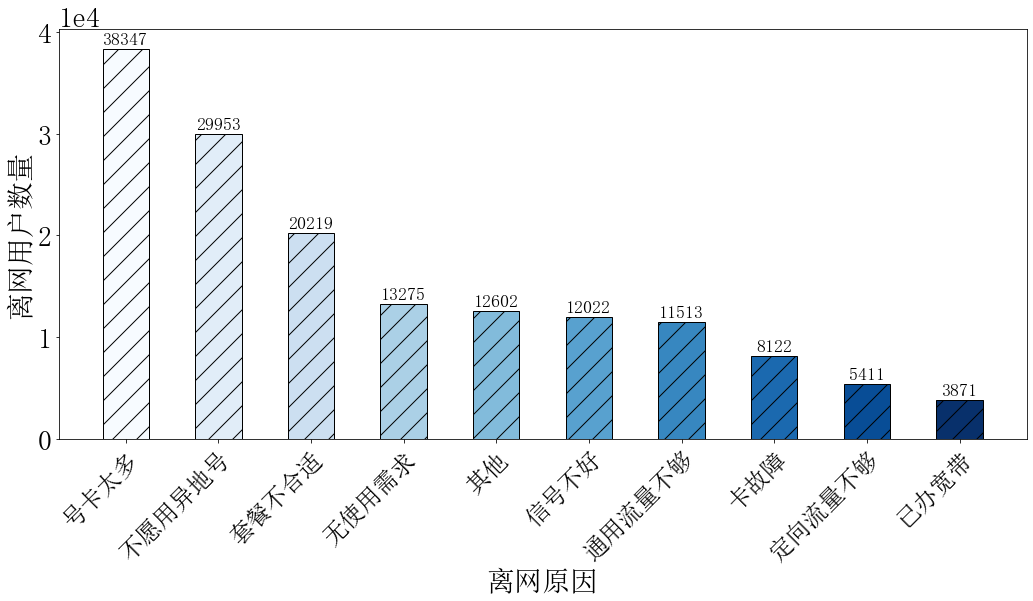

In [79]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# Chinese
from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# # mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei UI'] # 指定默认字体
# mpl.rcParams['font.sans-serif'] = ['微软雅黑'] # 指定默认字体



# font = { 'size'   : 12}
# matplotlib.rc('font', **font)

# --d
reason_list=['号卡太多', '不愿用异地号', '套餐不合适', '无使用需求', '其他', '信号不好', '通用流量不够', '卡故障', '定向流量不够', '已办宽带']
num_list=[38347, 29953, 20219, 13275, 12602, 12022, 11513, 8122, 5411, 3871]

num_sum = sum(num_list)
print(f"num_sum:{num_sum}")

# --p
# colors = ['#72aace', '#4bc1da', '#38d7d1', '#68e8b4', '#adf48f', '#fefbba', '#f9f871', 
#                    '#eb5d3b', '#a90226', '#d7486c', '#a94d8a', '#6f548e', '#3f5279', '#2f4858']
colors = ['#10467f', '#317cb7', '#6daed1', '#b6d8e7', '#e8f1f3', '#fae4d5', '#f8b293', '#dd6e58', '#b62330', '#6f011f'] # , '', '', '', '',]
colors = ['#f7fbff', '#e1edf8', '#ccdff1', '#abd0e6', '#82bbdb', '#58a1cf', '#3787c0', '#1b69af', '#084d96', '#08306b']
# colors = ['#42c2aa', '#3eb1a1', '#399f98', '#358d8f', '#317b86', '#2c697d', '#285774', '#24446b', '#1f3262', '#1c2159']

# fig, ax = plt.subplots(figsize=(10, 6))
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width))  
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,9))  
rects = ax.bar(reason_list, num_list, 0.5, edgecolor='black', color=colors, hatch='/')
ax.bar_label(rects, padding=3, fontsize=18)

# ax.set_xlabel('Churn Reason',fontsize=28)
ax.set_xlabel('离网原因',fontsize=28)
# ax.set_xticklabels(rotation=45)
# ax.set_ylabel('#. Churners',fontsize=28)
ax.set_ylabel('离网用户数量',fontsize=28)
# ax.grid(axis='y')

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

xticks = np.arange(0, len(reason_list))
ax.set_xticks(xticks, reason_list, rotation=45, rotation_mode='anchor', ha='right', fontsize=24)

plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4), useLocale=True)


plt.tight_layout()
fig_name = "Ms-Data_Top10-Churn-Reason_v3"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

## Churner Distribution With Time

c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


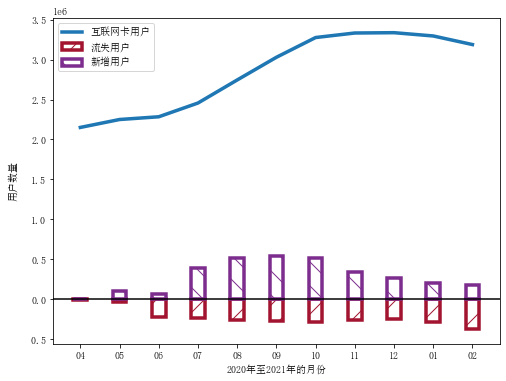

In [2]:


non_churner = [2142265,2222227,2066322,2230740,2485214,2757942,2995773,3117651,2779012,2338772,2219410]
new_user = [0, 110482, 64620, 391393, 515264, 544746, 519315, 338324, 262214, 209489, 174374]
    
churner=[11445, 30407, 219408, 226932, 260984, 272224, 281664, 258216, 250520, 281704, 373038]
user=[2150742, 2249779, 2283992, 2455977, 2744309, 3028071, 3275162, 3331822, 3335820, 3294789, 3187459]


negative_churner = []
for val in churner:
    negative_churner.append(-1*val)

ind = np.arange(len(non_churner))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
wid = 0.35
lw=3.5
bar_churner = ax.bar(ind,negative_churner,wid,label='流失用户', edgecolor='#a2142f', color='#ffffff', hatch='/', linewidth=lw)
# bar_non_churner = ax.bar(ind,non_churner,wid,label='Non-Churner',color='green')
bar_non_churner = ax.bar(ind,new_user,wid,label='新增用户', edgecolor='#7d2d8d', color='#ffffff',hatch='\\', linewidth=lw)
ax.plot(ind,user,label='互联网卡用户', linewidth=lw)
plt.axhline(y=0, color='black')
ylabel_index = np.arange(6)
# ax.set_xlabel('Month')
ax.set_xlabel('2020年至2021年的月份')
ax.set_ylabel('用户数量')
# ax.set_xticks(ylabel_index)
ax.set_xticks(ind)
ax.set_xticklabels(('04','05','06','07','08','09','10','11','12','01','02'))
ax.legend()

# plt.tight_layout()
# plt.savefig("LineBar-IC-DevTrend.pdf")
# plt.show()



In [ ]:


non_churner = [2142265,2222227,2066322,2230740,2485214,2757942,2995773,3117651,2779012,2338772,2219410]
new_user = [0, 110482, 64620, 391393, 515264, 544746, 519315, 338324, 262214, 209489, 174374]
    
churner=[11445, 30407, 219408, 226932, 260984, 272224, 281664, 258216, 250520, 281704, 373038]
user=[2150742, 2249779, 2283992, 2455977, 2744309, 3028071, 3275162, 3331822, 3335820, 3294789, 3187459]

avg_profit = [33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23]
# avg_profit = [33, 32.5, 32, 31.5, 31, 30.5, 30, 29.5, 29, 28.5, 28]
total_profit = []

negative_churner = []
for val in churner:
    negative_churner.append(-1*val)

for num,val in zip(churner, avg_profit):    
    total_profit.append(val*num)

ind = np.arange(len(non_churner))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
wid = 0.35
lw=2.5
real_lw = 0.036
bar_churner = ax.bar(ind - wid/2-real_lw,churner,wid,label='流失用户', edgecolor='#000000', color='#ffffff', hatch='/', linewidth=lw)

ax_twinx = ax.twinx()
bar_non_churner = ax_twinx.bar(ind + wid/2+real_lw,total_profit,wid,label='新增用户', edgecolor='#FF2A2A', color='#ffffff',hatch='\\', linewidth=lw)
# bar_churner = ax.bar(ind,negative_churner,wid,label='流失用户', edgecolor='#a2142f', color='#ffffff', hatch='/', linewidth=lw)
# bar_non_churner = ax.bar(ind,non_churner,wid,label='Non-Churner',color='green')
# bar_non_churner = ax.bar(ind,new_user,wid,label='新增用户', edgecolor='#7d2d8d', color='#ffffff',hatch='\\', linewidth=lw)
# ax.plot(ind,user,label='互联网卡用户', linewidth=lw)
# plt.axhline(y=0, color='black')
# ylabel_index = np.arange(6)
# ax.set_xlabel('Month')
ax.set_xlabel('Month in 2020~2021')
ax.set_ylabel('#. of churners')
ax_twinx.set_ylabel('loss of benefits')
# ax.set_xticks(ylabel_index)
ax.set_xticks(ind)
ax.set_xticklabels(('04','05','06','07','08','09','10','11','12','01','02'))
ax.ticklabel_format(axis='y', style='sci', scilimits=(5,5), useLocale=True)
# ax.legend()

plt.tight_layout()
plt.savefig("TwinBar-Churners-Loss.pdf")
plt.show()



In [ ]:


non_churner = [2142265,2222227,2066322,2230740,2485214,2757942,2995773,3117651,2779012,2338772,2219410]
new_user = [0, 110482, 64620, 391393, 515264, 544746, 519315, 338324, 262214, 209489, 174374]
    
churner=[11445, 30407, 219408, 226932, 260984, 272224, 281664, 258216, 250520, 281704, 373038]
user=[2150742, 2249779, 2283992, 2455977, 2744309, 3028071, 3275162, 3331822, 3335820, 3294789, 3187459]

avg_profit = [33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23]
# avg_profit = [33, 32.5, 32, 31.5, 31, 30.5, 30, 29.5, 29, 28.5, 28]
total_profit = []

negative_churner = []
for val in churner:
    negative_churner.append(-1*val)

for num,val in zip(churner, avg_profit):    
    total_profit.append(val*num)

ind = np.arange(len(non_churner))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
wid = 0.35
lw=2.5
real_lw = 0.036
bar_churner = ax.bar(ind,churner,wid,label='流失用户', edgecolor='#000000', color='#ffffff', hatch='/', linewidth=lw)

# ax_twinx = ax.twinx()
# bar_non_churner = ax_twinx.bar(ind + wid/2+real_lw,total_profit,wid,label='新增用户', edgecolor='#FF2A2A', color='#ffffff',hatch='\\', linewidth=lw)
# bar_churner = ax.bar(ind,negative_churner,wid,label='流失用户', edgecolor='#a2142f', color='#ffffff', hatch='/', linewidth=lw)
# bar_non_churner = ax.bar(ind,non_churner,wid,label='Non-Churner',color='green')
# bar_non_churner = ax.bar(ind,new_user,wid,label='新增用户', edgecolor='#7d2d8d', color='#ffffff',hatch='\\', linewidth=lw)
# ax.plot(ind,user,label='互联网卡用户', linewidth=lw)
# plt.axhline(y=0, color='black')
# ylabel_index = np.arange(6)
# ax.set_xlabel('Month')
ax.set_xlabel('Month in 2020~2021')
ax.set_ylabel('#. of churners')
# ax_twinx.set_ylabel('loss of benefits')
# ax.set_xticks(ylabel_index)
ax.set_xticks(ind)
ax.set_xticklabels(('04','05','06','07','08','09','10','11','12','01','02'))
ax.ticklabel_format(axis='y', style='sci', scilimits=(5,5), useLocale=True)
# ax.legend()

plt.tight_layout()
plt.savefig("Bar-Churners-Trend.pdf")
plt.show()



In [ ]:


non_churner = [2142265,2222227,2066322,2230740,2485214,2757942,2995773,3117651,2779012,2338772,2219410]
new_user = [0, 110482, 64620, 391393, 515264, 544746, 519315, 338324, 262214, 209489, 174374]
    
churner=[11445, 30407, 219408, 226932, 260984, 272224, 281664, 258216, 250520, 281704, 373038]
user=[2150742, 2249779, 2283992, 2455977, 2744309, 3028071, 3275162, 3331822, 3335820, 3294789, 3187459]

avg_profit = [33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23]
# avg_profit = [33, 32.5, 32, 31.5, 31, 30.5, 30, 29.5, 29, 28.5, 28]
total_profit = []

negative_churner = []
for val in churner:
    negative_churner.append(-1*val)

for num,val in zip(churner, avg_profit):    
    total_profit.append(val*num)

ind = np.arange(len(non_churner))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
wid = 0.35
lw=2.5
real_lw = 0.036
# bar_churner = ax.bar(ind,churner,wid,label='流失用户', edgecolor='#000000', color='#ffffff', hatch='/', linewidth=lw)

# ax_twinx = ax.twinx()
bar_non_churner = ax.bar(ind,total_profit,wid,label='新增用户', edgecolor='#FF2A2A', color='#ffffff',hatch='\\', linewidth=lw)
# bar_churner = ax.bar(ind,negative_churner,wid,label='流失用户', edgecolor='#a2142f', color='#ffffff', hatch='/', linewidth=lw)
# bar_non_churner = ax.bar(ind,non_churner,wid,label='Non-Churner',color='green')
# bar_non_churner = ax.bar(ind,new_user,wid,label='新增用户', edgecolor='#7d2d8d', color='#ffffff',hatch='\\', linewidth=lw)
# ax.plot(ind,user,label='互联网卡用户', linewidth=lw)
# plt.axhline(y=0, color='black')
# ylabel_index = np.arange(6)
# ax.set_xlabel('Month')
ax.set_xlabel('Month in 2020~2021')
# ax.set_ylabel('#. of churners')
ax.set_ylabel('loss of benefits')
# ax.set_xticks(ylabel_index)
ax.set_xticks(ind)
ax.set_xticklabels(('04','05','06','07','08','09','10','11','12','01','02'))
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6), useLocale=True)
# ax.legend()

plt.tight_layout()
plt.savefig("Bar-Loss-Trend.pdf")
plt.show()



In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.cm import get_cmap
# import numpy as np
fig, ax = plt.subplots()

size = 0.3
# vals = np.array([[60, 32], [37, 40], [29, 10]])
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
# vals = np.array([[27605, 0, 0], [25416, 10525, 8458], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 669, 498]])
# vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 669, 498]])

# vals = np.array([[60.], [37.], [29.], [60.], [60.], [40.], [37.]])

print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

# cmap = matplotlib.cm.get_cmap("tab20c")
outer_cmap = matplotlib.colormaps["tab20c"]
inner_cmap = matplotlib.colormaps["tab20c"]
# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# outer_colors = cmap(np.arange(6)*4)
# inner_colors = cmap([0, 40, 30, 40, 50, 60, 70, 80, 90, 100, 110])
# outer_colors = cmap([10, 20, 30, 40, 50, 60, 70])
# outer_colors = cmap([10, 110, 210, 310, 410, 510, 610])
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

inner_colors = cmap([   10, 20, 30,     50,     90,      130,      170,     210,     250, 260, 270])
manual_color_val =  [0,             40,     80,     120,      160,      200,     240              ]
outer_manual_color_val = [0,          4,    6,    8,     10,     12,     14            ]
inner_manual_color_val = [   1, 2, 3,    5,    7,    9,      11,     13,     15, 16, 17]

outer_manual_color_val = np.array([0,          4,    8,    9,     12,     14,     16            ])
inner_manual_color_val = np.array([   1, 2, 3,    5,    10,    11,      13,     15,     17, 18, 19])

outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])

outer_colors = outer_cmap(outer_manual_color_val)
inner_colors = inner_cmap(inner_manual_color_val)

# outer_step = 4*1
# outer_auto_color_val = np.arange(0, 7) * outer_step
# # outer_colors = cmap(outer_auto_color_val)

# inner_step = outer_step // (3 + 1)
# inner_auto_color_val = []

# inner_len = [3, 1, 1, 1, 1, 1, 3]

# idx = 0
# for len in inner_len:
#     for i in range(1, len+1):
#         add_value = i*inner_step
#         inner_auto_color_val.append(outer_auto_color_val[idx] + add_value)
#     idx += 1    

# inner_auto_color_val = np.array(inner_auto_color_val)
# inner_colors = cmap(inner_auto_color_val)

print(f"outer_manual_color_val:{outer_manual_color_val}")
print(f"inner_manual_color_val:{inner_manual_color_val}")

# print(f"outer_auto_color_val:{outer_auto_color_val}")
# print(f"inner_auto_color_val:{inner_auto_color_val}")

# print(f"manual_color_val:{manual_color_val}")
# print(f"auto_color_val:{auto_color_val}")

# inner_colors = matplotlib.cm.cool
# inner_colors = matplotlib.colors.Normalize(vmin=1, vmax=11)

# inner_colors = cmap([1, 2, 5, 6, 9, 10])
print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

# outer_colors = cmap(np.arange(0, 250, 40))
# print(f"outer_colors:{outer_colors}")

# labels_inner = ["A", "B", "C", "D", "E", "F"]

# 1, 3, 1, 1, 1, 1, 3
# 3, 1, 1, 1, 1, 1, 3
# 7
labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
# "", "", "", "", "", "", "", "", "", ""
labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]

# labels_inner = ["RC", "HOC", "WSW", "NN", "BS", "UO",  "IUT", "IDT", "Other", "MU", "UPC"]
# labels_inner = ["A", "", "", "B", "C", "D", "E", "", "", "F", "", "", "G", "", "", "H", "", "", "I", "J", "K"]
# "", "", "", "", "", "", "", "", "", ""
labels_outer = ["RC", "UR", "BS", "UO", "IUT", "IDT", "Other"]


labels_inner = ["A", "B", "C", "D", "", "", "E", "", "", "F", "", "", "G", "", "", "H", "", "", "I", "J", "K"]
labels_outer = ["UR", "RC", "BS", "UO", "IUT", "IDT", "Other"]

# outer slices
ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, textprops={'fontsize':20} )

# inner slices
# ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, labeldistance=0.7, textprops={'fontsize':12})
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, labeldistance=0.75, textprops={'fontsize':12})

ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
# plt.tight_layout()
# plt.savefig("Bar-Loss-Trend.pdf")
plt.show()
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.cm import get_cmap
# import numpy as np
# fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width), subplot_kw=dict(projection="polar")) 

size = 0.3
# vals = np.array([[60, 32], [37, 40], [29, 10]])
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
# vals = np.array([[27605, 0, 0], [25416, 10525, 8458], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 669, 498]])
# vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 669, 498]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])

print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

# cmap = matplotlib.cm.get_cmap("tab20c")
outer_cmap = matplotlib.colormaps["tab20c"]
inner_cmap = matplotlib.colormaps["tab20c"]

outer_cmap = plt.colormaps["tab20c"]
inner_cmap = plt.colormaps["tab20c"]
# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# outer_colors = cmap(np.arange(6)*4)
# inner_colors = cmap([0, 40, 30, 40, 50, 60, 70, 80, 90, 100, 110])
# outer_colors = cmap([10, 20, 30, 40, 50, 60, 70])
# outer_colors = cmap([10, 110, 210, 310, 410, 510, 610])
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

# inner_colors = cmap([   10, 20, 30,     50,     90,      130,      170,     210,     250, 260, 270])
# manual_color_val =  [0,             40,     80,     120,      160,      200,     240              ]
# outer_manual_color_val = [0,          4,    6,    8,     10,     12,     14            ]
# inner_manual_color_val = [   1, 2, 3,    5,    7,    9,      11,     13,     15, 16, 17]

# outer_manual_color_val = np.array([0,          4,    8,    9,     12,     14,     16            ])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    10,    11,      13,     15,     17, 18, 19])

outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

outer_colors = outer_cmap(outer_manual_color_val)
inner_colors = inner_cmap(inner_manual_color_val)

# outer_step = 4*1
# outer_auto_color_val = np.arange(0, 7) * outer_step
# # outer_colors = cmap(outer_auto_color_val)

# inner_step = outer_step // (3 + 1)
# inner_auto_color_val = []

# inner_len = [3, 1, 1, 1, 1, 1, 3]

# idx = 0
# for len in inner_len:
#     for i in range(1, len+1):
#         add_value = i*inner_step
#         inner_auto_color_val.append(outer_auto_color_val[idx] + add_value)
#     idx += 1    

# inner_auto_color_val = np.array(inner_auto_color_val)
# inner_colors = cmap(inner_auto_color_val)

print(f"outer_manual_color_val:{outer_manual_color_val}")
print(f"inner_manual_color_val:{inner_manual_color_val}")

# print(f"outer_auto_color_val:{outer_auto_color_val}")
# print(f"inner_auto_color_val:{inner_auto_color_val}")

# print(f"manual_color_val:{manual_color_val}")
# print(f"auto_color_val:{auto_color_val}")

# inner_colors = matplotlib.cm.cool
# inner_colors = matplotlib.colors.Normalize(vmin=1, vmax=11)

# inner_colors = cmap([1, 2, 5, 6, 9, 10])
print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

# outer_colors = cmap(np.arange(0, 250, 40))
# print(f"outer_colors:{outer_colors}")

# labels_inner = ["A", "B", "C", "D", "E", "F"]

# 1, 3, 1, 1, 1, 1, 3
# 3, 1, 1, 1, 1, 1, 3
# 7
labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
# "", "", "", "", "", "", "", "", "", ""
labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "", ""]

# labels_inner = ["RC", "HOC", "WSW", "NN", "BS", "UO",  "IUT", "IDT", "Other", "MU", "UPC"]
# labels_inner = ["A", "", "", "B", "C", "D", "E", "", "", "F", "", "", "G", "", "", "H", "", "", "I", "J", "K"]
# "", "", "", "", "", "", "", "", "", ""
# labels_inner = ["A", "B", "C", "D", "", "", "E", "", "", "F", "", "", "G", "", "", "H", "", "", "I", "J", "K"]
labels_outer = ["UR", "RC", "BS", "UO", "IUT", "IDT", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "E", "Y"]

# outer slices
ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':16} )

# ax.pie(vals.flatten(), radius=1, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':12})

# inner slices
ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75, textprops={'fontsize':12})

ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
# plt.tight_layout()
# plt.savefig("Bar-Loss-Trend.pdf")
plt.show()
# plt.show()

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width), subplot_kw=dict(projection="polar")) 

size = 0.3

vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])
# labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]

# Normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
# Obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

# print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
# print(f"vals.flatten():{vals.flatten()}")

print(f"valsnorm:{valsnorm}")
print(f"valsleft:{valsleft}")



outer_cmap = plt.colormaps["tab20c"]
inner_cmap = plt.colormaps["tab20c"]
# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

outer_colors = outer_cmap(outer_manual_color_val)
inner_colors = inner_cmap(inner_manual_color_val)

print(f"outer_manual_color_val:{outer_manual_color_val}")
print(f"inner_manual_color_val:{inner_manual_color_val}")

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "", ""]
labels_inner = ["UR", "RC", "BS", "UO", "IUT", "IDT", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "E", "Y"]

labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]
labels_outer = ["UR", "RC", "BS", "UO", "IUT", "IDT", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "E", "Y"]
labels_outer = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "", ""]

# outer slices
# ax.pie(vals.flatten(), radius=1, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':16} )

print(f"valsleft[:, 0]:{valsleft[:, 0]}")

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge"        , label=labels_inner)



# inner slices
# ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
#        wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75, textprops={'fontsize':12})

print(f"valsleft.flatten():{valsleft.flatten()}")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge"      , label=labels_outer)



ax.set(aspect="equal")
ax.set_axis_off()
# plt.legend(loc=(-0.3, 0))
# plt.legend()
# plt.tight_layout()
# plt.savefig("Bar-Loss-Trend.pdf")
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

size = 0.3
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])

print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

outer_cmap = matplotlib.colormaps["tab20c"]
inner_cmap = matplotlib.colormaps["tab20c"]

outer_cmap = plt.colormaps["tab20c"]
inner_cmap = plt.colormaps["tab20c"]

# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

outer_colors = outer_cmap(outer_manual_color_val)
inner_colors = inner_cmap(inner_manual_color_val)

inner_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456", "#00FFFF", "#CA6F1E"]
outer_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456"]

print(f"outer_manual_color_val:{outer_manual_color_val}")
print(f"inner_manual_color_val:{inner_manual_color_val}")

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "", ""]

labels_outer = ["UR", "RC", "BS", "UO", "IUT", "IDT", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "E", "Y"]

# outer slices
wedges_lst, labels_lst = ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':16} )

print(f"{len(labels_inner)}")
for i in range(len(labels_inner)):
    labels_lst[i].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# inner slices
ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75, textprops={'fontsize':12})

ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
# plt.tight_layout()
# plt.savefig("Bar-Loss-Trend.pdf")
plt.show()

vals.sum(axis=1):[44399 27605 10977  9485  6695  1093  2438]
vals.flatten():[25416 10525  8458 27605     0     0 10977     0     0  9485     0     0
  6695     0     0  1093     0     0  2438     0     0]
outer_manual_color_val:[0 4 8 9 0 0 0]
inner_manual_color_val:[1 2 3 5 0 0 0 0 0]
outer_auto_color_val:[  0  52 104 156 208 260 312]
inner_auto_color_val:[ 13  26  39  65 117 169 221 273 325]
inner_colors:[[0.280894 0.078907 0.402329 1.      ]
 [0.28229  0.145912 0.46151  1.      ]
 [0.271828 0.209303 0.504434 1.      ]
 [0.227802 0.326594 0.546532 1.      ]
 [0.141935 0.526453 0.555991 1.      ]
 [0.202219 0.715272 0.476084 1.      ]
 [0.647257 0.8584   0.209861 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
outer_colors:[[0.267004 0.004874 0.329415 1.      ]
 [0.252194 0.269783 0.531579 1.      ]
 [0.160665 0.47854  0.558115 1.      ]
 [0.143303 0.669459 0.511215 1.      ]
 [0.515992 0.831158 0.294279 1.      ]
 [0.993248 0.906157 0.143936 1

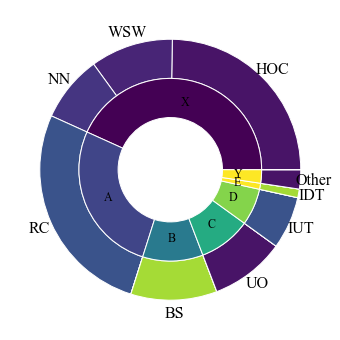

In [12]:
# --i

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75





# --p
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

size = 0.3
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
# labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])

print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

cmap = plt.colormaps["tab20c"]
cmap = plt.colormaps["cividis"]
cmap = plt.colormaps["viridis"]
outer_cmap = cmap
inner_map = cmap

# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

# --manual
outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

outer_colors = outer_cmap(outer_manual_color_val)
inner_colors = inner_cmap(inner_manual_color_val)

# inner_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456", "#00FFFF", "#CA6F1E"]
# outer_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456"]

print(f"outer_manual_color_val:{outer_manual_color_val}")
print(f"inner_manual_color_val:{inner_manual_color_val}")

# --auto
outer_step = 4*13
outer_auto_color_val = np.arange(0, 7) * outer_step
outer_colors = cmap(outer_auto_color_val)

inner_step = outer_step // (3 + 1)
inner_auto_color_val = []

inner_len = [3, 1, 1, 1, 1, 1, 1]

idx = 0
for class_len in inner_len:
    for i in range(1, class_len+1):
        add_value = i*inner_step
        inner_auto_color_val.append(outer_auto_color_val[idx] + add_value)
#         inner_auto_color_val.append(add_value)
    idx += 1    

inner_auto_color_val = np.array(inner_auto_color_val)
inner_colors = cmap(inner_auto_color_val)

print(f"outer_auto_color_val:{outer_auto_color_val}")
print(f"inner_auto_color_val:{inner_auto_color_val}")

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

# labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
# labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

# labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
# labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["HOC", "WSW", "NN", "RC", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "", ""]

# labels_outer = ["UR", "RC", "BS", "UO", "IUT", "IDT", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "E", "Y"]

# inner slices
inner_wedges_lst, inner_labels_lst = ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':16} )

# print(f"{len(labels_inner)}")
for idx in range(len(labels_inner)):
    inner_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# outer slices
outer_wedges_lst, outer_labels_lst = ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75, textprops={'fontsize':12})

for idx in range(len(labels_outer)):
    outer_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
# plt.tight_layout()
# plt.savefig("Bar-Loss-Trend.pdf")
plt.show()

vals.sum(axis=1):[44399 27605 10977  9485  7788  2438]
vals.flatten():[25416 10525  8458 27605     0     0  6364  4613     0  5214  4271     0
  6695  1093     0  2438     0     0]
outer_auto_color_val:[  0  52 104 156 208 260]
inner_auto_color_val:[ 13  26  39  65  78  91 117 130 143 169 182 195 221 234 247 273 286 299]
inner_colors:[[0.280894 0.078907 0.402329 1.      ]
 [0.28229  0.145912 0.46151  1.      ]
 [0.271828 0.209303 0.504434 1.      ]
 [0.227802 0.326594 0.546532 1.      ]
 [0.203063 0.379716 0.553925 1.      ]
 [0.180629 0.429975 0.557282 1.      ]
 [0.141935 0.526453 0.555991 1.      ]
 [0.125394 0.574318 0.549086 1.      ]
 [0.120081 0.622161 0.534946 1.      ]
 [0.202219 0.715272 0.476084 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.395174 0.797475 0.367757 1.      ]
 [0.647257 0.8584   0.209861 1.      ]
 [0.783315 0.879285 0.125405 1.      ]
 [0.916242 0.896091 0.100717 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 

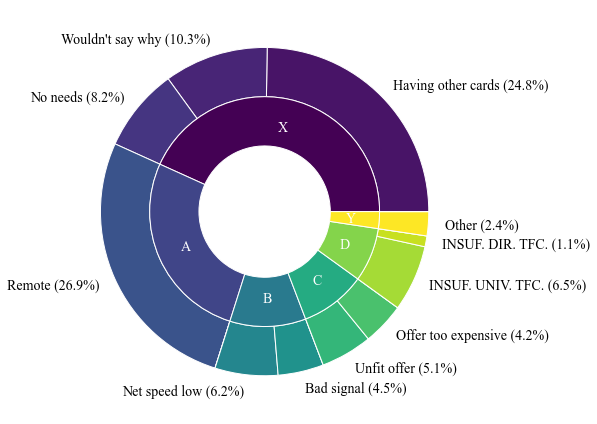

In [2]:
# --i

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

# --p
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

size = 0.3
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
# labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [6364, 4613, 0], [5214, 4271, 0], [6695, 1093, 0], [2438, 669, 498]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [6364, 4613, 0], [5214, 4271, 0], [6695, 1093, 0], [2438, 0, 0]])

# inner_len = [3, 1, 2, 2, 2, 3]
print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

cmap = plt.colormaps["tab20c"]
cmap = plt.colormaps["cividis"]
cmap = plt.colormaps["viridis"]
outer_cmap = cmap
inner_map = cmap

# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

# # --manual
# outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

# outer_colors = outer_cmap(outer_manual_color_val)
# inner_colors = inner_cmap(inner_manual_color_val)

# # inner_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456", "#00FFFF", "#CA6F1E"]
# # outer_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456"]

# print(f"outer_manual_color_val:{outer_manual_color_val}")
# print(f"inner_manual_color_val:{inner_manual_color_val}")

# --auto
outer_step = 4*13
outer_auto_color_val = np.arange(0, 6) * outer_step
outer_colors = cmap(outer_auto_color_val)

inner_step = outer_step // (3 + 1)
inner_auto_color_val = []

inner_len = [3, 1, 1, 1, 1, 1, 1]
inner_len = [3, 1, 2, 2, 2, 3] # 13
inner_len = [3, 3, 3, 3, 3, 3]

idx = 0
for class_len in inner_len:
    for i in range(1, class_len+1):
        add_value = i*inner_step
        inner_auto_color_val.append(outer_auto_color_val[idx] + add_value)
#         inner_auto_color_val.append(add_value)
    idx += 1    

inner_auto_color_val = np.array(inner_auto_color_val)
inner_colors = cmap(inner_auto_color_val)

print(f"outer_auto_color_val:{outer_auto_color_val}")
print(f"inner_auto_color_val:{inner_auto_color_val}")

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

# labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
# labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

# labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["HOC", "WSW", "NN", "RC", "", "", "NSL", "BS", "", "UO", "OTE", "", "IUT", "IDT", "", "Other", "MU", "UPC"]
labels_inner = ["Having Other Cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", "Unfit offer", "Offer Too Expensive", "", "Insufficient universal traffic", "Insufficient directional traffic", "", "Other", "Minor user", "Unwanted phone calls"]
labels_inner = ["Having other cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", 
                "Unfit offer", "Offer too expensive", "", "Insufficient universal traffic", "Insufficient directional traffic", "", 
                "Other", "", ""]
labels_inner = ["Having other cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", 
                "Unfit offer", "Offer too expensive", "", "Insufficient universal tfc.", "Insufficient directional tfc.", "", 
                "Other", "", ""]
labels_inner = ["Having other cards (24.75%)", "Wouldn't say why (10.25%)", "No needs (8.24%)", "Remote (26.88%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.49%)", "", "Unfit offer (5.08%)", "Offer too expensive (4.16%)", "", 
                "Insufficient universal tfc.(6.52%)", "Insufficient directional tfc. (1.06%)", "", "Other (2.37%)", "", ""]
labels_inner = ["Having other cards (24.75%)", "Wouldn't say why (10.25%)", "No needs (8.24%)", "Remote (26.88%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.49%)", "", "Unfit offer (5.08%)", "Offer too expensive (4.16%)", "", 
                "INSUF. UNIV. TFC. (6.52%)", "INSUF. DIR. TFC. (1.06%)", "", "Other (2.37%)", "", ""]
labels_inner = ["Having other cards (24.8%)", "Wouldn't say why (10.3%)", "No needs (8.2%)", "Remote (26.9%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.5%)", "", "Unfit offer (5.1%)", "Offer too expensive (4.2%)", "", 
                "INSUF. UNIV. TFC. (6.5%)", "INSUF. DIR. TFC. (1.1%)", "", "Other (2.4%)", "", ""]


labels_outer = ["UR", "RC", "BS", "UO", "TNE", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "Y"]

# inner slices
# print(f":{}")
print(f"x_len:{len(vals.flatten())}")
print(f"color_len:{len(inner_colors)}")
print(f"label_len:{len(labels_inner)}")
inner_wedges_lst, inner_labels_lst = ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':14})

# print(f"{len(labels_inner)}")
# for idx in range(len(labels_inner)):
#     inner_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# outer slices
outer_wedges_lst, outer_labels_lst = ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75,  textprops={'fontsize':14, 'color':'#ffffff'}) # labeldistance=0.75,

for idx in range(len(labels_outer)):
    outer_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
plt.tight_layout()
# plt.savefig("NestedPie-Churn_Reason.pdf")
plt.show()

vals.sum(axis=1):[44399 27605 10977  9485  6695  1093  2438]
vals.flatten():[25416 10525  8458 27605     0     0  6364  4613     0  5214  4271     0
  6695     0     0  1093     0     0  2438     0     0]
outer_auto_color_val:[  0  44  88 132 176 220 264]
inner_auto_color_val:[ 11  22  33  55  66  77  99 110 121 143 154 165 187 198 209 231 242 253
 275 286 297]
inner_colors:[[0.279566 0.067836 0.391917 1.      ]
 [0.283187 0.125848 0.44496  1.      ]
 [0.278012 0.180367 0.486697 1.      ]
 [0.246811 0.283237 0.535941 1.      ]
 [0.225863 0.330805 0.547314 1.      ]
 [0.204903 0.375746 0.553533 1.      ]
 [0.168126 0.459988 0.558082 1.      ]
 [0.151918 0.500685 0.557587 1.      ]
 [0.136408 0.541173 0.554483 1.      ]
 [0.120081 0.622161 0.534946 1.      ]
 [0.137339 0.662252 0.515571 1.      ]
 [0.180653 0.701402 0.488189 1.      ]
 [0.327796 0.77398  0.40664  1.      ]
 [0.421908 0.805774 0.35191  1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.751884 0.874951 0.143228 1.      ]

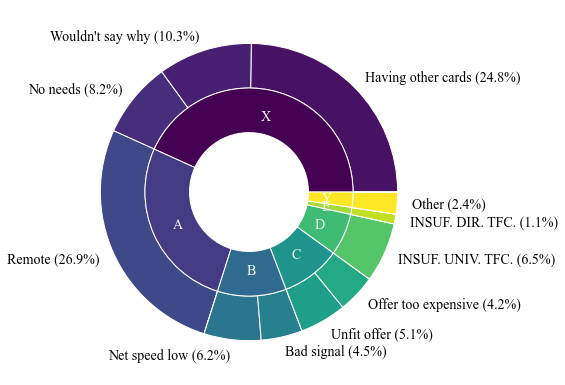

In [8]:
# --i

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

# --p
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

size = 0.3
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
# labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [6364, 4613, 0], [5214, 4271, 0], [6695, 1093, 0], [2438, 669, 498]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [6364, 4613, 0], [5214, 4271, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])

# inner_len = [3, 1, 2, 2, 2, 3]
print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

cmap = plt.colormaps["tab20c"]
cmap = plt.colormaps["cividis"]
cmap = plt.colormaps["viridis"]
outer_cmap = cmap
inner_map = cmap

# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

# # --manual
# outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

# outer_colors = outer_cmap(outer_manual_color_val)
# inner_colors = inner_cmap(inner_manual_color_val)

# # inner_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456", "#00FFFF", "#CA6F1E"]
# # outer_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456"]

# print(f"outer_manual_color_val:{outer_manual_color_val}")
# print(f"inner_manual_color_val:{inner_manual_color_val}")

# --auto
outer_step = 4*11
outer_auto_color_val = np.arange(0, 7) * outer_step
outer_colors = cmap(outer_auto_color_val)

inner_step = outer_step // (3 + 1)
inner_auto_color_val = []

inner_len = [3, 1, 1, 1, 1, 1, 1]
inner_len = [3, 1, 2, 2, 2, 3] # 13
inner_len = [3, 3, 3, 3, 3, 3]
inner_len = [3, 3, 3, 3, 3, 3, 3]

idx = 0
for class_len in inner_len:
    for i in range(1, class_len+1):
        add_value = i*inner_step
        inner_auto_color_val.append(outer_auto_color_val[idx] + add_value)
#         inner_auto_color_val.append(add_value)
    idx += 1    

inner_auto_color_val = np.array(inner_auto_color_val)
inner_colors = cmap(inner_auto_color_val)

print(f"outer_auto_color_val:{outer_auto_color_val}")
print(f"inner_auto_color_val:{inner_auto_color_val}")

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

# labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
# labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

# labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["HOC", "WSW", "NN", "RC", "", "", "NSL", "BS", "", "UO", "OTE", "", "IUT", "IDT", "", "Other", "MU", "UPC"]
labels_inner = ["Having Other Cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", "Unfit offer", "Offer Too Expensive", "", "Insufficient universal traffic", "Insufficient directional traffic", "", "Other", "Minor user", "Unwanted phone calls"]
labels_inner = ["Having other cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", 
                "Unfit offer", "Offer too expensive", "", "Insufficient universal traffic", "Insufficient directional traffic", "", 
                "Other", "", ""]
labels_inner = ["Having other cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", 
                "Unfit offer", "Offer too expensive", "", "Insufficient universal tfc.", "Insufficient directional tfc.", "", 
                "Other", "", ""]
labels_inner = ["Having other cards (24.75%)", "Wouldn't say why (10.25%)", "No needs (8.24%)", "Remote (26.88%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.49%)", "", "Unfit offer (5.08%)", "Offer too expensive (4.16%)", "", 
                "Insufficient universal tfc.(6.52%)", "Insufficient directional tfc. (1.06%)", "", "Other (2.37%)", "", ""]
labels_inner = ["Having other cards (24.75%)", "Wouldn't say why (10.25%)", "No needs (8.24%)", "Remote (26.88%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.49%)", "", "Unfit offer (5.08%)", "Offer too expensive (4.16%)", "", 
                "INSUF. UNIV. TFC. (6.52%)", "INSUF. DIR. TFC. (1.06%)", "", "Other (2.37%)", "", ""]
labels_inner = ["Having other cards (24.8%)", "Wouldn't say why (10.3%)", "No needs (8.2%)", "Remote (26.9%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.5%)", "", "Unfit offer (5.1%)", "Offer too expensive (4.2%)", "", 
                "INSUF. UNIV. TFC. (6.5%)", "INSUF. DIR. TFC. (1.1%)", "", "Other (2.4%)", "", ""]
labels_inner = ["Having other cards (24.8%)", "Wouldn't say why (10.3%)", "No needs (8.2%)", "Remote (26.9%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.5%)", "", "Unfit offer (5.1%)", "Offer too expensive (4.2%)", "", 
                "INSUF. UNIV. TFC. (6.5%)", "","", "INSUF. DIR. TFC. (1.1%)", "", "", "Other (2.4%)", "", ""]


labels_outer = ["UR", "RC", "BS", "UO", "TNE", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "Y"]
labels_outer = ["X", "A", "B", "C", "D", "E", "Y"]

# inner slices
# print(f":{}")
print(f"x_len:{len(vals.flatten())}")
print(f"color_len:{len(inner_colors)}")
print(f"label_len:{len(labels_inner)}")
inner_wedges_lst, inner_labels_lst = ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':14})

# print(f"{len(labels_inner)}")
# for idx in range(len(labels_inner)):
#     inner_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# outer slices
outer_wedges_lst, outer_labels_lst = ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75,  textprops={'fontsize':14, 'color':'#ffffff'}) # labeldistance=0.75,

for idx in range(len(labels_outer)):
    outer_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
plt.tight_layout()
plt.savefig("NestedPie-Churn_Reason_v2.pdf")
plt.show()

vals.sum(axis=1):[44399 27605 10977  9485  7788  2438]
vals.flatten():[25416 10525  8458 27605     0     0  6364  4613     0  5214  4271     0
  6695  1093     0  2438     0     0]
outer_auto_color_val:[  0  52 104 156 208 260]
inner_auto_color_val:[ 13  26  39  65  78  91 117 130 143 169 182 195 221 234 247 273 286 299]
inner_colors:[[0.280894 0.078907 0.402329 1.      ]
 [0.28229  0.145912 0.46151  1.      ]
 [0.271828 0.209303 0.504434 1.      ]
 [0.227802 0.326594 0.546532 1.      ]
 [0.203063 0.379716 0.553925 1.      ]
 [0.180629 0.429975 0.557282 1.      ]
 [0.141935 0.526453 0.555991 1.      ]
 [0.125394 0.574318 0.549086 1.      ]
 [0.120081 0.622161 0.534946 1.      ]
 [0.202219 0.715272 0.476084 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.395174 0.797475 0.367757 1.      ]
 [0.647257 0.8584   0.209861 1.      ]
 [0.783315 0.879285 0.125405 1.      ]
 [0.916242 0.896091 0.100717 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 

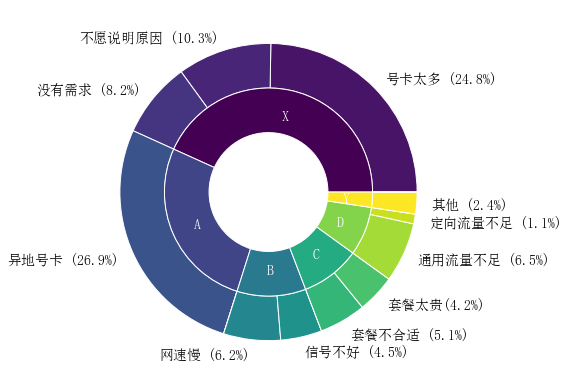

In [77]:
# --i

# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import rcParams
# import numpy as np
# import pandas as pd
# import seaborn as sns

# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)

uni_fig_length = 8
uni_fig_width = uni_fig_length * 0.75

# --p
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

size = 0.3
vals = np.array([[50, 50, 50], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 0, 0], [50, 50, 50]])
# labels_inner = ["RC", "", "", "HOC", "WSW", "NN", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [10977, 0, 0], [9485, 0, 0], [6695, 0, 0], [1093, 0, 0], [2438, 0, 0]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [6364, 4613, 0], [5214, 4271, 0], [6695, 1093, 0], [2438, 669, 498]])
vals = np.array([[25416, 10525, 8458], [27605, 0, 0], [6364, 4613, 0], [5214, 4271, 0], [6695, 1093, 0], [2438, 0, 0]])

# inner_len = [3, 1, 2, 2, 2, 3]
print(f"vals.sum(axis=1):{vals.sum(axis=1)}")
print(f"vals.flatten():{vals.flatten()}")

cmap = plt.colormaps["tab20c"]
cmap = plt.colormaps["cividis"]
cmap = plt.colormaps["viridis"]
outer_cmap = cmap
inner_map = cmap

# cmap = get_cmap("GnBu")
# cmap = get_cmap("viridis")
# cmap = get_cmap("cool")
# cmap = get_cmap("YlGnBu")
# inner_colors = cmap([0, 40, 50, 60, 80, 120, 160, 200, 240, 250, 260, 280])
# outer_colors = cmap([0, 40,         80, 120, 160, 200, 240,           280])

# # --manual
# outer_manual_color_val = np.array([0,          4,    8,    9,     0,     0,     0            ])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    9,    0,      0,     0,     0, 0, 0])
# inner_manual_color_val = np.array([   1, 2, 3,    5,    0,    0,      0,     0,     0])

# outer_colors = outer_cmap(outer_manual_color_val)
# inner_colors = inner_cmap(inner_manual_color_val)

# # inner_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456", "#00FFFF", "#CA6F1E"]
# # outer_colors = ["#808080", "#229954", "#34495E", "#2E86C1", "#CA6F1E", "white", "#123456"]

# print(f"outer_manual_color_val:{outer_manual_color_val}")
# print(f"inner_manual_color_val:{inner_manual_color_val}")

# --auto
outer_step = 4*13
outer_auto_color_val = np.arange(0, 6) * outer_step
outer_colors = cmap(outer_auto_color_val)

inner_step = outer_step // (3 + 1)
inner_auto_color_val = []

inner_len = [3, 1, 1, 1, 1, 1, 1]
inner_len = [3, 1, 2, 2, 2, 3] # 13
inner_len = [3, 3, 3, 3, 3, 3]

idx = 0
for class_len in inner_len:
    for i in range(1, class_len+1):
        add_value = i*inner_step
        inner_auto_color_val.append(outer_auto_color_val[idx] + add_value)
#         inner_auto_color_val.append(add_value)
    idx += 1    

inner_auto_color_val = np.array(inner_auto_color_val)
inner_colors = cmap(inner_auto_color_val)

print(f"outer_auto_color_val:{outer_auto_color_val}")
print(f"inner_auto_color_val:{inner_auto_color_val}")

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

# labels_inner = ["Remote card", "", "", "Having Other Cards", "Wouldn't say why", "No needs", "Bad Signal", "", "", "Unfit offer", "", "", "Insufficient universal traffic", "", "", "Insufficient directed traffic", "", "", "Other", "Minor user", "Unwanted phone calls"]
# labels_outer = ["Remote card", "Unable to reflect", "Bad signal", "Unfit offer", "Insufficient universal traffic", "Insufficient directed traffic", "Other"]

# labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "MU", "UPC"]
labels_inner = ["HOC", "WSW", "NN", "RC", "", "", "NSL", "BS", "", "UO", "OTE", "", "IUT", "IDT", "", "Other", "MU", "UPC"]
labels_inner = ["Having Other Cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", "Unfit offer", "Offer Too Expensive", "", "Insufficient universal traffic", "Insufficient directional traffic", "", "Other", "Minor user", "Unwanted phone calls"]
labels_inner = ["Having other cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", 
                "Unfit offer", "Offer too expensive", "", "Insufficient universal traffic", "Insufficient directional traffic", "", 
                "Other", "", ""]
labels_inner = ["Having other cards", "Wouldn't say why", "No needs", "Remote card", "", "", "Net speed low", "Bad signal", "", 
                "Unfit offer", "Offer too expensive", "", "Insufficient universal tfc.", "Insufficient directional tfc.", "", 
                "Other", "", ""]
labels_inner = ["Having other cards (24.75%)", "Wouldn't say why (10.25%)", "No needs (8.24%)", "Remote (26.88%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.49%)", "", "Unfit offer (5.08%)", "Offer too expensive (4.16%)", "", 
                "Insufficient universal tfc.(6.52%)", "Insufficient directional tfc. (1.06%)", "", "Other (2.37%)", "", ""]
labels_inner = ["Having other cards (24.75%)", "Wouldn't say why (10.25%)", "No needs (8.24%)", "Remote (26.88%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.49%)", "", "Unfit offer (5.08%)", "Offer too expensive (4.16%)", "", 
                "INSUF. UNIV. TFC. (6.52%)", "INSUF. DIR. TFC. (1.06%)", "", "Other (2.37%)", "", ""]
labels_inner = ["Having other cards (24.8%)", "Wouldn't say why (10.3%)", "No needs (8.2%)", "Remote (26.9%)", "", "", 
                "Net speed low (6.2%)", "Bad signal (4.5%)", "", "Unfit offer (5.1%)", "Offer too expensive (4.2%)", "", 
                "INSUF. UNIV. TFC. (6.5%)", "INSUF. DIR. TFC. (1.1%)", "", "Other (2.4%)", "", ""]

labels_inner = ["号卡太多 (24.8%)", "不愿说明原因 (10.3%)", "没有需求 (8.2%)", "异地号卡 (26.9%)", "", "", 
                "网速慢 (6.2%)", "信号不好 (4.5%)", "", "套餐不合适 (5.1%)", "套餐太贵(4.2%)", "", 
                "通用流量不足 (6.5%)", "定向流量不足 (1.1%)", "", "其他 (2.4%)", "", ""]


labels_outer = ["UR", "RC", "BS", "UO", "TNE", "Other"]
labels_outer = ["X", "A", "B", "C", "D", "Y"]

# inner slices
# print(f":{}")
print(f"x_len:{len(vals.flatten())}")
print(f"color_len:{len(inner_colors)}")
print(f"label_len:{len(labels_inner)}")
inner_wedges_lst, inner_labels_lst = ax.pie(vals.flatten(), radius=1, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_inner, textprops={'fontsize':14})

# print(f"{len(labels_inner)}")
# for idx in range(len(labels_inner)):
#     inner_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# outer slices
outer_wedges_lst, outer_labels_lst = ax.pie(vals.sum(axis=1), radius=1-size, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=labels_outer, labeldistance=0.75,  textprops={'fontsize':14, 'color':'#ffffff'}) # labeldistance=0.75,

for idx in range(len(labels_outer)):
    outer_labels_lst[idx].update({"rotation": 0, "horizontalalignment": "center", "verticalalignment": "center"})

# ax.set(aspect="equal")
# plt.legend(loc=(-0.3, 0))
# plt.legend()
plt.tight_layout()
plt.savefig("NestedPie-Churn_Reason_zh.pdf")
plt.savefig("NestedPie-Churn_Reason_zh.png")
plt.show()

In [ ]:
labels_inner = ["RC", "HOC", "WSW", "NN", "", "", "BS", "", "", "UO", "", "", "IUT", "", "", "IDT", "", "", "Other", "", ""]
# print(f"{len(labels_inner)}")
num = len(labels_inner)
# print(f"{num}")

In [ ]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.colormaps["tab20c"]
# print(f":{np.arange(3)*4}")
print(f":{[0, 4, 8]}")
print(f":{[1, 2, 5, 6, 9, 10]}")
outer_colors = cmap(np.arange(3)*4)
outer_colors = cmap([0, 4, 8])
inner_colors = cmap([1, 2, 5, 6, 9, 10])

print(f"inner_colors:{inner_colors}")
print(f"outer_colors:{outer_colors}")

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def bullseye_plot(ax, data, seg_bold=None, cmap=None, norm=None):
    """
    Bullseye representation for the left ventricle.

    Parameters
    ----------
    ax : axes
    data : list of int and float
        The intensity values for each of the 17 segments
    seg_bold : list of int, optional
        A list with the segments to highlight
    cmap : ColorMap or None, optional
        Optional argument to set the desired colormap
    norm : Normalize or None, optional
        Optional argument to normalize data into the [0.0, 1.0] range

    Notes
    -----
    This function creates the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """
    if seg_bold is None:
        seg_bold = []

    linewidth = 2
    data = np.ravel(data)

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2 * np.pi, 768)
    r = np.linspace(0.2, 1, 4)

    # Remove grid
    ax.grid(False)

    # Create the bound for the segment 17 circle
    for i in range(1, r.shape[0]):
        ax.plot(theta, np.repeat(r[i], theta.shape), '-k', lw=linewidth)

    # Create the bounds for the segments 1-12
    for i in range(6):
        theta_i = np.deg2rad(i * 60)
        ax.plot([theta_i, theta_i], [r[1], 1], '-k', lw=linewidth)

    # Create the bounds for the segments 13-16
#     for i in range(4):
#         theta_i = np.deg2rad(i * 90 - 45)
#         ax.plot([theta_i, theta_i], [r[0], r[1]], '-k', lw=linewidth)

    # Fill the segments 1-6
    r0 = r[2:4]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i * 128:i * 128 + 128] + np.deg2rad(60)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128 - 1, 2 - 1)) * data[i]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm, shading='auto')
        if i + 1 in seg_bold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[2], r[3]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[2], r[3]], '-k', lw=linewidth + 1)

    # Fill the segments 7-12
    r0 = r[1:3]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i * 128:i * 128 + 128] + np.deg2rad(60)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128 - 1, 2 - 1)) * data[i + 6]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm, shading='auto')
        if i + 7 in seg_bold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[1], r[2]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[1], r[2]], '-k', lw=linewidth + 1)


    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])


# Create the fake data
data = np.arange(17) + 1


# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(10, 5), layout="constrained")
# fig.get_layout_engine().set(wspace=.1, w_pad=.2)
ax = fig.subplots(1, 1, subplot_kw=dict(projection='polar'))
# fig.canvas.manager.set_window_title('Left Ventricle Bulls Eyes (AHA)')


# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.

# Create an empty ScalarMappable to set the colorbar's colormap and norm.
# The following gives a basic continuous colorbar with ticks and labels.

# And again for the second colorbar.
cmap2 = mpl.cm.cool
norm2 = mpl.colors.Normalize(vmin=1, vmax=17)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap2, norm=norm2),
             cax=ax.inset_axes([0, -.15, 1, .1]),
             orientation='horizontal', label='Some other units')


# The second example illustrates the use of a ListedColormap, a
# BoundaryNorm, and extended ends to show the "over" and "under"
# value colors.



# Create the 17 segment model

bullseye_plot(ax, data, cmap=cmap2, norm=norm2)
# ax.set_title('Bulls Eye (AHA)')



plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# color_bar=['#0072BD', '#D95319', '#7E2F8E', 'red', 'peru', 'cyan']
# font = {'family' : 'Times New Roman',
# 'weight' : 'normal',
# 'size'   : 20,
# }
# for i in range(7):
#     plt.bar([k for k in range(1, 32)], month_data[i], color=color_bar[i % 6])
#     plt.xlabel(month_id[i], font)
#     plt.ylabel('Number of stop user', font)
#     plt.tick_params(axis='both', labelsize=15)
#     plt.show()

#     cdf_data = []
#     for j in range(len(month_data[i])):
#         for k in range(month_data[i][j]):
#             cdf_data.append(j + 1)
#     x = np.linspace(1, 31)
#     ecdf = sm.distributions.ECDF(cdf_data)
#     y = ecdf(x)
#     plt.plot(x, y, linewidth='1', color=color_bar[i % 6])
#     plt.xlabel(month_id[i], font)
#     plt.ylabel('CDF', font)
#     plt.tick_params(axis='both', labelsize=15)
#     plt.show()
    
month_data = [
             [1, 0, 0, 0, 0, 0, 0, 3123, 72295, 17531, 124097, 1734, 23696, 79927, 1190, 338, 0, 2127, 944, 1029, 1059, 1040, 590, 0, 3738, 1564, 1764, 1726, 1880, 2275, 2566],
             [2, 0, 0, 2, 0, 0, 0, 5632, 62441, 32318, 90837, 8523, 22118, 122029, 7523, 5538, 1364, 843, 838, 982, 1237, 1267, 1404, 1429, 1508, 1569, 1862, 2002, 2165, 2490, 2864],
             [1, 0, 0, 0, 1, 0, 0, 2556, 72269, 109846, 42572, 0, 0, 92686, 39443, 1039, 686, 390, 0, 1, 2968, 806, 969, 1011, 1151, 1224, 1397, 1647, 0, 0, 0],
			 [3, 0, 0, 0, 0, 0, 1, 16201, 3376, 3265, 2813, 84900, 69664, 81026, 713, 18021, 8784, 645, 653, 678, 895, 998, 959, 1102, 1273, 1352, 1472, 1792, 2036, 2302, 2699],
			 [1, 0, 0, 0, 0, 0, 0, 23331, 3660, 2644, 63508, 38847, 30648, 79378, 4879, 513, 616, 559, 567, 630, 687, 833, 889, 874, 1165, 1231, 1325, 1585, 1839, 1948, 2116],
			 [0, 0, 0, 0, 0, 0, 0, 41097, 3709, 3069, 2631, 2491, 93846, 63228, 76280, 1864, 572, 665, 726, 652, 842, 863, 941, 941, 1264, 1309, 1526, 1670, 1801, 2342, 0],
             [1, 0, 0, 0, 0, 0, 0, 25310, 3538, 2574, 2169, 747, 8, 896, 2800, 5893, 26129, 93892, 92735, 25727, 676, 757, 963, 940, 1017, 1169, 1181, 1392, 1935, 2288, 2566]
           ]
month_id = ['202012', '202101', '202102','202107', '202108', '202109', '202110']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
# ax.imshow(arr)
colormap = sns.color_palette("Greens")
colormap = sns.color_palette("light:#a2142f", as_cmap=True)
# colormap = sns.color_palette("dark:#a2142f", as_cmap=True)

# print(f"arr:{arr}")
# sns.heatmap(arr, cmap=colormap)
sns.heatmap(month_data, cmap=colormap, cbar_kws={'label':'离网用户数量'})

x_ticks = [i+0.5 for i in range(0, 31, 2)]
x_ticklabels = [i for i in range(1, 32, 2)]
# ax.set_xticks(np.arange(0.5,(df['pkg_grade_label'].max()+ 1)+0.5,1))
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels, fontsize=24, rotation=30)

y_ticks = [i+0.5 for i in range(7)]
ax.set_yticks(y_ticks)
ax.set_yticklabels([4, 5, 6, 11, 12, 1, 2], fontsize=24, rotation=0)
ax.set_xlabel('日期',fontsize=28)
ax.set_ylabel('月份',fontsize=28)


for tick in ax.yaxis.get_majorticklabels():
    # tick.set_horizontalalignment("left")
    tick.set_verticalalignment('center')

# plt.tight_layout()
# plt.savefig("Heatmap-Churner-Month-Date.pdf")
# plt.show()

    

In [ ]:
# --i
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm
from sklearn.preprocessing import LabelEncoder

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

font = { 'size'   : 24}
matplotlib.rc('font', **font)

# --f
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

def li2df(li):
    src_li = []
    for ele in li:
      value = ele[0]
      count = ele[1]
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    return df

def label_encoding(df,feat_list,mode='save'):
    '''
    Give every categorical variable a unique numerical ID
    Useful for non-linear tree-based algorithms
    Does not increase dimensionality
    Randomize the cat_var -> num_id mapping and  retrain, average, for small bump in accuracy
    '''
    func_suffix = ''
    le = LabelEncoder()
    if mode == 'save':
        func_suffix = '_label'
    for feat in feat_list:
        enc_feat = feat+func_suffix
        le.fit(df[feat])
        df[enc_feat]=le.transform(df[feat])
    return df

# --d
df = pd.DataFrame()
# TC
pkg_grade = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 68, 68, 68, 68, 68, 68, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 109, 110, 115, 118, 118, 118, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 126, 126, 126, 126, 126, 126, 126, 126, 126, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 129, 136, 138, 138, 138, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 148, 148, 148, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 150, 150, 150, 150, 150, 150, 158, 158, 158, 158, 158, 158, 158, 158, 158, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 166, 166, 166, 166, 166, 166, 166, 166, 166, 168, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 169, 170, 170, 179, 179, 179, 179, 179, 179, 179, 179, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 186, 186, 186, 186, 186, 186, 186, 186, 188, 188, 188, 188, 188, 188, 188, 188, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 189, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 198, 198, 198, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 200, 200, 200, 200, 200, 200, 200, 200, 200, 208, 208, 208, 208, 208, 208, 210, 210, 218, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 238, 238, 238, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 239, 240, 240, 240, 240, 240, 240, 240, 240, 240, 248, 248, 248, 248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 250, 250, 250, 250, 268, 268, 268, 268, 269, 269, 269, 269, 269, 269, 269, 269, 269, 269, 280, 280, 280, 280, 280, 280, 280, 286, 286, 286, 287, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 290, 296, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 329, 329, 329, 329, 329, 329, 329, 389, 389, 389, 389, 389, 389, 389, 389, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 399, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 489, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 499, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 589, 589, 589, 589, 589, 589, 590, 590, 590, 590, 590, 590, 590, 590, 590, 590, 590, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 599, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 650, 650, 650, 790, 790, 790, 790, 790, 790, 799, 799, 799, 799, 799, 799, 799, 799, 799, 800, 800, 800, 800, 800, 800, 889, 889, 889, 900, 900, 900, 900, 900, 900, 900, 900, 900, 938, 990, 990, 990, 990, 990, 990, 990, 990, 990, 990, 990, 990, 990, 990, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 1000, 1000, 1000, 1000, 1100, 1100, 1199, 1199, 1199, 1199, 1199, 1199, 1200, 1200, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1390, 1390, 1390, 1390, 1390, 1390, 1390, 1390, 1390, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1399, 1500, 1500, 1590, 1590, 1590, 1590, 1590, 1590, 1590, 1590, 1590, 1590, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1599, 1799, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1999, 3000, 3000, 3000]
age_group = [11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 11, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 86, 91, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 16, 21, 26, 31, 36, 41, 46, 51, 56, 66, 71, 76, 81, 36, 41, 46, 51, 56, 61, 71, 76, 81, 91, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 76, 31, 36, 46, 51, 56, 71, 81, 86, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 91, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 31, 36, 46, 51, 56, 61, 66, 41, 46, 51, 61, 81, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 6, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 61, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 21, 26, 31, 36, 41, 51, 61, 66, 76, 81, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 86, 91, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 16, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 6, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 21, 31, 36, 41, 46, 51, 56, 61, 66, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 91, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 86, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 36, 41, 46, 51, 56, 61, 66, 71, 81, 91, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 86, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 66, 61, 26, 31, 36, 41, 46, 51, 56, 61, 66, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 31, 36, 41, 46, 51, 56, 61, 76, 81, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 81, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 36, 41, 51, 56, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 31, 36, 61, 6, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 21, 26, 36, 46, 56, 66, 31, 36, 41, 46, 51, 56, 61, 66, 71, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 31, 36, 41, 46, 51, 56, 61, 66, 31, 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 31, 36, 31, 36, 41, 51, 61, 71, 76, 91, 21, 26, 31, 36, 41, 46, 51, 56, 61, 86, 31, 36, 41, 46, 51, 56, 61, 71, 26, 31, 36, 41, 46, 51, 56, 61, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 106, 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 31, 46, 91, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 21, 26, 31, 36, 41, 46, 51, 56, 61, 31, 36, 41, 46, 51, 56, 46, 51, 46, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 46, 51, 56, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 26, 31, 36, 41, 46, 51, 56, 66, 71, 36, 41, 46, 51, 56, 66, 26, 31, 36, 41, 46, 51, 56, 61, 36, 46, 51, 56, 41, 46, 51, 71, 21, 26, 31, 36, 41, 46, 51, 56, 61, 71, 31, 36, 41, 46, 51, 56, 66, 41, 51, 56, 41, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 31, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 26, 31, 36, 41, 46, 51, 56, 26, 31, 36, 41, 46, 51, 56, 61, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 26, 31, 36, 41, 46, 51, 56, 61, 66, 76, 86, 51, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 81, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 31, 36, 41, 46, 51, 56, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 21, 41, 51, 26, 31, 36, 46, 51, 56, 16, 21, 26, 31, 36, 41, 46, 51, 66, 31, 36, 41, 46, 51, 66, 41, 46, 56, 21, 26, 31, 36, 41, 46, 51, 56, 61, 56, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 86, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 31, 41, 46, 51, 51, 71, 26, 31, 36, 46, 51, 56, 46, 51, 21, 26, 31, 36, 41, 46, 51, 56, 21, 26, 31, 36, 41, 46, 51, 56, 61, 21, 26, 31, 36, 41, 46, 51, 56, 61, 36, 56, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 21, 26, 31, 36, 41, 46, 51, 56, 26, 21, 26, 31, 36, 41, 46, 51, 56, 36, 41, 46, 51]
user_num = [18, 82, 2029, 7694, 41327, 54283, 60546, 74819, 73170, 61849, 25556, 23176, 12308, 5589, 3491, 1753, 685, 155, 36, 7, 10, 4, 2, 1, 1, 2, 9, 15, 26, 30, 36, 24, 8, 7, 4, 1, 1, 1, 2, 27, 232, 528, 1010, 961, 724, 479, 309, 313, 187, 215, 119, 42, 33, 18, 3, 3, 7, 43, 13953, 103160, 54721, 140340, 149387, 129172, 126551, 98480, 73416, 29159, 37199, 32559, 17239, 12537, 5733, 1575, 235, 19, 2, 13, 82, 15, 13, 8, 11, 6, 3, 4, 3, 1, 1, 1, 2, 1, 3, 2, 1, 3, 5, 2, 1, 1, 1, 2, 76, 1003, 377, 645, 838, 927, 1020, 890, 591, 252, 381, 379, 287, 283, 182, 62, 10, 6, 27, 1487, 8169, 6181, 13246, 16141, 17065, 19466, 17360, 18087, 12184, 21055, 18413, 10275, 5901, 1976, 366, 35, 5, 11, 1000, 22138, 52157, 87624, 207558, 202564, 199195, 264958, 282825, 228354, 78737, 85659, 49214, 21162, 9746, 3262, 633, 68, 7, 1, 14, 17, 32, 21, 20, 9, 7, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 12, 7, 6, 1, 4, 2, 4, 1, 1, 1, 157, 353, 164, 174, 141, 186, 188, 136, 123, 38, 36, 31, 17, 9, 1, 1, 2, 3, 14, 37, 45, 33, 56, 27, 26, 25, 27, 11, 5, 2, 1, 13, 41, 78, 460, 763, 938, 1136, 1160, 996, 483, 700, 583, 323, 278, 117, 34, 4, 2, 639, 521070, 453437, 156813, 113583, 76738, 64098, 66532, 58905, 50850, 26851, 37259, 26506, 13555, 7187, 2460, 527, 56, 3, 12, 132, 19715, 172025, 417731, 1062385, 963546, 842810, 1008790, 998500, 777055, 269638, 287366, 178115, 82317, 41010, 13520, 2822, 343, 35, 5, 1, 1, 1, 4, 3, 11, 30, 57, 74, 47, 30, 69, 108, 87, 64, 38, 6, 1, 2, 25, 112, 70, 199, 32, 148, 8, 14, 3, 1, 1, 1, 2, 2, 11, 24, 77, 83, 77, 107, 63, 147, 165, 112, 47, 16, 3, 4, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 85, 620, 641, 1188, 1285, 1347, 1786, 1680, 1596, 729, 1075, 792, 409, 273, 117, 32, 1, 3, 237, 2680, 7859, 15803, 13345, 12249, 14958, 12673, 9181, 3155, 2523, 1482, 735, 369, 123, 29, 2, 1, 2, 2, 2, 22, 44, 72, 53, 78, 96, 70, 67, 67, 32, 24, 8, 10, 4, 1, 5, 6, 4, 3, 2, 1, 4, 1, 1, 2, 8, 28, 97, 173, 325, 570, 722, 754, 564, 894, 734, 555, 367, 187, 61, 4, 4, 2, 9, 182, 58, 40, 61, 39, 25, 7, 5, 3, 2, 1, 14, 16, 5451, 13646, 11677, 19250, 19176, 19141, 24221, 25479, 25304, 12182, 14418, 9090, 4403, 2392, 939, 180, 20, 2, 1, 2, 6, 33, 53, 40, 54, 62, 27, 14, 7, 3, 2, 2, 23, 97, 369, 731, 1289, 1787, 2079, 1744, 688, 900, 867, 828, 991, 665, 275, 47, 3, 1, 45, 749, 520, 443, 335, 359, 464, 444, 284, 89, 91, 60, 20, 20, 9, 1, 1, 3, 10, 140, 462, 1697, 1878, 1817, 1809, 1816, 1332, 414, 362, 184, 91, 60, 35, 15, 4, 2, 4, 14, 16, 28, 26, 10, 4, 1, 2, 1, 1, 1, 1, 3, 1220, 3266, 6401, 15764, 16448, 16038, 19648, 21187, 19159, 7949, 8710, 5322, 2364, 1214, 501, 106, 17, 134, 416, 2418, 6001, 4919, 5457, 5914, 5949, 3300, 1072, 831, 409, 177, 113, 40, 3, 2, 2, 2, 26, 48, 240, 530, 775, 1026, 914, 693, 225, 192, 79, 55, 49, 37, 19, 2, 1, 5, 5, 11, 4, 2, 3, 2, 1, 5, 64, 163, 226, 174, 181, 200, 194, 134, 60, 46, 28, 12, 6, 3, 10, 518, 4542, 11141, 26461, 24837, 23427, 30834, 35539, 33522, 13430, 14949, 8269, 3755, 1827, 632, 154, 20, 3, 2, 29, 159, 471, 531, 577, 727, 664, 385, 112, 50, 19, 3, 5, 1, 1, 6, 25, 20, 25, 35, 23, 8, 7, 3, 5, 1, 9, 2896, 12937, 16554, 33503, 31816, 29736, 37661, 45122, 46336, 20262, 24283, 14163, 5909, 2398, 728, 141, 20, 1, 8, 317, 888, 2087, 1733, 1692, 2247, 2580, 2174, 690, 803, 404, 213, 176, 51, 19, 5, 3, 29, 41, 86, 86, 64, 72, 54, 19, 1, 7, 6, 12, 2, 12, 1, 2, 1, 2, 1, 1, 32, 22, 50, 38, 56, 26, 14, 7, 6, 1, 2, 2, 3, 72, 200, 521, 577, 640, 659, 625, 557, 200, 189, 124, 64, 66, 23, 9, 1, 3, 20, 2528, 24201, 61479, 145284, 127433, 109823, 130951, 141202, 123690, 46666, 46481, 24998, 10063, 4428, 1511, 364, 47, 4, 10, 36, 279, 576, 664, 819, 768, 570, 161, 73, 54, 36, 26, 9, 10, 1, 1, 5, 26, 48, 34, 47, 48, 25, 16, 6, 7, 2, 11, 76, 22855, 109751, 175294, 364725, 329171, 291591, 338477, 344910, 304276, 113933, 112813, 58732, 22012, 8497, 2457, 492, 67, 5, 16, 30, 78, 71, 188, 37, 53, 49, 21, 14, 5, 3, 4, 2, 1, 2, 32, 122, 169, 225, 256, 299, 263, 110, 129, 80, 53, 42, 18, 5, 1, 2, 3, 37, 286, 670, 902, 1256, 1251, 1259, 548, 682, 543, 307, 266, 84, 18, 9, 3, 1, 1, 2, 11, 13, 19, 6, 26, 9, 5, 1, 15, 50, 91, 126, 165, 199, 145, 53, 19, 3, 3, 5, 3, 7, 50, 7005, 67120, 171459, 424705, 372390, 316539, 375852, 377734, 287963, 94973, 86038, 42299, 15380, 6383, 1948, 444, 50, 2, 1, 14, 10, 67, 28, 18, 28, 5, 2, 2, 1, 12, 53, 71, 59, 71, 72, 60, 14, 12, 3, 3, 11, 128, 33210, 251231, 501441, 1188340, 1079954, 974983, 1222812, 1229712, 934670, 306791, 294363, 145628, 52094, 20283, 5657, 1211, 109, 10, 2, 2, 1, 2, 2, 9, 97, 612, 1339, 1568, 2183, 1729, 1249, 423, 405, 268, 221, 189, 62, 59, 9, 3, 5, 70, 159, 136, 78, 70, 49, 48, 14, 10, 8, 6, 2, 1, 1, 1, 3, 333, 4043, 9539, 23880, 22085, 19049, 22787, 21687, 14090, 3976, 3141, 1329, 515, 168, 55, 2, 1, 6, 1, 2, 1, 1, 7, 11, 22, 25, 8, 10, 12, 2, 2, 4, 8, 5, 17, 20, 7, 10, 2, 5, 2, 1, 1, 1, 27, 8337, 76147, 164225, 387384, 341323, 291941, 340351, 319178, 228703, 67648, 60761, 29572, 11016, 4547, 1267, 289, 30, 2, 1, 12, 3, 12, 15, 23, 10, 4, 4, 2, 5, 4, 41, 9240, 103604, 282195, 762464, 688782, 587085, 626603, 509007, 312568, 71095, 52033, 22617, 8090, 3567, 982, 213, 33, 1, 1, 6, 1, 2, 2, 3, 6, 4, 3, 4, 18, 31, 15, 3, 6, 8, 2, 2, 1, 7, 1, 6, 4, 7, 2, 2, 2, 1, 4, 11, 14, 17, 11, 11, 2, 4, 20, 100, 155, 169, 248, 216, 175, 61, 91, 59, 149, 124, 57, 28, 1, 5, 1, 23, 1384, 19324, 65420, 181288, 163117, 132100, 135486, 106781, 64134, 15161, 10926, 5007, 1931, 1005, 345, 81, 13, 3, 1, 2, 4, 1, 42, 4081, 49438, 165784, 472631, 421971, 329867, 310150, 215049, 117213, 24956, 15352, 6699, 2226, 1029, 337, 74, 1, 10, 1, 1, 9, 12, 5, 13, 6, 3, 2, 3, 1, 2, 1, 3, 3, 2, 1, 1, 83, 496, 1664, 1816, 1477, 1102, 744, 475, 129, 66, 19, 13, 6, 4, 1, 2, 2, 1, 2, 227, 3678, 14144, 43805, 40346, 30755, 27570, 16698, 8279, 1292, 830, 326, 108, 36, 10, 3, 2, 3, 8, 6, 14, 5, 9, 2, 2, 2, 5, 7, 5, 5, 2, 5, 62, 100, 51, 41, 30, 11, 2, 1, 1, 3, 4, 1, 1, 1, 1, 13, 205, 561, 441, 257, 204, 128, 52, 8, 2, 2, 2, 1, 1, 2, 1, 1, 1, 3, 5, 1, 2, 4, 5, 6, 5, 6, 7, 2, 1, 1, 311, 2938, 7096, 16053, 13911, 10295, 8863, 6131, 3350, 730, 491, 182, 64, 26, 6, 1, 1, 7, 12, 107, 2508, 11604, 36026, 36709, 29410, 25804, 16794, 9322, 1819, 1378, 743, 438, 229, 85, 9, 5, 2, 7, 35, 68, 81, 93, 97, 44, 12, 6, 5, 1, 1, 2, 7, 7, 18, 1, 11, 3, 6, 9, 8, 15, 8, 17, 4, 2, 4, 23, 737, 1905, 5827, 6520, 6279, 6115, 3540, 1850, 308, 187, 76, 52, 38, 11, 2, 8, 17, 17, 16, 19, 9, 5, 1, 1, 1, 1, 2, 20, 127, 441, 391, 278, 215, 131, 67, 8, 14, 4, 1, 1, 10, 29, 49, 57, 63, 73, 30, 8, 3, 4, 1, 1, 1, 4, 7, 7, 2, 11, 70, 172, 168, 137, 120, 98, 42, 10, 2, 2, 53, 598, 1741, 3955, 3709, 2926, 2717, 2099, 1078, 213, 135, 35, 33, 14, 18, 3, 1, 3, 18, 59, 212, 235, 193, 207, 157, 80, 14, 11, 4, 3, 1, 1, 1, 1, 2, 1, 1, 6, 4, 3, 2, 1, 1, 34, 43, 25, 21, 12, 18, 14, 1, 1, 2, 1, 1, 4, 1, 2, 3, 1, 1, 4, 19, 24, 19, 23, 16, 6, 2, 6, 11, 188, 427, 760, 635, 431, 383, 298, 166, 36, 28, 3, 3, 2, 30, 161, 281, 305, 204, 226, 119, 109, 46, 7, 1, 3, 2, 2, 1, 1, 1, 11, 4, 2, 3, 1, 1, 1, 1, 2, 1, 5, 5, 8, 11, 3, 1, 1, 7, 13, 8, 3, 9, 4, 1, 1, 11, 30, 89, 71, 95, 115, 68, 11, 3, 1, 2, 10, 45, 43, 37, 19, 13, 16, 14, 2, 1, 6, 1, 18, 11, 5, 1, 3, 3, 1, 3, 1, 7, 9, 6, 1, 1, 1, 6, 1, 1, 2]

# # IC
# pkg_grade = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 69, 69, 69, 69, 69, 69, 69, 69, 129, 129, 129, 129]
# age_group = [11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 16, 21, 26, 31, 36, 41, 46, 51, 61, 71, 16, 21, 26, 31, 56, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 101, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 16, 21, 26, 31, 36, 41, 46, 56, 21, 26, 31, 41]
# user_num = [5, 31837, 63955, 21976, 16203, 10630, 9056, 9078, 7572, 5339, 2353, 2723, 1834, 856, 433, 133, 16, 2, 10, 34, 2, 9, 3, 5, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1674, 5342, 1304, 1590, 1426, 1190, 1363, 1373, 1286, 922, 1428, 1197, 673, 371, 115, 15, 3, 358, 3077, 872, 553, 367, 327, 315, 221, 195, 67, 81, 63, 25, 14, 8, 1, 6, 433391, 576042, 371149, 373096, 264645, 217958, 206379, 151656, 73869, 22742, 17588, 8092, 2933, 1142, 373, 54, 3, 3, 1, 1142, 1174, 724, 696, 413, 276, 263, 268, 229, 85, 85, 57, 14, 7, 2, 1, 225461, 278855, 199341, 160917, 95293, 65986, 55474, 36638, 17809, 5029, 3484, 1479, 598, 146, 49, 8, 1, 12, 101, 84, 44, 13, 4, 11, 12, 3, 1, 351, 800, 474, 325, 159, 90, 47, 39, 29, 6, 6, 3, 4, 16, 15, 10, 2, 1, 1, 1, 6, 4, 3, 1]

# # Churner
# pkg_grade = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 49, 49, 59, 59, 59, 59, 59, 59, 59, 59, 59]
# age_group = [16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 16, 21, 26, 31, 36, 41, 46, 51, 56, 66, 76, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 106, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 21, 31, 16, 21, 26, 31, 36, 41, 46, 51, 56]
# user_num = [668, 1369, 468, 363, 198, 167, 178, 120, 94, 42, 54, 26, 15, 13, 4, 1, 18, 69, 20, 36, 39, 36, 38, 37, 26, 24, 28, 26, 15, 8, 2, 1, 3, 42, 20, 17, 9, 8, 5, 5, 8, 1, 3, 2, 23185, 26177, 19858, 20533, 13914, 10694, 10229, 7969, 4660, 1295, 1001, 472, 168, 64, 21, 1, 1, 60, 53, 30, 29, 9, 5, 9, 10, 12, 7, 5, 1, 1, 24745, 26716, 18770, 15808, 9109, 6415, 5750, 4315, 3275, 1202, 892, 431, 167, 41, 12, 3, 1, 12, 22, 13, 7, 6, 2, 2, 3, 1]

df['pkg_grade'] = pkg_grade
df['age_group'] = age_group
df['user_num'] = user_num

# age
df = df[df['age_group'] > 15]
df = df[df['age_group'] < 85] # filter user age < 10 && > 85
df['age_group'] = (df['age_group'] - 16 ) // 10 # start from [16,25] to [76,85]
# df['age_group'] = df['age_group'] // 5

# user_num
group_df = df.groupby(by='pkg_grade').sum('user_num')
group_df.reset_index(inplace=True)
group_df = group_df[group_df['user_num'] > 100000]
# group_df = group_df[group_df['user_num'] > 1000]
# group_df = group_df[group_df['user_num'] > 10]
group_df.sort_values(by=['user_num'],ascending=False,inplace=True)
group_df.rename(columns = {"user_num":"group_user_num"},inplace=True)
group_df = group_df[['pkg_grade','group_user_num']]
print("***********check_format(group_df)*************")
check_format(group_df)
check_detail(group_df)

df = df.merge(group_df, on='pkg_grade', how='inner')
df.drop(columns="group_user_num",inplace=True)

# grage
df = label_encoding(df, ['pkg_grade'])
# df['pkg_grade_label']

# df = df[df['user_num'] > 1000]
check_format(df)
check_detail(df,200)

# arr = np.zeros((df['pkg_grade_label'].max()+1, df['age_group'].max() - df['age_group'].min()+1))
# arr = np.zeros((df['pkg_grade_label'].max()+1, df['age_group'].max()+1))
arr = np.zeros((df['age_group'].max()+1, df['pkg_grade_label'].max()+1))
# for item in df.items():
for item in df.iterrows():
    # print(f"item:{item}")
    # print(item[0])
    # print(item[1])
    # print(item[1][0])
    # print(item[1][1])
    # print(item[1][2])
    # arr[item['pkg_grade_label'],item['age_group']] = item['user_num']
    # arr[item[1][3],item[1][1]] = item[1][2]

    arr[item[1][1],item[1][3]] = item[1][2]

print(arr.shape)
print(arr)

distinct_df = df.drop_duplicates(subset=['pkg_grade'])
check_format(distinct_df)
check_detail(distinct_df,200)

x_tick_list = list(distinct_df['pkg_grade'].values)

y_tick_list = []
# for i in range(df['age_group'].max()+1):
#     y_tick_list.append(str(i*5+1)+'-'+str((i+1)*5))
for i in range(df['age_group'].max()+1):
    # y_tick_list.append("                              "+str((i*10)+16)+'-'+str((i*10)+25))
    y_tick_list.append(str((i*10)+16)+'-'+str((i*10)+25))
    # y_tick_list.append(str((i*10)+16)+'-'+str((i*10)+25)+"     ")



print(len(x_tick_list))
print(len(y_tick_list))
# --p
fig, ax = plt.subplots(figsize=(20, 12))
# ax.imshow(arr)
colormap = sns.color_palette("Greens")

sns.heatmap(arr, cmap=colormap)

ax.set_xticks(np.arange(0.5,(df['pkg_grade_label'].max()+ 1)+0.5,1))
ax.set_xticklabels(x_tick_list, fontsize=20, rotation=30)

# ax.set_yticks(range((df['age_group'].max() + 1)))
ax.set_yticks(np.arange(0.5,(df['age_group'].max() + 1),1))
ax.set_yticklabels(y_tick_list, fontsize=20, rotation=0)
ax.set_xlabel('Package Grade(Yuan)',fontsize=24)
ax.set_ylabel('Age Group of TC',fontsize=24)
ax.set_ylabel('Age Group of IC',fontsize=24)
ax.set_ylabel('Age Group of Churner',fontsize=24)


for tick in ax.yaxis.get_majorticklabels():
    # tick.set_horizontalalignment("left")
    tick.set_verticalalignment('center')

plt.show()

In [ ]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# Raw Data-Model Performance
# rf_auc_list = [90.56378895443919, 89.39845268920728, 90.67756064988232, 89.97066462377848, 90.42863773908135, 90.17825257726072, 91.56911503975297, 90.93144405740748, 90.83240609825384, 90.945836661907]
# rf_prauc_list = [58.864249820791116, 56.444277159875675, 58.41539014938329, 58.31997578445738, 57.69166800162825, 58.869877954188624, 61.62837567074504, 61.06891239003315, 58.19830374165905, 60.35867377651763]
# rf_f1_list = [57.44, 54.62, 57.39, 56.95, 57.13, 58.6, 58.8, 59.84, 57.79, 58.75]
# rf_rec_list = [56.82, 57.74, 57.33, 54.68, 56.92, 61.98, 58.92, 59.84, 63.3, 60.75]
# rf_pre_list = [58.06, 51.83, 57.45, 59.4, 57.33, 55.58, 58.68, 59.84, 53.17, 56.87]

# rf_auc_list = [0.9339636761426517, 0.9379855527298451, 0.9390107661709446, 0.9358048026724117, 0.9426698661635939]
# rf_prauc_list = [0.6483524955403088, 0.6556623200355054, 0.659942655749236, 0.6429555021468961, 0.671017295951152]
# rf_f1_list = [0.6313, 0.6367, 0.6368, 0.6318, 0.6511]

# rf_auc_list = [0.9207739303559537, 0.9173937091974464, 0.9202772552087768, 0.9185500798713918, 0.9227969766577786]
# rf_prauc_list = [0.6125438737538222, 0.5988141809271672, 0.6074820654928867, 0.5951563726580776, 0.6220069572514622]
# rf_f1_list = [0.6145, 0.6102, 0.6057, 0.6022, 0.6216]

rf_auc_list = [0.8965844123042747, 0.9013247244664575, 0.8987544855698661, 0.8963101585807258, 0.8898876350933468]
rf_prauc_list = [0.5627109987549538, 0.5523206313972567, 0.5490710828837777, 0.5310788076065321, 0.5257549459504475]
rf_f1_list = [0.5951, 0.5808, 0.576, 0.568, 0.5574]



# lgbm_auc_list = [92.57008578360268, 90.64238376729956, 92.41726745346709, 91.69331894919759, 92.02107761041087, 92.51397447603344, 91.86554973228303, 92.3055237618262, 92.78798130095609, 92.38095519358393]
# lgbm_prauc_list = [67.18620339100609, 62.691005741613296, 68.08506444435326, 65.60212102425525, 67.5669355919222, 66.81901096118469, 66.22496726250374, 67.68326306070117, 67.24341070882828, 66.70465305969515]
# lgbm_f1_list = [64.24, 60.57, 64.4, 63.08, 65.41, 63.3, 63.97, 64.02, 64.21, 64.08]
# lgbm_rec_list = [61.0, 60.39, 64.66, 62.02, 65.38, 58.72, 65.24, 65.75, 60.45, 64.83]
# lgbm_pre_list = [67.84, 60.76, 64.14, 64.17, 65.44, 68.65, 62.75, 62.38, 68.48, 63.35]

lgbm_auc_list = [0.9584792863414291, 0.9565681668006741, 0.953751363166522, 0.9556622764065767, 0.9588406163400073]
lgbm_prauc_list = [0.6862322856601399, 0.6806720482742724, 0.6523434472014418, 0.6743034346845367, 0.6920954631396925]
lgbm_f1_list = [0.6389, 0.6295, 0.6204, 0.6257, 0.6374]

# lstm_auc_list = [74.39746927062795, 72.88477481189662, 74.86159366914457, 73.66434547101325, 73.49468609770658, 73.54106647389627, 74.63934295846656, 73.17594059238313, 74.25853184235508, 73.61545363844479]
# lstm_prauc_list = [19.21370663538648, 19.66191727053487, 20.427775237857727, 18.85346381959131, 18.92280212937419, 19.04174687512145, 19.161752886972998, 18.02947170306166, 19.624222023869024, 18.262942049121776]
# lstm_f1_list = [28.19, 26.39, 28.55, 27.4, 27.32, 27.34, 28.47, 27.0, 27.45, 27.08]
# lstm_rec_list = [59.47, 68.13, 59.78, 55.91, 64.36, 52.5, 67.69, 57.9, 61.37, 67.99]
# lstm_pre_list = [18.47, 16.36, 18.75, 18.15, 17.34, 18.49, 18.03, 17.6, 17.68, 16.9]

lstm_auc_list = [0.7838891637247105, 0.7830683072720008, 0.7824188850565525, 0.7822249146213426, 0.7837460389506913]
lstm_prauc_list = [0.23326437634930153, 0.23295560523270967, 0.2329303972443543, 0.23432988887632616, 0.2332829581037376]
lstm_f1_list = [0.3088, 0.3079, 0.3066, 0.3062, 0.3101]

# mlp_auc_list = [95.9561877188721, 94.66310046309181, 95.83884621398599, 95.13761959599198, 95.45279541648269, 95.60591465736202, 95.56834785607894, 95.85897994691727, 95.70323988929876, 95.74655292665916]
# mlp_prauc_list = [75.5838091804558, 72.38904689747534, 76.04939305669494, 74.01231926661363, 75.38788049194167, 74.31658552297881, 76.04186101163725, 76.53550677993309, 75.31883464163532, 75.36657443319045]
# mlp_f1_list = [69.55, 65.5, 70.86, 68.25, 69.69, 68.55, 70.45, 70.0, 68.62, 69.29]
# mlp_rec_list = [76.88, 64.66, 71.18, 70.06, 69.65, 75.33, 68.3, 73.39, 66.77, 75.43]
# mlp_pre_list = [63.5, 66.35, 70.53, 66.54, 69.72, 62.89, 72.75, 66.91, 70.58, 64.07]

mlp_auc_list = [0.9620161212312675, 0.9625872614367639, 0.9627870443408053, 0.9616487752606999, 0.9631442420597686]
mlp_prauc_list = [0.6873068038320848, 0.6984642334157, 0.6985744151118699, 0.6870812691615322, 0.7012826197648142]
mlp_f1_list = [0.6421, 0.6507, 0.6412, 0.6429, 0.648]

# eam_auc_list = [97.18751137077733, 96.44120484510665, 96.88997807959987, 97.19721771215534, 96.92348315059776, 97.15395921504334, 97.17614592278395, 97.17807520171792, 97.42413209024772, 96.92991562035014]
# eam_prauc_list = [80.04110651796374, 78.37403863371605, 79.82346500207504, 80.97175618951769, 80.91486999707668, 80.08611820037179, 82.57482190496357, 80.77603425589376, 82.3750853616109, 80.26805395547288]
# eam_f1_list = [73.6, 71.93, 75.41, 73.48, 74.31, 73.51, 75.83, 74.1, 76.12, 74.0]
# eam_rec_list = [79.23, 74.75, 77.29, 76.48, 76.27, 78.08, 76.45, 74.52, 79.61, 78.19]
# eam_pre_list = [68.73, 69.31, 73.62, 70.72, 72.44, 69.45, 75.23, 73.69, 72.92, 70.24]

resmlp_auc_list = [0.9510, 0.9507, 0.9508, 0.9507, 0.9508]
resmlp_prauc_list = [0.6882, 0.6879, 0.6880, 0.6883, 0.6883]
resmlp_f1_list = [0.6617, 0.6603, 0.6605, 0.6602, 0.6605]

# 0.9510
# 0.6882
# 0.6617
# 0.7159
# 0.6151
# 151945   7437
# 4716   11886

# 0.9507
# 0.6879
# 0.6603
# 0.7152
# 0.6133
# 151897   7485
# 4729   11873

# 0.9508
# 0.6883
# 0.6605
# 0.7155
# 0.6134
# 151895   7487
# 4723   11879

# 0.9507
# 0.6880
# 0.6602
# 0.7264
# 0.6051
# 151512   7870
# 4542   12060

# 0.9508
# 0.6883
# 0.6605
# 0.7029
# 0.6229
# 152317   7065
# 4933   11669


eam_auc_list = [0.9747683637278668, 0.9751288558764514, 0.9754431590407293, 0.9744237425008447, 0.9754723577209208]
eam_prauc_list = [0.7723990052662068, 0.7727607014795201, 0.7747448295730598, 0.7689750890059596, 0.7775237406263883]
eam_f1_list = [0.6936, 0.7023, 0.6965, 0.6957, 0.7021]

# new_rf_auc_list = []
# new_rf_prauc_list = []
# new_rf_f1_list = []
# new_rf_rec_list = []
# new_rf_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(rf_auc_list,rf_prauc_list,rf_f1_list,rf_rec_list,rf_pre_list):
#     new_rf_auc_list.append(ele1)
#     new_rf_prauc_list.append(ele2)
#     new_rf_f1_list.append(ele3)
#     # new_rf_rec_list.append(ele4)
#     # new_rf_pre_list.append(ele5)


# new_lgbm_auc_list = []
# new_lgbm_prauc_list = []
# new_lgbm_f1_list = []
# new_lgbm_rec_list = []
# new_lgbm_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(lgbm_auc_list,lgbm_prauc_list,lgbm_f1_list,lgbm_rec_list,lgbm_pre_list):
#     new_lgbm_auc_list.append(ele1)
#     new_lgbm_prauc_list.append(ele2)
#     new_lgbm_f1_list.append(ele3)
#     # new_lgbm_rec_list.append(ele4)
#     # new_lgbm_pre_list.append(ele5) 

# new_lstm_auc_list = []
# new_lstm_prauc_list = []
# new_lstm_f1_list = []
# new_lstm_rec_list = []
# new_lstm_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(lstm_auc_list,lstm_prauc_list,lstm_f1_list,lstm_rec_list,lstm_pre_list):
#     new_lstm_auc_list.append(ele1)
#     new_lstm_prauc_list.append(ele2)
#     new_lstm_f1_list.append(ele3)
#     # new_lstm_rec_list.append(ele4)
#     # new_lstm_pre_list.append(ele5)

# new_mlp_auc_list = []
# new_mlp_prauc_list = []
# new_mlp_f1_list = []
# new_mlp_rec_list = []
# new_mlp_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(mlp_auc_list,mlp_prauc_list,mlp_f1_list,mlp_rec_list,mlp_pre_list):
#     new_mlp_auc_list.append(ele1)
#     new_mlp_prauc_list.append(ele2)
#     new_mlp_f1_list.append(ele3)
#     # new_mlp_rec_list.append(ele4)
#     # new_mlp_pre_list.append(ele5)

# new_eam_auc_list = []
# new_eam_prauc_list = []
# new_eam_f1_list = []
# new_eam_rec_list = []
# new_eam_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(eam_auc_list,eam_prauc_list,eam_f1_list,eam_rec_list,eam_pre_list):
#     new_eam_auc_list.append(ele1)
#     new_eam_prauc_list.append(ele2)
#     new_eam_f1_list.append(ele30)
#     # new_eam_rec_list.append(ele4)
#     # new_eam_pre_list.append(ele5)          


new_rf_auc_list = []
new_rf_prauc_list = []
new_rf_f1_list = []
new_rf_rec_list = []
new_rf_pre_list = []
for ele1,ele2,ele3 in zip(rf_auc_list,rf_prauc_list,rf_f1_list):
    new_rf_auc_list.append(ele1)
    new_rf_prauc_list.append(ele2)
    new_rf_f1_list.append(ele3)
    # new_rf_rec_list.append(ele4)
    # new_rf_pre_list.append(ele5)


new_lgbm_auc_list = []
new_lgbm_prauc_list = []
new_lgbm_f1_list = []
new_lgbm_rec_list = []
new_lgbm_pre_list = []
for ele1,ele2,ele3 in zip(lgbm_auc_list,lgbm_prauc_list,lgbm_f1_list):
    new_lgbm_auc_list.append(ele1)
    new_lgbm_prauc_list.append(ele2)
    new_lgbm_f1_list.append(ele3)
    # new_lgbm_rec_list.append(ele4)
    # new_lgbm_pre_list.append(ele5) 

new_lstm_auc_list = []
new_lstm_prauc_list = []
new_lstm_f1_list = []
new_lstm_rec_list = []
new_lstm_pre_list = []
for ele1,ele2,ele3 in zip(lstm_auc_list,lstm_prauc_list,lstm_f1_list):
    new_lstm_auc_list.append(ele1)
    new_lstm_prauc_list.append(ele2)
    new_lstm_f1_list.append(ele3)
    # new_lstm_rec_list.append(ele4)
    # new_lstm_pre_list.append(ele5)

new_mlp_auc_list = []
new_mlp_prauc_list = []
new_mlp_f1_list = []
new_mlp_rec_list = []
new_mlp_pre_list = []
for ele1,ele2,ele3 in zip(mlp_auc_list,mlp_prauc_list,mlp_f1_list):
    new_mlp_auc_list.append(ele1)
    new_mlp_prauc_list.append(ele2)
    new_mlp_f1_list.append(ele3)
    # new_mlp_rec_list.append(ele4)
    # new_mlp_pre_list.append(ele5)

new_resmlp_auc_list = []
new_resmlp_prauc_list = []
new_resmlp_f1_list = []
new_resmlp_rec_list = []
new_resmlp_pre_list = []
for ele1,ele2,ele3 in zip(resmlp_auc_list,resmlp_prauc_list,resmlp_f1_list):
    new_resmlp_auc_list.append(ele1)
    new_resmlp_prauc_list.append(ele2)
    new_resmlp_f1_list.append(ele3)    

new_eam_auc_list = []
new_eam_prauc_list = []
new_eam_f1_list = []
new_eam_rec_list = []
new_eam_pre_list = []
for ele1,ele2,ele3 in zip(eam_auc_list,eam_prauc_list,eam_f1_list):
    new_eam_auc_list.append(ele1)
    new_eam_prauc_list.append(ele2)
    new_eam_f1_list.append(ele3)
    # new_eam_rec_list.append(ele4)
    # new_eam_pre_list.append(ele5)  

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

# rf_list = [new_rf_auc_list,new_rf_prauc_list,new_rf_f1_list]
def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()
# lgbm_list = [new_lgbm_auc_list,new_lgbm_prauc_list,new_lgbm_f1_list]
# lstm_list = [new_lstm_auc_list,new_lstm_prauc_list,new_lstm_f1_list]
# mlp_list = [new_mlp_auc_list,new_mlp_prauc_list,new_mlp_f1_list]
# eam_list = [new_eam_auc_list,new_eam_prauc_list,new_eam_f1_list]

rf_list = [get_mean(new_rf_auc_list),get_mean(new_rf_prauc_list),get_mean(new_rf_f1_list)]
lgbm_list = [get_mean(new_lgbm_auc_list),get_mean(new_lgbm_prauc_list),get_mean(new_lgbm_f1_list)]
lstm_list = [get_mean(new_lstm_auc_list),get_mean(new_lstm_prauc_list),get_mean(new_lstm_f1_list)]
mlp_list = [get_mean(new_mlp_auc_list),get_mean(new_mlp_prauc_list),get_mean(new_mlp_f1_list)]
resmlp_list = [get_mean(new_resmlp_auc_list),get_mean(new_resmlp_prauc_list),get_mean(new_resmlp_f1_list)]
eam_list = [get_mean(new_eam_auc_list),get_mean(new_eam_prauc_list),get_mean(new_eam_f1_list)]

print(rf_list)
print(lgbm_list)
print(lstm_list)
print(mlp_list)
print(resmlp_list)
print(eam_list)


# all_rf_list = [get_mean(new_rf_auc_list),get_mean(new_rf_prauc_list),get_mean(new_rf_f1_list),get_mean(new_rf_rec_list),get_mean(new_rf_pre_list)]
# all_lgbm_list = [get_mean(new_lgbm_auc_list),get_mean(new_lgbm_prauc_list),get_mean(new_lgbm_f1_list),get_mean(new_lgbm_rec_list),get_mean(new_lgbm_pre_list)]
# all_lstm_list = [get_mean(new_lstm_auc_list),get_mean(new_lstm_prauc_list),get_mean(new_lstm_f1_list),get_mean(new_lstm_rec_list),get_mean(new_lstm_pre_list)]
# all_mlp_list = [get_mean(new_mlp_auc_list),get_mean(new_mlp_prauc_list),get_mean(new_mlp_f1_list),get_mean(new_mlp_rec_list),get_mean(new_mlp_pre_list)]
# all_eam_list = [get_mean(new_eam_auc_list),get_mean(new_eam_prauc_list),get_mean(new_eam_f1_list),get_mean(new_eam_rec_list),get_mean(new_eam_pre_list)]

# all_rf_list = [get_mean(new_rf_auc_list),get_mean(new_rf_prauc_list),get_mean(new_rf_f1_list)]
# all_lgbm_list = [get_mean(new_lgbm_auc_list),get_mean(new_lgbm_prauc_list),get_mean(new_lgbm_f1_list)]
# all_lstm_list = [get_mean(new_lstm_auc_list),get_mean(new_lstm_prauc_list),get_mean(new_lstm_f1_list)]
# all_mlp_list = [get_mean(new_mlp_auc_list),get_mean(new_mlp_prauc_list),get_mean(new_mlp_f1_list)]
# all_eam_list = [get_mean(new_eam_auc_list),get_mean(new_eam_prauc_list),get_mean(new_eam_f1_list)]

# print('*************')
# print(all_rf_list)
# print(all_lgbm_list)
# print(all_lstm_list)
# print(all_mlp_list)
# print(all_eam_list)

# rf_list = [90,60,50]

# labels = ['ROC-AUC', 'PR-AUC', 'F1-Score']
labels = ['AUC', 'PR-AUC', 'F-Score']
legends = ['RF','LGBM','LSTM','MLP','ICCP']
# handles = 
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#FF8C00'
c5 ="#FF9912"
c6 = '#A2142F'

rf_min_list = [get_min(new_rf_auc_list),get_min(new_rf_prauc_list),get_min(new_rf_f1_list)]
lgbm_min_list = [get_min(new_lgbm_auc_list),get_min(new_lgbm_prauc_list),get_min(new_lgbm_f1_list)]
lstm_min_list = [get_min(new_lstm_auc_list),get_min(new_lstm_prauc_list),get_min(new_lstm_f1_list)]
mlp_min_list = [get_min(new_mlp_auc_list),get_min(new_mlp_prauc_list),get_min(new_mlp_f1_list)]
resmlp_min_list = [get_min(new_resmlp_auc_list),get_min(new_resmlp_prauc_list),get_min(new_resmlp_f1_list)]
eam_min_list = [get_min(new_eam_auc_list),get_min(new_eam_prauc_list),get_min(new_eam_f1_list)]

rf_max_list = [get_max(new_rf_auc_list),get_max(new_rf_prauc_list),get_max(new_rf_f1_list)]
lgbm_max_list = [get_max(new_lgbm_auc_list),get_max(new_lgbm_prauc_list),get_max(new_lgbm_f1_list)]
lstm_max_list = [get_max(new_lstm_auc_list),get_max(new_lstm_prauc_list),get_max(new_lstm_f1_list)]
mlp_max_list = [get_max(new_mlp_auc_list),get_max(new_mlp_prauc_list),get_max(new_mlp_f1_list)]
resmlp_max_list = [get_min(new_resmlp_auc_list),get_min(new_resmlp_prauc_list),get_min(new_resmlp_f1_list)]
eam_max_list = [get_max(new_eam_auc_list),get_max(new_eam_prauc_list),get_max(new_eam_f1_list)]

rf_array = np.array([rf_min_list,rf_max_list])
lgbm_array = np.array([lgbm_min_list,lgbm_max_list])
lstm_array = np.array([lstm_min_list,lstm_max_list])
mlp_array = np.array([mlp_min_list,mlp_max_list])
resmlp_array = np.array([resmlp_min_list,resmlp_max_list])
eam_array = np.array([eam_min_list,eam_max_list])

print('*************')
print(rf_array)
print(lgbm_array)
print(lstm_array)
print(mlp_array)
print(resmlp_array)
print(eam_array)



# ax.errorbar(x=x-2*width,y=rf_list)
# rects1 = ax.bar(x=x-1.5*width, height=rf_list, width=width, label='RF',edgecolor='black', hatch="/")
elinewidth = 2
lw = 3.5
edgewidth = 0.015
capsize = 4
width = 0.135
# rects1 = ax.bar(x=x-2.5*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects2 = ax.bar(x=x-1.5*width-edgewidth/2, height=lgbm_list, width=width, label='LGBM',edgecolor=c2, hatch="\\",yerr=lgbm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects3 = ax.bar(x=x-0.5*width, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects4 = ax.bar(x=x+0.5*width+edgewidth/2, height=mlp_list, width=width, label='MLP',edgecolor=c4, hatch="x",yerr=mlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+1.5*width+edgewidth/2, height=resmlp_list, width=width, label='ResMLP',edgecolor=c4, hatch="x",yerr=resmlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects6 = ax.bar(x=x+2.5*width+edgewidth, height=eam_list, width=width, label='ICCP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
capsize = 4
# rects1 = ax.bar(x=x-2.5*width-edgewidth/2*5, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects2 = ax.bar(x=x-1.5*width-edgewidth/2*3, height=lgbm_list, width=width, label='LGBM',edgecolor=c2, hatch="\\",yerr=lgbm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects3 = ax.bar(x=x-0.5*width-edgewidth/2, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects4 = ax.bar(x=x+0.5*width+edgewidth/2, height=mlp_list, width=width, label='MLP',edgecolor=c4, hatch="x",yerr=mlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+1.5*width+edgewidth/2*3, height=resmlp_list, width=width, label='ResMLP',edgecolor=c5, hatch="|",yerr=resmlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects6 = ax.bar(x=x+2.5*width+edgewidth/2*5, height=eam_list, width=width, label='ICCP',edgecolor=c6, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

rects1 = ax.bar(x=x-2.5*width-edgewidth/2*5, height=rf_list, width=width, label='随机森林',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-1.5*width-edgewidth/2*3, height=lgbm_list, width=width, label='轻量梯度提升机',edgecolor=c2, hatch="\\",yerr=lgbm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects3 = ax.bar(x=x-0.5*width-edgewidth/2, height=lstm_list, width=width, label='长短期记忆网络',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+0.5*width+edgewidth/2, height=mlp_list, width=width, label='多层感知机',edgecolor=c4, hatch="x",yerr=mlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects5 = ax.bar(x=x+1.5*width+edgewidth/2*3, height=resmlp_list, width=width, label='残差前馈神经网络',edgecolor=c5, hatch="|",yerr=resmlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects6 = ax.bar(x=x+2.5*width+edgewidth/2*5, height=eam_list, width=width, label='互联网卡离网预测',edgecolor=c6, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

# ax.errorbar(x=x-2*width,y=rf_list,yerr=rf_array)

ax.set_xlim(-0.5, 2.5)

ax.set_xlabel('指标')
ax.set_ylabel('性能分数')
# ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=2, fontsize=18)

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

ax.set_xticks(x)
ax.set_xticklabels(labels)

# ax.legend(handles=handles,labels=legends)
# ax.legend(labels=legends)
# ax.legend(handles=[bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], bp5['boxes'][0]], labels=legends,loc='best')

# plt.savefig('Model Performance Comparison.png')
plt.tight_layout()
fig_name = "Ms-ICCP_Model-Performance-Comparison"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()



In [ ]:
# --i
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# # # Chinese
# # from matplotlib.ticker import PercentFormatter
# # mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# # mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 24}
# matplotlib.rc('font', **font)

# --f
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        # print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

def li2df(li):
    src_li = []
    for ele in li:
      value = ele[0]
      count = ele[1]
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    return df

# --d
all_pre_list = []
all_rec_list = []
all_f1_list = []



# 0 
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8208956808466553, 0.9763554106999557, 0.7868316318400103, 0.6995, 0.7703, 0.6406, 14618, 506, 269, 902])
# 21~25
li1.append([0.8236903532960435, 0.9759124175261035, 0.7830586423620269, 0.7121, 0.7432, 0.6835, 15209, 402, 300, 868])
# 26~30
li1.append([0.8264445293457962, 0.977561981548533, 0.7963716064888554, 0.7054, 0.6923, 0.719, 9158, 211, 240, 540])
# 31~35
li1.append([0.8217398942463076, 0.9759089263052647, 0.7859107564336579, 0.7034, 0.75, 0.6622, 8343, 277, 181, 543])
# 36~40
li1.append([0.7943569509369764, 0.9720855541045283, 0.7344852987064012, 0.6765, 0.7352, 0.6265, 5357, 192, 116, 322])
# 41~45
li1.append([0.8221790585072676, 0.9721071893573994, 0.7810299861644033, 0.7134, 0.7507, 0.6796, 4223, 132, 93, 280])
# 46~50
li1.append([0.7894145770575892, 0.9719854707589414, 0.7136582604138266, 0.6826, 0.7508, 0.6257, 4128, 137, 76, 229])
# 51~55
li1.append([0.7620000192577795, 0.9619405303653344, 0.692259527408004, 0.6318, 0.6709, 0.597, 2700, 106, 77, 157])
# 56~60
li1.append([0.8527023829745621, 0.978268015632419, 0.8175391332912677, 0.7623, 0.771, 0.7537, 1430, 33, 30, 101])
# 61~65
li1.append([0.7023643497238896, 0.9484546165884193, 0.5895384325832496, 0.5691, 0.7292, 0.4667, 599, 40, 13, 35])
# 66~70
li1.append([0.8411044957467838, 0.9821895424836602, 0.7740239447566915, 0.7671, 0.7778, 0.7568, 501, 9, 8, 28])
# 71~75
li1.append([0.6427830179938803, 0.9374201787994891, 0.5364288751821518, 0.4545, 0.4167, 0.5, 256, 5, 7, 5])
# 76~80
li1.append([0.6928102234465872, 0.9683195592286502, 0.6486111111111111, 0.4615, 0.5, 0.4286, 117, 4, 3, 3])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)



# 1
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
# 16~20
li1.append([0.8152112911276074, 0.9756880739218201, 0.7709457994610022, 0.699, 0.7482, 0.6559, 14869, 446, 286, 850])
# 21~25
li1.append([0.8297847489951683, 0.9768160133444538, 0.7970382336410511, 0.7155, 0.7123, 0.7189, 15291, 334, 345, 854])
# 26~30
li1.append([0.8362560771879165, 0.9774430252023695, 0.8000252063613797, 0.7313, 0.7854, 0.6841, 9009, 284, 168, 615])
# 31~35
li1.append([0.8272348323608382, 0.9757990867579908, 0.7863054103245234, 0.7196, 0.7667, 0.6781, 8341, 273, 175, 575])
# 36~40
li1.append([0.7942145411471655, 0.9714366695157924, 0.7357069539257038, 0.6755, 0.8105, 0.5791, 5143, 258, 83, 355])
# 41~45
li1.append([0.7798852860012017, 0.9694263476314757, 0.7166295103721295, 0.6536, 0.6391, 0.6687, 4348, 107, 122, 216])
# 46~50
li1.append([0.7945953066529267, 0.9712763253449527, 0.729409594613827, 0.6831, 0.8117, 0.5897, 4067, 183, 61, 263])
# 51~55
li1.append([0.7982634833308784, 0.9718440521962017, 0.7358463977964333, 0.6871, 0.7, 0.6747, 2780, 81, 72, 168])
# 56~60
li1.append([0.8412645164399671, 0.9765822643114603, 0.8146112850084409, 0.7326, 0.7937, 0.6803, 1371, 47, 26, 100])
# 61~65
li1.append([0.7630866245280524, 0.967110709716264, 0.6709491638678935, 0.6512, 0.6512, 0.6512, 603, 15, 15, 28])
# 66~70
li1.append([0.8144212778017922, 0.9738493723849372, 0.7397144610204393, 0.7297, 0.7941, 0.675, 465, 13, 7, 27])
# 71~75
li1.append([0.7423904480098029, 0.9764829764829766, 0.6352883675464321, 0.6154, 0.7273, 0.5333, 252, 7, 3, 8])
# 76~80
li1.append([0.7604166666666666, 0.96875, 0.6875, 0.625, 0.8333, 0.5, 107, 5, 1, 5])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)

# 2
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8227143179813833, 0.9756627662905321, 0.7897801876536175, 0.7027, 0.7365, 0.6719, 14769, 419, 307, 858])
# 21~25
li1.append([0.8273562882221769, 0.9786921035845378, 0.787476761081993, 0.7159, 0.7682, 0.6702, 15160, 432, 265, 878])
# 26~30
li1.append([0.8265651701018212, 0.9773239066087984, 0.7981716036966652, 0.7042, 0.799, 0.6295, 9006, 379, 162, 644])
# 31~35
li1.append([0.8007644721862445, 0.972929669539024, 0.7542637470197096, 0.6751, 0.6799, 0.6704, 8371, 236, 226, 480])
# 36~40
li1.append([0.8021762160392427, 0.9711872097753295, 0.7531414383423986, 0.6822, 0.7016, 0.6638, 5371, 156, 131, 308])
# 41~45
li1.append([0.8068966240188825, 0.9737354911206846, 0.7531543809359629, 0.6938, 0.7159, 0.673, 4149, 120, 98, 247])
# 46~50
li1.append([0.8357783033525837, 0.976805408224543, 0.791429501833208, 0.7391, 0.7638, 0.7158, 4178, 104, 81, 262])
# 51~55
li1.append([0.7994063172660836, 0.9727419260301271, 0.7218770257681238, 0.7036, 0.783, 0.6389, 2800, 104, 51, 184])
# 56~60
li1.append([0.7956597398298871, 0.9696032489846923, 0.7262759705049687, 0.6911, 0.7902, 0.6141, 1384, 71, 30, 113])
# 61~65
li1.append([0.813414303526821, 0.9647508625780984, 0.7527920480023648, 0.7227, 0.8113, 0.6515, 584, 23, 10, 43])
# 66~70
li1.append([0.751728179279969, 0.9529478458049887, 0.6355366920349185, 0.6667, 0.6571, 0.6765, 493, 11, 12, 23])
# 71~75
li1.append([0.8203011100197375, 0.9868082368082368, 0.7597950932509757, 0.7143, 0.8333, 0.625, 253, 6, 2, 10])
# 76~80
li1.append([0.8652593683521519, 0.9862542955326461, 0.8095238095238095, 0.8, 0.6667, 1.0, 97, 0, 1, 2])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)

# 3
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8225755476650972, 0.9751091658503591, 0.7898174771449323, 0.7028, 0.7326, 0.6753, 14728, 415, 315, 863])
# 21~25
li1.append([0.8191843533287909, 0.976819410201249, 0.7806336497851238, 0.7001, 0.7329, 0.6702, 15380, 405, 300, 823])
# 26~30
li1.append([0.8294983283208491, 0.9759476418075967, 0.7925473431549509, 0.72, 0.7741, 0.673, 8989, 308, 185, 634])
# 31~35
li1.append([0.7975582893876688, 0.9722081477428602, 0.7429667204201461, 0.6775, 0.7761, 0.6011, 8181, 375, 163, 565])
# 36~40
li1.append([0.817577282159644, 0.9746349621873184, 0.7696968842916132, 0.7084, 0.6911, 0.7266, 5231, 117, 139, 311])
# 41~45
li1.append([0.793334286757242, 0.9708868567400328, 0.7376160035316934, 0.6715, 0.6853, 0.6582, 4385, 121, 107, 233])
# 46~50
li1.append([0.8228585693983894, 0.9749274603675342, 0.772448247827634, 0.7212, 0.7201, 0.7222, 4110, 95, 96, 247])
# 51~55
li1.append([0.7965644240043287, 0.9709729833504765, 0.7225202886625094, 0.6962, 0.7399, 0.6574, 2787, 86, 58, 165])
# 56~60
li1.append([0.7945505768572166, 0.9662309258400693, 0.7480208047315804, 0.6694, 0.6241, 0.7217, 1460, 32, 50, 83])
# 61~65
li1.append([0.779944557019875, 0.9741426882144264, 0.6856909828451985, 0.68, 0.7907, 0.5965, 567, 23, 9, 34])
# 66~70
li1.append([0.7767121967636433, 0.970324833029751, 0.658011757261179, 0.7018, 0.7407, 0.6667, 478, 10, 7, 20])
# 71~75
li1.append([0.6783969530155997, 0.9463019250253293, 0.5888889340214698, 0.5, 0.4286, 0.6, 278, 4, 8, 6])
# 76~80
li1.append([0.8380677958446251, 0.9532520325203252, 0.7917513550135502, 0.7692, 0.625, 1.0, 123, 0, 3, 5])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)


# 4
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8355526938952084, 0.9781778874744576, 0.8066801942111678, 0.7218, 0.7581, 0.6889, 14838, 402, 284, 890])
# 21~25
li1.append([0.8198326290042242, 0.9779031155980693, 0.7827947714146033, 0.6988, 0.7459, 0.6573, 15285, 427, 279, 819])
# 26~30
li1.append([0.8280197269282388, 0.9758920956310595, 0.7868670851536566, 0.7213, 0.7872, 0.6656, 8938, 327, 176, 651])
# 31~35
li1.append([0.8234452404974372, 0.9747134146341463, 0.7797223068581656, 0.7159, 0.756, 0.6799, 8261, 267, 183, 567])
# 36~40
li1.append([0.7996748567354254, 0.971263799987827, 0.7476607702184495, 0.6801, 0.7624, 0.6138, 5215, 212, 105, 337])
# 41~45
li1.append([0.817607923573702, 0.9764519966832106, 0.7649717740378956, 0.7114, 0.7808, 0.6533, 4360, 138, 73, 260])
# 46~50
li1.append([0.7906153712974238, 0.9726374658304233, 0.7415086480618479, 0.6577, 0.6151, 0.7065, 4145, 81, 122, 195])
# 51~55
li1.append([0.786274922008531, 0.9661862984436984, 0.7259384675818946, 0.6667, 0.646, 0.6887, 2834, 66, 80, 146])
# 56~60
li1.append([0.8342439394262097, 0.9747239108409321, 0.7873079074376972, 0.7407, 0.7801, 0.7051, 1354, 46, 31, 110])
# 61~65
li1.append([0.8013200357203903, 0.967569731749633, 0.7371903754115378, 0.6992, 0.7288, 0.6719, 614, 21, 16, 43])
# 66~70
li1.append([0.7797957446028475, 0.9691670785961444, 0.6941201552123982, 0.6761, 0.7059, 0.6486, 463, 13, 10, 24])
# 71~75
li1.append([0.813146905132887, 0.9765240439227565, 0.7518166714759045, 0.7111, 0.8421, 0.6154, 268, 10, 3, 16])
# 76~80
li1.append([0.3878787878787879, 0.9636363636363636, 0.2, 0, 0.0, 0.0, 106, 4, 1, 0])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)

print(f"all_pre_list:{all_pre_list}")
print(f"all_rec_list:{all_rec_list}")
print(f"all_f1_list:{all_f1_list}")

pre_list = list(np.zeros(13))
rec_list = list(np.zeros(13))
f1_list = list(np.zeros(13))



for i,tmp_pre_list in enumerate(all_pre_list):
    for j,pre in enumerate(tmp_pre_list):
        # print(pre)
        pre_list[j] = (pre_list[j]*i + pre) / (i+1)

for i,tmp_rec_list in enumerate(all_rec_list):
    for j,rec in enumerate(tmp_rec_list):
        # print(pre)
        rec_list[j] = (rec_list[j]*i + rec) / (i+1)

for i,tmp_f1_list in enumerate(all_f1_list):
    for j,f1 in enumerate(tmp_f1_list):
        # print(pre)
        f1_list[j] = (f1_list[j]*i + f1) / (i+1)        

print(f"pre_list:{pre_list}")
print(f"arec_list:{rec_list}")
print(f"f1_list:{f1_list}")

ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-76','76-80']
labels = ['16-20','','26-30','','36-40','','46-50','','56-60','','66-70','','76-80']

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

blue = '#0072BD'
yellow = '#EDB120'
green = '#77AC30'
purple = '#7E2F8E'
red = '#A2142F'
# legends = ['RF','LGBM','LSTM','EAM-SUB','EAM']
# legends = ['Recall','Precision','F1-Score']
legends = ['召回率','精确率','F1分数']
lw = 3
ms = 9
ms = 12

ax.plot(ticks, rec_list, '^-.', color=red, lw=lw, ms=ms)
ax.plot(ticks, pre_list, 'v--', color=blue, lw=lw, ms=ms)
ax.plot(ticks, f1_list,'d-',color=purple, lw=lw, ms=ms)
# ax.plot(ticks, new_mlp_recall2, '^:', color=c4, lw=lw, ms=ms)
# ax.plot(ticks, new_eam_recall2, 'd-', color=c5, lw=lw, ms=ms)

ax.set_xlim(-0.5,12.5)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.legend(legends)
ax.set(xlabel='年龄组')
# ax.grid()

fig.autofmt_xdate(rotation=45)
fig_name = "lineplot_age-metrics"
fig_name = "MS-CP-Impact-Age"
plt.tight_layout()

plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()



In [ ]:
# Raw Data-Model Performance

# # # low
# 0.7149, 0.7615, 0.6736,
# 0.722, 0.748, 0.6977,
# 0.7158, 0.7583, 0.6779,
# 0.718, 0.7414, 0.696,
# 0.7202, 0.7802, 0.6688,

# # # mid
# 0.5868, 0.6255, 0.5527,
# 0.6122, 0.6116, 0.6128,
# 0.61, 0.5901, 0.6314,
# 0.5931, 0.6866, 0.522,
# 0.6411, 0.635, 0.6473,

# # # high
# 0.6077, 0.6182, 0.5976,
# 0.5885, 0.6067, 0.5714,
# 0.6028, 0.6532, 0.5597,
# 0.5805, 0.5395, 0.6283,
# 0.5836, 0.5439, 0.6295,


low_recall_list = [0.7615,0.748,0.7583,0.7414,0.7802]
low_precision_list = [0.6736,0.6977,0.6779,0.696, 0.6688]
low_f1_list = [0.7149,0.722,0.7158,0.718,0.7202]

mid_recall_list = [0.6255,0.6116,0.5901,0.6866,0.635,]
mid_precision_list = [0.5527,0.6128,0.6314,0.522,0.6473]
mid_f1_list = [0.5868,0.6122,0.61,0.5931,0.6411]

high_recall_list = [0.6182,0.6067,0.6532,0.5395,0.5439]
high_precision_list = [0.5976,0.5714,0.5597,0.6283,0.6295]
high_f1_list = [0.6077,0.5885,0.6028,0.5805,0.5836]
       
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 

def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()


low_list = [get_mean(low_recall_list),get_mean(low_precision_list),get_mean(low_f1_list)]
mid_list = [get_mean(mid_recall_list),get_mean(mid_precision_list),get_mean(mid_f1_list)]
high_list = [get_mean(high_recall_list),get_mean(high_precision_list),get_mean(high_f1_list)]

low_min_list = [get_min(low_recall_list),get_min(low_precision_list),get_min(low_f1_list)]
mid_min_list = [get_min(mid_recall_list),get_min(mid_precision_list),get_min(mid_f1_list)]
high_min_list = [get_min(high_recall_list),get_min(high_precision_list),get_min(high_f1_list)]

low_max_list = [get_max(low_recall_list),get_max(low_precision_list),get_max(low_f1_list)]
mid_max_list = [get_max(mid_recall_list),get_max(mid_precision_list),get_max(mid_f1_list)]
high_max_list = [get_max(high_recall_list),get_max(high_precision_list),get_max(high_f1_list)]

labels = ['Recall', 'Precision', 'F-Score']
legends = ['APP-Low','APP-Mid','APP-High']

labels = ['召回率', '精准率', 'F1分数']
legends = ['低频用户','中频用户','高频用户']
# x = np.array([0,0.6,1.2])
x = np.array([0,0.5,1])
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#A2142F'

low_array = np.array([low_min_list,low_max_list])
mid_array = np.array([mid_min_list,mid_max_list])
high_array = np.array([high_min_list,high_max_list])
print(low_array)
print(high_array)

elinewidth = 2
lw = 3.5
edgewidth = 0.025
capsize = 4
# rects1 = ax.bar(x=x-2*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-width-edgewidth/3, height=low_list, width=width, label='low',edgecolor=c5, hatch="/",yerr=low_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects3 = ax.bar(x=x, height=mid_list, width=width, label='mid',edgecolor=c2, hatch="x",yerr=low_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+width+edgewidth/3, height=high_list, width=width, label='high',edgecolor=c1, hatch="\\",yerr=high_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+2*width+edgewidth, height=eam_list, width=width, label='EAMLP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

# # ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# # ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

# ax.set_xlim(-0.2,1.4)
ax.set_xlim(-0.3,1.3)
ax.set_ylim(0, 1)
# ax.set_ylim(0.4, 0.8)
ax.set_ylim(0, 0.8)
# ax.set_ylim(0.45, 1)
# ax.set_ylim(0.5,0.8)
# ax.set_ylim(0.7,0.8)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('指标')
# ax.set_ylabel('Model performance')
# ax.legend(legends, loc='upper right')
ax.legend(legends, bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=3, fontsize=18)

fig_name = "lineplot_age-metrics"
fig_name = "MS-CP-Impact-APP"
plt.tight_layout()

plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
# plt.savefig('Errorbar_impact-of-sex.pdf')
plt.show()

In [ ]:
# Raw Data-Model Performance

# # # 19
# 0.6892, 0.7466, 0.6399,
# 0.6967, 0.7319, 0.6647,
# 0.6933, 0.7247, 0.6646,
# 0.6938, 0.7095, 0.6787,
# 0.6981, 0.7367, 0.6633,

# # # 39
# 0.7705, 0.8815, 0.6844
# 0.7611, 0.8989, 0.6599,
# 0.751, 0.8862, 0.6516,
# 0.7532, 0.8882, 0.6538,
# 0.7772, 0.8761, 0.6984,



# recall_list_19 = [0.7466,0.7319,0.7247,0.7095,0.7367]
# precision_list_19 = [0.6399,0.6647,0.6646,0.6787,0.6633]
# f1_list_19 = [0.6892,0.6967,0.6933,0.6938,0.6981]

# recall_list_39 = [0.8815,0.8989,0.8862,0.8882,0.8761]
# precision_list_39 = [0.6844,0.6599,0.6516,0.6538,0.6984]
# f1_list_39 = [0.7705,0.7611,0.751,0.7532,0.7772]

female_recall_list = [0.7466,0.7319,0.7247,0.7095,0.7367]
female_precision_list = [0.6399,0.6647,0.6646,0.6787,0.6633]
female_f1_list = [0.6892,0.6967,0.6933,0.6938,0.6981]

male_recall_list = [0.8815,0.8989,0.8862,0.8882,0.8761]
male_precision_list = [0.6844,0.6599,0.6516,0.6538,0.6984]
male_f1_list = [0.7705,0.7611,0.751,0.7532,0.7772]
       
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 


def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()


female_list = [get_mean(female_recall_list),get_mean(female_precision_list),get_mean(female_f1_list)]
male_list = [get_mean(male_recall_list),get_mean(male_precision_list),get_mean(male_f1_list)]

female_min_list = [get_min(female_recall_list),get_min(female_precision_list),get_min(female_f1_list)]
male_min_list = [get_min(male_recall_list),get_min(male_precision_list),get_min(male_f1_list)]

female_max_list = [get_max(female_recall_list),get_max(female_precision_list),get_max(female_f1_list)]
male_max_list = [get_max(male_recall_list),get_max(male_precision_list),get_max(male_f1_list)]

labels = ['Recall', 'Precision', 'F-Score']
legends = ['Grade-19','Grade-39']
labels = ['召回率', '精准率', 'F1分数']
legends = ['19元套餐','39元套餐']

# x = np.array([0,0.6,1.2])
x = np.array([0,0.5,1])
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#A2142F'

female_array = np.array([female_min_list,female_max_list])
male_array = np.array([male_min_list,male_max_list])
print(female_array)
print(male_array)

elinewidth = 2
lw = 3.5
edgewidth = 0.025
capsize = 4
# rects1 = ax.bar(x=x-2*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-0.5*width-edgewidth/4, height=female_list, width=width, label='19元套餐',edgecolor=c5, hatch="/",yerr=female_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects3 = ax.bar(x=x-0*width, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+0.5*width+edgewidth/4, height=male_list, width=width, label='39元套餐',edgecolor=c1, hatch="\\",yerr=male_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+2*width+edgewidth, height=eam_list, width=width, label='EAMLP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

# # ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# # ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

# ax.set_xlim(-0.2,1.4)
ax.set_xlim(-0.2,1.2)
ax.set_ylim(0.4, 1)
# ax.set_ylim(0.5,0.8)
# ax.set_ylim(0.,0.8)
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_xlabel('Metrics')
ax.set_xlabel('指标')
# ax.set_ylabel('Model performance')
ax.legend(legends, loc='upper right')
# ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", ncols=2, fontsize=24)

fig_name = "MS-CP-Impact-Offer"
plt.tight_layout()

plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
# plt.savefig('Errorbar_impact-of-sex.pdf')
plt.show()

In [ ]:

# Raw Data-Model Performance
# rf_auc_list = [90.56378895443919, 89.39845268920728, 90.67756064988232, 89.97066462377848, 90.42863773908135, 90.17825257726072, 91.56911503975297, 90.93144405740748, 90.83240609825384, 90.945836661907]
# rf_prauc_list = [58.864249820791116, 56.444277159875675, 58.41539014938329, 58.31997578445738, 57.69166800162825, 58.869877954188624, 61.62837567074504, 61.06891239003315, 58.19830374165905, 60.35867377651763]
# rf_f1_list = [57.44, 54.62, 57.39, 56.95, 57.13, 58.6, 58.8, 59.84, 57.79, 58.75]
# rf_rec_list = [56.82, 57.74, 57.33, 54.68, 56.92, 61.98, 58.92, 59.84, 63.3, 60.75]
# rf_pre_list = [58.06, 51.83, 57.45, 59.4, 57.33, 55.58, 58.68, 59.84, 53.17, 56.87]

# rf_auc_list = [0.9339636761426517, 0.9379855527298451, 0.9390107661709446, 0.9358048026724117, 0.9426698661635939]
# rf_prauc_list = [0.6483524955403088, 0.6556623200355054, 0.659942655749236, 0.6429555021468961, 0.671017295951152]
# rf_f1_list = [0.6313, 0.6367, 0.6368, 0.6318, 0.6511]

# rf_auc_list = [0.9207739303559537, 0.9173937091974464, 0.9202772552087768, 0.9185500798713918, 0.9227969766577786]
# rf_prauc_list = [0.6125438737538222, 0.5988141809271672, 0.6074820654928867, 0.5951563726580776, 0.6220069572514622]
# rf_f1_list = [0.6145, 0.6102, 0.6057, 0.6022, 0.6216]

rf_auc_list = [0.8965844123042747, 0.9013247244664575, 0.8987544855698661, 0.8963101585807258, 0.8898876350933468]
rf_prauc_list = [0.5627109987549538, 0.5523206313972567, 0.5490710828837777, 0.5310788076065321, 0.5257549459504475]
rf_f1_list = [0.5951, 0.5808, 0.576, 0.568, 0.5574]



# lgbm_auc_list = [92.57008578360268, 90.64238376729956, 92.41726745346709, 91.69331894919759, 92.02107761041087, 92.51397447603344, 91.86554973228303, 92.3055237618262, 92.78798130095609, 92.38095519358393]
# lgbm_prauc_list = [67.18620339100609, 62.691005741613296, 68.08506444435326, 65.60212102425525, 67.5669355919222, 66.81901096118469, 66.22496726250374, 67.68326306070117, 67.24341070882828, 66.70465305969515]
# lgbm_f1_list = [64.24, 60.57, 64.4, 63.08, 65.41, 63.3, 63.97, 64.02, 64.21, 64.08]
# lgbm_rec_list = [61.0, 60.39, 64.66, 62.02, 65.38, 58.72, 65.24, 65.75, 60.45, 64.83]
# lgbm_pre_list = [67.84, 60.76, 64.14, 64.17, 65.44, 68.65, 62.75, 62.38, 68.48, 63.35]

lgbm_auc_list = [0.9584792863414291, 0.9565681668006741, 0.953751363166522, 0.9556622764065767, 0.9588406163400073]
lgbm_prauc_list = [0.6862322856601399, 0.6806720482742724, 0.6523434472014418, 0.6743034346845367, 0.6920954631396925]
lgbm_f1_list = [0.6389, 0.6295, 0.6204, 0.6257, 0.6374]

# lstm_auc_list = [74.39746927062795, 72.88477481189662, 74.86159366914457, 73.66434547101325, 73.49468609770658, 73.54106647389627, 74.63934295846656, 73.17594059238313, 74.25853184235508, 73.61545363844479]
# lstm_prauc_list = [19.21370663538648, 19.66191727053487, 20.427775237857727, 18.85346381959131, 18.92280212937419, 19.04174687512145, 19.161752886972998, 18.02947170306166, 19.624222023869024, 18.262942049121776]
# lstm_f1_list = [28.19, 26.39, 28.55, 27.4, 27.32, 27.34, 28.47, 27.0, 27.45, 27.08]
# lstm_rec_list = [59.47, 68.13, 59.78, 55.91, 64.36, 52.5, 67.69, 57.9, 61.37, 67.99]
# lstm_pre_list = [18.47, 16.36, 18.75, 18.15, 17.34, 18.49, 18.03, 17.6, 17.68, 16.9]

lstm_auc_list = [0.7838891637247105, 0.7830683072720008, 0.7824188850565525, 0.7822249146213426, 0.7837460389506913]
lstm_prauc_list = [0.23326437634930153, 0.23295560523270967, 0.2329303972443543, 0.23432988887632616, 0.2332829581037376]
lstm_f1_list = [0.3088, 0.3079, 0.3066, 0.3062, 0.3101]

# mlp_auc_list = [95.9561877188721, 94.66310046309181, 95.83884621398599, 95.13761959599198, 95.45279541648269, 95.60591465736202, 95.56834785607894, 95.85897994691727, 95.70323988929876, 95.74655292665916]
# mlp_prauc_list = [75.5838091804558, 72.38904689747534, 76.04939305669494, 74.01231926661363, 75.38788049194167, 74.31658552297881, 76.04186101163725, 76.53550677993309, 75.31883464163532, 75.36657443319045]
# mlp_f1_list = [69.55, 65.5, 70.86, 68.25, 69.69, 68.55, 70.45, 70.0, 68.62, 69.29]
# mlp_rec_list = [76.88, 64.66, 71.18, 70.06, 69.65, 75.33, 68.3, 73.39, 66.77, 75.43]
# mlp_pre_list = [63.5, 66.35, 70.53, 66.54, 69.72, 62.89, 72.75, 66.91, 70.58, 64.07]

mlp_auc_list = [0.9620161212312675, 0.9625872614367639, 0.9627870443408053, 0.9616487752606999, 0.9631442420597686]
mlp_prauc_list = [0.6873068038320848, 0.6984642334157, 0.6985744151118699, 0.6870812691615322, 0.7012826197648142]
mlp_f1_list = [0.6421, 0.6507, 0.6412, 0.6429, 0.648]

# eam_auc_list = [97.18751137077733, 96.44120484510665, 96.88997807959987, 97.19721771215534, 96.92348315059776, 97.15395921504334, 97.17614592278395, 97.17807520171792, 97.42413209024772, 96.92991562035014]
# eam_prauc_list = [80.04110651796374, 78.37403863371605, 79.82346500207504, 80.97175618951769, 80.91486999707668, 80.08611820037179, 82.57482190496357, 80.77603425589376, 82.3750853616109, 80.26805395547288]
# eam_f1_list = [73.6, 71.93, 75.41, 73.48, 74.31, 73.51, 75.83, 74.1, 76.12, 74.0]
# eam_rec_list = [79.23, 74.75, 77.29, 76.48, 76.27, 78.08, 76.45, 74.52, 79.61, 78.19]
# eam_pre_list = [68.73, 69.31, 73.62, 70.72, 72.44, 69.45, 75.23, 73.69, 72.92, 70.24]

resmlp_auc_list = [0.9510, 0.9507, 0.9508, 0.9507, 0.9508]
resmlp_prauc_list = [0.6882, 0.6879, 0.6880, 0.6883, 0.6883]
resmlp_f1_list = [0.6617, 0.6603, 0.6605, 0.6602, 0.6605]

# 0.9510
# 0.6882
# 0.6617
# 0.7159
# 0.6151
# 151945   7437
# 4716   11886

# 0.9507
# 0.6879
# 0.6603
# 0.7152
# 0.6133
# 151897   7485
# 4729   11873

# 0.9508
# 0.6883
# 0.6605
# 0.7155
# 0.6134
# 151895   7487
# 4723   11879

# 0.9507
# 0.6880
# 0.6602
# 0.7264
# 0.6051
# 151512   7870
# 4542   12060

# 0.9508
# 0.6883
# 0.6605
# 0.7029
# 0.6229
# 152317   7065
# 4933   11669


eam_auc_list = [0.9747683637278668, 0.9751288558764514, 0.9754431590407293, 0.9744237425008447, 0.9754723577209208]
eam_prauc_list = [0.7723990052662068, 0.7727607014795201, 0.7747448295730598, 0.7689750890059596, 0.7775237406263883]
eam_f1_list = [0.6936, 0.7023, 0.6965, 0.6957, 0.7021]

# new_rf_auc_list = []
# new_rf_prauc_list = []
# new_rf_f1_list = []
# new_rf_rec_list = []
# new_rf_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(rf_auc_list,rf_prauc_list,rf_f1_list,rf_rec_list,rf_pre_list):
#     new_rf_auc_list.append(ele1)
#     new_rf_prauc_list.append(ele2)
#     new_rf_f1_list.append(ele3)
#     # new_rf_rec_list.append(ele4)
#     # new_rf_pre_list.append(ele5)


# new_lgbm_auc_list = []
# new_lgbm_prauc_list = []
# new_lgbm_f1_list = []
# new_lgbm_rec_list = []
# new_lgbm_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(lgbm_auc_list,lgbm_prauc_list,lgbm_f1_list,lgbm_rec_list,lgbm_pre_list):
#     new_lgbm_auc_list.append(ele1)
#     new_lgbm_prauc_list.append(ele2)
#     new_lgbm_f1_list.append(ele3)
#     # new_lgbm_rec_list.append(ele4)
#     # new_lgbm_pre_list.append(ele5) 

# new_lstm_auc_list = []
# new_lstm_prauc_list = []
# new_lstm_f1_list = []
# new_lstm_rec_list = []
# new_lstm_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(lstm_auc_list,lstm_prauc_list,lstm_f1_list,lstm_rec_list,lstm_pre_list):
#     new_lstm_auc_list.append(ele1)
#     new_lstm_prauc_list.append(ele2)
#     new_lstm_f1_list.append(ele3)
#     # new_lstm_rec_list.append(ele4)
#     # new_lstm_pre_list.append(ele5)

# new_mlp_auc_list = []
# new_mlp_prauc_list = []
# new_mlp_f1_list = []
# new_mlp_rec_list = []
# new_mlp_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(mlp_auc_list,mlp_prauc_list,mlp_f1_list,mlp_rec_list,mlp_pre_list):
#     new_mlp_auc_list.append(ele1)
#     new_mlp_prauc_list.append(ele2)
#     new_mlp_f1_list.append(ele3)
#     # new_mlp_rec_list.append(ele4)
#     # new_mlp_pre_list.append(ele5)

# new_eam_auc_list = []
# new_eam_prauc_list = []
# new_eam_f1_list = []
# new_eam_rec_list = []
# new_eam_pre_list = []
# for ele1,ele2,ele3,ele4,ele5 in zip(eam_auc_list,eam_prauc_list,eam_f1_list,eam_rec_list,eam_pre_list):
#     new_eam_auc_list.append(ele1)
#     new_eam_prauc_list.append(ele2)
#     new_eam_f1_list.append(ele30)
#     # new_eam_rec_list.append(ele4)
#     # new_eam_pre_list.append(ele5)          


new_rf_auc_list = []
new_rf_prauc_list = []
new_rf_f1_list = []
new_rf_rec_list = []
new_rf_pre_list = []
for ele1,ele2,ele3 in zip(rf_auc_list,rf_prauc_list,rf_f1_list):
    new_rf_auc_list.append(ele1)
    new_rf_prauc_list.append(ele2)
    new_rf_f1_list.append(ele3)
    # new_rf_rec_list.append(ele4)
    # new_rf_pre_list.append(ele5)


new_lgbm_auc_list = []
new_lgbm_prauc_list = []
new_lgbm_f1_list = []
new_lgbm_rec_list = []
new_lgbm_pre_list = []
for ele1,ele2,ele3 in zip(lgbm_auc_list,lgbm_prauc_list,lgbm_f1_list):
    new_lgbm_auc_list.append(ele1)
    new_lgbm_prauc_list.append(ele2)
    new_lgbm_f1_list.append(ele3)
    # new_lgbm_rec_list.append(ele4)
    # new_lgbm_pre_list.append(ele5) 

new_lstm_auc_list = []
new_lstm_prauc_list = []
new_lstm_f1_list = []
new_lstm_rec_list = []
new_lstm_pre_list = []
for ele1,ele2,ele3 in zip(lstm_auc_list,lstm_prauc_list,lstm_f1_list):
    new_lstm_auc_list.append(ele1)
    new_lstm_prauc_list.append(ele2)
    new_lstm_f1_list.append(ele3)
    # new_lstm_rec_list.append(ele4)
    # new_lstm_pre_list.append(ele5)

new_mlp_auc_list = []
new_mlp_prauc_list = []
new_mlp_f1_list = []
new_mlp_rec_list = []
new_mlp_pre_list = []
for ele1,ele2,ele3 in zip(mlp_auc_list,mlp_prauc_list,mlp_f1_list):
    new_mlp_auc_list.append(ele1)
    new_mlp_prauc_list.append(ele2)
    new_mlp_f1_list.append(ele3)
    # new_mlp_rec_list.append(ele4)
    # new_mlp_pre_list.append(ele5)

new_resmlp_auc_list = []
new_resmlp_prauc_list = []
new_resmlp_f1_list = []
new_resmlp_rec_list = []
new_resmlp_pre_list = []
for ele1,ele2,ele3 in zip(resmlp_auc_list,resmlp_prauc_list,resmlp_f1_list):
    new_resmlp_auc_list.append(ele1)
    new_resmlp_prauc_list.append(ele2)
    new_resmlp_f1_list.append(ele3)    

new_eam_auc_list = []
new_eam_prauc_list = []
new_eam_f1_list = []
new_eam_rec_list = []
new_eam_pre_list = []
for ele1,ele2,ele3 in zip(eam_auc_list,eam_prauc_list,eam_f1_list):
    new_eam_auc_list.append(ele1)
    new_eam_prauc_list.append(ele2)
    new_eam_f1_list.append(ele3)
    # new_eam_rec_list.append(ele4)
    # new_eam_pre_list.append(ele5)  

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

# rf_list = [new_rf_auc_list,new_rf_prauc_list,new_rf_f1_list]
def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()
# lgbm_list = [new_lgbm_auc_list,new_lgbm_prauc_list,new_lgbm_f1_list]
# lstm_list = [new_lstm_auc_list,new_lstm_prauc_list,new_lstm_f1_list]
# mlp_list = [new_mlp_auc_list,new_mlp_prauc_list,new_mlp_f1_list]
# eam_list = [new_eam_auc_list,new_eam_prauc_list,new_eam_f1_list]

rf_list = [get_mean(new_rf_auc_list),get_mean(new_rf_prauc_list),get_mean(new_rf_f1_list)]
lgbm_list = [get_mean(new_lgbm_auc_list),get_mean(new_lgbm_prauc_list),get_mean(new_lgbm_f1_list)]
lstm_list = [get_mean(new_lstm_auc_list),get_mean(new_lstm_prauc_list),get_mean(new_lstm_f1_list)]
mlp_list = [get_mean(new_mlp_auc_list),get_mean(new_mlp_prauc_list),get_mean(new_mlp_f1_list)]
resmlp_list = [get_mean(new_resmlp_auc_list),get_mean(new_resmlp_prauc_list),get_mean(new_resmlp_f1_list)]
eam_list = [get_mean(new_eam_auc_list),get_mean(new_eam_prauc_list),get_mean(new_eam_f1_list)]

print(rf_list)
print(lgbm_list)
print(lstm_list)
print(mlp_list)
print(resmlp_list)
print(eam_list)


# all_rf_list = [get_mean(new_rf_auc_list),get_mean(new_rf_prauc_list),get_mean(new_rf_f1_list),get_mean(new_rf_rec_list),get_mean(new_rf_pre_list)]
# all_lgbm_list = [get_mean(new_lgbm_auc_list),get_mean(new_lgbm_prauc_list),get_mean(new_lgbm_f1_list),get_mean(new_lgbm_rec_list),get_mean(new_lgbm_pre_list)]
# all_lstm_list = [get_mean(new_lstm_auc_list),get_mean(new_lstm_prauc_list),get_mean(new_lstm_f1_list),get_mean(new_lstm_rec_list),get_mean(new_lstm_pre_list)]
# all_mlp_list = [get_mean(new_mlp_auc_list),get_mean(new_mlp_prauc_list),get_mean(new_mlp_f1_list),get_mean(new_mlp_rec_list),get_mean(new_mlp_pre_list)]
# all_eam_list = [get_mean(new_eam_auc_list),get_mean(new_eam_prauc_list),get_mean(new_eam_f1_list),get_mean(new_eam_rec_list),get_mean(new_eam_pre_list)]

# all_rf_list = [get_mean(new_rf_auc_list),get_mean(new_rf_prauc_list),get_mean(new_rf_f1_list)]
# all_lgbm_list = [get_mean(new_lgbm_auc_list),get_mean(new_lgbm_prauc_list),get_mean(new_lgbm_f1_list)]
# all_lstm_list = [get_mean(new_lstm_auc_list),get_mean(new_lstm_prauc_list),get_mean(new_lstm_f1_list)]
# all_mlp_list = [get_mean(new_mlp_auc_list),get_mean(new_mlp_prauc_list),get_mean(new_mlp_f1_list)]
# all_eam_list = [get_mean(new_eam_auc_list),get_mean(new_eam_prauc_list),get_mean(new_eam_f1_list)]

# print('*************')
# print(all_rf_list)
# print(all_lgbm_list)
# print(all_lstm_list)
# print(all_mlp_list)
# print(all_eam_list)

# rf_list = [90,60,50]

# labels = ['ROC-AUC', 'PR-AUC', 'F1-Score']
labels = ['AUC', 'PR-AUC', 'F-Score']
legends = ['RF','LGBM','LSTM','MLP','ICCP']
# handles = 
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#FF8C00'
c5 ="#FF9912"
c6 = '#A2142F'

rf_min_list = [get_min(new_rf_auc_list),get_min(new_rf_prauc_list),get_min(new_rf_f1_list)]
lgbm_min_list = [get_min(new_lgbm_auc_list),get_min(new_lgbm_prauc_list),get_min(new_lgbm_f1_list)]
lstm_min_list = [get_min(new_lstm_auc_list),get_min(new_lstm_prauc_list),get_min(new_lstm_f1_list)]
mlp_min_list = [get_min(new_mlp_auc_list),get_min(new_mlp_prauc_list),get_min(new_mlp_f1_list)]
resmlp_min_list = [get_min(new_resmlp_auc_list),get_min(new_resmlp_prauc_list),get_min(new_resmlp_f1_list)]
eam_min_list = [get_min(new_eam_auc_list),get_min(new_eam_prauc_list),get_min(new_eam_f1_list)]

rf_max_list = [get_max(new_rf_auc_list),get_max(new_rf_prauc_list),get_max(new_rf_f1_list)]
lgbm_max_list = [get_max(new_lgbm_auc_list),get_max(new_lgbm_prauc_list),get_max(new_lgbm_f1_list)]
lstm_max_list = [get_max(new_lstm_auc_list),get_max(new_lstm_prauc_list),get_max(new_lstm_f1_list)]
mlp_max_list = [get_max(new_mlp_auc_list),get_max(new_mlp_prauc_list),get_max(new_mlp_f1_list)]
resmlp_max_list = [get_min(new_resmlp_auc_list),get_min(new_resmlp_prauc_list),get_min(new_resmlp_f1_list)]
eam_max_list = [get_max(new_eam_auc_list),get_max(new_eam_prauc_list),get_max(new_eam_f1_list)]

rf_array = np.array([rf_min_list,rf_max_list])
lgbm_array = np.array([lgbm_min_list,lgbm_max_list])
lstm_array = np.array([lstm_min_list,lstm_max_list])
mlp_array = np.array([mlp_min_list,mlp_max_list])
resmlp_array = np.array([resmlp_min_list,resmlp_max_list])
eam_array = np.array([eam_min_list,eam_max_list])

print('*************')
print(rf_array)
print(lgbm_array)
print(lstm_array)
print(mlp_array)
print(resmlp_array)
print(eam_array)

# ax.errorbar(x=x-2*width,y=rf_list)
# rects1 = ax.bar(x=x-1.5*width, height=rf_list, width=width, label='RF',edgecolor='black', hatch="/")
elinewidth = 2
lw = 3.5
edgewidth = 0.015
capsize = 4
width = 0.135
# rects1 = ax.bar(x=x-2.5*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects2 = ax.bar(x=x-1.5*width-edgewidth/2, height=lgbm_list, width=width, label='LGBM',edgecolor=c2, hatch="\\",yerr=lgbm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects3 = ax.bar(x=x-0.5*width, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects4 = ax.bar(x=x+0.5*width+edgewidth/2, height=mlp_list, width=width, label='MLP',edgecolor=c4, hatch="x",yerr=mlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+1.5*width+edgewidth/2, height=resmlp_list, width=width, label='ResMLP',edgecolor=c4, hatch="x",yerr=resmlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects6 = ax.bar(x=x+2.5*width+edgewidth, height=eam_list, width=width, label='ICCP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
capsize = 4
rects1 = ax.bar(x=x-2.5*width-edgewidth/2*5, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-1.5*width-edgewidth/2*3, height=lgbm_list, width=width, label='LGBM',edgecolor=c2, hatch="\\",yerr=lgbm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects3 = ax.bar(x=x-0.5*width-edgewidth/2, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+0.5*width+edgewidth/2, height=mlp_list, width=width, label='MLP',edgecolor=c4, hatch="x",yerr=mlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects5 = ax.bar(x=x+1.5*width+edgewidth/2*3, height=resmlp_list, width=width, label='ResMLP',edgecolor=c5, hatch="|",yerr=resmlp_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects6 = ax.bar(x=x+2.5*width+edgewidth/2*5, height=eam_list, width=width, label='ICCP',edgecolor=c6, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)


# ax.errorbar(x=x-2*width,y=rf_list,yerr=rf_array)

ax.set_xlim(-0.5, 2.5)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Metrics')
ax.set_ylabel('Model performance')

ax.legend(loc='upper right')
# ax.legend(handles=handles,labels=legends)
# ax.legend(labels=legends)
# ax.legend(handles=[bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], bp5['boxes'][0]], labels=legends,loc='best')

# plt.savefig('Model Performance Comparison.png')
# plt.savefig('Model Performance Comparison.pdf')
plt.show()

In [ ]:
# --i
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm
# from matplotlib.ticker import PercentFormatter
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

font = { 'size'   : 24}
matplotlib.rc('font', **font)


# --d

# user per app
# IC
x = [840511, 791258, 719356, 647717, 639554, 635824, 613947, 603938, 587009, 571487, 554148, 554092, 546823, 527877, 526697, 521164, 493741, 479952, 474464, 473756, 431535, 407306, 379017, 366904, 361559, 339964, 327993, 317405, 315056, 310123, 309273, 307161, 296684, 290502, 277234, 276566, 264840, 256065, 254687, 246001, 245346, 243935, 240003, 234462, 227334, 224635, 223365, 214928, 204907, 204488, 201895, 198958, 194486, 192922, 191570, 188930, 185543, 183342, 181305, 171348, 169903, 156220, 153506, 148370, 142066, 137639, 131976, 131857, 131536, 130629, 125319, 121770, 117718, 117634, 116389, 114858, 114795, 113782, 112334, 108533, 104998, 104916, 101810, 100327, 99740, 95791, 95537, 95363, 95118, 93516, 92056, 88876, 86952, 86264, 85777, 82878, 82802, 82601, 80598, 79257, 76340, 75615, 75196, 74855, 74350, 73408, 73206, 73089, 72645, 71952, 71917, 70019, 69831, 67411, 64840, 63527, 58177, 57941, 57129, 55213, 54268, 51383, 51324, 50741, 50741, 50607, 50167, 49333, 49170, 48662, 47378, 47351, 46824, 45368, 44031, 43365, 42984, 42934, 42671, 42364, 41655, 41515, 40996, 40208, 39655, 38914, 38779, 38436, 38108, 38052, 37659, 37603, 37463, 37253, 37174, 36948, 36133, 35639, 35266, 34891, 33856, 33598, 33057, 31891, 31860, 31828, 31640, 30943, 30828, 30604, 30555, 30209, 30088, 29936, 29796, 29595, 29568, 28310, 28049, 27879, 27816, 27731, 27424, 26673, 26511, 26376, 26329, 26283, 26242, 25781, 25130, 24973, 24920, 24733, 24427, 24190, 23797, 23531, 23509, 22808, 22708, 22479, 22270, 21604, 21471, 21195, 21159, 20997, 20937, 20618, 20469, 20394, 20375, 20364, 20359, 19996, 19468, 18724, 18698, 18592, 18176, 17960, 17948, 17779, 17297, 17145, 16556, 16518, 16321, 16173, 16149, 15995, 15926, 15868, 15854, 15351, 15331, 15316, 15276, 14896, 14271, 14263, 14218, 14059, 13924, 13856, 13847, 13454, 13352, 13212, 13130, 12998, 12959, 12583, 12498, 12475, 12244, 12217, 12206, 12200, 12166, 12155, 12102, 12008, 11940, 11835, 11571, 11568, 11292, 11227, 11126, 10985, 10943, 10855, 10702, 10683, 10655, 10622, 10527, 10363, 10318, 10296, 10294, 10273, 10121, 9933, 9886, 9877, 9852, 9752, 9706, 9651, 9610, 9535, 9455, 9441, 9359, 9175, 9075, 8976, 8976, 8920, 8869, 8820, 8807, 8679, 8646, 8602, 8522, 8476, 8443, 8425, 8382, 8320, 8287, 8194, 8185, 8177, 8177, 8159, 8073, 7982, 7964, 7945, 7828, 7729, 7347, 7296, 7286, 7235, 7206, 7155, 7134, 7071, 7034, 6864, 6829, 6736, 6705, 6585, 6498, 6498, 6447, 6399, 6155, 6111, 6064, 6009, 5995, 5951, 5911, 5661, 5639, 5598, 5573, 5567, 5475, 5465, 5415, 5414, 5409, 5381, 5312, 5305, 5269, 5248, 5245, 5218, 5198, 5052, 5044, 4907, 4826, 4825, 4784, 4628, 4626, 4573, 4568, 4558, 4554, 4552, 4496, 4486, 4478, 4457, 4444, 4411, 4380, 4327, 4304, 4267, 4258, 4244, 4226, 4185, 4164, 4152, 4129, 4117, 4104, 4104, 4084, 4043, 4016, 3972, 3938, 3907, 3886, 3867, 3845, 3841, 3835, 3831, 3824, 3790, 3756, 3716, 3688, 3680, 3667, 3623, 3620, 3584, 3524, 3520, 3477, 3477, 3473, 3375, 3365, 3327, 3310, 3284, 3276, 3272, 3270, 3233, 3232, 3193, 3177, 3164, 3157, 3153, 3148, 3147, 3132, 3126, 3094, 3058, 3056, 3028, 3024, 2991, 2983, 2978, 2974, 2967, 2827, 2739, 2730, 2717, 2700, 2681, 2660, 2636, 2612, 2610, 2610, 2565, 2519, 2513, 2499, 2489, 2486, 2485, 2470, 2467, 2452, 2451, 2437, 2387, 2382, 2377, 2365, 2356, 2335, 2334, 2311, 2307, 2299, 2284, 2281, 2258, 2255, 2254, 2234, 2232, 2211, 2208, 2204, 2178, 2153, 2124, 2123, 2099, 2086, 2076, 2075, 2060, 2047, 2019, 1981, 1960, 1960, 1958, 1955, 1952, 1941, 1929, 1918, 1914, 1890, 1884, 1874, 1871, 1849, 1835, 1824, 1807, 1804, 1791, 1788, 1774, 1772, 1765, 1753, 1734, 1723, 1720, 1703, 1688, 1686, 1672, 1662, 1661, 1656, 1650, 1638, 1629, 1627, 1614, 1611, 1594, 1591, 1587, 1580, 1571, 1564, 1560, 1553, 1544, 1530, 1522, 1516, 1514, 1487, 1457, 1452, 1441, 1432, 1428, 1426, 1412, 1411, 1402, 1401, 1396, 1392, 1388, 1371, 1364, 1354, 1334, 1331, 1326, 1320, 1315, 1297, 1294, 1292, 1290, 1287, 1281, 1278, 1274, 1252, 1250, 1242, 1240, 1238, 1226, 1225, 1223, 1221, 1220, 1217, 1210, 1207, 1200, 1200, 1191, 1188, 1174, 1173, 1172, 1152, 1146, 1143, 1138, 1137, 1136, 1135, 1132, 1124, 1121, 1117, 1117, 1116, 1104, 1095, 1080, 1078, 1070, 1059, 1059, 1041, 1019, 1014, 1012, 1011, 1009, 1004, 1001, 1000, 999, 993, 993, 986, 978, 963, 962, 950, 941, 937, 928, 917, 906, 897, 895, 893, 889, 884, 878, 874, 873, 872, 869, 864, 860, 860, 859, 858, 835, 831, 830, 830, 820, 817, 805, 803, 803, 800, 791, 782, 780, 779, 778, 775, 771, 768, 768, 755, 754, 742, 740, 738, 731, 729, 728, 723, 713, 711, 711, 706, 702, 699, 694, 694, 693, 684, 682, 682, 676, 676, 674, 672, 661, 660, 659, 653, 651, 650, 648, 645, 644, 640, 634, 632, 632, 632, 623, 618, 612, 607, 603, 599, 596, 596, 593, 591, 588, 579, 567, 565, 564, 563, 563, 561, 558, 557, 556, 556, 552, 551, 547, 546, 545, 541, 533, 524, 521, 520, 520, 516, 516, 516, 512, 511, 507, 503, 503, 499, 496, 495, 489, 489, 487, 487, 486, 485, 484, 483, 483, 480, 479, 469, 467, 466, 462, 461, 459, 455, 452, 449, 442, 439, 437, 433, 433, 432, 430, 421, 415, 415, 415, 410, 409, 408, 404, 403, 398, 398, 397, 396, 394, 392, 391, 391, 390, 389, 385, 382, 381, 380, 379, 378, 376, 373, 371, 369, 368, 365, 362, 360, 360, 359, 358, 357, 352, 351, 351, 350, 350, 349, 346, 346, 344, 337, 337, 329, 323, 322, 321, 316, 316, 315, 314, 314, 312, 310, 309, 307, 306, 305, 304, 304, 303, 301, 298, 297, 295, 293, 285, 284, 284, 283, 283, 282, 275, 275, 273, 272, 271, 271, 267, 265, 262, 260, 259, 258, 257, 256, 255, 252, 248, 248, 245, 245, 244, 241, 241, 238, 238, 237, 236, 235, 234, 234, 231, 231, 230, 229, 227, 227, 227, 221, 221, 220, 220, 219, 219, 218, 215, 215, 215, 215, 210, 210, 208, 203, 203, 203, 202, 201, 201, 200, 199, 198, 197, 197, 196, 195, 195, 194, 194, 193, 191, 190, 189, 188, 185, 180, 179, 178, 176, 176, 175, 175, 174, 173, 173, 172, 169, 168, 168, 168, 168, 164, 163, 161, 160, 159, 158, 157, 154, 154, 154, 153, 152, 152, 152, 152, 150, 150, 150, 148, 148, 148, 147, 146, 146, 145, 145, 144, 144, 143, 143, 143, 142, 142, 141, 141, 141, 140, 138, 138, 138, 137, 135, 134, 134, 134, 134, 133, 133, 133, 132, 131, 131, 131, 130, 130, 129, 129, 128, 128, 128, 127, 126, 125, 125, 125, 124, 124, 122, 122, 121, 121, 120, 120, 117, 117, 116, 115, 114, 114, 114, 113, 113, 113, 112, 112, 112, 111, 111, 111, 110, 110, 110, 110, 109, 109, 107, 107, 107, 106, 106, 105, 104, 104, 104, 103, 102, 100, 100, 100, 100, 99, 99, 99, 98, 98, 97, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 93, 92, 91, 91, 91, 89, 89, 88, 88, 88, 87, 86, 86, 85, 85, 85, 85, 85, 84, 84, 84, 83, 82, 82, 81, 81, 81, 79, 79, 79, 78, 78, 77, 77, 77, 77, 77, 76, 76, 76, 75, 75, 75, 75, 75, 74, 74, 74, 74, 73, 73, 73, 73, 72, 72, 72, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 68, 68, 68, 67, 67, 67, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 64, 64, 63, 63, 63, 63, 62, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 59, 58, 58, 57, 56, 56, 56, 55, 55, 54, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 50, 50, 50, 50, 50, 50, 49, 48, 48, 48, 47, 46, 46, 46, 46, 45, 45, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 38, 38, 38, 38, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = []
for i in range(len(x)):
	y.append(i)
print(f'len(x):{len(x)}')

df_ic = pd.DataFrame()
df_ic['user_num'] = x
df_ic['id'] = y
print(df_ic)
group_df = df_ic.groupby('user_num').count()
group_df.rename(columns={'id':'same_user_app_num'},inplace=True)
print(group_df)

df_ic = df_ic.merge(group_df,on='user_num',how='left')
print(df_ic)

# TC
x = [12027922, 11524737, 11489888, 11387444, 11092863, 10597259, 10550627, 10547442, 10316576, 10139309, 10122966, 9784103, 9766755, 9567922, 9304989, 9101010, 8523301, 8430722, 8202926, 7899940, 7817123, 7444751, 6990205, 6936869, 6574527, 6395635, 6378828, 6244519, 5625226, 5502705, 5415508, 5330749, 5102919, 4941059, 4648736, 4617949, 4429011, 4383770, 4209533, 4084242, 4024566, 3994584, 3910070, 3848481, 3782815, 3768059, 3713022, 3710419, 3309902, 3117504, 3109746, 2881818, 2748004, 2726395, 2674640, 2673760, 2667152, 2597175, 2540564, 2517401, 2396555, 2395760, 2353987, 2324969, 2255024, 2202133, 2180180, 2177452, 2150592, 2124892, 2104471, 2093201, 2006186, 1898179, 1887560, 1837212, 1781886, 1777796, 1776746, 1720960, 1683711, 1567502, 1540058, 1508332, 1490816, 1481734, 1476979, 1468909, 1448150, 1422815, 1409774, 1376594, 1348344, 1278004, 1206965, 1142274, 1132417, 1083215, 1078398, 1072056, 1040869, 1023841, 979002, 944732, 939914, 921241, 918365, 911013, 906720, 883690, 867373, 863171, 843169, 841997, 840146, 837164, 836794, 827870, 792585, 790518, 772644, 751047, 742608, 732639, 732076, 719230, 716700, 706908, 701674, 693749, 684587, 679276, 677623, 672787, 662970, 660722, 658492, 628380, 625619, 621408, 620855, 613624, 607920, 606229, 603488, 603021, 596256, 586350, 577975, 573147, 573147, 568057, 562175, 559720, 551535, 538441, 528274, 516941, 507383, 495866, 491450, 483471, 476819, 470959, 464850, 462595, 451093, 442759, 439374, 438302, 435404, 428711, 415278, 411654, 410838, 407528, 407129, 405872, 393824, 390290, 386923, 386794, 382518, 373231, 370027, 365727, 357765, 354625, 354178, 353896, 344021, 341970, 337146, 330280, 329862, 324516, 322675, 322614, 322244, 319073, 316331, 315068, 305521, 305496, 294992, 292607, 285588, 274815, 269968, 268636, 267450, 267094, 265792, 265366, 264761, 261298, 253366, 252170, 251564, 250525, 250298, 250230, 247112, 246812, 246073, 244666, 243505, 239982, 236671, 236147, 234060, 231839, 231781, 231406, 229918, 225932, 222290, 220667, 219466, 217457, 217427, 215593, 215083, 212283, 211394, 207581, 207491, 206642, 206364, 203435, 202910, 202487, 201420, 198699, 197869, 197716, 194645, 194178, 193687, 193171, 192867, 189937, 175647, 175636, 173644, 173258, 172806, 171224, 169324, 167257, 164163, 161972, 160476, 158598, 156700, 156652, 155914, 154389, 149926, 149167, 148645, 148551, 145675, 144193, 144084, 143675, 143348, 142117, 141132, 140652, 139810, 139133, 138903, 137773, 137028, 135746, 135715, 133838, 132151, 131578, 131076, 130251, 128460, 128025, 127815, 125723, 124379, 124150, 123947, 123666, 122213, 121837, 121608, 118800, 118636, 117643, 116795, 116246, 115628, 113836, 113663, 113123, 111044, 111027, 110425, 108762, 108189, 107964, 106784, 103979, 103761, 103633, 102480, 101757, 101517, 101272, 101016, 100333, 100020, 99371, 97623, 97448, 94801, 93861, 93374, 92652, 91957, 91491, 91453, 89729, 89564, 88390, 88167, 87404, 87371, 85801, 85045, 85009, 84857, 84752, 84602, 84447, 83699, 82095, 79259, 79255, 79204, 76692, 76150, 75394, 75387, 75054, 75027, 74717, 74588, 74494, 74451, 74407, 71743, 71580, 70618, 70369, 70211, 69324, 69163, 68421, 68235, 67625, 66977, 65544, 64050, 63369, 63276, 63189, 62789, 62164, 62044, 61923, 61373, 61058, 59887, 59836, 58606, 58554, 58519, 58444, 57685, 56749, 56184, 56145, 55981, 55969, 55524, 55369, 54896, 54647, 52487, 52138, 52032, 52029, 52014, 51014, 51008, 50707, 50368, 50288, 50017, 49572, 49443, 49433, 49390, 49355, 49317, 49310, 49268, 49011, 48735, 48049, 48018, 47849, 47579, 47019, 46760, 46554, 46453, 46040, 45438, 45250, 45185, 44758, 44694, 44665, 44122, 43875, 43677, 43511, 43260, 42855, 42845, 42772, 42084, 41503, 41464, 41425, 41182, 40724, 40671, 40665, 40427, 39968, 38975, 37642, 37482, 37281, 37267, 37228, 37131, 37059, 36945, 36879, 36819, 36795, 36564, 36414, 36328, 36264, 36049, 35618, 35184, 35026, 34973, 34878, 34744, 34369, 34150, 33937, 33769, 33744, 33704, 33633, 33523, 33374, 33346, 33264, 33090, 33054, 32640, 32610, 32535, 32455, 32219, 31458, 31401, 31150, 31100, 30823, 30404, 30167, 30091, 30078, 29789, 29634, 28297, 28221, 27852, 27821, 27772, 27764, 27644, 27561, 27555, 27493, 27402, 27379, 27281, 27150, 27019, 26968, 26928, 26579, 26521, 26481, 26481, 26344, 26253, 26208, 25976, 25895, 25869, 25759, 25370, 25306, 25287, 24857, 24821, 24642, 24587, 24385, 24311, 24246, 23949, 23895, 23628, 23574, 23571, 23396, 23346, 23314, 23241, 23189, 23181, 23163, 22916, 22654, 22614, 22523, 22450, 22387, 22138, 21964, 21887, 21838, 21825, 21451, 21365, 21300, 21185, 21077, 20543, 20488, 20473, 20391, 20335, 20273, 20257, 20186, 20076, 20067, 19854, 19852, 19702, 19572, 19512, 19480, 19455, 19322, 19219, 19187, 19072, 19011, 18987, 18719, 18424, 18308, 18300, 18265, 18206, 18086, 17881, 17641, 17512, 17503, 17384, 17039, 16888, 16796, 16703, 16655, 16457, 16455, 16441, 16390, 16378, 15964, 15927, 15746, 15560, 15497, 15443, 15155, 15119, 15105, 15092, 15084, 14969, 14877, 14774, 14737, 14722, 14547, 14500, 14493, 14480, 14426, 14353, 14179, 14166, 14021, 13970, 13951, 13942, 13814, 13724, 13696, 13668, 13642, 13622, 13537, 13462, 13431, 13429, 13308, 13284, 13233, 13142, 13082, 13024, 13002, 12991, 12901, 12879, 12835, 12827, 12562, 12533, 12475, 12345, 12321, 12212, 12000, 11932, 11913, 11911, 11902, 11862, 11807, 11805, 11692, 11678, 11616, 11346, 11270, 11084, 11041, 11029, 10881, 10777, 10735, 10701, 10682, 10672, 10605, 10501, 10468, 10393, 10375, 10373, 10338, 10323, 10305, 10253, 10131, 10078, 9974, 9963, 9944, 9910, 9836, 9756, 9627, 9610, 9580, 9575, 9499, 9419, 9412, 9233, 9229, 9056, 9002, 8819, 8795, 8757, 8743, 8623, 8619, 8619, 8516, 8516, 8510, 8507, 8464, 8415, 8385, 8372, 8349, 8181, 8173, 8137, 8119, 8033, 8025, 8008, 8000, 7992, 7988, 7934, 7899, 7897, 7895, 7864, 7862, 7861, 7857, 7850, 7803, 7794, 7769, 7715, 7666, 7650, 7642, 7639, 7586, 7552, 7533, 7531, 7481, 7478, 7409, 7339, 7327, 7300, 7263, 7211, 7181, 7111, 7079, 7045, 7044, 6996, 6962, 6900, 6893, 6886, 6854, 6796, 6735, 6683, 6636, 6634, 6594, 6572, 6501, 6412, 6323, 6296, 6293, 6282, 6239, 6201, 6181, 6097, 6091, 6090, 6063, 6015, 6013, 6000, 5940, 5880, 5854, 5824, 5779, 5721, 5705, 5699, 5693, 5643, 5622, 5549, 5533, 5425, 5395, 5338, 5294, 5291, 5279, 5252, 5249, 5239, 5222, 5205, 5200, 5193, 5173, 5146, 5131, 5061, 5056, 4969, 4907, 4873, 4857, 4822, 4777, 4710, 4688, 4662, 4648, 4630, 4526, 4521, 4499, 4495, 4463, 4447, 4418, 4417, 4414, 4387, 4360, 4327, 4317, 4317, 4314, 4262, 4249, 4239, 4193, 4193, 4187, 4183, 4172, 4156, 4154, 4105, 4090, 4083, 4019, 4003, 3974, 3897, 3882, 3834, 3824, 3817, 3816, 3811, 3800, 3790, 3787, 3785, 3774, 3765, 3762, 3760, 3718, 3691, 3683, 3674, 3667, 3664, 3640, 3638, 3632, 3600, 3600, 3543, 3508, 3503, 3502, 3500, 3473, 3412, 3410, 3381, 3373, 3318, 3315, 3295, 3288, 3276, 3244, 3243, 3230, 3222, 3203, 3203, 3198, 3169, 3164, 3146, 3124, 3115, 3109, 3041, 3025, 3014, 2998, 2987, 2987, 2972, 2961, 2949, 2944, 2896, 2884, 2876, 2862, 2846, 2845, 2810, 2782, 2759, 2732, 2716, 2711, 2686, 2675, 2663, 2651, 2651, 2638, 2627, 2603, 2591, 2570, 2540, 2535, 2531, 2525, 2512, 2495, 2481, 2472, 2458, 2434, 2414, 2408, 2403, 2403, 2402, 2388, 2379, 2370, 2350, 2306, 2288, 2281, 2271, 2264, 2248, 2233, 2214, 2210, 2186, 2185, 2152, 2140, 2136, 2130, 2124, 2115, 2108, 2104, 2088, 2087, 2070, 2059, 2052, 2050, 2047, 2044, 2037, 2026, 2023, 2003, 1992, 1973, 1952, 1948, 1905, 1901, 1899, 1892, 1887, 1863, 1855, 1838, 1835, 1828, 1821, 1817, 1812, 1784, 1773, 1769, 1750, 1743, 1716, 1700, 1647, 1618, 1617, 1615, 1612, 1610, 1607, 1585, 1580, 1574, 1568, 1568, 1560, 1559, 1554, 1547, 1543, 1536, 1531, 1531, 1524, 1516, 1515, 1510, 1505, 1505, 1503, 1493, 1491, 1485, 1480, 1476, 1465, 1455, 1449, 1449, 1440, 1440, 1439, 1433, 1414, 1411, 1411, 1409, 1407, 1407, 1401, 1395, 1386, 1377, 1375, 1367, 1349, 1342, 1337, 1335, 1333, 1320, 1318, 1317, 1311, 1302, 1296, 1286, 1283, 1274, 1265, 1260, 1258, 1256, 1253, 1238, 1235, 1228, 1223, 1222, 1220, 1219, 1212, 1210, 1208, 1194, 1190, 1182, 1178, 1177, 1170, 1168, 1168, 1166, 1165, 1154, 1129, 1124, 1121, 1120, 1114, 1113, 1107, 1101, 1099, 1099, 1095, 1089, 1088, 1084, 1078, 1071, 1064, 1050, 1048, 1047, 1042, 1035, 1033, 1023, 1016, 1015, 1008, 996, 995, 984, 975, 973, 962, 954, 945, 944, 942, 941, 939, 938, 932, 932, 928, 927, 922, 899, 898, 896, 893, 887, 887, 887, 878, 874, 861, 857, 853, 842, 829, 827, 824, 817, 817, 801, 798, 795, 785, 784, 782, 777, 775, 775, 774, 771, 771, 764, 755, 755, 751, 751, 742, 736, 735, 727, 721, 721, 712, 711, 705, 701, 698, 696, 694, 686, 681, 678, 675, 674, 674, 674, 672, 669, 666, 663, 661, 660, 658, 657, 655, 652, 649, 648, 641, 640, 637, 636, 633, 632, 629, 627, 625, 624, 621, 621, 619, 617, 612, 608, 606, 604, 598, 597, 595, 586, 576, 574, 564, 564, 563, 559, 556, 554, 553, 551, 547, 540, 539, 538, 538, 532, 532, 532, 531, 521, 519, 514, 513, 506, 505, 504, 490, 490, 489, 487, 485, 481, 480, 476, 473, 472, 471, 471, 470, 470, 467, 467, 463, 462, 460, 457, 454, 452, 452, 451, 450, 449, 447, 442, 441, 441, 440, 440, 439, 437, 436, 435, 432, 430, 429, 421, 419, 417, 416, 414, 412, 411, 408, 407, 404, 404, 403, 401, 397, 397, 392, 390, 385, 384, 383, 381, 380, 380, 375, 375, 371, 370, 370, 369, 366, 364, 361, 359, 359, 356, 356, 353, 353, 352, 347, 346, 346, 345, 344, 344, 344, 343, 343, 338, 337, 335, 332, 330, 329, 328, 323, 319, 317, 310, 309, 308, 305, 303, 303, 302, 300, 300, 297, 294, 294, 293, 293, 290, 290, 290, 290, 289, 286, 283, 282, 281, 281, 277, 275, 274, 273, 272, 271, 271, 270, 270, 270, 269, 267, 266, 265, 265, 263, 262, 260, 259, 258, 257, 255, 254, 254, 253, 253, 251, 250, 250, 247, 246, 245, 243, 241, 240, 239, 232, 227, 227, 226, 225, 225, 224, 222, 220, 218, 218, 216, 214, 214, 213, 212, 212, 211, 211, 211, 211, 210, 208, 207, 207, 207, 206, 204, 202, 202, 201, 200, 200, 199, 198, 198, 197, 197, 197, 196, 196, 195, 194, 191, 189, 188, 188, 187, 187, 187, 186, 186, 185, 182, 182, 179, 179, 179, 177, 176, 176, 176, 175, 174, 173, 172, 170, 168, 168, 166, 164, 164, 164, 163, 162, 162, 162, 161, 161, 160, 159, 158, 158, 157, 157, 157, 156, 155, 155, 155, 154, 154, 152, 151, 151, 150, 150, 149, 149, 149, 148, 148, 147, 146, 146, 146, 144, 144, 143, 143, 143, 142, 141, 141, 140, 139, 139, 139, 138, 137, 136, 136, 135, 134, 133, 132, 131, 130, 130, 130, 129, 127, 127, 126, 126, 126, 125, 125, 125, 124, 123, 123, 122, 122, 122, 122, 121, 121, 120, 119, 119, 119, 118, 118, 117, 116, 116, 115, 115, 115, 114, 113, 113, 113, 112, 112, 112, 111, 110, 110, 108, 108, 105, 104, 104, 103, 103, 103, 101, 101, 101, 101, 100, 99, 99, 99, 98, 98, 98, 97, 97, 96, 96, 95, 94, 94, 93, 93, 93, 93, 93, 93, 93, 92, 92, 91, 91, 91, 91, 90, 90, 90, 89, 89, 89, 89, 89, 88, 88, 88, 87, 87, 85, 85, 84, 84, 84, 84, 83, 83, 83, 83, 82, 81, 81, 81, 80, 80, 80, 80, 79, 79, 79, 79, 79, 79, 79, 78, 78, 78, 78, 77, 77, 77, 77, 77, 76, 75, 75, 75, 74, 74, 74, 74, 74, 73, 73, 73, 72, 72, 72, 71, 71, 70, 70, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 66, 66, 66, 65, 64, 64, 64, 63, 63, 63, 63, 62, 61, 61, 60, 60, 59, 59, 59, 59, 58, 58, 57, 57, 57, 56, 56, 56, 56, 55, 55, 55, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 49, 49, 49, 48, 48, 48, 47, 47, 47, 47, 47, 46, 46, 45, 45, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = []
for i in range(len(x)):
	y.append(i)
print(f'len(x):{len(x)}')

df = pd.DataFrame()
df['user_num'] = x
df['id'] = y
print(df)
group_df = df.groupby('user_num').count()
group_df.rename(columns={'id':'same_user_app_num'},inplace=True)
print(group_df)

df = df.merge(group_df,on='user_num',how='left')
print(df)

# app per user
df = pd.DataFrame()
df_ic = pd.DataFrame()

# IC
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 191, 193, 197, 198, 199, 217, 220, 232, 246]
y = [14253, 15340, 17383, 19453, 20704, 21344, 21976, 22356, 22212, 22243, 21442, 21032, 20850, 19983, 19121, 18273, 17639, 16885, 15975, 14961, 14289, 13527, 12888, 12033, 11366, 10584, 10002, 9444, 8769, 8128, 7901, 7291, 7080, 6610, 6235, 6025, 5708, 5542, 5397, 5179, 5068, 5007, 5014, 4874, 4807, 4901, 4753, 4775, 4716, 4758, 4800, 4852, 4814, 4811, 4778, 4934, 4908, 4977, 4932, 5022, 5123, 5052, 4998, 5113, 5087, 5221, 5086, 5014, 5070, 5091, 5185, 5074, 5000, 5064, 5109, 5164, 5007, 4927, 5042, 4909, 4828, 4815, 4613, 4671, 4420, 4489, 4406, 4283, 4231, 4255, 4144, 3846, 3730, 3652, 3664, 3514, 3275, 3210, 3118, 2929, 2889, 2675, 2690, 2534, 2419, 2252, 2130, 2055, 1979, 1868, 1734, 1640, 1547, 1451, 1366, 1260, 1176, 1106, 1029, 956, 907, 820, 828, 700, 673, 609, 606, 536, 462, 465, 399, 379, 379, 300, 298, 263, 235, 222, 211, 182, 173, 149, 136, 127, 110, 105, 86, 90, 74, 75, 67, 60, 54, 50, 42, 39, 31, 22, 33, 22, 30, 15, 17, 14, 13, 9, 14, 9, 7, 11, 4, 9, 6, 3, 6, 6, 7, 2, 3, 1, 1, 5, 2, 3, 2, 2, 4, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1]

df_ic['app_num_per_user'] = x
df_ic['same_app_user_num'] = y

# TC
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203, 204, 205, 209, 214, 217, 218, 221, 223, 225, 227, 234, 239, 253, 258, 263, 282, 312, 383]
y = [136455, 112252, 109190, 106894, 104414, 101603, 101282, 101674, 99602, 98549, 99196, 99922, 101932, 104343, 107498, 110891, 113895, 118558, 122767, 128200, 133112, 137606, 142521, 148028, 153142, 158247, 163297, 167572, 173012, 176928, 181093, 185388, 189131, 192661, 195543, 197797, 200396, 201202, 202638, 203726, 204182, 202821, 204294, 202443, 201076, 198298, 198043, 195661, 193029, 190769, 186935, 184418, 180964, 177476, 173073, 168608, 164706, 160781, 155921, 151656, 147326, 142394, 138064, 133179, 128928, 124122, 119936, 115156, 110595, 106853, 101193, 97755, 92903, 88739, 84658, 80323, 76791, 73041, 68998, 65230, 61778, 58525, 54982, 52064, 49047, 45719, 43261, 40720, 37724, 35428, 33092, 30635, 28605, 26320, 24917, 23170, 21144, 19956, 18405, 16676, 15737, 14141, 13133, 12192, 11117, 10287, 9259, 8635, 7836, 7067, 6539, 5914, 5370, 4904, 4415, 4166, 3594, 3365, 2963, 2719, 2512, 2148, 2016, 1780, 1720, 1456, 1323, 1231, 1064, 1021, 850, 768, 688, 621, 583, 492, 485, 422, 344, 354, 290, 246, 205, 217, 186, 173, 151, 150, 137, 121, 105, 102, 74, 57, 77, 59, 43, 42, 46, 42, 34, 23, 27, 24, 22, 27, 23, 19, 10, 14, 14, 11, 13, 8, 7, 18, 6, 5, 6, 8, 5, 2, 5, 2, 4, 1, 2, 8, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1]

df['app_num_per_user'] = x
df['same_app_user_num'] = y


# --p
fig, ax = plt.subplots(figsize=(20, 12))
# # user per app
# ax.scatter(df_ic['user_num'],df_ic['same_user_app_num'],color='red')

# ax.set_xlabel('# of IC/TC Users the App Owns',fontsize=24)
# ax.set_ylabel('#IC of Apps',fontsize=24)

# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.legend(['IC Users'],fontsize=24,bbox_to_anchor=(0.5,0.5,0.5,0.5))

# ax2 = ax.twinx()
# ax2.scatter(df['user_num'],df['same_user_app_num'],color='black')
# ax2.set_ylabel('#TC of Apps',fontsize=24)

# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.legend(['TC Users'],fontsize=24,bbox_to_anchor=(0.5,0.4,0.5,0.5))

# app per user
ax.scatter(df_ic['app_num_per_user'],df_ic['same_app_user_num'],color='red')

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlabel('# of Apps the IC User Owns',fontsize=24)
# ax.set_ylabel('# of IC Users',fontsize=24)

ax.set_xlabel('# of Apps the IC/TC User Owns',fontsize=24)
ax.set_ylabel('# of IC Users',fontsize=24)

ax.legend(['IC Users'],fontsize=24,bbox_to_anchor=(0.5,0.5,0.5,0.5))

ax2 = ax.twinx()
ax2.scatter(df['app_num_per_user'],df['same_app_user_num'],color='black')
ax2.set_ylabel('# of TC Users',fontsize=24)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(['TC Users'],fontsize=24,bbox_to_anchor=(0.5,0.4,0.5,0.5))

plt.show()

In [ ]:
# --i
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 18}
# matplotlib.rc('font', **font)

# --d
# num_list=[977621, 508009, 191029, 121647, 112085, 59128, 52946, 50930, 49754, 49432, 48573, 48020, 47075, 46440, 46340, 46300, 44165, 44063, 43912, 43810, 42678]
# amt_list=[19.0, 39.0, 49.0, 24.0, 29.0, 44.0, 5.0, 31.0, 20.0, 33.0, 35.0, 54.0, 30.0, 25.0, 21.0, 27.0, 37.0, 34.0, 40.0, 23.0, 41.0]
# inx_list=[i for i in range(21)]

num_list=[977621, 508009, 191029, 121647, 112085, 59128, 52946, 50930, 49754, 49432, 48573, 48020, 47075, 46440, 46340, 46300, 44165, 44063, 43912, 43810]
amt_list=[19, 39, 49, 24, 29, 44, 5, 31, 20, 33, 35, 54, 30, 25, 21, 27, 37, 34, 40, 23]
inx_list=[i for i in range(20)]

num_list=[1114886, 904100, 577540, 537652, 269975, 198215, 160923, 100640, 67739, 44880, 29486, 20327, 15404, 10965, 8056, 6433, 4750, 3662, 2939, 2251, 1784]
amt_list=[1, 3, 2, 4, 5, 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
inx_list=[]
for amt in amt_list:
	amt_bin=str(amt*10)+'-'+str(amt*10+9)
	inx_list.append(amt_bin)

# --p
fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(inx_list, num_list, 0.8,edgecolor='black',color=['#4169E1'])
ax.bar_label(rects, padding=3)

ax.set_xlabel('Grade of Package Amount(Yuan)',fontsize=24)
ax.set_xticks(ticks=inx_list)
# ax.set_xticklabels(labels=amt_list,rotation=45)
ax.set_ylabel('# of IC Users',fontsize=24)
ax.grid(axis='y')

plt.xticks(rotation=45)
plt.show()

In [ ]:
# --i
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 18}
# matplotlib.rc('font', **font)

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

# --d
# # IC
# num_list=[2722816, 1147544, 184123, 21309, 6551, 5438, 2331, 285, 69, 50, 15, 6]
# grade_num_list=[19, 39, 5, 9, 15, 29, 59, 49, 6, 69, 129, 8]
# inx=np.arange(len(num_list))

# grade_traffic_list=[19, 39, 5, 15, 9, 29, 59, 49, 69, 129, 6, 8]
# traffic_list=[92722696519, 33453702196, 3242083937, 153137710, 148707461, 123483223, 122126756, 7375491, 1717140, 574461, 382623, 67606]

# TC
num_list=[8351839, 7272104, 4125242, 2692802, 2678258, 2363748, 2212307, 1880609, 1690091, 1277586, 1035484, 927123, 910325, 368351, 333099, 282974, 258682, 217652, 191841, 191268]
grade_num_list=[129, 20, 169, 120, 99, 160, 199, 10, 19, 5, 90, 190, 1, 30, 79, 60, 70, 39, 9, 239]
inx=np.arange(len(num_list))


grade_traffic_list=[129, 169, 160, 199, 120, 99, 190, 19, 90, 5, 239, 299, 149, 79, 290, 599, 70, 39, 399, 59, 990, 999, 1399, 229, 600, 9, 0, 590, 1590, 15, 269, 499, 900, 10, 80, 49, 1300, 20, 1390, 799, 1599, 29, 500, 1, 300, 69, 1990, 1199, 249, 8, 139, 89, 400, 18, 46, 790, 6, 189, 96, 109, 66, 3, 1999, 30, 50, 800, 100, 150, 36, 1000, 329, 650, 200, 1799, 240, 389, 126, 589, 289, 1500, 11, 166, 159, 1100, 2, 1200, 25, 60, 750, 889, 26, 186, 119, 140, 40, 280, 170, 38, 13, 12, 489]
traffic_list=[74075895830, 47443209882, 33159730948, 32071096280, 27463478825, 26084819147, 17154721808, 12345340332, 7354972843, 6694316454, 3562743721, 3272293216, 1507182362, 1361798544, 1226108685, 1120717029, 946564305, 801055520, 790263792, 417366869, 273867782, 207123163, 135206551, 100960072, 96782638, 90561606, 56726785, 51320402, 36271614, 33893870, 26476907, 24786445, 21901068, 19521993, 17733470, 16170463, 12564438, 10432407, 10175400, 9806259, 8750912, 8063455, 7093739, 6885194, 6584893, 6511722, 5433507, 4370451, 4203409, 3845511, 3203272, 2182573, 1950260, 1934471, 1586508, 1500088, 1461121, 1392974, 1375085, 1320228, 1258124, 1189467, 1063962, 827156, 824785, 756456, 664224, 521325, 479660, 369195, 349652, 339145, 174437, 172407, 156202, 146711, 136179, 125116, 120699, 116841, 108451, 103107, 100866, 89069, 79900, 78068, 44358, 42335, 40277, 39592, 35047, 33084, 31536, 31017, 26193, 20887, 14387, 13673, 11146, 10924, 10573]



df=pd.DataFrame([])
df['grade']=pd.Series(grade_traffic_list)
df['traffic']=pd.Series(traffic_list)

# check_detail(df, 200)

df['traffic']/=1024
df['num']=0
for grade,num in zip(grade_num_list,num_list):
	# print(f"grade:{grade},num:{num}")
	df.loc[df['grade']==grade,'num']=num
df['avg_traffic']=df['traffic']/df['num']
# df.sort_values(by=['avg_traffic'],ascending=False,inplace=True)
# df.sort_values(by=['traffic'],ascending=False,inplace=True)
df.sort_values(by=['num'],ascending=False,inplace=True)

df=df[:10]
inx=np.arange(10)


# df.sort_values(by=['grade'],ascending=False,inplace=True)
df.sort_values(by=['num'],ascending=False,inplace=True)

people_num = df['num'].sum()
print(f"people_num:{people_num}")
df['num'] /= people_num# 人数按百分比统计

grade_num_list=df['grade'].values.tolist()
check_detail(df, 20)
# print(df.head(10))

df=df[:20]



# --p
# # one figure
# width=0.3
# fig, ax = plt.subplots(figsize=(10, 6))
# rects = ax.bar(inx-width/2, df['num'].values.tolist(), width,edgecolor='black',color=['#7FFFAA'])

# ax_twinx=ax.twinx()
# rects = ax_twinx.bar(inx+width/2, df['avg_traffic'].values.tolist(), width,edgecolor='black',color=['#6495ED'])
# # rects = ax_twinx.bar(inx+width/2, df['traffic'].values.tolist(), width,edgecolor='black',color=['#6495ED'])
# # ax.bar_label(rects, padding=3)

# ax.set_xlabel('Grade of Package Amount(Yuan)',fontsize=24)
# ax.set_xticks(ticks=inx)
# ax.set_xticklabels(labels=grade_num_list,rotation=45)
# # ax.set_ylabel('# of IC Users',fontsize=24)
# # ax_twinx.set_ylabel('Avg. Traffic of IC Users(GB)',fontsize=24)
# # ax_twinx.set_ylabel('Traffic of IC Users(GB)',fontsize=24)

# ax.set_ylabel('# of TC Users',fontsize=24)
# ax_twinx.set_ylabel('Avg. Traffic of TC Users(GB)',fontsize=24)
# # ax_twinx.set_ylabel('Traffic of TC Users(GB)',fontsize=24)
# ax.grid(axis='y')
# # ax_twinx.grid(axis='y')

# plt.xticks(rotation=45)
# plt.show()

# two figure
width=0.3
fig, [ax, ax2] = plt.subplots(figsize=(10, 6), nrows=2)
rects = ax.bar(inx, df['num'].values.tolist(), width,edgecolor='black',color=['#7FFFAA'])

# ax_twinx=ax.twinx()
rects = ax2.bar(inx, df['avg_traffic'].values.tolist(), width,edgecolor='black',color=['#6495ED'])
# rects = ax_twinx.bar(inx+width/2, df['traffic'].values.tolist(), width,edgecolor='black',color=['#6495ED'])
# ax.bar_label(rects, padding=3)

# ax.set_ylabel('# of IC Users',fontsize=24)
# ax.set_ylabel('# of TC Users',fontsize=24)

ax.set_ylabel('Proportion of IC Users',fontsize=24)
ax.set_ylabel('Proportion of TC Users',fontsize=24)

ax.set_xticks(ticks=inx)
ax.set_xticklabels(labels=grade_num_list,rotation=45)


ax2.set_xticks(ticks=inx)
ax2.set_xticklabels(labels=grade_num_list,rotation=45)
ax2.set_xlabel('Grade of Package Amount(Yuan)',fontsize=24)

# ax2.set_ylabel('Avg. Traffic of IC Users(GB)',fontsize=24)
ax2.set_ylabel('Avg. Traffic of TC Users(GB)',fontsize=24)

ax.grid(axis='y')
ax2.grid(axis='y')


plt.xticks(rotation=45)
plt.show()

In [ ]:
# --i
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# import seaborn as sns

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 18}
# matplotlib.rc('font', **font)

# --d
# IC
IC_num_list=[947892, 867031, 705154, 672705, 388513, 345075, 69722, 17672, 17669, 9989]
IC_dev_list=['HW', 'VIV', 'OB', 'ACM', 'XMP', 'UNK', 'RYZ', 'OP', 'RLM', 'MZ']
IC_brand_list=['HW','VIVO','OPPO','Samsung','Xiaomi','Unknown','Honor','OnePlus','Realme','Meizu']
IC_example_list=['HW-WLZ AN00','VIV-V2001A',' OB-OPPO R9sk','ACM-A6Plus','XMP-M2003J15SC',' RYZ-YOK AN10',' OP-LE2110',' RLM-RMX3031',' MZ-M892Q']

IC_num_array=np.asarray(IC_num_list)

# TC
TC_num_list=[7409179, 5605297, 5578139, 2965820, 2440191, 545289, 297842, 175397,105859,52771]
TC_dev_list=['HW', 'OB', 'VIV', 'ACM', 'XMP', 'RYZ', 'ZBH', 'XTC', 'RLM', 'ZZZ']
TC_brand_list=['HW','OPPO','VIVO','Samsung','Xiaomi','Honor','BIHEE','XiaoTC','Realme','Unknown']
TC_example_list=['HW-WLZ AN00','OB-OPPO R9sk','VIV-V2001A','ACM-A6Plus','XMP-M2003J15SC',' RYZ-YOK AN10','ZBH-BIHEE A7+','XTC-W1818AC','ZZZ-unknown']

TC_num_array=np.asarray(TC_num_list)

# --p
fig, (ax,ax2) = plt.subplots(figsize=(10, 3), dpi=80, nrows=2, ncols=1)
# ax.imshow([dev_list,num_list],cmap='plasma')

shrink_ratio=0.31
ax = sns.heatmap([IC_num_array], cmap='viridis', yticklabels=False,square=True, cbar_kws={"shrink": shrink_ratio}, ax=ax)
# ax.set_aspect(aspect=2)
ax.set_xlabel('Device Brand',fontsize=24)
ax.set_xticklabels(labels=IC_brand_list,rotation=45)
ax.set_ylabel('# of IC Users',fontsize=24)

ax2 = sns.heatmap([TC_num_array], cmap='viridis', yticklabels=False,square=True, cbar_kws={"shrink": shrink_ratio}, ax=ax2)
# ax.set_aspect(aspect=2)
ax2.set_xlabel('Device Brand',fontsize=24)
ax2.set_xticklabels(labels=TC_brand_list,rotation=45)
ax2.set_ylabel('# of TC Users',fontsize=24)

fig.set_size_inches(20, 10, forward=True)
# fig.set_size_inches(18.5, 10.5)

plt.subplots_adjust(hspace=0.01)
# plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# --i
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 24}
# matplotlib.rc('font', **font)

# --f
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        # print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

def li2df(li):
    src_li = []
    for ele in li:
      value = ele[0]
      count = ele[1]
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    return df

def csv2df(filename,path='default'):
    '''
    .csv->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.csv'
    print(f'filename:{file}')
    df = None
    try:
        # df = pd.read_csv(file)
        # df = pd.read_csv(file, encoding='utf-8')
        # df=pd.read_csv(file,encoding='ISO-8859-1')
        df=pd.read_csv(file,encoding='GBK')
        # df = pd.read_csv(file, encoding="windows_1258")
        print(f'csv2df:{file} succeeded')
    except Exception as e:
        print(f'csv2df:{file} failed')
        print(e)
    return df

def rm_char(series, col, symbol):
    # print("start")
    # print(series)
    # print(col)
    series[col] = str(series[col])
    inx = series[col].rfind(symbol)
    series[col] = series[col][inx+1:]
    return series

# --d
df = csv2df("App-Third-UsageDays", "./")
df.rename(columns={"1":"ic_app","2":"ic_days","3":"tc_app","4":"tc_days"}, inplace=True)

df = df.apply(rm_char, axis=1, args=('ic_app', '?', ))
df = df.apply(rm_char, axis=1, args=('tc_app', ' ', ))
check_format(df)
check_detail(df,10)

# ic_df = df[['ic_app', 'ic_days']]
# check_format(ic_df)
# check_detail(ic_df,10)

tc_df = df[['tc_app', 'tc_days']]
check_format(tc_df)
check_detail(tc_df,10)

df.pop('tc_app')
df.pop('tc_days')

df = df.merge(tc_df, left_on='ic_app', right_on = 'tc_app', how = 'outer')
# df.dropna(inplace=True)
df.fillna(0,inplace=True)
df['ic_days'] = df['ic_days'].astype('int')
df['tc_days'] = df['tc_days'].astype('int')
df.sort_values(by=['ic_days','tc_days'], inplace=True, ascending=False)

df = df[df['ic_days'] > 0]
df = df[df['tc_days'] > 0]

# translate to english
name_list = ['Wechat', 'Ten.App', 'AMAP', 'Koowo', 'Ten.Video', 'FrNovel', 'BD.Map', 'Ali.APP', 'QQ BR', 'Headln', 'MOB BD', 'QQ', 'Alipay', 'Ten.Map', 'QQ Space', "BD.APP", 'SubSF', 'DefRad', 'Cldlet', 'MOB CF']

df = df[:20]
chinese_list = list(df['ic_app'].values)
print(chinese_list)
df['english_name'] = name_list
check_format(df)
check_detail(df,25)


# --p
fig, ax = plt.subplots(figsize=(20, 12))
width=0.3
inx = np.arange(20)

rects = ax.bar(inx-width/2-0.02, df['ic_days'].values.tolist(), width, linewidth=3, hatch='/',edgecolor='#0072BD',color='w')

rects2 = ax.bar(inx+width/2+0.02, df['tc_days'].values.tolist(), width, linewidth=3, hatch='-',edgecolor='#7E2F8E',color='w')

ax.bar_label(rects, padding=3)
ax.bar_label(rects2, padding=3)

ax.set_xticks(inx)
# ax.set_xticklabels(df['ic_app'].values.tolist(), fontsize=12)
ax.set_xticklabels(df['english_name'].values.tolist(), fontsize=12, rotation = 30)

ax.set_xlabel('APP Third Category',fontsize=24)
ax.set_ylabel('Avg. Usage Days In A Month',fontsize=24)


ax.legend(['IC',"TC"],fontsize=24)


plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib
# import matplotlib.cbook as cbook
# import matplotlib.patches as mpatches
# from matplotlib.cbook import boxplot_stats

# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
c1 = '#7E2F8E'
c2 = '#A2142F'
widths = 0.6
boxprops1 = dict(linewidth=2,color=c1,facecolor='black')
boxprops2 = dict(linewidth=2,color=c2,facecolor='black')

stats = []

# Non-Churner's traffic duration entropy boxplot statistics
mean_list = [1.866855934412932, 4.2273240823894085, 3.606784865867084]
med_list = [1.0, 3.0, 2.0]
q1_list = [0.0, 1.0, 0.0]
q3_list = [3.0, 7.0, 7.0]
cilo_list = [0.9746491921094652, 2.94929838421893, 1.9408472581016343]
cihi_list = [1.025350807890535, 3.05070161578107, 2.059152741898366]
whislo_list = [0, 0, 0]
whishi_list = [7, 14, 14]

for mean,med,q1,q3,cilo,cihi,whislo,whishi in zip(mean_list, med_list, q1_list, q3_list, cilo_list, cihi_list, whislo_list, whishi_list):
	item = {}
	item["mean"] = mean
	item["med"] = med
	item["q1"] = q1
	item["q3"] = q3
	item["cilo"] = cilo
	item["cihi"] = cihi
	item["whislo"] = whislo
	item["whishi"] = whishi
	item["fliers"] = []
	stats.append(item)

bplot1 = ax.bxp(stats,positions=np.array(range(3))*2.0-0.4, widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops1)

stats = []

# Churner's traffic duration entropy boxplot statistics
mean_list = [5.166259168704157, 6.522310513447433, 0.7855178735105408]
med_list = [4.0, 6.0, 0.0]
q1_list = [1.0, 3.0, 0.0]
q3_list = [9.0, 10.0, 0.0]
cilo_list = [3.7804249491996296, 5.807871830549676, 0.0]
cihi_list = [4.219575050800371, 6.192128169450324, 0.0]
whislo_list = [0, 0, 0]
whishi_list = [14, 14, 0]



for mean,med,q1,q3,cilo,cihi,whislo,whishi in zip(mean_list, med_list, q1_list, q3_list, cilo_list, cihi_list, whislo_list, whishi_list):
	item = {}
	item["mean"] = mean
	item["med"] = med
	item["q1"] = q1
	item["q3"] = q3
	item["cilo"] = cilo
	item["cihi"] = cihi
	item["whislo"] = whislo
	item["whishi"] = whishi
	item["fliers"] = []
	stats.append(item)

bplot2 = ax.bxp(stats,positions=np.array(range(3))*2.0+0.4, widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops2)

ticks = ['长','中等','短']
# labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30'] # len = 7
# ax.set_xticks(range(1, len(ticks)*2 + 1, 2))
# ax.set_xlim(-1, len(ticks)*2+1)
# ax.set_xticklabels(labels=labels)
# ax.set_xlabel('Dates of a month')
# fig.autofmt_xdate()

# ax.set_ylim(ymin=-5,ymax=360)
# ax.set_ylabel('#. traffic records')  


ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(labels=ticks)
ax.set_xlim(-2, len(ticks)*2)
ax.set_xlabel('月上网总时长', fontsize=28)
ax.set_ylabel('流量异常天数')
ax.set_xlim(-1, 5)
ax.set_ylim(-0.5, 14.5)

lw=3

# fill with colors
for patch in bplot1['boxes']:
    patch.set(facecolor=c1)
    patch.set(hatch='\\')
    patch.set(edgecolor=c1)
    patch.set(facecolor='w')
    patch.set(linewidth=lw)

for patch in bplot2['boxes']:
    patch.set(facecolor=c2)
    patch.set(hatch='/')
    patch.set(edgecolor=c2)
    patch.set(facecolor='w')
    patch.set(linewidth=lw)


for median in bplot1['medians']:
	median.set(color='k', linewidth=lw)

for median in bplot1['whiskers']:
	median.set(color='k', linewidth=lw)	

for median in bplot1['caps']:
	median.set(color='k', linewidth=lw)		

for median in bplot2['medians']:
	median.set(color='k', linewidth=lw)

for median in bplot2['whiskers']:
	median.set(color='k', linewidth=lw)	

for median in bplot2['caps']:
	median.set(color='k', linewidth=lw)	

ax.legend(bbox_to_anchor = (0.45,1.15),handles=[bplot1['boxes'][0], bplot2['boxes'][0]], labels=['正常用户','离网用户'],loc='upper center',ncol=2)

plt.tight_layout()
fig_name = "Ms-Data_Traffic-Abnormal-Days"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib
# import matplotlib.cbook as cbook
# import matplotlib.patches as mpatches
# from matplotlib.cbook import boxplot_stats

# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
c1 = '#7E2F8E'
c2 = '#A2142F'
widths = 0.6
boxprops1 = dict(linewidth=3,color=c1,facecolor='black')
boxprops2 = dict(linewidth=3,color=c2,facecolor='black')

stats = []

# Non-Churner's traffic duration entropy boxplot statistics
mean_list = [2.4013453019888398, 2.1756019560724065, 0.5302195227874069]
med_list = [2.452702165427174, 2.29155327022262, 0.21084230031853213]
q1_list = [2.263061504480175, 1.939572261986723, 0.0]
q3_list = [2.58936434776417, 2.5096856969120642, 0.8785141873907991]
cilo_list = [2.449944818529098, 2.2867356581677516, 0.20341851132127778]
cihi_list = [2.45545951232525, 2.296370882277488, 0.21826608931578648]
whislo_list = [1.7771159203477698, 1.0911564760544912, 0.0]
whishi_list = [2.799581230646065, 2.799581230646065, 2.1950000384812944]

for mean,med,q1,q3,cilo,cihi,whislo,whishi in zip(mean_list, med_list, q1_list, q3_list, cilo_list, cihi_list, whislo_list, whishi_list):
	item = {}
	item["mean"] = mean
	item["med"] = med
	item["q1"] = q1
	item["q3"] = q3
	item["cilo"] = cilo
	item["cihi"] = cihi
	item["whislo"] = whislo
	item["whishi"] = whishi
	item["fliers"] = []
	stats.append(item)

bplot1 = ax.bxp(stats,positions=np.array(range(3))*2.0-0.4, widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops1)

stats = []

# Churner's traffic duration entropy boxplot statistics
mean_list = [2.1250956690181773, 0.9648092596903404, 0.07556532372558838]
med_list = [2.213445071731775, 0.833176173219572, 0.0]
q1_list = [1.8682734124061353, 0.420026001688088, 0.0]
q3_list = [2.4729055953200563, 1.3054930959648088, 0.0] 
cilo_list = [2.196849803946917, 0.8088728629435886, 0.0]
cihi_list = [2.230040339516633, 0.8574794834955555, 0.0]
whislo_list = [0.970343770796248, 0.21084230031853213, 0.0]
whishi_list = [2.7874302980927217, 2.6300985114819135, 0.0]



for mean,med,q1,q3,cilo,cihi,whislo,whishi in zip(mean_list, med_list, q1_list, q3_list, cilo_list, cihi_list, whislo_list, whishi_list):
	item = {}
	item["mean"] = mean
	item["med"] = med
	item["q1"] = q1
	item["q3"] = q3
	item["cilo"] = cilo
	item["cihi"] = cihi
	item["whislo"] = whislo
	item["whishi"] = whishi
	item["fliers"] = []
	stats.append(item)

bplot2 = ax.bxp(stats,positions=np.array(range(3))*2.0+0.4, widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops2)

ticks = ['长','中等','短']
# labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30'] # len = 7
# ax.set_xticks(range(1, len(ticks)*2 + 1, 2))
# ax.set_xlim(-1, len(ticks)*2+1)
# ax.set_xticklabels(labels=labels)
# ax.set_xlabel('Dates of a month')
# fig.autofmt_xdate()

# ax.set_ylim(ymin=-5,ymax=360)
# ax.set_ylabel('#. traffic records')  


ax.set_xticks(range(0, len(ticks) * 2, 2))
ax.set_xticklabels(labels=ticks)
ax.set_xlim(-2, len(ticks)*2)
ax.set_xlabel('月上网总时长')
ax.set_ylabel('流量活跃熵')
ax.set_xlim(-1, 5)
ax.set_ylim(0, 3)

# fill with colors
for patch in bplot1['boxes']:
#     patch.set(facecolor=c1)
    patch.set(hatch='/')
    patch.set(edgecolor=c1)
    patch.set(facecolor='w')
for patch in bplot2['boxes']:
#     patch.set(facecolor=c2)
    patch.set(hatch='/')
    patch.set(edgecolor=c2)
    patch.set(facecolor='w')

lw=3
for median in bplot1['medians']:
	median.set(color='k', linewidth=lw)

for median in bplot1['whiskers']:
	median.set(color='k', linewidth=lw)	

for median in bplot1['caps']:
	median.set(color='k', linewidth=lw)		

for median in bplot2['medians']:
	median.set(color='k', linewidth=lw)

for median in bplot2['whiskers']:
	median.set(color='k', linewidth=lw)	

for median in bplot2['caps']:
	median.set(color='k', linewidth=lw)	

ax.legend(handles=[bplot1['boxes'][0], bplot2['boxes'][0]], labels=['正常用户','离网用户'],loc='upper right')

plt.tight_layout()
fig_name = "Ms-Data_Traffic-Active-Entropy"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib
# import matplotlib.cbook as cbook
# import matplotlib.patches as mpatches
# from matplotlib.cbook import boxplot_stats

# font = {'family' : 'Times New Roman',
#         'size'   : 20}
# # font = {'size'   : 20}
# matplotlib.rc('font', **font)
# # plt.rcParams["font.family"] = "Times New Roman"

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 9))
# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(uni_fig_length, uni_fig_width)) 
c1 = '#7E2F8E'
c2 = '#A2142F'
widths = 0.6
boxprops1 = dict(linewidth=3,color=c1,facecolor='black')
boxprops2 = dict(linewidth=3,color=c2,facecolor='black')

stats = []

# Non-Churner's traffic records series boxplot statistics
mean_list = [85.20933039766692, 74.93412132800277, 74.05501477490006, 72.4422233810379, 73.53858856248914, 74.49034320258029, 75.57832628387122, 76.73365587036716, 74.5209745639956, 75.1765841976167, 76.59759159472353, 68.39026015412249, 74.47399424454873, 77.04659404755007, 77.49428317592754, 74.55482163895165, 75.62148251153987, 76.01512254475925, 72.76415203661857, 77.90224423972033, 77.36573188867644, 75.5258319330977, 75.47267126330223, 80.43002684589683, 71.14048708886185, 81.36076829480271, 78.16751646483961, 79.46797805975626, 79.53174189311856, 77.79060200475115]
med_list = [47.0, 39.0, 37.0, 35.0, 37.0, 39.0, 37.0, 39.0, 38.0, 39.0, 40.0, 36.0, 41.0, 41.0, 42.0, 40.0, 40.0, 40.0, 39.0, 44.0, 41.0, 40.0, 40.0, 42.0, 37.0, 45.0, 45.0, 43.0, 45.0, 45.0]
q1_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
q3_list = [141.0, 125.0, 124.0, 122.0, 124.0, 125.0, 126.0, 128.0, 126.0, 127.0, 129.0, 115.0, 124.0, 128.0, 128.75, 125.0, 127.0, 126.0, 121.0, 130.0, 129.0, 125.0, 126.0, 129.0, 118.0, 136.0, 129.0, 130.0, 130.0, 128.0]
cilo_list = [46.31208413491086, 38.39014550967275, 36.39502434559537, 34.4047820174406, 36.39502434559537, 38.39014550967275, 36.38526667375013, 38.375509001904895, 37.38526667375013, 38.38038783782751, 39.37063016598228, 35.43893386889893, 40.39502434559537, 40.375509001904895, 41.37184987496293, 39.39014550967275, 39.38038783782751, 39.38526667375013, 38.40966085336322, 43.36575133005966, 40.37063016598228, 39.39014550967275, 39.38526667375013, 41.37063016598228, 36.424297361131075, 44.33647831452395, 44.37063016598228, 42.36575133005966, 44.36575133005966, 44.375509001904895]
cihi_list = [47.68791586508914, 39.60985449032725, 37.60497565440463, 35.5952179825594, 37.60497565440463, 39.60985449032725, 37.61473332624987, 39.624490998095105, 38.61473332624987, 39.61961216217249, 40.62936983401772, 36.56106613110107, 41.60497565440463, 41.624490998095105, 42.62815012503707, 40.60985449032725, 40.61961216217249, 40.61473332624987, 39.59033914663678, 44.63424866994034, 41.62936983401772, 40.60985449032725, 40.61473332624987, 42.62936983401772, 37.575702638868925, 45.66352168547605, 45.62936983401772, 43.63424866994034, 45.63424866994034, 45.624490998095105]
whislo_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
whishi_list = [352.0, 312.0, 310.0, 305.0, 310.0, 312.0, 315.0, 320.0, 315.0, 317.0, 322.0, 287.0, 310.0, 320.0, 321.0, 312.0, 317.0, 315.0, 302.0, 325.0, 322.0, 312.0, 315.0, 322.0, 295.0, 340.0, 322.0, 325.0, 325.0, 320.0]

# # Non-Churner's traffic duration entropy boxplot statistics
# mean_list = [2.4013453019888398, 2.1756019560724065, 0.5302195227874069]
# med_list = [2.452702165427174, 2.29155327022262, 0.21084230031853213]
# q1_list = [2.263061504480175, 1.939572261986723, 0.0]
# q3_list = [2.58936434776417, 2.5096856969120642, 0.8785141873907991]
# cilo_list = [2.449944818529098, 2.2867356581677516, 0.20341851132127778]
# cihi_list = [2.45545951232525, 2.296370882277488, 0.21826608931578648]
# whislo_list = [1.7771159203477698, 1.0911564760544912, 0.0]
# whishi_list = [2.799581230646065, 2.799581230646065, 2.1950000384812944]

for mean,med,q1,q3,cilo,cihi,whislo,whishi in zip(mean_list, med_list, q1_list, q3_list, cilo_list, cihi_list, whislo_list, whishi_list):
	item = {}
	item["mean"] = mean
	item["med"] = med
	item["q1"] = q1
	item["q3"] = q3
	item["cilo"] = cilo
	item["cihi"] = cihi
	item["whislo"] = whislo
	item["whishi"] = whishi
	item["fliers"] = []
	stats.append(item)

bplot1 = axs[0].bxp(stats,positions=np.array(range(30)), widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops1)
# bplot1 = ax.bxp(stats,positions=np.array(range(3))*2.0-0.4, widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops1)

stats = []

# Churner's traffic records series boxplot statistics
mean_list = [43.29281711665818, 38.08364747834946, 35.67773815588385, 33.74956698930209, 34.16546102903719, 32.60193581253184, 31.89872643912379, 32.80753948038716, 32.18074375955171, 32.152929190015286, 33.085379521141114, 29.808150789607744, 32.5493632195619, 33.6793683138054, 33.73479368313805, 32.76892511462048, 32.78818135506877, 32.32552215995925, 30.916046867040244, 32.96128374936322, 32.53927661742231, 32.67264391237901, 32.10911869587366, 34.390117167600614, 30.93082017320428, 34.70636780438105, 34.657361181864495, 36.275700458481914, 37.4763117677025, 38.745185939887925]
med_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
q1_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
q3_list = [50.0, 41.0, 35.0, 29.0, 31.0, 26.0, 20.0, 22.0, 20.5, 22.0, 22.0, 22.0, 26.5, 27.0, 30.0, 28.0, 27.0, 26.0, 25.0, 31.0, 27.0, 29.0, 27.0, 30.0, 26.0, 32.0, 37.0, 41.0, 44.0, 48.0]
cilo_list = [-0.7923635786392179, -0.6497381344841587, -0.5546545050474525, -0.4595708756107464, -0.49126541875631513, -0.41202906089239333, -0.31694543145568715, -0.34863997460125584, -0.32486906724207937, -0.34863997460125584, -0.34863997460125584, -0.34863997460125584, -0.41995269667878554, -0.4278763324651777, -0.47541814718353076, -0.443723604037962, -0.4278763324651777, -0.41202906089239333, -0.39618178931960896, -0.49126541875631513, -0.4278763324651777, -0.4595708756107464, -0.4278763324651777, -0.47541814718353076, -0.41202906089239333, -0.5071126903290994, -0.5863490481930212, -0.6497381344841587, -0.6972799492025117, -0.7606690354936492]
cihi_list = [0.7923635786392179, 0.6497381344841587, 0.5546545050474525, 0.4595708756107464, 0.49126541875631513, 0.41202906089239333, 0.31694543145568715, 0.34863997460125584, 0.32486906724207937, 0.34863997460125584, 0.34863997460125584, 0.34863997460125584, 0.41995269667878554, 0.4278763324651777, 0.47541814718353076, 0.443723604037962, 0.4278763324651777, 0.41202906089239333, 0.39618178931960896, 0.49126541875631513, 0.4278763324651777, 0.4595708756107464, 0.4278763324651777, 0.47541814718353076, 0.41202906089239333, 0.5071126903290994, 0.5863490481930212, 0.6497381344841587, 0.6972799492025117, 0.7606690354936492]
whislo_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
whishi_list = [125.0, 102.0, 87.0, 72.0, 77.0, 65.0, 50.0, 55.0, 51.0, 55.0, 55.0, 55.0, 66.0, 67.0, 75.0, 70.0, 67.0, 65.0, 62.0, 77.0, 67.0, 72.0, 67.0, 75.0, 65.0, 80.0, 92.0, 102.0, 110.0, 120.0]

# # Churner's traffic duration entropy boxplot statistics
# mean_list = [2.213445071731775, 0.833176173219572, 0.0]
# med_list = [1.8682734124061353, 0.420026001688088, 0.0]
# q1_list = [2.4729055953200563, 1.3054930959648088, 0.0]
# q3_list = [2.196849803946917, 0.8088728629435886, 0.0]
# cilo_list = [2.230040339516633, 0.8574794834955555, 0.0]
# cihi_list = [0.970343770796248, 0.21084230031853213, 0.0]
# whislo_list = [2.7874302980927217, 2.6300985114819135, 0.0]
# whishi_list = [0.0, 0.0, 0.0]



for mean,med,q1,q3,cilo,cihi,whislo,whishi in zip(mean_list, med_list, q1_list, q3_list, cilo_list, cihi_list, whislo_list, whishi_list):
	item = {}
	item["mean"] = mean
	item["med"] = med
	item["q1"] = q1
	item["q3"] = q3
	item["cilo"] = cilo
	item["cihi"] = cihi
	item["whislo"] = whislo
	item["whishi"] = whishi
	item["fliers"] = []
	stats.append(item)

bplot2 = axs[1].bxp(stats,positions=[i+0.5 for i in range(30)], widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops2)
# bplot2 = ax.bxp(stats,positions=np.array(range(3))*2.0+0.4, widths=widths, showmeans=False, showfliers=False, showbox=True, showcaps=True, patch_artist=True,boxprops=boxprops2)


ticks = [i for i in range(1,31,1)]
labels = ['01','','','','','06','','','','','11','','','','','16','','','','','21','','','','','26','','','','30'] # len = 7
# axs[0].set_xticks([i+0.5 for i in range(30)])
axs[1].set_xticks([i+0.5 for i in range(30)], labels, rotation=0, rotation_mode='anchor', ha='right')
# axs[1].set_xlim(-1, len(ticks)*2+1)
# axs[1].set_xticklabels(labels=labels)

# for tick in axs[1].yaxis.get_majorticklabels():
#     # tick.set_horizontalalignment("left")
#     tick.set_verticalalignment('center')
    
# .xlabel('日期')
fig.autofmt_xdate()

axs[0].set_ylim(ymin=-2,ymax=360)
axs[1].set_ylim(ymin=-2,ymax=140)
# .ylabel('流量记录条数')  
loc = 0.00
fig.text(0.5, loc, '日期', ha='center')
fig.text(loc, 0.5, '流量记录条数', va='center', rotation='vertical')

# fill with colors
for patch in bplot1['boxes']:
#     patch.set(facecolor=c1)
    patch.set(hatch='/')
    patch.set(edgecolor=c1)
    patch.set(facecolor='w')
for patch in bplot2['boxes']:
#     patch.set(facecolor=c2)
    patch.set(hatch='\\')
    patch.set(edgecolor=c2)
    patch.set(facecolor='w')

lw=2
for median in bplot1['medians']:
	median.set(color='k', linewidth=lw)

for median in bplot1['whiskers']:
	median.set(color='k', linewidth=lw)	

for median in bplot1['caps']:
	median.set(color='k', linewidth=lw)		

for median in bplot2['medians']:
	median.set(color='k', linewidth=lw)

for median in bplot2['whiskers']:
	median.set(color='k', linewidth=lw)	

for median in bplot2['caps']:
	median.set(color='k', linewidth=lw)	




# plt.legend(handles=[bplot1['boxes'][0], bplot2['boxes'][0]], labels=['正常用户','离网用户'])
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


import matplotlib.patches as mpatches

first_leg = mpatches.Patch(edgecolor=c1, facecolor = '#ffffff',label='正常用户', linewidth=3, hatch = '/')
second_leg = mpatches.Patch(edgecolor=c2, facecolor = '#ffffff', label='离网用户', linewidth=3, hatch = '\\')

# plt.legend(handles=[first_leg ,second_leg ,thrid_leg ])

fig.legend(handles=[first_leg ,second_leg], bbox_to_anchor=(0.07, 0.45, 0.9, 0.0), loc="lower left", mode="expand", ncols=2, labels=['正常用户','离网用户'])

plt.tight_layout()
fig_name = "Ms-Data_Traffic-Records-Date"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
# --i
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from pylab import mpl

from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as ssm

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

font = { 'size'   : 24}
matplotlib.rc('font', **font)

# --f
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        # print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')


# --d
li = [[0.0, 17142.0], [1.0, 776.0], [2.0, 571.0], [3.0, 502.0], [4.0, 527.0], [5.0, 475.0], [6.0, 453.0], [7.0, 402.0], [8.0, 382.0], [9.0, 404.0], [10.0, 386.0], [11.0, 375.0], [12.0, 436.0], [13.0, 418.0], [14.0, 412.0], [15.0, 431.0], [16.0, 468.0], [17.0, 444.0], [18.0, 419.0], [19.0, 448.0], [20.0, 412.0], [21.0, 451.0], [22.0, 448.0], [23.0, 415.0], [24.0, 385.0], [25.0, 398.0], [26.0, 414.0], [27.0, 419.0], [28.0, 424.0], [29.0, 407.0], [30.0, 394.0], [31.0, 440.0], [32.0, 408.0], [33.0, 407.0], [34.0, 403.0], [35.0, 394.0], [36.0, 426.0], [37.0, 388.0], [38.0, 427.0], [39.0, 412.0], [40.0, 365.0], [41.0, 376.0], [42.0, 347.0], [43.0, 363.0], [44.0, 360.0], [45.0, 385.0], [46.0, 377.0], [47.0, 359.0], [48.0, 350.0], [49.0, 384.0], [50.0, 392.0], [51.0, 364.0], [52.0, 327.0], [53.0, 347.0], [54.0, 360.0], [55.0, 354.0], [56.0, 376.0], [57.0, 338.0], [58.0, 375.0], [59.0, 378.0], [60.0, 368.0], [61.0, 350.0], [62.0, 353.0], [63.0, 329.0], [64.0, 364.0], [65.0, 320.0], [66.0, 326.0], [67.0, 352.0], [68.0, 353.0], [69.0, 316.0], [70.0, 343.0], [71.0, 341.0], [72.0, 333.0], [73.0, 333.0], [74.0, 311.0], [75.0, 328.0], [76.0, 352.0], [77.0, 340.0], [78.0, 337.0], [79.0, 316.0], [80.0, 320.0], [81.0, 331.0], [82.0, 320.0], [83.0, 331.0], [84.0, 321.0], [85.0, 300.0], [86.0, 309.0], [87.0, 324.0], [88.0, 313.0], [89.0, 300.0], [90.0, 294.0], [91.0, 318.0], [92.0, 313.0], [93.0, 310.0], [94.0, 308.0], [95.0, 297.0], [96.0, 308.0], [97.0, 320.0], [98.0, 304.0], [99.0, 289.0], [100.0, 331.0], [101.0, 317.0], [102.0, 305.0], [103.0, 351.0], [104.0, 283.0], [105.0, 290.0], [106.0, 295.0], [107.0, 319.0], [108.0, 340.0], [109.0, 318.0], [110.0, 320.0], [111.0, 299.0], [112.0, 305.0], [113.0, 275.0], [114.0, 286.0], [115.0, 278.0], [116.0, 301.0], [117.0, 312.0], [118.0, 286.0], [119.0, 329.0], [120.0, 293.0], [121.0, 309.0], [122.0, 298.0], [123.0, 322.0], [124.0, 258.0], [125.0, 296.0], [126.0, 284.0], [127.0, 273.0], [128.0, 247.0], [129.0, 257.0], [130.0, 286.0], [131.0, 313.0], [132.0, 293.0], [133.0, 269.0], [134.0, 262.0], [135.0, 285.0], [136.0, 266.0], [137.0, 269.0], [138.0, 274.0], [139.0, 250.0], [140.0, 290.0], [141.0, 251.0], [142.0, 273.0], [143.0, 285.0], [144.0, 287.0], [145.0, 265.0], [146.0, 279.0], [147.0, 250.0], [148.0, 260.0], [149.0, 232.0], [150.0, 257.0], [151.0, 248.0], [152.0, 240.0], [153.0, 243.0], [154.0, 253.0], [155.0, 246.0], [156.0, 279.0], [157.0, 236.0], [158.0, 247.0], [159.0, 262.0], [160.0, 262.0], [161.0, 258.0], [162.0, 218.0], [163.0, 195.0], [164.0, 229.0], [165.0, 242.0], [166.0, 227.0], [167.0, 233.0], [168.0, 219.0], [169.0, 229.0], [170.0, 215.0], [171.0, 231.0], [172.0, 225.0], [173.0, 207.0], [174.0, 211.0], [175.0, 204.0], [176.0, 205.0], [177.0, 190.0], [178.0, 199.0], [179.0, 207.0], [180.0, 205.0], [181.0, 186.0], [182.0, 193.0], [183.0, 182.0], [184.0, 200.0], [185.0, 186.0], [186.0, 188.0], [187.0, 207.0], [188.0, 196.0], [189.0, 173.0], [190.0, 171.0], [191.0, 174.0], [192.0, 176.0], [193.0, 156.0], [194.0, 166.0], [195.0, 143.0], [196.0, 158.0], [197.0, 183.0], [198.0, 156.0], [199.0, 186.0], [200.0, 200.0], [201.0, 188.0], [202.0, 180.0], [203.0, 168.0], [204.0, 161.0], [205.0, 143.0], [206.0, 155.0], [207.0, 161.0], [208.0, 169.0], [209.0, 132.0], [210.0, 140.0], [211.0, 131.0], [212.0, 156.0], [213.0, 141.0], [214.0, 146.0], [215.0, 163.0], [216.0, 145.0], [217.0, 136.0], [218.0, 147.0], [219.0, 155.0], [220.0, 134.0], [221.0, 134.0], [222.0, 148.0], [223.0, 122.0], [224.0, 119.0], [225.0, 127.0], [226.0, 121.0], [227.0, 118.0], [228.0, 129.0], [229.0, 133.0], [230.0, 139.0], [231.0, 118.0], [232.0, 119.0], [233.0, 136.0], [234.0, 105.0], [235.0, 120.0], [236.0, 116.0], [237.0, 124.0], [238.0, 110.0], [239.0, 114.0], [240.0, 111.0], [241.0, 123.0], [242.0, 109.0], [243.0, 113.0], [244.0, 98.0], [245.0, 90.0], [246.0, 102.0], [247.0, 96.0], [248.0, 97.0], [249.0, 113.0], [250.0, 107.0], [251.0, 98.0], [252.0, 109.0], [253.0, 78.0], [254.0, 83.0], [255.0, 90.0], [256.0, 88.0], [257.0, 89.0], [258.0, 86.0], [259.0, 95.0], [260.0, 97.0], [261.0, 75.0], [262.0, 79.0], [263.0, 106.0], [264.0, 79.0], [265.0, 96.0], [266.0, 73.0], [267.0, 89.0], [268.0, 86.0], [269.0, 73.0], [270.0, 67.0], [271.0, 60.0], [272.0, 80.0], [273.0, 75.0], [274.0, 84.0], [275.0, 71.0], [276.0, 74.0], [277.0, 62.0], [278.0, 65.0], [279.0, 68.0], [280.0, 76.0], [281.0, 63.0], [282.0, 81.0], [283.0, 69.0], [284.0, 59.0], [285.0, 56.0], [286.0, 72.0], [287.0, 58.0], [288.0, 47.0], [289.0, 67.0], [290.0, 60.0], [291.0, 75.0], [292.0, 63.0], [293.0, 63.0], [294.0, 64.0], [295.0, 64.0], [296.0, 49.0], [297.0, 50.0], [298.0, 52.0], [299.0, 56.0], [300.0, 44.0], [301.0, 59.0], [302.0, 50.0], [303.0, 50.0], [304.0, 56.0], [305.0, 46.0], [306.0, 62.0], [307.0, 51.0], [308.0, 57.0], [309.0, 40.0], [310.0, 32.0], [311.0, 52.0], [312.0, 36.0], [313.0, 49.0], [314.0, 45.0], [315.0, 46.0], [316.0, 41.0], [317.0, 35.0], [318.0, 39.0], [319.0, 40.0], [320.0, 40.0], [321.0, 39.0], [322.0, 40.0], [323.0, 41.0], [324.0, 32.0], [325.0, 38.0], [326.0, 35.0], [327.0, 32.0], [328.0, 33.0], [329.0, 50.0], [330.0, 36.0], [331.0, 38.0], [332.0, 34.0], [333.0, 31.0], [334.0, 39.0], [335.0, 37.0], [336.0, 35.0], [337.0, 32.0], [338.0, 34.0], [339.0, 44.0], [340.0, 32.0], [341.0, 26.0], [342.0, 25.0], [343.0, 27.0], [344.0, 30.0], [345.0, 31.0], [346.0, 25.0], [347.0, 27.0], [348.0, 34.0], [349.0, 27.0], [350.0, 29.0], [351.0, 28.0], [352.0, 36.0], [353.0, 19.0], [354.0, 30.0], [355.0, 26.0], [356.0, 22.0], [357.0, 23.0], [358.0, 16.0], [359.0, 26.0], [360.0, 21.0], [361.0, 28.0], [362.0, 25.0], [363.0, 22.0], [364.0, 16.0], [365.0, 23.0], [366.0, 30.0], [367.0, 16.0], [368.0, 23.0], [369.0, 30.0], [370.0, 20.0], [371.0, 23.0], [372.0, 23.0], [373.0, 24.0], [374.0, 19.0], [375.0, 18.0], [376.0, 25.0], [377.0, 21.0], [378.0, 19.0], [379.0, 21.0], [380.0, 16.0], [381.0, 9.0], [382.0, 15.0], [383.0, 19.0], [384.0, 26.0], [385.0, 17.0], [386.0, 18.0], [387.0, 14.0], [388.0, 15.0], [389.0, 14.0], [390.0, 10.0], [391.0, 19.0], [392.0, 14.0], [393.0, 16.0], [394.0, 9.0], [395.0, 19.0], [396.0, 23.0], [397.0, 18.0], [398.0, 11.0], [399.0, 10.0], [400.0, 9.0], [401.0, 12.0], [402.0, 14.0], [403.0, 14.0], [404.0, 17.0], [405.0, 14.0], [406.0, 18.0], [407.0, 17.0], [408.0, 20.0], [409.0, 14.0], [410.0, 16.0], [411.0, 17.0], [412.0, 13.0], [413.0, 19.0], [414.0, 9.0], [415.0, 10.0], [416.0, 14.0], [417.0, 14.0], [418.0, 14.0], [419.0, 13.0], [420.0, 15.0], [421.0, 6.0], [422.0, 16.0], [423.0, 21.0], [424.0, 12.0], [425.0, 9.0], [426.0, 3.0], [427.0, 16.0], [428.0, 6.0], [429.0, 17.0], [430.0, 6.0], [431.0, 11.0], [432.0, 8.0], [433.0, 8.0], [434.0, 15.0], [435.0, 10.0], [436.0, 12.0], [437.0, 8.0], [438.0, 10.0], [439.0, 6.0], [440.0, 10.0], [441.0, 3.0], [442.0, 7.0], [443.0, 13.0], [444.0, 4.0], [445.0, 9.0], [446.0, 5.0], [447.0, 10.0], [448.0, 3.0], [449.0, 8.0], [450.0, 8.0], [451.0, 10.0], [452.0, 9.0], [453.0, 8.0], [454.0, 5.0], [455.0, 8.0], [456.0, 5.0], [457.0, 5.0], [458.0, 13.0], [459.0, 5.0], [460.0, 3.0], [461.0, 6.0], [462.0, 7.0], [463.0, 10.0], [464.0, 10.0], [465.0, 2.0], [466.0, 9.0], [467.0, 8.0], [468.0, 6.0], [469.0, 12.0], [470.0, 5.0], [471.0, 11.0], [472.0, 6.0], [473.0, 10.0], [474.0, 9.0], [475.0, 6.0], [476.0, 9.0], [477.0, 6.0], [478.0, 6.0], [479.0, 11.0], [480.0, 6.0], [481.0, 6.0], [482.0, 4.0], [483.0, 11.0], [484.0, 6.0], [485.0, 5.0], [486.0, 9.0], [487.0, 4.0], [488.0, 4.0], [489.0, 6.0], [490.0, 6.0], [491.0, 4.0], [492.0, 5.0], [493.0, 8.0], [494.0, 5.0], [495.0, 5.0], [496.0, 4.0], [497.0, 4.0], [498.0, 6.0], [499.0, 3.0], [500.0, 1.0], [501.0, 7.0], [502.0, 5.0], [503.0, 7.0], [504.0, 4.0], [505.0, 6.0], [507.0, 3.0], [508.0, 5.0], [509.0, 9.0], [510.0, 4.0], [511.0, 2.0], [512.0, 1.0], [513.0, 6.0], [514.0, 5.0], [515.0, 5.0], [516.0, 2.0], [517.0, 4.0], [518.0, 7.0], [519.0, 2.0], [520.0, 4.0], [521.0, 4.0], [522.0, 1.0], [523.0, 7.0], [524.0, 3.0], [525.0, 4.0], [526.0, 4.0], [527.0, 2.0], [528.0, 3.0], [529.0, 6.0], [530.0, 4.0], [532.0, 1.0], [533.0, 4.0], [534.0, 5.0], [535.0, 2.0], [536.0, 5.0], [538.0, 3.0], [539.0, 6.0], [540.0, 4.0], [541.0, 2.0], [542.0, 2.0], [543.0, 6.0], [544.0, 2.0], [545.0, 3.0], [546.0, 2.0], [547.0, 4.0], [548.0, 5.0], [549.0, 2.0], [550.0, 5.0], [551.0, 2.0], [552.0, 2.0], [553.0, 2.0], [554.0, 2.0], [555.0, 7.0], [556.0, 2.0], [557.0, 2.0], [558.0, 6.0], [559.0, 1.0], [560.0, 5.0], [561.0, 1.0], [562.0, 3.0], [564.0, 7.0], [565.0, 1.0], [566.0, 4.0], [567.0, 5.0], [568.0, 3.0], [570.0, 1.0], [571.0, 3.0], [572.0, 1.0], [573.0, 4.0], [574.0, 2.0], [575.0, 1.0], [576.0, 2.0], [577.0, 1.0], [578.0, 3.0], [579.0, 1.0], [580.0, 3.0], [581.0, 1.0], [582.0, 2.0], [583.0, 3.0], [584.0, 1.0], [585.0, 1.0], [586.0, 3.0], [587.0, 5.0], [588.0, 2.0], [589.0, 4.0], [590.0, 1.0], [591.0, 4.0], [592.0, 1.0], [593.0, 2.0], [594.0, 2.0], [595.0, 2.0], [596.0, 3.0], [597.0, 4.0], [598.0, 1.0], [600.0, 1.0], [601.0, 1.0], [602.0, 1.0], [603.0, 2.0], [606.0, 3.0], [607.0, 2.0], [608.0, 1.0], [610.0, 1.0], [611.0, 1.0], [612.0, 2.0], [613.0, 3.0], [614.0, 1.0], [615.0, 3.0], [616.0, 1.0], [617.0, 1.0], [618.0, 1.0], [619.0, 2.0], [620.0, 3.0], [621.0, 5.0], [622.0, 1.0], [623.0, 2.0], [624.0, 2.0], [625.0, 1.0], [627.0, 1.0], [629.0, 1.0], [631.0, 1.0], [632.0, 2.0], [633.0, 1.0], [635.0, 1.0], [636.0, 2.0], [637.0, 1.0], [638.0, 1.0], [641.0, 1.0], [642.0, 1.0], [645.0, 1.0], [646.0, 2.0], [648.0, 1.0], [650.0, 2.0], [652.0, 1.0], [654.0, 1.0], [655.0, 1.0], [656.0, 2.0], [657.0, 1.0], [658.0, 1.0], [659.0, 1.0], [661.0, 1.0], [662.0, 1.0], [663.0, 1.0], [664.0, 3.0], [665.0, 1.0], [667.0, 1.0], [668.0, 2.0], [669.0, 1.0], [670.0, 2.0], [674.0, 1.0], [675.0, 2.0], [676.0, 1.0], [677.0, 1.0], [678.0, 3.0], [679.0, 1.0], [680.0, 2.0], [681.0, 2.0], [683.0, 1.0], [684.0, 1.0], [687.0, 1.0], [689.0, 2.0], [690.0, 1.0], [691.0, 1.0], [692.0, 2.0], [693.0, 1.0], [694.0, 1.0], [696.0, 1.0], [700.0, 1.0], [702.0, 3.0], [704.0, 1.0], [705.0, 1.0], [708.0, 1.0], [710.0, 1.0], [715.0, 1.0], [716.0, 1.0], [717.0, 1.0], [718.0, 1.0], [720.0, 1.0], [721.0, 1.0], [728.0, 1.0], [729.0, 1.0], [732.0, 1.0], [733.0, 1.0], [736.0, 1.0], [739.0, 1.0], [740.0, 1.0], [742.0, 1.0], [743.0, 1.0], [748.0, 1.0], [749.0, 2.0], [750.0, 1.0], [751.0, 1.0], [755.0, 1.0], [760.0, 3.0], [761.0, 1.0], [762.0, 1.0], [763.0, 3.0], [776.0, 1.0], [778.0, 1.0], [779.0, 1.0], [782.0, 1.0], [783.0, 1.0], [785.0, 1.0], [787.0, 1.0], [788.0, 1.0], [792.0, 1.0], [793.0, 1.0], [794.0, 1.0], [795.0, 1.0], [798.0, 1.0], [800.0, 1.0], [801.0, 1.0], [802.0, 1.0], [804.0, 1.0], [805.0, 1.0], [808.0, 1.0], [812.0, 1.0], [817.0, 1.0], [818.0, 1.0], [819.0, 1.0], [821.0, 1.0], [822.0, 1.0], [838.0, 1.0], [854.0, 1.0], [856.0, 1.0], [859.0, 1.0], [866.0, 1.0], [878.0, 1.0], [879.0, 1.0], [887.0, 1.0], [893.0, 1.0], [900.0, 1.0], [910.0, 1.0], [920.0, 1.0], [923.0, 1.0], [931.0, 1.0], [933.0, 1.0], [934.0, 1.0], [938.0, 1.0], [948.0, 1.0], [958.0, 1.0], [965.0, 1.0], [981.0, 1.0], [1000.0, 1.0], [1006.0, 1.0], [1007.0, 1.0], [1011.0, 1.0], [1013.0, 1.0], [1038.0, 1.0], [1041.0, 1.0], [1043.0, 1.0], [1045.0, 1.0], [1057.0, 1.0], [1070.0, 1.0], [1078.0, 1.0], [1096.0, 1.0], [1124.0, 1.0], [1136.0, 1.0], [1155.0, 1.0], [1194.0, 1.0], [1233.0, 1.0], [1254.0, 1.0], [1290.0, 1.0], [1312.0, 1.0], [1336.0, 1.0], [1362.0, 1.0], [1394.0, 1.0], [1437.0, 1.0], [1440.0, 1.0], [1467.0, 1.0], [1529.0, 1.0], [1684.0, 1.0], [1912.0, 1.0], [2211.0, 1.0], [2305.0, 1.0], [4853.0, 1.0], [4893.0, 1.0], [5252.0, 1.0]]
# src_li = []
# for ele in li:
# 	value = ele[0]
# 	count = ele[1]
# 	for i in range(int(count)):
# 		src_li.append(value)

# df = pd.DataFrame(np.array(src_li))
# df2pkl(df,'traffic','no_bak','./')

df = pkl2df('traffic','./')
# check_format(df,'simple')
check_format(df)

# df = df[df.values>=0]
df = df[df.values<800]
# check_format(df,'simple')
check_format(df)

# --p
# fig, ax = plt.subplots(figsize=(20, 12))

# # Function1 hist&distribution
# pillar = 100
# hist = ax.hist(df.values,bins=pillar,density=False,color='g')
# # hist = ax.hist(df.values,bins=pillar,density=True,color='g')
# # hist = ax.hist(df.values,bins=pillar,density=True,range=[0,pillar],color='g')
# # hist = ax.hist(df.values,bins=pillar,density=True,range=[0,1000],color='g')
# # hist = ax.hist(df.values,bins=pillar,density=False,range=[0,1000],color='g')

# # ax.plot(hist[1][0:pillar],hist[0],'r')
# # ax.scatter(x=df_ic['user_num'],y=df_ic['same_user_app_num'],color='red')

# # ax.set_xlabel('# of IC/TC Users the App Owns',fontsize=24)
# # ax.set_ylabel('#IC of Apps',fontsize=24)

# # ax.set_xscale('log')
# # ax.set_yscale('log')

# # ax.legend(['IC Users'],fontsize=24,bbox_to_anchor=(0.5,0.5,0.5,0.5))

# # ax2 = ax.twinx()
# # ax2.scatter(df['user_num'],df['same_user_app_num'],color='black')
# # ax2.set_ylabel('#TC of Apps',fontsize=24)

# # ax2.set_xscale('log')
# # ax2.set_yscale('log')
# # ax2.legend(['TC Users'],fontsize=24,bbox_to_anchor=(0.5,0.4,0.5,0.5))

# plt.show()

# F2 KDE distribution
# from scipy.stats.kde import gaussian_kde
# from numpy import linspace
# from numpy.random import randn

# # create data
# data = df.values
# data = data.reshape((data.shape[0]))
# # data = randn(1000)

# # print(data.shape)
# # print(data)

# # this create the kernel, given an array it will estimate the probability over that values
# kde = gaussian_kde(data)
# # these are the values over wich your kernel will be evaluated
# dist_space = linspace(min(data), max(data), 100)
# # plot the results
# plt.plot(dist_space, kde(dist_space))
# plt.show()

# F3
def plot_cdf(bl,xlabel='Day tgps_count Entropy',ylabel='Likelihood of occurrence'):
    # global user_index
    ecdf = ssm.distributions.ECDF(bl)
    x =np.linspace(min(bl), max(bl))
    y = ecdf(x)
    plt.plot(x,y)
    
    # 'High Activity User'+str(user_index)+'-Day tgps_count Entropy-CDF'
    # plt.title(xlabel+' CDF')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_cdf(df.iloc[:,0]) 

In [ ]:
# --i
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pylab import mpl

from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as ssm
from matplotlib.ticker import PercentFormatter
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

font = { 'size'   : 24}
matplotlib.rc('font', **font)


# --d

# user per app
# IC
x = [840511, 791258, 719356, 647717, 639554, 635824, 613947, 603938, 587009, 571487, 554148, 554092, 546823, 527877, 526697, 521164, 493741, 479952, 474464, 473756, 431535, 407306, 379017, 366904, 361559, 339964, 327993, 317405, 315056, 310123, 309273, 307161, 296684, 290502, 277234, 276566, 264840, 256065, 254687, 246001, 245346, 243935, 240003, 234462, 227334, 224635, 223365, 214928, 204907, 204488, 201895, 198958, 194486, 192922, 191570, 188930, 185543, 183342, 181305, 171348, 169903, 156220, 153506, 148370, 142066, 137639, 131976, 131857, 131536, 130629, 125319, 121770, 117718, 117634, 116389, 114858, 114795, 113782, 112334, 108533, 104998, 104916, 101810, 100327, 99740, 95791, 95537, 95363, 95118, 93516, 92056, 88876, 86952, 86264, 85777, 82878, 82802, 82601, 80598, 79257, 76340, 75615, 75196, 74855, 74350, 73408, 73206, 73089, 72645, 71952, 71917, 70019, 69831, 67411, 64840, 63527, 58177, 57941, 57129, 55213, 54268, 51383, 51324, 50741, 50741, 50607, 50167, 49333, 49170, 48662, 47378, 47351, 46824, 45368, 44031, 43365, 42984, 42934, 42671, 42364, 41655, 41515, 40996, 40208, 39655, 38914, 38779, 38436, 38108, 38052, 37659, 37603, 37463, 37253, 37174, 36948, 36133, 35639, 35266, 34891, 33856, 33598, 33057, 31891, 31860, 31828, 31640, 30943, 30828, 30604, 30555, 30209, 30088, 29936, 29796, 29595, 29568, 28310, 28049, 27879, 27816, 27731, 27424, 26673, 26511, 26376, 26329, 26283, 26242, 25781, 25130, 24973, 24920, 24733, 24427, 24190, 23797, 23531, 23509, 22808, 22708, 22479, 22270, 21604, 21471, 21195, 21159, 20997, 20937, 20618, 20469, 20394, 20375, 20364, 20359, 19996, 19468, 18724, 18698, 18592, 18176, 17960, 17948, 17779, 17297, 17145, 16556, 16518, 16321, 16173, 16149, 15995, 15926, 15868, 15854, 15351, 15331, 15316, 15276, 14896, 14271, 14263, 14218, 14059, 13924, 13856, 13847, 13454, 13352, 13212, 13130, 12998, 12959, 12583, 12498, 12475, 12244, 12217, 12206, 12200, 12166, 12155, 12102, 12008, 11940, 11835, 11571, 11568, 11292, 11227, 11126, 10985, 10943, 10855, 10702, 10683, 10655, 10622, 10527, 10363, 10318, 10296, 10294, 10273, 10121, 9933, 9886, 9877, 9852, 9752, 9706, 9651, 9610, 9535, 9455, 9441, 9359, 9175, 9075, 8976, 8976, 8920, 8869, 8820, 8807, 8679, 8646, 8602, 8522, 8476, 8443, 8425, 8382, 8320, 8287, 8194, 8185, 8177, 8177, 8159, 8073, 7982, 7964, 7945, 7828, 7729, 7347, 7296, 7286, 7235, 7206, 7155, 7134, 7071, 7034, 6864, 6829, 6736, 6705, 6585, 6498, 6498, 6447, 6399, 6155, 6111, 6064, 6009, 5995, 5951, 5911, 5661, 5639, 5598, 5573, 5567, 5475, 5465, 5415, 5414, 5409, 5381, 5312, 5305, 5269, 5248, 5245, 5218, 5198, 5052, 5044, 4907, 4826, 4825, 4784, 4628, 4626, 4573, 4568, 4558, 4554, 4552, 4496, 4486, 4478, 4457, 4444, 4411, 4380, 4327, 4304, 4267, 4258, 4244, 4226, 4185, 4164, 4152, 4129, 4117, 4104, 4104, 4084, 4043, 4016, 3972, 3938, 3907, 3886, 3867, 3845, 3841, 3835, 3831, 3824, 3790, 3756, 3716, 3688, 3680, 3667, 3623, 3620, 3584, 3524, 3520, 3477, 3477, 3473, 3375, 3365, 3327, 3310, 3284, 3276, 3272, 3270, 3233, 3232, 3193, 3177, 3164, 3157, 3153, 3148, 3147, 3132, 3126, 3094, 3058, 3056, 3028, 3024, 2991, 2983, 2978, 2974, 2967, 2827, 2739, 2730, 2717, 2700, 2681, 2660, 2636, 2612, 2610, 2610, 2565, 2519, 2513, 2499, 2489, 2486, 2485, 2470, 2467, 2452, 2451, 2437, 2387, 2382, 2377, 2365, 2356, 2335, 2334, 2311, 2307, 2299, 2284, 2281, 2258, 2255, 2254, 2234, 2232, 2211, 2208, 2204, 2178, 2153, 2124, 2123, 2099, 2086, 2076, 2075, 2060, 2047, 2019, 1981, 1960, 1960, 1958, 1955, 1952, 1941, 1929, 1918, 1914, 1890, 1884, 1874, 1871, 1849, 1835, 1824, 1807, 1804, 1791, 1788, 1774, 1772, 1765, 1753, 1734, 1723, 1720, 1703, 1688, 1686, 1672, 1662, 1661, 1656, 1650, 1638, 1629, 1627, 1614, 1611, 1594, 1591, 1587, 1580, 1571, 1564, 1560, 1553, 1544, 1530, 1522, 1516, 1514, 1487, 1457, 1452, 1441, 1432, 1428, 1426, 1412, 1411, 1402, 1401, 1396, 1392, 1388, 1371, 1364, 1354, 1334, 1331, 1326, 1320, 1315, 1297, 1294, 1292, 1290, 1287, 1281, 1278, 1274, 1252, 1250, 1242, 1240, 1238, 1226, 1225, 1223, 1221, 1220, 1217, 1210, 1207, 1200, 1200, 1191, 1188, 1174, 1173, 1172, 1152, 1146, 1143, 1138, 1137, 1136, 1135, 1132, 1124, 1121, 1117, 1117, 1116, 1104, 1095, 1080, 1078, 1070, 1059, 1059, 1041, 1019, 1014, 1012, 1011, 1009, 1004, 1001, 1000, 999, 993, 993, 986, 978, 963, 962, 950, 941, 937, 928, 917, 906, 897, 895, 893, 889, 884, 878, 874, 873, 872, 869, 864, 860, 860, 859, 858, 835, 831, 830, 830, 820, 817, 805, 803, 803, 800, 791, 782, 780, 779, 778, 775, 771, 768, 768, 755, 754, 742, 740, 738, 731, 729, 728, 723, 713, 711, 711, 706, 702, 699, 694, 694, 693, 684, 682, 682, 676, 676, 674, 672, 661, 660, 659, 653, 651, 650, 648, 645, 644, 640, 634, 632, 632, 632, 623, 618, 612, 607, 603, 599, 596, 596, 593, 591, 588, 579, 567, 565, 564, 563, 563, 561, 558, 557, 556, 556, 552, 551, 547, 546, 545, 541, 533, 524, 521, 520, 520, 516, 516, 516, 512, 511, 507, 503, 503, 499, 496, 495, 489, 489, 487, 487, 486, 485, 484, 483, 483, 480, 479, 469, 467, 466, 462, 461, 459, 455, 452, 449, 442, 439, 437, 433, 433, 432, 430, 421, 415, 415, 415, 410, 409, 408, 404, 403, 398, 398, 397, 396, 394, 392, 391, 391, 390, 389, 385, 382, 381, 380, 379, 378, 376, 373, 371, 369, 368, 365, 362, 360, 360, 359, 358, 357, 352, 351, 351, 350, 350, 349, 346, 346, 344, 337, 337, 329, 323, 322, 321, 316, 316, 315, 314, 314, 312, 310, 309, 307, 306, 305, 304, 304, 303, 301, 298, 297, 295, 293, 285, 284, 284, 283, 283, 282, 275, 275, 273, 272, 271, 271, 267, 265, 262, 260, 259, 258, 257, 256, 255, 252, 248, 248, 245, 245, 244, 241, 241, 238, 238, 237, 236, 235, 234, 234, 231, 231, 230, 229, 227, 227, 227, 221, 221, 220, 220, 219, 219, 218, 215, 215, 215, 215, 210, 210, 208, 203, 203, 203, 202, 201, 201, 200, 199, 198, 197, 197, 196, 195, 195, 194, 194, 193, 191, 190, 189, 188, 185, 180, 179, 178, 176, 176, 175, 175, 174, 173, 173, 172, 169, 168, 168, 168, 168, 164, 163, 161, 160, 159, 158, 157, 154, 154, 154, 153, 152, 152, 152, 152, 150, 150, 150, 148, 148, 148, 147, 146, 146, 145, 145, 144, 144, 143, 143, 143, 142, 142, 141, 141, 141, 140, 138, 138, 138, 137, 135, 134, 134, 134, 134, 133, 133, 133, 132, 131, 131, 131, 130, 130, 129, 129, 128, 128, 128, 127, 126, 125, 125, 125, 124, 124, 122, 122, 121, 121, 120, 120, 117, 117, 116, 115, 114, 114, 114, 113, 113, 113, 112, 112, 112, 111, 111, 111, 110, 110, 110, 110, 109, 109, 107, 107, 107, 106, 106, 105, 104, 104, 104, 103, 102, 100, 100, 100, 100, 99, 99, 99, 98, 98, 97, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 93, 92, 91, 91, 91, 89, 89, 88, 88, 88, 87, 86, 86, 85, 85, 85, 85, 85, 84, 84, 84, 83, 82, 82, 81, 81, 81, 79, 79, 79, 78, 78, 77, 77, 77, 77, 77, 76, 76, 76, 75, 75, 75, 75, 75, 74, 74, 74, 74, 73, 73, 73, 73, 72, 72, 72, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 68, 68, 68, 67, 67, 67, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 64, 64, 63, 63, 63, 63, 62, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 59, 58, 58, 57, 56, 56, 56, 55, 55, 54, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 50, 50, 50, 50, 50, 50, 49, 48, 48, 48, 47, 46, 46, 46, 46, 45, 45, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 38, 38, 38, 38, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = []
for i in range(len(x)):
	y.append(i)
print(f'len(x):{len(x)}')

df_ic = pd.DataFrame()
df_ic['user_num'] = x
df_ic['id'] = y
print(df_ic)
group_df = df_ic.groupby('user_num').count()
group_df.rename(columns={'id':'same_user_app_num'},inplace=True)
print(group_df)

df_ic = df_ic.merge(group_df,on='user_num',how='left')
print(df_ic)

# TC
x = [12027922, 11524737, 11489888, 11387444, 11092863, 10597259, 10550627, 10547442, 10316576, 10139309, 10122966, 9784103, 9766755, 9567922, 9304989, 9101010, 8523301, 8430722, 8202926, 7899940, 7817123, 7444751, 6990205, 6936869, 6574527, 6395635, 6378828, 6244519, 5625226, 5502705, 5415508, 5330749, 5102919, 4941059, 4648736, 4617949, 4429011, 4383770, 4209533, 4084242, 4024566, 3994584, 3910070, 3848481, 3782815, 3768059, 3713022, 3710419, 3309902, 3117504, 3109746, 2881818, 2748004, 2726395, 2674640, 2673760, 2667152, 2597175, 2540564, 2517401, 2396555, 2395760, 2353987, 2324969, 2255024, 2202133, 2180180, 2177452, 2150592, 2124892, 2104471, 2093201, 2006186, 1898179, 1887560, 1837212, 1781886, 1777796, 1776746, 1720960, 1683711, 1567502, 1540058, 1508332, 1490816, 1481734, 1476979, 1468909, 1448150, 1422815, 1409774, 1376594, 1348344, 1278004, 1206965, 1142274, 1132417, 1083215, 1078398, 1072056, 1040869, 1023841, 979002, 944732, 939914, 921241, 918365, 911013, 906720, 883690, 867373, 863171, 843169, 841997, 840146, 837164, 836794, 827870, 792585, 790518, 772644, 751047, 742608, 732639, 732076, 719230, 716700, 706908, 701674, 693749, 684587, 679276, 677623, 672787, 662970, 660722, 658492, 628380, 625619, 621408, 620855, 613624, 607920, 606229, 603488, 603021, 596256, 586350, 577975, 573147, 573147, 568057, 562175, 559720, 551535, 538441, 528274, 516941, 507383, 495866, 491450, 483471, 476819, 470959, 464850, 462595, 451093, 442759, 439374, 438302, 435404, 428711, 415278, 411654, 410838, 407528, 407129, 405872, 393824, 390290, 386923, 386794, 382518, 373231, 370027, 365727, 357765, 354625, 354178, 353896, 344021, 341970, 337146, 330280, 329862, 324516, 322675, 322614, 322244, 319073, 316331, 315068, 305521, 305496, 294992, 292607, 285588, 274815, 269968, 268636, 267450, 267094, 265792, 265366, 264761, 261298, 253366, 252170, 251564, 250525, 250298, 250230, 247112, 246812, 246073, 244666, 243505, 239982, 236671, 236147, 234060, 231839, 231781, 231406, 229918, 225932, 222290, 220667, 219466, 217457, 217427, 215593, 215083, 212283, 211394, 207581, 207491, 206642, 206364, 203435, 202910, 202487, 201420, 198699, 197869, 197716, 194645, 194178, 193687, 193171, 192867, 189937, 175647, 175636, 173644, 173258, 172806, 171224, 169324, 167257, 164163, 161972, 160476, 158598, 156700, 156652, 155914, 154389, 149926, 149167, 148645, 148551, 145675, 144193, 144084, 143675, 143348, 142117, 141132, 140652, 139810, 139133, 138903, 137773, 137028, 135746, 135715, 133838, 132151, 131578, 131076, 130251, 128460, 128025, 127815, 125723, 124379, 124150, 123947, 123666, 122213, 121837, 121608, 118800, 118636, 117643, 116795, 116246, 115628, 113836, 113663, 113123, 111044, 111027, 110425, 108762, 108189, 107964, 106784, 103979, 103761, 103633, 102480, 101757, 101517, 101272, 101016, 100333, 100020, 99371, 97623, 97448, 94801, 93861, 93374, 92652, 91957, 91491, 91453, 89729, 89564, 88390, 88167, 87404, 87371, 85801, 85045, 85009, 84857, 84752, 84602, 84447, 83699, 82095, 79259, 79255, 79204, 76692, 76150, 75394, 75387, 75054, 75027, 74717, 74588, 74494, 74451, 74407, 71743, 71580, 70618, 70369, 70211, 69324, 69163, 68421, 68235, 67625, 66977, 65544, 64050, 63369, 63276, 63189, 62789, 62164, 62044, 61923, 61373, 61058, 59887, 59836, 58606, 58554, 58519, 58444, 57685, 56749, 56184, 56145, 55981, 55969, 55524, 55369, 54896, 54647, 52487, 52138, 52032, 52029, 52014, 51014, 51008, 50707, 50368, 50288, 50017, 49572, 49443, 49433, 49390, 49355, 49317, 49310, 49268, 49011, 48735, 48049, 48018, 47849, 47579, 47019, 46760, 46554, 46453, 46040, 45438, 45250, 45185, 44758, 44694, 44665, 44122, 43875, 43677, 43511, 43260, 42855, 42845, 42772, 42084, 41503, 41464, 41425, 41182, 40724, 40671, 40665, 40427, 39968, 38975, 37642, 37482, 37281, 37267, 37228, 37131, 37059, 36945, 36879, 36819, 36795, 36564, 36414, 36328, 36264, 36049, 35618, 35184, 35026, 34973, 34878, 34744, 34369, 34150, 33937, 33769, 33744, 33704, 33633, 33523, 33374, 33346, 33264, 33090, 33054, 32640, 32610, 32535, 32455, 32219, 31458, 31401, 31150, 31100, 30823, 30404, 30167, 30091, 30078, 29789, 29634, 28297, 28221, 27852, 27821, 27772, 27764, 27644, 27561, 27555, 27493, 27402, 27379, 27281, 27150, 27019, 26968, 26928, 26579, 26521, 26481, 26481, 26344, 26253, 26208, 25976, 25895, 25869, 25759, 25370, 25306, 25287, 24857, 24821, 24642, 24587, 24385, 24311, 24246, 23949, 23895, 23628, 23574, 23571, 23396, 23346, 23314, 23241, 23189, 23181, 23163, 22916, 22654, 22614, 22523, 22450, 22387, 22138, 21964, 21887, 21838, 21825, 21451, 21365, 21300, 21185, 21077, 20543, 20488, 20473, 20391, 20335, 20273, 20257, 20186, 20076, 20067, 19854, 19852, 19702, 19572, 19512, 19480, 19455, 19322, 19219, 19187, 19072, 19011, 18987, 18719, 18424, 18308, 18300, 18265, 18206, 18086, 17881, 17641, 17512, 17503, 17384, 17039, 16888, 16796, 16703, 16655, 16457, 16455, 16441, 16390, 16378, 15964, 15927, 15746, 15560, 15497, 15443, 15155, 15119, 15105, 15092, 15084, 14969, 14877, 14774, 14737, 14722, 14547, 14500, 14493, 14480, 14426, 14353, 14179, 14166, 14021, 13970, 13951, 13942, 13814, 13724, 13696, 13668, 13642, 13622, 13537, 13462, 13431, 13429, 13308, 13284, 13233, 13142, 13082, 13024, 13002, 12991, 12901, 12879, 12835, 12827, 12562, 12533, 12475, 12345, 12321, 12212, 12000, 11932, 11913, 11911, 11902, 11862, 11807, 11805, 11692, 11678, 11616, 11346, 11270, 11084, 11041, 11029, 10881, 10777, 10735, 10701, 10682, 10672, 10605, 10501, 10468, 10393, 10375, 10373, 10338, 10323, 10305, 10253, 10131, 10078, 9974, 9963, 9944, 9910, 9836, 9756, 9627, 9610, 9580, 9575, 9499, 9419, 9412, 9233, 9229, 9056, 9002, 8819, 8795, 8757, 8743, 8623, 8619, 8619, 8516, 8516, 8510, 8507, 8464, 8415, 8385, 8372, 8349, 8181, 8173, 8137, 8119, 8033, 8025, 8008, 8000, 7992, 7988, 7934, 7899, 7897, 7895, 7864, 7862, 7861, 7857, 7850, 7803, 7794, 7769, 7715, 7666, 7650, 7642, 7639, 7586, 7552, 7533, 7531, 7481, 7478, 7409, 7339, 7327, 7300, 7263, 7211, 7181, 7111, 7079, 7045, 7044, 6996, 6962, 6900, 6893, 6886, 6854, 6796, 6735, 6683, 6636, 6634, 6594, 6572, 6501, 6412, 6323, 6296, 6293, 6282, 6239, 6201, 6181, 6097, 6091, 6090, 6063, 6015, 6013, 6000, 5940, 5880, 5854, 5824, 5779, 5721, 5705, 5699, 5693, 5643, 5622, 5549, 5533, 5425, 5395, 5338, 5294, 5291, 5279, 5252, 5249, 5239, 5222, 5205, 5200, 5193, 5173, 5146, 5131, 5061, 5056, 4969, 4907, 4873, 4857, 4822, 4777, 4710, 4688, 4662, 4648, 4630, 4526, 4521, 4499, 4495, 4463, 4447, 4418, 4417, 4414, 4387, 4360, 4327, 4317, 4317, 4314, 4262, 4249, 4239, 4193, 4193, 4187, 4183, 4172, 4156, 4154, 4105, 4090, 4083, 4019, 4003, 3974, 3897, 3882, 3834, 3824, 3817, 3816, 3811, 3800, 3790, 3787, 3785, 3774, 3765, 3762, 3760, 3718, 3691, 3683, 3674, 3667, 3664, 3640, 3638, 3632, 3600, 3600, 3543, 3508, 3503, 3502, 3500, 3473, 3412, 3410, 3381, 3373, 3318, 3315, 3295, 3288, 3276, 3244, 3243, 3230, 3222, 3203, 3203, 3198, 3169, 3164, 3146, 3124, 3115, 3109, 3041, 3025, 3014, 2998, 2987, 2987, 2972, 2961, 2949, 2944, 2896, 2884, 2876, 2862, 2846, 2845, 2810, 2782, 2759, 2732, 2716, 2711, 2686, 2675, 2663, 2651, 2651, 2638, 2627, 2603, 2591, 2570, 2540, 2535, 2531, 2525, 2512, 2495, 2481, 2472, 2458, 2434, 2414, 2408, 2403, 2403, 2402, 2388, 2379, 2370, 2350, 2306, 2288, 2281, 2271, 2264, 2248, 2233, 2214, 2210, 2186, 2185, 2152, 2140, 2136, 2130, 2124, 2115, 2108, 2104, 2088, 2087, 2070, 2059, 2052, 2050, 2047, 2044, 2037, 2026, 2023, 2003, 1992, 1973, 1952, 1948, 1905, 1901, 1899, 1892, 1887, 1863, 1855, 1838, 1835, 1828, 1821, 1817, 1812, 1784, 1773, 1769, 1750, 1743, 1716, 1700, 1647, 1618, 1617, 1615, 1612, 1610, 1607, 1585, 1580, 1574, 1568, 1568, 1560, 1559, 1554, 1547, 1543, 1536, 1531, 1531, 1524, 1516, 1515, 1510, 1505, 1505, 1503, 1493, 1491, 1485, 1480, 1476, 1465, 1455, 1449, 1449, 1440, 1440, 1439, 1433, 1414, 1411, 1411, 1409, 1407, 1407, 1401, 1395, 1386, 1377, 1375, 1367, 1349, 1342, 1337, 1335, 1333, 1320, 1318, 1317, 1311, 1302, 1296, 1286, 1283, 1274, 1265, 1260, 1258, 1256, 1253, 1238, 1235, 1228, 1223, 1222, 1220, 1219, 1212, 1210, 1208, 1194, 1190, 1182, 1178, 1177, 1170, 1168, 1168, 1166, 1165, 1154, 1129, 1124, 1121, 1120, 1114, 1113, 1107, 1101, 1099, 1099, 1095, 1089, 1088, 1084, 1078, 1071, 1064, 1050, 1048, 1047, 1042, 1035, 1033, 1023, 1016, 1015, 1008, 996, 995, 984, 975, 973, 962, 954, 945, 944, 942, 941, 939, 938, 932, 932, 928, 927, 922, 899, 898, 896, 893, 887, 887, 887, 878, 874, 861, 857, 853, 842, 829, 827, 824, 817, 817, 801, 798, 795, 785, 784, 782, 777, 775, 775, 774, 771, 771, 764, 755, 755, 751, 751, 742, 736, 735, 727, 721, 721, 712, 711, 705, 701, 698, 696, 694, 686, 681, 678, 675, 674, 674, 674, 672, 669, 666, 663, 661, 660, 658, 657, 655, 652, 649, 648, 641, 640, 637, 636, 633, 632, 629, 627, 625, 624, 621, 621, 619, 617, 612, 608, 606, 604, 598, 597, 595, 586, 576, 574, 564, 564, 563, 559, 556, 554, 553, 551, 547, 540, 539, 538, 538, 532, 532, 532, 531, 521, 519, 514, 513, 506, 505, 504, 490, 490, 489, 487, 485, 481, 480, 476, 473, 472, 471, 471, 470, 470, 467, 467, 463, 462, 460, 457, 454, 452, 452, 451, 450, 449, 447, 442, 441, 441, 440, 440, 439, 437, 436, 435, 432, 430, 429, 421, 419, 417, 416, 414, 412, 411, 408, 407, 404, 404, 403, 401, 397, 397, 392, 390, 385, 384, 383, 381, 380, 380, 375, 375, 371, 370, 370, 369, 366, 364, 361, 359, 359, 356, 356, 353, 353, 352, 347, 346, 346, 345, 344, 344, 344, 343, 343, 338, 337, 335, 332, 330, 329, 328, 323, 319, 317, 310, 309, 308, 305, 303, 303, 302, 300, 300, 297, 294, 294, 293, 293, 290, 290, 290, 290, 289, 286, 283, 282, 281, 281, 277, 275, 274, 273, 272, 271, 271, 270, 270, 270, 269, 267, 266, 265, 265, 263, 262, 260, 259, 258, 257, 255, 254, 254, 253, 253, 251, 250, 250, 247, 246, 245, 243, 241, 240, 239, 232, 227, 227, 226, 225, 225, 224, 222, 220, 218, 218, 216, 214, 214, 213, 212, 212, 211, 211, 211, 211, 210, 208, 207, 207, 207, 206, 204, 202, 202, 201, 200, 200, 199, 198, 198, 197, 197, 197, 196, 196, 195, 194, 191, 189, 188, 188, 187, 187, 187, 186, 186, 185, 182, 182, 179, 179, 179, 177, 176, 176, 176, 175, 174, 173, 172, 170, 168, 168, 166, 164, 164, 164, 163, 162, 162, 162, 161, 161, 160, 159, 158, 158, 157, 157, 157, 156, 155, 155, 155, 154, 154, 152, 151, 151, 150, 150, 149, 149, 149, 148, 148, 147, 146, 146, 146, 144, 144, 143, 143, 143, 142, 141, 141, 140, 139, 139, 139, 138, 137, 136, 136, 135, 134, 133, 132, 131, 130, 130, 130, 129, 127, 127, 126, 126, 126, 125, 125, 125, 124, 123, 123, 122, 122, 122, 122, 121, 121, 120, 119, 119, 119, 118, 118, 117, 116, 116, 115, 115, 115, 114, 113, 113, 113, 112, 112, 112, 111, 110, 110, 108, 108, 105, 104, 104, 103, 103, 103, 101, 101, 101, 101, 100, 99, 99, 99, 98, 98, 98, 97, 97, 96, 96, 95, 94, 94, 93, 93, 93, 93, 93, 93, 93, 92, 92, 91, 91, 91, 91, 90, 90, 90, 89, 89, 89, 89, 89, 88, 88, 88, 87, 87, 85, 85, 84, 84, 84, 84, 83, 83, 83, 83, 82, 81, 81, 81, 80, 80, 80, 80, 79, 79, 79, 79, 79, 79, 79, 78, 78, 78, 78, 77, 77, 77, 77, 77, 76, 75, 75, 75, 74, 74, 74, 74, 74, 73, 73, 73, 72, 72, 72, 71, 71, 70, 70, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 66, 66, 66, 65, 64, 64, 64, 63, 63, 63, 63, 62, 61, 61, 60, 60, 59, 59, 59, 59, 58, 58, 57, 57, 57, 56, 56, 56, 56, 55, 55, 55, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 49, 49, 49, 48, 48, 48, 47, 47, 47, 47, 47, 46, 46, 45, 45, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y = []
for i in range(len(x)):
	y.append(i)
print(f'len(x):{len(x)}')

df = pd.DataFrame()
df['user_num'] = x
df['id'] = y
print(df)
group_df = df.groupby('user_num').count()
group_df.rename(columns={'id':'same_user_app_num'},inplace=True)
print(group_df)

df = df.merge(group_df,on='user_num',how='left')
print(df)

# app per user
df = pd.DataFrame()
df_ic = pd.DataFrame()

# IC
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 191, 193, 197, 198, 199, 217, 220, 232, 246]
y = [14253, 15340, 17383, 19453, 20704, 21344, 21976, 22356, 22212, 22243, 21442, 21032, 20850, 19983, 19121, 18273, 17639, 16885, 15975, 14961, 14289, 13527, 12888, 12033, 11366, 10584, 10002, 9444, 8769, 8128, 7901, 7291, 7080, 6610, 6235, 6025, 5708, 5542, 5397, 5179, 5068, 5007, 5014, 4874, 4807, 4901, 4753, 4775, 4716, 4758, 4800, 4852, 4814, 4811, 4778, 4934, 4908, 4977, 4932, 5022, 5123, 5052, 4998, 5113, 5087, 5221, 5086, 5014, 5070, 5091, 5185, 5074, 5000, 5064, 5109, 5164, 5007, 4927, 5042, 4909, 4828, 4815, 4613, 4671, 4420, 4489, 4406, 4283, 4231, 4255, 4144, 3846, 3730, 3652, 3664, 3514, 3275, 3210, 3118, 2929, 2889, 2675, 2690, 2534, 2419, 2252, 2130, 2055, 1979, 1868, 1734, 1640, 1547, 1451, 1366, 1260, 1176, 1106, 1029, 956, 907, 820, 828, 700, 673, 609, 606, 536, 462, 465, 399, 379, 379, 300, 298, 263, 235, 222, 211, 182, 173, 149, 136, 127, 110, 105, 86, 90, 74, 75, 67, 60, 54, 50, 42, 39, 31, 22, 33, 22, 30, 15, 17, 14, 13, 9, 14, 9, 7, 11, 4, 9, 6, 3, 6, 6, 7, 2, 3, 1, 1, 5, 2, 3, 2, 2, 4, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1]

df_ic['app_num_per_user'] = x
df_ic['same_app_user_num'] = y

# TC
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 202, 203, 204, 205, 209, 214, 217, 218, 221, 223, 225, 227, 234, 239, 253, 258, 263, 282, 312, 383]
y = [136455, 112252, 109190, 106894, 104414, 101603, 101282, 101674, 99602, 98549, 99196, 99922, 101932, 104343, 107498, 110891, 113895, 118558, 122767, 128200, 133112, 137606, 142521, 148028, 153142, 158247, 163297, 167572, 173012, 176928, 181093, 185388, 189131, 192661, 195543, 197797, 200396, 201202, 202638, 203726, 204182, 202821, 204294, 202443, 201076, 198298, 198043, 195661, 193029, 190769, 186935, 184418, 180964, 177476, 173073, 168608, 164706, 160781, 155921, 151656, 147326, 142394, 138064, 133179, 128928, 124122, 119936, 115156, 110595, 106853, 101193, 97755, 92903, 88739, 84658, 80323, 76791, 73041, 68998, 65230, 61778, 58525, 54982, 52064, 49047, 45719, 43261, 40720, 37724, 35428, 33092, 30635, 28605, 26320, 24917, 23170, 21144, 19956, 18405, 16676, 15737, 14141, 13133, 12192, 11117, 10287, 9259, 8635, 7836, 7067, 6539, 5914, 5370, 4904, 4415, 4166, 3594, 3365, 2963, 2719, 2512, 2148, 2016, 1780, 1720, 1456, 1323, 1231, 1064, 1021, 850, 768, 688, 621, 583, 492, 485, 422, 344, 354, 290, 246, 205, 217, 186, 173, 151, 150, 137, 121, 105, 102, 74, 57, 77, 59, 43, 42, 46, 42, 34, 23, 27, 24, 22, 27, 23, 19, 10, 14, 14, 11, 13, 8, 7, 18, 6, 5, 6, 8, 5, 2, 5, 2, 4, 1, 2, 8, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1]

df['app_num_per_user'] = x
df['same_app_user_num'] = y


# --p
fig, ax = plt.subplots(figsize=(20, 12))
# # user per app
# ax.scatter(df_ic['user_num'],df_ic['same_user_app_num'],color='red')

# ax.set_xlabel('# of IC/TC Users the App Owns',fontsize=24)
# ax.set_ylabel('#IC of Apps',fontsize=24)

# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.legend(['IC Users'],fontsize=24,bbox_to_anchor=(0.5,0.5,0.5,0.5))

# ax2 = ax.twinx()
# ax2.scatter(df['user_num'],df['same_user_app_num'],color='black')
# ax2.set_ylabel('#TC of Apps',fontsize=24)

# ax2.set_xscale('log')
# ax2.set_yscale('log')
# ax2.legend(['TC Users'],fontsize=24,bbox_to_anchor=(0.5,0.4,0.5,0.5))

# app per user
ax.scatter(df_ic['app_num_per_user'],df_ic['same_app_user_num'],color='red')

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_xlabel('# of Apps the IC User Owns',fontsize=24)
# ax.set_ylabel('# of IC Users',fontsize=24)

ax.set_xlabel('# of Apps the IC/TC User Owns',fontsize=24)
ax.set_ylabel('# of IC Users',fontsize=24)

ax.legend(['IC Users'],fontsize=24,bbox_to_anchor=(0.5,0.5,0.5,0.5))

ax2 = ax.twinx()
ax2.scatter(df['app_num_per_user'],df['same_app_user_num'],color='black')
ax2.set_ylabel('# of TC Users',fontsize=24)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(['TC Users'],fontsize=24,bbox_to_anchor=(0.5,0.4,0.5,0.5))

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib
# import matplotlib.cbook as cbook
# import matplotlib.patches as mpatches
# from matplotlib.cbook import boxplot_stats

# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)

n_list = [np.array([0.00875872, 0.00875872, 0.00875872, 0.04218089, 0.04218089,
       0.04218089, 0.07549684, 0.07549684, 0.07549684, 0.12450509,
       0.12450509, 0.12450509, 0.20054271, 0.20054271, 0.20054271,
       0.25389652, 0.25389652, 0.25389652, 0.31511096, 0.31511096,
       0.31511096, 0.37463546, 0.37463546, 0.37613226, 0.39251019,
       0.42191514, 0.42191514, 0.43813856, 0.46384495, 0.46468509,
       0.4797497 , 0.49366514, 0.49366514, 0.49366514, 0.5203855 ,
       0.5203855 , 0.5203855 , 0.84240107, 0.84358885, 0.84358885,
       0.86975877, 0.86975877, 0.86975877, 0.89182456, 0.89281921,
       0.89321513, 0.9169612 , 0.9169612 , 0.9169612 , 0.92170269,
       0.92825965, 0.9293895 , 0.93689283, 0.94368156, 0.94512042,
       0.94971706, 0.95704657, 0.95704657, 0.95976013, 0.96339108,
       0.96339108, 0.96339108, 0.96707998, 0.96707998, 0.96794909,
       0.9724395 , 0.9724395 , 0.9724395 , 0.97862951, 0.97949862,
       0.97949862, 0.9812465 , 0.98379589, 0.98379589, 0.98582382,
       0.9919752 , 0.9919752 , 0.9919752 , 0.99451494, 0.99451494,
       0.99451494, 0.99502675, 0.99502675, 0.99670703, 0.99670703,
       0.99752786, 0.99752786, 0.99834869, 0.99834869, 0.99834869,
       0.99834869, 0.99834869, 0.99834869, 0.99834869, 0.9992178 ,
       0.9992178 , 0.9992178 , 0.9992178 , 0.9992178 , 1.        ]), np.array([0.00315843, 0.00315843, 0.00315843, 0.00947529, 0.00947529,
       0.00947529, 0.0235354 , 0.0235354 , 0.0235354 , 0.05287825,
       0.05287825, 0.05287825, 0.07885889, 0.07885889, 0.07885889,
       0.09475293, 0.11492613, 0.11492613, 0.11492613, 0.15629139,
       0.15680082, 0.15741212, 0.19409068, 0.19409068, 0.19409068,
       0.22985227, 0.2322975 , 0.23311258, 0.24839531, 0.2626592 ,
       0.2626592 , 0.27722873, 0.292919  , 0.292919  , 0.292919  ,
       0.70045848, 0.70198675, 0.70198675, 0.73774834, 0.73774834,
       0.73774834, 0.77055527, 0.77055527, 0.77269485, 0.78644931,
       0.81090168, 0.81090168, 0.81905247, 0.83046358, 0.83046358,
       0.83423332, 0.85501783, 0.86184412, 0.86367804, 0.88374936,
       0.88558329, 0.88741722, 0.89128884, 0.89903209, 0.89903209,
       0.90127356, 0.90738665, 0.90738665, 0.91156393, 0.92022415,
       0.92022415, 0.92022415, 0.93591442, 0.93815588, 0.93815588,
       0.94284259, 0.94977076, 0.94977076, 0.95547631, 0.97300051,
       0.97300051, 0.97300051, 0.97809475, 0.98064187, 0.98064187,
       0.98064187, 0.98227203, 0.98227203, 0.98777382, 0.99052471,
       0.99052471, 0.99052471, 0.99337748, 0.99337748, 0.99337748,
       0.99337748, 0.99337748, 0.99337748, 0.99337748, 0.99673968,
       0.99673968, 0.99673968, 0.99673968, 0.99673968, 1.        ]), np.array([0.34320258, 0.34320258, 0.34320258, 0.34320258, 0.34320258,
       0.34320258, 0.34320258, 0.34320258, 0.34320258, 0.34320258,
       0.34333778, 0.34527879, 0.34690113, 0.42667594, 0.56988624,
       0.57197211, 0.86933387, 0.86956564, 0.86956564, 0.87024161,
       0.87043475, 0.87121695, 0.87173842, 0.87201846, 0.87286826,
       0.87286826, 0.90444599, 0.90467775, 0.95447786, 0.95447786,
       0.95447786, 0.95660235, 0.95735558, 0.95767426, 0.95811847,
       0.95811847, 0.95917106, 0.95950905, 0.95950905, 0.97014118,
       0.97030535, 0.97102961, 0.98516716, 0.98541824, 0.98604593,
       0.98604593, 0.98659637, 0.98781312, 0.98824768, 0.98824768,
       0.98824768, 0.98894297, 0.99156962, 0.99236147, 0.99256427,
       0.99256427, 0.99256427, 0.996736  , 0.99694845, 0.99719953,
       0.99735404, 0.99735404, 0.99752786, 0.99752786, 0.99752786,
       0.99820384, 0.99820384, 0.99835834, 0.99835834, 0.99840663,
       0.99840663, 0.99904398, 0.99904398, 0.99943991, 0.99943991,
       0.99943991, 0.99943991, 0.99943991, 0.99972961, 0.99972961,
       0.99972961, 0.99972961, 0.99972961, 0.99987446, 0.99987446,
       0.99992275, 0.99992275, 0.99996137, 0.99996137, 0.99996137,
       0.99996137, 0.99996137, 0.99996137, 0.99996137, 0.99996137,
       0.99996137, 0.99996137, 0.99996137, 0.99996137, 1.        ]), np.array([2.03769740e-04, 3.15843097e-03, 7.96739684e-02, 7.96739684e-02,
       2.30769231e-01, 2.33214468e-01, 2.33927662e-01, 6.09882832e-01,
       6.09882832e-01, 6.09882832e-01, 6.10901681e-01, 6.11207336e-01,
       6.12531839e-01, 6.13448803e-01, 6.13958227e-01, 6.15588385e-01,
       6.15588385e-01, 6.82221090e-01, 6.82730515e-01, 6.82730515e-01,
       7.99490576e-01, 7.99490576e-01, 7.99490576e-01, 8.05094244e-01,
       8.07131941e-01, 8.08048905e-01, 8.08558329e-01, 8.09373408e-01,
       8.11512990e-01, 8.12735609e-01, 8.13856342e-01, 8.13856342e-01,
       8.51248090e-01, 8.51248090e-01, 8.53387672e-01, 8.54610290e-01,
       9.10545084e-01, 9.11563933e-01, 9.14212939e-01, 9.15231788e-01,
       9.22159959e-01, 9.22159959e-01, 9.24197657e-01, 9.24197657e-01,
       9.24197657e-01, 9.27763627e-01, 9.41619969e-01, 9.45899134e-01,
       9.47019868e-01, 9.47019868e-01, 9.47019868e-01, 9.47019868e-01,
       9.72185430e-01, 9.73509934e-01, 9.73509934e-01, 9.76158940e-01,
       9.76158940e-01, 9.76158940e-01, 9.77381559e-01, 9.77381559e-01,
       9.77381559e-01, 9.82475802e-01, 9.82475802e-01, 9.83698421e-01,
       9.83698421e-01, 9.83698421e-01, 9.84105960e-01, 9.84105960e-01,
       9.89709628e-01, 9.89709628e-01, 9.93377483e-01, 9.93377483e-01,
       9.93377483e-01, 9.93377483e-01, 9.93377483e-01, 9.93377483e-01,
       9.96434030e-01, 9.96434030e-01, 9.96434030e-01, 9.96434030e-01,
       9.96434030e-01, 9.98166072e-01, 9.98166072e-01, 9.98166072e-01,
       9.98777382e-01, 9.99286806e-01, 9.99286806e-01, 9.99286806e-01,
       9.99286806e-01, 9.99286806e-01, 9.99286806e-01, 9.99286806e-01,
       9.99286806e-01, 9.99286806e-01, 9.99286806e-01, 9.99286806e-01,
       9.99286806e-01, 9.99286806e-01, 9.99286806e-01, 1.00000000e+00]), np.array([0.57679085, 0.57679085, 0.57679085, 0.57679085, 0.57679085,
       0.57722541, 0.5774282 , 0.57773722, 0.57828766, 0.5784132 ,
       0.5807598 , 0.58222763, 0.58434247, 0.58599378, 0.89279989,
       0.89294474, 0.89680746, 0.89730962, 0.89798559, 0.90570137,
       0.90793209, 0.91004693, 0.91906638, 0.92050524, 0.92338297,
       0.92760299, 0.9404755 , 0.9404755 , 0.94193368, 0.94413543,
       0.94553566, 0.94581571, 0.94581571, 0.96024297, 0.9612183 ,
       0.96167217, 0.96198119, 0.96198119, 0.96436642, 0.96436642,
       0.96561214, 0.96580528, 0.96580528, 0.96623984, 0.98178728,
       0.98178728, 0.98255017, 0.98284953, 0.98305232, 0.9831682 ,
       0.98365104, 0.9837283 , 0.9843077 , 0.9860749 , 0.98628735,
       0.98628735, 0.98639357, 0.98666396, 0.98666396, 0.98676053,
       0.98681847, 0.98681847, 0.98681847, 0.98681847, 0.98710818,
       0.98710818, 0.99881221, 0.99881221, 0.99914055, 0.99914055,
       0.99914055, 0.99919849, 0.99919849, 0.99919849, 0.99919849,
       0.99919849, 0.99937231, 0.99937231, 0.99937231, 0.99937231,
       0.99946888, 0.99946888, 0.99946888, 0.99949785, 0.99949785,
       0.99949785, 0.99949785, 0.99949785, 0.99997103, 0.99997103,
       0.99997103, 0.99997103, 0.99997103, 0.99997103, 0.99997103,
       0.99997103, 0.99997103, 0.99997103, 0.99997103, 1.        ]), np.array([3.05654610e-04, 5.09424350e-04, 9.16963831e-04, 3.05654610e-03,
       4.48293428e-03, 6.72440143e-03, 9.27152318e-03, 4.06826286e-01,
       4.12633724e-01, 4.14569536e-01, 4.28222109e-01, 4.32501274e-01,
       4.36780438e-01, 4.56240448e-01, 4.63372389e-01, 4.76413653e-01,
       5.10341314e-01, 5.12786551e-01, 5.21141111e-01, 5.25522160e-01,
       5.26439124e-01, 5.77177789e-01, 5.80743760e-01, 5.82475802e-01,
       5.83698421e-01, 5.93071829e-01, 5.96535914e-01, 5.99898115e-01,
       6.00407539e-01, 6.02649007e-01, 6.84666327e-01, 6.88232298e-01,
       6.90677534e-01, 6.91900153e-01, 6.95669893e-01, 6.96179317e-01,
       7.00152827e-01, 7.14111055e-01, 7.14111055e-01, 7.14926133e-01,
       7.17065716e-01, 7.17065716e-01, 7.17880795e-01, 7.18390219e-01,
       7.18390219e-01, 7.18390219e-01, 7.21242995e-01, 8.44727458e-01,
       8.44727458e-01, 8.48395313e-01, 8.48395313e-01, 8.49108507e-01,
       8.49108507e-01, 8.49108507e-01, 8.49108507e-01, 8.51553744e-01,
       8.51553744e-01, 8.51553744e-01, 8.53082017e-01, 8.53082017e-01,
       8.53591442e-01, 8.53591442e-01, 8.53591442e-01, 8.53591442e-01,
       8.53591442e-01, 8.63576159e-01, 8.63576159e-01, 8.63576159e-01,
       8.63576159e-01, 8.63576159e-01, 8.63576159e-01, 8.63576159e-01,
       8.63576159e-01, 8.64493123e-01, 8.64493123e-01, 8.64493123e-01,
       8.64493123e-01, 8.64493123e-01, 8.64493123e-01, 8.64493123e-01,
       8.64493123e-01, 8.64493123e-01, 8.64493123e-01, 8.64493123e-01,
       8.64493123e-01, 8.64493123e-01, 8.64493123e-01, 8.64493123e-01,
       8.64493123e-01, 8.64493123e-01, 8.64493123e-01, 8.64493123e-01,
       8.64493123e-01, 8.64493123e-01, 8.64493123e-01, 8.64493123e-01,
       8.64493123e-01, 8.64493123e-01, 8.64493123e-01, 1.00000000e+00])]
bins_list = [np.array([0.        , 0.00283186, 0.00566372, 0.00849558, 0.01132743,
       0.01415929, 0.01699115, 0.01982301, 0.02265487, 0.02548673,
       0.02831858, 0.03115044, 0.0339823 , 0.03681416, 0.03964602,
       0.04247788, 0.04530973, 0.04814159, 0.05097345, 0.05380531,
       0.05663717, 0.05946903, 0.06230088, 0.06513274, 0.0679646 ,
       0.07079646, 0.07362832, 0.07646018, 0.07929204, 0.08212389,
       0.08495575, 0.08778761, 0.09061947, 0.09345133, 0.09628319,
       0.09911504, 0.1019469 , 0.10477876, 0.10761062, 0.11044248,
       0.11327434, 0.11610619, 0.11893805, 0.12176991, 0.12460177,
       0.12743363, 0.13026549, 0.13309735, 0.1359292 , 0.13876106,
       0.14159292, 0.14442478, 0.14725664, 0.1500885 , 0.15292035,
       0.15575221, 0.15858407, 0.16141593, 0.16424779, 0.16707965,
       0.1699115 , 0.17274336, 0.17557522, 0.17840708, 0.18123894,
       0.1840708 , 0.18690265, 0.18973451, 0.19256637, 0.19539823,
       0.19823009, 0.20106195, 0.20389381, 0.20672566, 0.20955752,
       0.21238938, 0.21522124, 0.2180531 , 0.22088496, 0.22371681,
       0.22654867, 0.22938053, 0.23221239, 0.23504425, 0.23787611,
       0.24070796, 0.24353982, 0.24637168, 0.24920354, 0.2520354 ,
       0.25486726, 0.25769912, 0.26053097, 0.26336283, 0.26619469,
       0.26902655, 0.27185841, 0.27469027, 0.27752212, 0.28035398,
       0.28318584]), np.array([0.00877193, 0.01151607, 0.01426021, 0.01700435, 0.01974849,
       0.02249263, 0.02523676, 0.0279809 , 0.03072504, 0.03346918,
       0.03621332, 0.03895746, 0.0417016 , 0.04444574, 0.04718988,
       0.04993402, 0.05267816, 0.05542229, 0.05816643, 0.06091057,
       0.06365471, 0.06639885, 0.06914299, 0.07188713, 0.07463127,
       0.07737541, 0.08011955, 0.08286369, 0.08560782, 0.08835196,
       0.0910961 , 0.09384024, 0.09658438, 0.09932852, 0.10207266,
       0.1048168 , 0.10756094, 0.11030508, 0.11304922, 0.11579336,
       0.11853749, 0.12128163, 0.12402577, 0.12676991, 0.12951405,
       0.13225819, 0.13500233, 0.13774647, 0.14049061, 0.14323475,
       0.14597889, 0.14872302, 0.15146716, 0.1542113 , 0.15695544,
       0.15969958, 0.16244372, 0.16518786, 0.167932  , 0.17067614,
       0.17342028, 0.17616442, 0.17890855, 0.18165269, 0.18439683,
       0.18714097, 0.18988511, 0.19262925, 0.19537339, 0.19811753,
       0.20086167, 0.20360581, 0.20634995, 0.20909408, 0.21183822,
       0.21458236, 0.2173265 , 0.22007064, 0.22281478, 0.22555892,
       0.22830306, 0.2310472 , 0.23379134, 0.23653548, 0.23927961,
       0.24202375, 0.24476789, 0.24751203, 0.25025617, 0.25300031,
       0.25574445, 0.25848859, 0.26123273, 0.26397687, 0.26672101,
       0.26946515, 0.27220928, 0.27495342, 0.27769756, 0.2804417 ,
       0.28318584]), np.array([0.        , 0.00636364, 0.01272727, 0.01909091, 0.02545455,
       0.03181818, 0.03818182, 0.04454545, 0.05090909, 0.05727273,
       0.06363636, 0.07      , 0.07636364, 0.08272727, 0.08909091,
       0.09545455, 0.10181818, 0.10818182, 0.11454545, 0.12090909,
       0.12727273, 0.13363636, 0.14      , 0.14636364, 0.15272727,
       0.15909091, 0.16545455, 0.17181818, 0.17818182, 0.18454545,
       0.19090909, 0.19727273, 0.20363636, 0.21      , 0.21636364,
       0.22272727, 0.22909091, 0.23545455, 0.24181818, 0.24818182,
       0.25454545, 0.26090909, 0.26727273, 0.27363636, 0.28      ,
       0.28636364, 0.29272727, 0.29909091, 0.30545455, 0.31181818,
       0.31818182, 0.32454545, 0.33090909, 0.33727273, 0.34363636,
       0.35      , 0.35636364, 0.36272727, 0.36909091, 0.37545455,
       0.38181818, 0.38818182, 0.39454545, 0.40090909, 0.40727273,
       0.41363636, 0.42      , 0.42636364, 0.43272727, 0.43909091,
       0.44545455, 0.45181818, 0.45818182, 0.46454545, 0.47090909,
       0.47727273, 0.48363636, 0.49      , 0.49636364, 0.50272727,
       0.50909091, 0.51545455, 0.52181818, 0.52818182, 0.53454545,
       0.54090909, 0.54727273, 0.55363636, 0.56      , 0.56636364,
       0.57272727, 0.57909091, 0.58545455, 0.59181818, 0.59818182,
       0.60454545, 0.61090909, 0.61727273, 0.62363636, 0.63      ,
       0.63636364]), np.array([0.06666667, 0.07236364, 0.07806061, 0.08375758, 0.08945455,
       0.09515152, 0.10084848, 0.10654545, 0.11224242, 0.11793939,
       0.12363636, 0.12933333, 0.1350303 , 0.14072727, 0.14642424,
       0.15212121, 0.15781818, 0.16351515, 0.16921212, 0.17490909,
       0.18060606, 0.18630303, 0.192     , 0.19769697, 0.20339394,
       0.20909091, 0.21478788, 0.22048485, 0.22618182, 0.23187879,
       0.23757576, 0.24327273, 0.2489697 , 0.25466667, 0.26036364,
       0.26606061, 0.27175758, 0.27745455, 0.28315152, 0.28884848,
       0.29454545, 0.30024242, 0.30593939, 0.31163636, 0.31733333,
       0.3230303 , 0.32872727, 0.33442424, 0.34012121, 0.34581818,
       0.35151515, 0.35721212, 0.36290909, 0.36860606, 0.37430303,
       0.38      , 0.38569697, 0.39139394, 0.39709091, 0.40278788,
       0.40848485, 0.41418182, 0.41987879, 0.42557576, 0.43127273,
       0.4369697 , 0.44266667, 0.44836364, 0.45406061, 0.45975758,
       0.46545455, 0.47115152, 0.47684848, 0.48254545, 0.48824242,
       0.49393939, 0.49963636, 0.50533333, 0.5110303 , 0.51672727,
       0.52242424, 0.52812121, 0.53381818, 0.53951515, 0.54521212,
       0.55090909, 0.55660606, 0.56230303, 0.568     , 0.57369697,
       0.57939394, 0.58509091, 0.59078788, 0.59648485, 0.60218182,
       0.60787879, 0.61357576, 0.61927273, 0.6249697 , 0.63066667,
       0.63636364]), np.array([0.    , 0.0075, 0.015 , 0.0225, 0.03  , 0.0375, 0.045 , 0.0525,
       0.06  , 0.0675, 0.075 , 0.0825, 0.09  , 0.0975, 0.105 , 0.1125,
       0.12  , 0.1275, 0.135 , 0.1425, 0.15  , 0.1575, 0.165 , 0.1725,
       0.18  , 0.1875, 0.195 , 0.2025, 0.21  , 0.2175, 0.225 , 0.2325,
       0.24  , 0.2475, 0.255 , 0.2625, 0.27  , 0.2775, 0.285 , 0.2925,
       0.3   , 0.3075, 0.315 , 0.3225, 0.33  , 0.3375, 0.345 , 0.3525,
       0.36  , 0.3675, 0.375 , 0.3825, 0.39  , 0.3975, 0.405 , 0.4125,
       0.42  , 0.4275, 0.435 , 0.4425, 0.45  , 0.4575, 0.465 , 0.4725,
       0.48  , 0.4875, 0.495 , 0.5025, 0.51  , 0.5175, 0.525 , 0.5325,
       0.54  , 0.5475, 0.555 , 0.5625, 0.57  , 0.5775, 0.585 , 0.5925,
       0.6   , 0.6075, 0.615 , 0.6225, 0.63  , 0.6375, 0.645 , 0.6525,
       0.66  , 0.6675, 0.675 , 0.6825, 0.69  , 0.6975, 0.705 , 0.7125,
       0.72  , 0.7275, 0.735 , 0.7425, 0.75  ]), np.array([0.04166667, 0.05125   , 0.06083333, 0.07041667, 0.08      ,
       0.08958333, 0.09916667, 0.10875   , 0.11833333, 0.12791667,
       0.1375    , 0.14708333, 0.15666667, 0.16625   , 0.17583333,
       0.18541667, 0.195     , 0.20458333, 0.21416667, 0.22375   ,
       0.23333333, 0.24291667, 0.2525    , 0.26208333, 0.27166667,
       0.28125   , 0.29083333, 0.30041667, 0.31      , 0.31958333,
       0.32916667, 0.33875   , 0.34833333, 0.35791667, 0.3675    ,
       0.37708333, 0.38666667, 0.39625   , 0.40583333, 0.41541667,
       0.425     , 0.43458333, 0.44416667, 0.45375   , 0.46333333,
       0.47291667, 0.4825    , 0.49208333, 0.50166667, 0.51125   ,
       0.52083333, 0.53041667, 0.54      , 0.54958333, 0.55916667,
       0.56875   , 0.57833333, 0.58791667, 0.5975    , 0.60708333,
       0.61666667, 0.62625   , 0.63583333, 0.64541667, 0.655     ,
       0.66458333, 0.67416667, 0.68375   , 0.69333333, 0.70291667,
       0.7125    , 0.72208333, 0.73166667, 0.74125   , 0.75083333,
       0.76041667, 0.77      , 0.77958333, 0.78916667, 0.79875   ,
       0.80833333, 0.81791667, 0.8275    , 0.83708333, 0.84666667,
       0.85625   , 0.86583333, 0.87541667, 0.885     , 0.89458333,
       0.90416667, 0.91375   , 0.92333333, 0.93291667, 0.9425    ,
       0.95208333, 0.96166667, 0.97125   , 0.98083333, 0.99041667,
       1.        ])]


non_churners_color = '#7E2F8E'
churners_color = '#A2142F'
color = non_churners_color
non_churners_fmt = '-'
churners_fmt = '--'
fmt = non_churners_fmt

# color_list = ['#7E2F8E', '#A2142F', '#A17AB2', '#DC3A2B', '#CEB4D7','#F7834D']
color_list = ['#CEB4D7','#F7834D', '#A17AB2', '#DC3A2B', '#7E2F8E', '#A2142F']

def plot_cdf_multiple_mat():
    global color
    global fmt
    fig, ax = plt.subplots(1,1,figsize=(15,9))
    for i, (n, bins, cur_color) in enumerate(zip(n_list, bins_list, color_list)):
        point_x_list = []
        point_y_list = []
        for j, point_y in enumerate(n):
            point_x_list.append(0.5*(bins[j]+bins[j+1]))
            point_y_list.append(point_y)        
        ax.plot(point_x_list, point_y_list, linestyle = fmt, color = cur_color, linewidth=5)

        if color == non_churners_color:
            color = churners_color
            fmt = churners_fmt 
        else:
            color = non_churners_color 
            fmt = non_churners_fmt 


    legend_list = []    
    # legend_list.append('Non-Churners-1k-bins')
    # legend_list.append('Churners-1k-bins')
    # legend_list.append('Non-Churners-10k-bins')
    # legend_list.append('Churners-10k-bins')
    # legend_list.append('Non-Churners-final-bins')
    # legend_list.append('Churners-final-bins')    
    legend_list.append('正常用户，k=1000')
    legend_list.append('离网用户，k=1000')
    legend_list.append('正常用户，k=10000')
    legend_list.append('离网用户，k=10000')
    legend_list.append('正常用户，k=40000')
    legend_list.append('离网用户，k=40000') 
    ax.legend(legend_list) 

    ax.set_xlabel('目标编码值')
    ax.set_ylabel('CDF')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    
    plt.tight_layout()
    fig_name = "Ms-Data_Target-Encoding-K"
    plt.savefig(fig_name+".png")
    plt.savefig(fig_name+".pdf")
#     plt.show()
    plt.show()

plot_cdf_multiple_mat()

# import seaborn as sns

# if __name__ == '__main__':
#     # palet = sns.hls_palette(8, l=.5, s=.9)
#     # sns.palplot(palet)
#     sns.palplot(sns.color_palette("Blues",5))
#     # sns.palplot(sns.color_palette("PRGn",8))
#     # sns.palplot(sns.color_palette("RdYlBu",5))
    
#     plt.show()

# sns.palplot(sns.color_palette("Blues",8))
# plt.show()

# for bins in bins_list:
#     x_list = []
#     for i in range(len(bins)-1):
#         x_list.append(0.5*(bins[i]+bins[i+1]))
#     print(x_list)

# for n in n_list:
#     n = list(n)
#     print(n)

In [ ]:
# --i
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pylab import mpl

from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as ssm

import seaborn as sns

import scipy

# # Chinese
# from matplotlib.ticker import PercentFormatter
# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

font = { 'size'   : 24}
matplotlib.rc('font', **font)

# --f
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        # print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

def li2df(li):
    src_li = []
    for ele in li:
      value = ele[0]
      count = ele[1]
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    return df

def lis2df(val_li, cnt_li):
    src_li = []
    for value, count in zip(val_li, cnt_li):
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    df.sort_values(by=0, ascending=True, inplace=True)
    return df

def plot_cdf(bl,xlabel='Day tgps_count Entropy',ylabel='CDF'):
    # global user_index
    ecdf = ssm.distributions.ECDF(bl)
    x = np.linspace(min(bl), max(bl))
    y = ecdf(x)
    plt.plot(x,y)
    
    # 'High Activity User'+str(user_index)+'-Day tgps_count Entropy-CDF'
    # plt.title(xlabel+' CDF')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show() 

def df2xy(df,min_val=None,max_val=None):
    ecdf = ssm.distributions.ECDF(df)
    x = None
    if (min_val is None) and (max_val is None): 
        x = np.linspace(min(df), max(df))
    else:
        x = np.linspace(min_val, max_val)
    y = ecdf(x)
    # print(x)
    # print(x.shape)
    # print(y)
    # print(y.shape)
    return x,y  

# --d
normal_df_list = []
halt_df_list = []
month_df_list = []
mean_list = []
median_list = []

color_list = ['r','yellow','g','purple', 'r','yellow','g','purple']
marker_list = ['o', 'o', 'o', 'o', 'X', 'X', 'X','X']
month_list = ['2011','2012','2101','2102']
user_class_list = ['Non-Churner', 'Churner']
legend_list = []
control_list = [0, 1, 2, 3, 4, 5, 6]
columns_list = []
# control_list = [0, 1, 2, 3, 4, 5, 6, 7]
# control_list = [1, 2, 3, 4, 5, 6, 7]

for user_class in user_class_list:
	for month in month_list:	
		legend_list.append(month + '-' + user_class)
legend_list = legend_list[:len(legend_list) - 1]
print(f"legend_list:{legend_list}")
df = pd.DataFrame([])

innet_month_normal_2011 = [4, 3, 5, 2, 6, 7, 1, 15, 14, 16, 11, 8, 12, 9, 13, 10, 17, 18, 19, 20, 23, 21, 24, 22, 27, 25, 28, 26, 29, 30, 33, 31, 35, 32, 36, 34, 37, 38, 39, 40, 41, 42, 44, 43, 58, 51, 46, 52, 50, 48, 45, 54, 53, 61, 47, 49, 81, 60, 63, 59, 76, 73, 65, 70, 55, 80, 75, 56, 83, 85, 79, 64, 82, 95, 98, 72, 87, 112, 86, 57, 99, 207, 102, 84, 66, 107, 101, -1, 77, 106, 88, 109, 94, 114, 124, 113, 111, 156, 117, 130, 67, 97, 0, 201, 92, 78, 69, 132, 126, 115, 96, 128, 110, 93, 90, 68, 180, 138, 62, 105, 119]
user_num_normal_2011 = [13288, 11766, 10149, 9615, 5662, 4558, 4148, 4001, 3902, 3086, 2908, 2826, 2781, 2460, 2167, 2105, 2058, 1696, 1239, 1020, 943, 848, 826, 658, 633, 633, 533, 464, 387, 330, 255, 226, 218, 206, 196, 177, 172, 141, 122, 86, 78, 71, 29, 20, 14, 14, 13, 13, 12, 12, 11, 10, 10, 9, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_normal_2011, user_num_normal_2011)
df['normal_2011'] = tmp_df.iloc[:, 0]
# df.rename(columns={0:'nomral_2011'}, inplace=True)
# check_detail(df)

innet_month_normal_2012 = [5, 4, 6, 3, 7, 8, 2, 16, 15, 17, 12, 9, 13, 10, 14, 11, 18, 19, 20, 21, 24, 22, 25, 23, 28, 26, 29, 27, 30, 31, 34, 32, 36, 33, 37, 35, 38, 39, 40, 41, 42, 43, 45, 44, 52, 59, 47, 53, 51, 49, 46, 55, 54, 62, 48, 50, 82, 60, 64, 61, 77, 74, 66, 71, 81, 56, 76, 80, 57, 65, 86, 84, 83, 87, 73, 113, 99, 58, 88, 96, -1, 85, 107, 110, 100, 89, 95, 103, 115, 108, 102, 208, 78, 67, 125, 69, 112, 133, 139, 0, 70, 131, 120, 118, 111, 98, 93, 202, 114, 97, 79, 116, 127, 181, 63, 157, 94, 91, 129, 68, 106]
user_num_normal_2012 = [13288, 11766, 10149, 9615, 5662, 4558, 4148, 4001, 3902, 3086, 2908, 2826, 2781, 2460, 2167, 2105, 2058, 1696, 1239, 1020, 943, 848, 826, 658, 633, 633, 533, 464, 387, 330, 255, 226, 218, 206, 196, 177, 172, 141, 122, 86, 78, 71, 29, 20, 14, 14, 13, 13, 12, 12, 11, 10, 10, 9, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_normal_2012, user_num_normal_2012)
df['normal_2012'] = tmp_df.iloc[:, 0]
# df.rename(columns={0:'nomral_2012'}, inplace=True)


innet_month_normal_2101 = [6, 5, 7, 4, 8, 9, 3, 17, 16, 18, 13, 10, 14, 11, 15, 12, 19, 20, 21, 22, 25, 23, 26, 24, 29, 27, 30, 28, 31, 32, 35, 33, 37, 34, 38, 36, 39, 40, 41, 42, 43, 44, 46, 45, 60, 53, 54, 48, 52, 50, 47, 55, 56, 51, 49, 63, 83, 61, 75, 78, 65, 62, 82, 67, 72, 57, 87, 85, 77, 58, 81, 66, 84, 59, 100, 89, 114, 97, 88, 74, -1, 101, 96, 68, 104, 90, 111, 103, 108, 86, 209, 79, 116, 109, 132, 69, 112, 64, 113, 203, 0, 71, 98, 99, 107, 70, 140, 126, 130, 128, 95, 115, 92, 117, 158, 134, 121, 182, 94, 80, 119]
user_num_normal_2101 = [13288, 11766, 10149, 9615, 5662, 4558, 4148, 4001, 3902, 3086, 2908, 2826, 2781, 2460, 2167, 2105, 2058, 1696, 1239, 1020, 943, 848, 826, 658, 633, 633, 533, 464, 387, 330, 255, 226, 218, 206, 196, 177, 172, 141, 122, 86, 78, 71, 29, 20, 14, 14, 13, 13, 12, 12, 11, 10, 10, 9, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_normal_2101, user_num_normal_2101)
df['normal_2101'] = tmp_df.iloc[:, 0]
# df.rename(columns={0:'nomral_2101'}, inplace=True)


innet_month_normal_2102 = [7, 6, 8, 5, 9, 10, 4, 18, 17, 19, 14, 11, 15, 12, 16, 13, 20, 21, 22, 23, 26, 24, 27, 25, 30, 28, 31, 29, 32, 33, 36, 34, 38, 35, 39, 37, 40, 41, 42, 43, 44, 45, 47, 46, 54, 61, 55, 49, 51, 53, 48, 57, 56, 64, 52, 50, 84, 62, 76, 79, 63, 66, 73, 68, 58, 83, 59, 78, 82, 86, 67, 88, 85, 98, 75, 89, 60, 90, 115, 101, 112, 97, 105, 210, 109, 80, -1, 69, 87, 110, 104, 102, 117, 91, 183, 0, 71, 100, 70, 131, 135, 114, 159, 116, 113, 133, 99, 96, 120, 118, 93, 95, 122, 108, 204, 81, 141, 127, 65, 72, 129]
user_num_normal_2102 = [13288, 11766, 10149, 9615, 5662, 4558, 4148, 4001, 3902, 3086, 2908, 2826, 2781, 2460, 2167, 2105, 2058, 1696, 1239, 1020, 943, 848, 826, 658, 633, 633, 533, 464, 387, 330, 255, 226, 218, 206, 196, 177, 172, 141, 122, 86, 78, 71, 29, 20, 14, 14, 13, 13, 12, 12, 11, 10, 10, 9, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_normal_2102, user_num_normal_2102)
df['normal_2102'] = tmp_df.iloc[:, 0]
# df.rename(columns={0:'nomral_2102'}, inplace=True)


df = df[df['normal_2011'] > 0]
df = df[df['normal_2012'] > 0]
df = df[df['normal_2101'] > 0]
df = df[df['normal_2102'] > 0]
mean_list.append(df['normal_2011'].mean())
median_list.append(df['normal_2011'].median())
mean_list.append(df['normal_2012'].mean())
median_list.append(df['normal_2012'].median())
mean_list.append(df['normal_2101'].mean())
median_list.append(df['normal_2101'].median())
mean_list.append(df['normal_2102'].mean())
median_list.append(df['normal_2102'].median())
# month_df_list.append(df)
# check_format(df)
# check_detail(df)



# month_df_list.append(df)
# check_format(df)
# check_detail(df)



# month_df_list.append(df)
# check_format(df)
# check_detail(df)



# month_df_list.append(df)
# check_format(df)
# check_detail(df)


# --halt
halt_df = pd.DataFrame([])

innet_month_halt_2011 = [4, 3, 5, 1, 2, 6, 7, 15, 14, 8, 9, 11, 16, 12, 10, 13, 17, 18, 19, 20, 21, 23, 22, 24, 25, 27, 28, 26, 29, 30, 33, 35, 31, 32, 34, 36, 38, 37, 41, 39, 42, 40, 43, 44, 0, 48, 49, 45, 46, 57, 61, 60, 56, 51, 113, 146, 47, 78, 77, 68, 55, 106, 79, 88, 63, 65, 62, 74, -2, 50]
user_num_halt_2011 = [22396, 13632, 12921, 10949, 10389, 5130, 3657, 2731, 2139, 1926, 1838, 1640, 1598, 1502, 1377, 1146, 939, 758, 542, 431, 370, 332, 292, 243, 177, 160, 137, 110, 81, 62, 41, 40, 37, 35, 32, 30, 26, 21, 19, 19, 16, 16, 10, 8, 4, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_halt_2011, user_num_halt_2011)
halt_df['halt_2011'] = tmp_df.iloc[:, 0]
# df.rename(columns={0:'halt_2011'}, inplace=True)


innet_month_halt_2012 = [5, 4, 6, 2, 3, 7, 8, 16, 15, 9, 10, 12, 17, 13, 11, 14, 18, 19, 20, 21, 22, 24, 23, 25, 26, 28, 29, 27, 30, 31, 34, 36, 32, 33, 35, 37, 39, 38, 42, 40, 43, 41, 44, 45, 0, 46, 49, 50, 47, 58, 61, 62, 57, 51, 69, 64, 52, 107, 75, 147, 78, 89, 114, 48, 79, 56, 63, 66, -2, 80]
user_num_halt_2012 = [22396, 13632, 12921, 10949, 10389, 5130, 3657, 2731, 2139, 1926, 1838, 1640, 1598, 1502, 1377, 1146, 939, 758, 542, 431, 370, 332, 292, 243, 177, 160, 137, 110, 81, 62, 41, 40, 37, 35, 32, 30, 26, 21, 19, 19, 16, 16, 10, 8, 4, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_halt_2012, user_num_halt_2012)
# df.rename(columns={0:'halt_2012'}, inplace=True)
halt_df['halt_2012'] = tmp_df.iloc[:, 0]


innet_month_halt_2101 = [6, 5, 7, 3, 4, 8, 9, 17, 16, 10, 11, 13, 18, 14, 12, 15, 19, 20, 21, 22, 23, 25, 24, 26, 27, 29, 30, 28, 31, 32, 35, 37, 33, 34, 36, 38, 40, 39, 43, 41, 42, 44, 45, 46, 51, 0, 47, 50, 59, 48, 58, 63, 62, 64, 52, 70, 90, 115, 53, 108, 81, 148, 67, 79, 49, 65, -2, 76, 80, 57]
user_num_halt_2101 = [22396, 13632, 12921, 10949, 10389, 5130, 3657, 2731, 2139, 1926, 1838, 1640, 1598, 1502, 1377, 1146, 939, 758, 542, 431, 370, 332, 292, 243, 177, 160, 137, 110, 81, 62, 41, 40, 37, 35, 32, 30, 26, 21, 19, 19, 16, 16, 10, 8, 4, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
tmp_df = lis2df(innet_month_halt_2101, user_num_halt_2101)
# df.rename(columns={0:'halt_2101'}, inplace=True)
halt_df['halt_2101'] = tmp_df.iloc[:, 0]

month_df_list.append(halt_df)

innet_month_halt_2102 = []
user_num_halt_2102 = []
df = lis2df(innet_month_halt_2102, user_num_halt_2102)
df.rename(columns={0:'halt_2102'}, inplace=True)
df = df[df['halt_2102'] > 0]

halt_df = halt_df[halt_df['halt_2011'] > 0]
halt_df = halt_df[halt_df['halt_2012'] > 0]
halt_df = halt_df[halt_df['halt_2101'] > 0]
mean_list.append(halt_df['halt_2011'].mean())
median_list.append(halt_df['halt_2011'].median())
mean_list.append(halt_df['halt_2012'].mean())
median_list.append(halt_df['halt_2012'].median())
mean_list.append(halt_df['halt_2101'].mean())
median_list.append(halt_df['halt_2101'].median())


# df = pd.DataFrame([])
# month_df_list.append(df)

print(f"len(month_df_list):{len(month_df_list)}")

print(mean_list)
print(median_list)

# --p
fig, ax = plt.subplots(figsize=(15, 9))

# # draw by plot
# for df, color, marker, control in zip(month_df_list, color_list, marker_list, control_list):
# 	for col in df.columns:
# 		x, y = df2xy(df[col])
# 		ax.plot(x, y, color = color, marker = marker, markersize=12)
# 		ax.set_xlim(min(x), 50)
# 	# ax.set_xlim(0, 50)

# draw by sns
# sns.set_palette("PuBuGn_d")
# sns.set_palette('colorblind')
# palette = sns.husl_palette(4)
palette = sns.color_palette(n_colors=4)
normal_palette = sns.light_palette("blue", 4)
halt_palette = sns.light_palette("red", 3)
# print(f"palette:{palette}")
# print(f"type(palette):{type(palette)}")

# sns.distplot(x = df)

# sns.ecdfplot(data = df, palette = normal_palette)
# sns.ecdfplot(data = halt_df, palette = halt_palette)
# ax.set_xlim(0, 50)

# draw by plot
columns_list.extend(df.columns)
columns_list.extend(halt_df.columns)
print(f"columns_list:{columns_list}")
markersize = 8
for col, color, marker, control in zip(columns_list, color_list, marker_list, control_list):
	# print(f"col:{col}")
	# print(f"control:{control}")
	if(control < 4): 
		# print("normal_df:")
		# ax = sns.kdeplot(df[col], cumulative=True, color = color, marker = marker, markersize=markersize)
		# ax = sns.kdeplot(df[col], shade=True, color = color)
		# ax = sns.kdeplot(df[col], cumulative=True, color = color)
		# x, y = df2xy(df[col])
		tmp_df = df
	else:
		# print("halt_df:")
		# ax = sns.kdeplot(halt_df[col], cumulative=True, color = color, marker = marker, markersize=markersize)
		# ax = sns.kdeplot(halt_df[col], shade=True, color = color)
		# ax = sns.kdeplot(halt_df[col], cumulative=True, color = color)
		# x, y = df2xy(halt_df[col])
		tmp_df = halt_df	
	
	# p = sns.kdeplot(tmp_df[col], shade=True, color = color)
	ax = sns.kdeplot(tmp_df[col], cumulative=True, color = color, marker = marker, markersize=markersize)
	# x,y = p.get_lines()[0].get_data()

	# #care with the order, it is first y
	# #initial fills a 0 so the result has same length than x
	# cdf = scipy.integrate.cumtrapz(y, x, initial=0)

	# nearest_05 = np.abs(cdf-0.5).argmin()

	# x_median = x[nearest_05]
	# y_median = y[nearest_05]

	# ax.vlines(x_median, 0, y_median)

	# ax.set_xlim(min(x), max(x))
	ax.set_xlim(1, 40)
	ax.set_ylim(0, 1)
	# ax.set_ylim(0, 0.2)

# ax.axhline(y = 0.5, color = 'black', linestyle='-')
# for median in median_list:
# 	ax.axvline(x = median, color = 'black', linestyle='-')
# for mean in mean_list:
	# ax.axvline(x = mean, color = 'black', linestyle='-')

# sns.ecdfplot(data = halt_df, palette = halt_palette)
# ax.set_xlim(0, 50)
ax.grid(True)

ax.set_ylabel('CDF',fontsize=24)
# ax.set_ylabel('Proportion',fontsize=24)
ax.set_xlabel('Innet Time(Month)',fontsize=24)

# ax.legend(month_list,fontsize=24,bbox_to_anchor=(0.5,0.5,0.5,0.5))
ax.legend(legend_list, fontsize=24)



plt.show()

c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\11715\appdata\local\programs\python\python38\lib\site-packages\IPyt

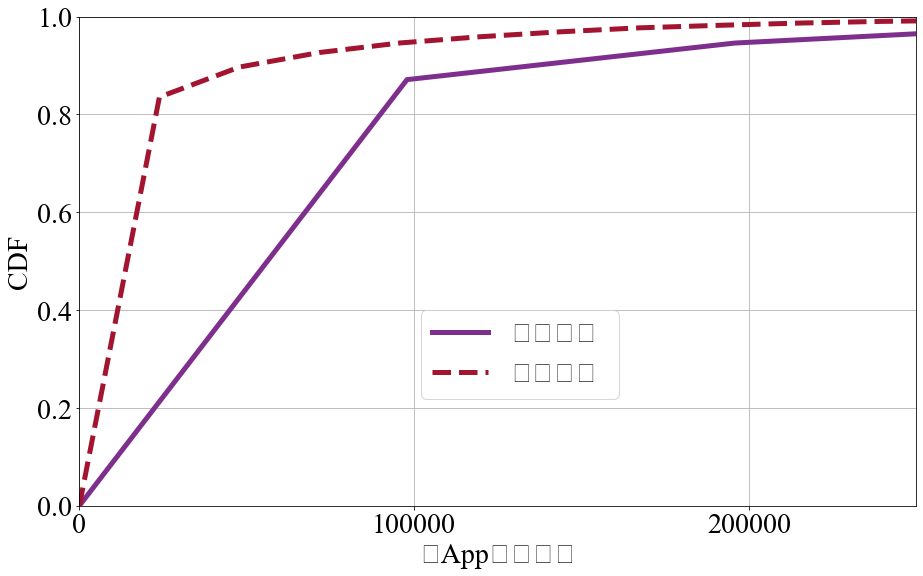

In [70]:
# --import 
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# import seaborn as sns

# # # Chinese
# # from matplotlib.ticker import PercentFormatter
# # mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# # mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 24}
# matplotlib.rc('font', **font)

# --function
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        # print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

def li2df(li):
    src_li = []
    for ele in li:
      value = ele[0]
      count = ele[1]
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    return df

# --data

# non-churner
ncr_x = [0.0, 97872.0612244898, 195744.1224489796, 293616.18367346935, 391488.2448979592, 489360.306122449, 587232.3673469387, 685104.4285714285, 782976.4897959183, 880848.5510204082, 978720.612244898, 1076592.6734693877, 1174464.7346938774, 1272336.7959183673, 1370208.857142857, 1468080.918367347, 1565952.9795918367, 1663825.0408163264, 1761697.1020408163, 1859569.163265306, 1957441.224489796, 2055313.2857142857, 2153185.3469387754, 2251057.4081632653, 2348929.469387755, 2446801.5306122447, 2544673.5918367347, 2642545.6530612246, 2740417.714285714, 2838289.775510204, 2936161.836734694, 3034033.8979591834, 3131905.9591836734, 3229778.0204081633, 3327650.081632653, 3425522.1428571427, 3523394.2040816327, 3621266.265306122, 3719138.326530612, 3817010.387755102, 3914882.448979592, 4012754.5102040814, 4110626.5714285714, 4208498.632653061, 4306370.693877551, 4404242.75510204, 4502114.816326531, 4599986.87755102, 4697858.93877551, 4795731.0]
ncr_y = [0.0, 0.8710824277539585, 0.9458346060628025, 0.9800455741926704, 0.992425010040079, 0.9968167587592756, 0.9985614767162618, 0.9993084733828816, 0.9996161472574498, 0.9997892138118945, 0.9998609550759163, 0.9998942371056172, 0.9999208627293779, 0.9999460091518185, 0.9999585823630389, 0.9999689367722792, 0.9999741139768993, 0.9999785515808595, 0.9999815099834996, 0.9999837287854796, 0.9999874267887796, 0.9999881663894397, 0.9999896455907598, 0.9999918643927398, 0.9999926039933998, 0.9999940831947198, 0.9999940831947198, 0.9999948227953799, 0.9999955623960399, 0.9999963019966999, 0.9999963019966999, 0.9999963019966999, 0.9999970415973599, 0.9999970415973599, 0.9999970415973599, 0.9999970415973599, 0.99999778119802, 0.9999985207986799, 0.9999985207986799, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 1.0]
# all_app_use_times_mean:  36075.24221773695
# all_app_use_times_max:  4795731

# churner
cr_x = [0.0, 23919.326530612245, 47838.65306122449, 71757.97959183673, 95677.30612244898, 119596.63265306123, 143515.95918367346, 167435.2857142857, 191354.61224489796, 215273.9387755102, 239193.26530612246, 263112.5918367347, 287031.9183673469, 310951.2448979592, 334870.5714285714, 358789.89795918367, 382709.2244897959, 406628.55102040817, 430547.8775510204, 454467.20408163266, 478386.5306122449, 502305.85714285716, 526225.1836734693, 550144.5102040817, 574063.8367346938, 597983.1632653062, 621902.4897959183, 645821.8163265307, 669741.1428571428, 693660.4693877551, 717579.7959183673, 741499.1224489796, 765418.4489795918, 789337.775510204, 813257.1020408163, 837176.4285714285, 861095.7551020408, 885015.081632653, 908934.4081632653, 932853.7346938775, 956773.0612244898, 980692.387755102, 1004611.7142857143, 1028531.0408163265, 1052450.3673469387, 1076369.693877551, 1100289.0204081633, 1124208.3469387756, 1148127.6734693877, 1172047.0]
cr_y = [0.0, 0.8354168931405588, 0.8968366126752908, 0.9265409283617785, 0.9459723883030765, 0.9586911620828351, 0.9687737797586694, 0.976981193608001, 0.9821447983476466, 0.9867105120121753, 0.9900804435264703, 0.9923633003587347, 0.9941569735840853, 0.9952712251331667, 0.9962224154799435, 0.9972823132949233, 0.9978530275029895, 0.9982606805087509, 0.9985868029133602, 0.998831394716817, 0.9989672790520709, 0.9991303402543755, 0.9993477551907817, 0.9994292857919339, 0.9994836395260355, 0.9995651701271878, 0.9996738775953908, 0.9997010544624416, 0.9997554081965432, 0.9998097619306446, 0.9999184693988478, 0.9999184693988478, 0.9999184693988478, 0.9999456462658985, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 1.0]
# all_app_use_times_mean:  18442.577345363625
# all_app_use_times_max:  1172047



# --plot
lw = 5
fig, ax = plt.subplots(figsize=(15, 9))
ax.grid('both')

ax.plot(ncr_x,ncr_y,color='#7E2F8E',lw=lw)
ax.plot(cr_x,cr_y,color='#A2142F', lw=lw, linestyle='--')

ax.set_xticks([0,100000,200000])
ax.set_xticklabels([0,100000,200000])

ax.set_xlabel('月App使用次数')
ax.set_ylabel('CDF')

# ax.legend(['正常用户','离网用户'], loc='lower right')
ax.legend(['正常用户','离网用户'], bbox_to_anchor=(0.391, 0.19, 0.27, 0.2), loc="lower left", mode="expand")
ax.set_xlim(0,250000)
# ax.set_xlim(0,200000)
ax.set_ylim(0,1)




# plt.tight_layout()
# fig_name = "Ms-Data_App-Use-Times"
# plt.savefig(fig_name+".png")
# plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
# check_format(ic_37w)
print(ic_37w.columns.tolist())

In [ ]:
check_all(ic_37w)

In [ ]:

normal_user = ic_37w[ic_37w['halt_2012'] == 0]
check_format(normal_user, 'detail', ['balance'])
churn_user = ic_37w[ic_37w['halt_2012'] == 1]
check_format(churn_user, 'detail', ['balance'])

In [ ]:
# --import 
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# from pylab import mpl

# from statsmodels.distributions.empirical_distribution import ECDF
# import statsmodels.api as ssm

# import seaborn as sns

# # # Chinese
# # from matplotlib.ticker import PercentFormatter
# # mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
# # mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# font = { 'size'   : 24}
# matplotlib.rc('font', **font)

# --function
def pkl2df(filename,path='default'):
    '''
    Pkl->DataFrame
    '''
    if path == 'default':
        global save_path
        path = save_path
    file = path + filename + '.pkl'
    # print('file'+file)
    df = None
    try:
        df = pickle.load(open(file,'rb'))
    except:
        print('pickle2df failed')
    return df

def df2pkl(df,filename,mode='no_bak',path='default'):
    '''
    # DataFrame->Pkl
    默认保存在save_path下
    '''
    if path == 'default':
        global save_path
        path = save_path
    if mode == 'bak':
        old_file = pkl2df(filename,path)
        print('file shape before dealing:{}'.format(old_file.shape))
        df2pkl(old_file,filename+'_bak','no_bak',path)
    file = path + filename + '.pkl'
    # print('file shape a-fter dealing:{}'.format(df.shape))
    print('file:'+file)
    pickle.dump(df,open(file,'wb'))
    return None

def check_format(df,mode='detail',feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    
    print(df.shape) # mode:simple
    # print(df.index)
    
    if mode=='cols':
        cols = list(df.columns)
        print(cols)
    elif mode=='detail':
        print(df.columns)
        # print(df.info())
        print(df.describe())
        # print(df.isnull().sum())
    
    print('**********************************')

def check_detail(df,rows=10,feat_list=None,filename='nothing'):
    if feat_list is not None:
        df = df[feat_list]
    if df.empty:
        print('the passing df is None')
        df = pkl2df(filename)
    pd.set_option('display.max_columns', None)#显示所有列
    pd.set_option('display.max_rows', None)#显示所有行
    pd.set_option('max_colwidth',500)#设置value的显示长度为100，默认为50
    print(df.head(rows))
    
    print('**********************************')

def li2df(li):
    src_li = []
    for ele in li:
      value = ele[0]
      count = ele[1]
      for i in range(int(count)):
          src_li.append(value)    
    df = pd.DataFrame(np.array(src_li))
    return df

# --data

# non-churner
# ncr_x = [0.0, 97872.0612244898, 195744.1224489796, 293616.18367346935, 391488.2448979592, 489360.306122449, 587232.3673469387, 685104.4285714285, 782976.4897959183, 880848.5510204082, 978720.612244898, 1076592.6734693877, 1174464.7346938774, 1272336.7959183673, 1370208.857142857, 1468080.918367347, 1565952.9795918367, 1663825.0408163264, 1761697.1020408163, 1859569.163265306, 1957441.224489796, 2055313.2857142857, 2153185.3469387754, 2251057.4081632653, 2348929.469387755, 2446801.5306122447, 2544673.5918367347, 2642545.6530612246, 2740417.714285714, 2838289.775510204, 2936161.836734694, 3034033.8979591834, 3131905.9591836734, 3229778.0204081633, 3327650.081632653, 3425522.1428571427, 3523394.2040816327, 3621266.265306122, 3719138.326530612, 3817010.387755102, 3914882.448979592, 4012754.5102040814, 4110626.5714285714, 4208498.632653061, 4306370.693877551, 4404242.75510204, 4502114.816326531, 4599986.87755102, 4697858.93877551, 4795731.0]
# ncr_y = [0.0, 0.8710824277539585, 0.9458346060628025, 0.9800455741926704, 0.992425010040079, 0.9968167587592756, 0.9985614767162618, 0.9993084733828816, 0.9996161472574498, 0.9997892138118945, 0.9998609550759163, 0.9998942371056172, 0.9999208627293779, 0.9999460091518185, 0.9999585823630389, 0.9999689367722792, 0.9999741139768993, 0.9999785515808595, 0.9999815099834996, 0.9999837287854796, 0.9999874267887796, 0.9999881663894397, 0.9999896455907598, 0.9999918643927398, 0.9999926039933998, 0.9999940831947198, 0.9999940831947198, 0.9999948227953799, 0.9999955623960399, 0.9999963019966999, 0.9999963019966999, 0.9999963019966999, 0.9999970415973599, 0.9999970415973599, 0.9999970415973599, 0.9999970415973599, 0.99999778119802, 0.9999985207986799, 0.9999985207986799, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 0.99999926039934, 1.0]
# all_app_use_times_mean:  36075.24221773695
# all_app_use_times_max:  4795731

# churner
# cr_x = [0.0, 23919.326530612245, 47838.65306122449, 71757.97959183673, 95677.30612244898, 119596.63265306123, 143515.95918367346, 167435.2857142857, 191354.61224489796, 215273.9387755102, 239193.26530612246, 263112.5918367347, 287031.9183673469, 310951.2448979592, 334870.5714285714, 358789.89795918367, 382709.2244897959, 406628.55102040817, 430547.8775510204, 454467.20408163266, 478386.5306122449, 502305.85714285716, 526225.1836734693, 550144.5102040817, 574063.8367346938, 597983.1632653062, 621902.4897959183, 645821.8163265307, 669741.1428571428, 693660.4693877551, 717579.7959183673, 741499.1224489796, 765418.4489795918, 789337.775510204, 813257.1020408163, 837176.4285714285, 861095.7551020408, 885015.081632653, 908934.4081632653, 932853.7346938775, 956773.0612244898, 980692.387755102, 1004611.7142857143, 1028531.0408163265, 1052450.3673469387, 1076369.693877551, 1100289.0204081633, 1124208.3469387756, 1148127.6734693877, 1172047.0]
# cr_y = [0.0, 0.8354168931405588, 0.8968366126752908, 0.9265409283617785, 0.9459723883030765, 0.9586911620828351, 0.9687737797586694, 0.976981193608001, 0.9821447983476466, 0.9867105120121753, 0.9900804435264703, 0.9923633003587347, 0.9941569735840853, 0.9952712251331667, 0.9962224154799435, 0.9972823132949233, 0.9978530275029895, 0.9982606805087509, 0.9985868029133602, 0.998831394716817, 0.9989672790520709, 0.9991303402543755, 0.9993477551907817, 0.9994292857919339, 0.9994836395260355, 0.9995651701271878, 0.9996738775953908, 0.9997010544624416, 0.9997554081965432, 0.9998097619306446, 0.9999184693988478, 0.9999184693988478, 0.9999184693988478, 0.9999456462658985, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 0.9999728231329492, 1.0]
# all_app_use_times_mean:  18442.577345363625
# all_app_use_times_max:  1172047





import seaborn as sns

plot_feat = 'balance'

stats_normal = normal_user.groupby(plot_feat)[plot_feat].agg('count').pipe(pd.DataFrame).rename(columns = {plot_feat: 'frequency'})
# check_all(stats_normal)

# PDF
stats_normal['pdf'] = stats_normal['frequency'] / sum(stats_normal['frequency'])

# CDF
stats_normal['cdf'] = stats_normal['pdf'].cumsum()
stats_normal = stats_normal.reset_index()

check_format(stats_normal, 'detail', [plot_feat,'frequency','pdf','cdf'])
check_detail(stats_normal, 10, [plot_feat,'frequency','pdf','cdf'])

# ---------------
plot_feat = 'balance'

stats_churn = churn_user.groupby(plot_feat)[plot_feat].agg('count').pipe(pd.DataFrame).rename(columns = {plot_feat: 'frequency'})
# check_all(stats_normal)

# PDF
stats_churn['pdf'] = stats_churn['frequency'] / sum(stats_churn['frequency'])

# CDF
stats_churn['cdf'] = stats_churn['pdf'].cumsum()
stats_churn = stats_churn.reset_index()

check_format(stats_churn, 'detail', [plot_feat,'frequency','pdf','cdf'])
check_detail(stats_churn, 10, [plot_feat,'frequency','pdf','cdf'])


# --plot
lw = 5
fig, ax = plt.subplots(figsize=(15, 9))
ax.grid('both')

ax.plot(stats_normal['balance'],stats_normal['cdf'],color='#7E2F8E',lw=lw)
ax.plot(stats_churn['balance'],stats_churn['cdf'],color='#A2142F', lw=lw, linestyle='--')

# ax.set_xticks([0,100000,200000])
# ax.set_xticklabels([0,100000,200000])

ax.set_xlabel('账户余额（元）')
ax.set_ylabel('CDF')

ax.legend(['正常用户','离网用户'], loc='lower right')
# ax.legend(['正常用户','离网用户'])
# ax.legend(['正常用户','离网用户'], bbox_to_anchor=(0.391, 0.19, 0.27, 0.2), loc="lower left", mode="expand")
ax.set_xlim(0,120)
# ax.set_xlim(0,200000)
ax.set_ylim(0,1)

plt.tight_layout()
fig_name = "Ms-Data_Balance"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
# plot_feat = 'avg_net_speed'
plot_feat = 'cm_tfc_sum'
plot_feat = 'in_offer_tfc_sum'
plot_feat = 'out_offer_tfc_sum'
plot_feat = 'max_net_speed'
plot_feat = 'rel_amount'
plot_feat = 'd_stop_cnt_sum_3m'

stats_normal = normal_user.groupby(plot_feat)[plot_feat].agg('count').pipe(pd.DataFrame).rename(columns = {plot_feat: 'frequency'})
# check_all(stats_normal)

# PDF
stats_normal['pdf'] = stats_normal['frequency'] / sum(stats_normal['frequency'])

# CDF
stats_normal['cdf'] = stats_normal['pdf'].cumsum()
stats_normal = stats_normal.reset_index()

check_format(stats_normal, 'detail', [plot_feat,'frequency','pdf','cdf'])
check_detail(stats_normal, 10, [plot_feat,'frequency','pdf','cdf'])

# ---------------

stats_churn = churn_user.groupby(plot_feat)[plot_feat].agg('count').pipe(pd.DataFrame).rename(columns = {plot_feat: 'frequency'})
# check_all(stats_normal)

# PDF
stats_churn['pdf'] = stats_churn['frequency'] / sum(stats_churn['frequency'])

# CDF
stats_churn['cdf'] = stats_churn['pdf'].cumsum()
stats_churn = stats_churn.reset_index()

check_format(stats_churn, 'detail', [plot_feat,'frequency','pdf','cdf'])
check_detail(stats_churn, 10, [plot_feat,'frequency','pdf','cdf'])


# --plot
lw = 5
fig, ax = plt.subplots(figsize=(15, 9))
ax.grid('both')

ax.plot(stats_normal[plot_feat],stats_normal['cdf'],color='#7E2F8E',lw=lw)
ax.plot(stats_churn[plot_feat],stats_churn['cdf'],color='#A2142F', lw=lw, linestyle='--')

# ax.set_xticks([0,100000,200000])
# ax.set_xticklabels([0,100000,200000])

ax.set_xlabel('账户余额（元）')
ax.set_ylabel('CDF')

ax.legend(['正常用户','离网用户'], loc='lower right')
# ax.legend(['正常用户','离网用户'])
# ax.legend(['正常用户','离网用户'], bbox_to_anchor=(0.391, 0.19, 0.27, 0.2), loc="lower left", mode="expand")
# ax.set_xlim(0,30)
# ax.set_xlim(0,50000)
# ax.set_xlim(0,200000)
# ax.set_xlim(0,8000)
# ax.set_xlim(0,80)
ax.set_xlim(0,20)
ax.set_ylim(0,1)

plt.tight_layout()
fig_name = "Ms-Data_Balance"
# plt.savefig(fig_name+".png")
# plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:


def plot_cdf_two_subsection(df1, df2, col,df1_max=None,df2_max=None):
    x_max = None
    if df1_max is None and df2_max is None:
        x_max = max(df1[col].max(),df2[col].max())
    else:    
        x_max = max(df1_max,df2_max)
    print(f'x_max:{x_max}')
    
    df1_high = df1.loc[:df1.shape[0]//3]
    df1_med = df1.loc[df1.shape[0]//3:df1.shape[0]//3*2]
    df1_low = df1.loc[df1.shape[0]//3*2:]
    
    lw = '2'
    ecdf = ssm.distributions.ECDF(df1_high[col])
    x = np.linspace(0, df1_high[col].max())
    y = ecdf(x)
    plt.plot(x,y, linewidth=lw, color='red')
    print('normal_high_mean: ', df1_high[col].mean())

    ecdf = ssm.distributions.ECDF(df1_med[col])
    x = np.linspace(0, df1_med[col].max())
    y = ecdf(x)
    plt.plot(x,y, linewidth=lw, color='yellow')
    print('normal_med_mean: ', df1_med[col].mean())
    
    ecdf = ssm.distributions.ECDF(df1_low[col])
    x = np.linspace(0, df1_low[col].max())
    y = ecdf(x)
    plt.plot(x,y, linewidth=lw, color='blue')
    print('normal_low_mean: ', df1_low[col].mean())    

    df2_high = df2.loc[:df2.shape[0]//3]
    df2_med = df2.loc[df2.shape[0]//3:df2.shape[0]//3*2]
    df2_low = df2.loc[df2.shape[0]//3*2:]
    
    ecdf = ssm.distributions.ECDF(df2_high[col])
    x = np.linspace(0, df2_high[col].max())
    y = ecdf(x)
    plt.plot(x,y ,'--r',linewidth=lw)
    print('lost_high_mean: ', df2_high[col].mean())

    ecdf = ssm.distributions.ECDF(df2_med[col])
    x = np.linspace(0, df2_med[col].max())
    y = ecdf(x)
    plt.plot(x,y, '--y',linewidth=lw)
    print('lost_med_mean: ', df2_med[col].mean())
    
    ecdf = ssm.distributions.ECDF(df2_low[col])
    x = np.linspace(0, df2_low[col].max())
    y = ecdf(x)
    plt.plot(x,y,'--b', linewidth=lw)
    print('lost_low_mean: ', df2_low[col].mean()) 
    
    plt.xlabel(col)
    plt.ylabel('CDF')
    plt.legend(['High Non-Churners','Mid Non-Churners','Low Non-Churnersn','High Churners','Mid Churners','Low Churners'])
    plt.xlim(0, x_max)
    plt.ylim(0, 1)
    plt.show()


plot_cdf_two_subsection(normal,lost,'')    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# # Overlay a reversed cumulative histogram.
# ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
#         label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib
# font = {'family' : 'Times New Roman',
#         'size'   : 28}
# matplotlib.rc('font', **font)


labels = ['2000', '4000', '6000', '8000', '10000', '12000', '14000', '16000', '18000', '20000']
ticks = [1,2,3,4,5,6,7,8,9,10]

# rf_recall = [0.04832768528068366, 0.09809194047443642, 0.14708265802269044, 0.19669957271253868, 0.24410637984381905, 0.29099749521143364, 0.3416089583026374, 0.39170472963017533, 0.44143214969795197, 0.49193310741122737]
# lgbm_recall = [0.07260203329895389, 0.13754236039487255, 0.19795196699572712, 0.25659348754972744, 0.3101885958449978, 0.3607263886842493, 0.40864888757919554, 0.45362457639605125, 0.4941432149697952, 0.5344040076617061]
# lstm_recall = [0.03385148077206424, 0.05982024458523648, 0.08494180050095772, 0.1068955355827317, 0.12652865772800942, 0.14627228525121555, 0.1638794754678061, 0.18115514955061146, 0.1978046264918226, 0.21474878444084278]
# mlp_recall = [0.07263886842493002, 0.13883158980403712, 0.20001473405039044, 0.25799322233682037, 0.311662000884043, 0.3638205392662443, 0.41284809194047445, 0.45878149403270957, 0.5005156917636658, 0.5413658464711949]
# eam_recall = [0.07267570355090615, 0.13883158980403712, 0.20097244732576985, 0.26068218653307795, 0.316155886253131, 0.3677987328716664, 0.4173051421835863, 0.4645646088109621, 0.5083247384706056, 0.5484013555326359]

# rf_recall = [0.06700308384105956, 0.13238548725604632, 0.19397378582450772, 0.252468114250358, 0.3076102182298393, 0.3585163708845512, 0.4064022657123754, 0.45159906877565986, 0.4900549229684252, 0.5282529570579119]
# rf_recall = [0.06718730017873456, 0.13047004576405205, 0.19117442070702087, 0.24786378452529845, 0.30079596410654597, 0.3496762458755195, 0.39490994241076927, 0.43671783787157636, 0.47403184656983316, 0.5084358775785318]
rf_recall = [0.06567704914640596, 0.12722858993055167, 0.18513347763714885, 0.23817616802473043, 0.29022413903642097, 0.3335791586483746, 0.37671302774439297, 0.41708434378229997, 0.450272850902679, 0.4825403916691854]
lgbm_recall = [0.07149574652675483, 0.13502631182504982, 0.19461008016587172, 0.24989318327882168, 0.30090671499670474, 0.348253576122141, 0.39294477468775235, 0.43569505494487126, 0.4750832167754693, 0.512321499817402]
lstm_recall = [0.008280536319434212, 0.01564756151466038, 0.02218211286282599, 0.028178871371740088, 0.03405039045233534, 0.03976720200383085, 0.045145130396345955, 0.05066303226757035, 0.05600412553410933, 0.06116841019596288]
mlp_recall = [0.07138648693480582, 0.13570066897403515, 0.19511555669080888, 0.2505523674611517, 0.3037055415175375, 0.3521806328268452, 0.398224594946924, 0.44058503765501894, 0.481029964242912, 0.5201857428237346]
resmlp_recall = [0.06801804321724429, 0.12984973947698691, 0.18777510721641744, 0.24161787652545813, 0.2923202317402755, 0.3395461557237999, 0.38508170578614576, 0.4251882614360381, 0.4620758433648525, 0.4932471570571049]
eam_recall = [0.07311774601103752, 0.14373070479218247, 0.20863421221616263, 0.27062765375361225, 0.3281641698443018, 0.38290119191423727, 0.4323339937929685, 0.48147202103701314, 0.5268897575159934, 0.5692133813803302]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#FF9912'
c6 = '#A2142F'
legends = ['随机森林','轻量梯度提升机','长短期记忆网络','多层感知机','残差前馈神经网络' ,'互联网卡离网预测']
lw = 3
ms = 9
ms = 12

ax.plot(ticks, rf_recall, 'o-.', color=c1, lw=lw, ms=ms)
ax.plot(ticks, lgbm_recall, '*--', color=c2, lw=lw, ms=ms)
ax.plot(ticks, lstm_recall,'v-',color=c3, lw=lw, ms=ms)
ax.plot(ticks, mlp_recall, '^:', color=c4, lw=lw, ms=ms)
ax.plot(ticks, resmlp_recall, 's--', color=c5, lw=lw, ms=ms)
ax.plot(ticks, eam_recall, 'd-', color=c6, lw=lw, ms=ms)

ax.set_xlim(0.8,10.2)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)
ax.legend(legends,bbox_to_anchor=(0, 0.48, 1, 0))
ax.set_ylabel('召回率')
ax.set(xlabel='Top-U的互联网卡用户')
# ax.grid()

plt.tight_layout()
fig_name = "Ms-ICCP_TopU-Recall"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()



In [ ]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


# labels = ['1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10000']
# labels = ['500','1000','1500','2000','2500','3000','3500','4000','4500','5000','5500','6000','6500','7000','7500','8000','8500','9000']
# labels = ['500','1000','2000','3000','4000','5000','6000','7000','8000','9000']
labels = ['2000', '4000', '6000', '8000', '10000', '12000', '14000', '16000', '18000', '20000']
ticks = [1,2,3,4,5,6,7,8,9,10]


# rf_precision = [0.656, 0.66575, 0.6655, 0.6675, 0.6627, 0.6583333333333333, 0.6624285714285715, 0.664625, 0.6657777777777778, 0.66775]
# lgbm_precision = [0.9855, 0.9335, 0.8956666666666667, 0.87075, 0.8421, 0.8160833333333334, 0.7924285714285715, 0.7696875, 0.7452777777777778, 0.7254]
# lstm_precision = [0.3355, 0.29275, 0.27266666666666667, 0.25875, 0.2405, 0.20333333333333334, 0.1742857142857143, 0.1525, 0.13555555555555557, 0.122]
# mlp_precision = [0.986, 0.94225, 0.905, 0.8755, 0.8461, 0.8230833333333333, 0.8005714285714286, 0.7784375, 0.7548888888888889, 0.73485]
# eam_precision = [0.9865, 0.94225, 0.9093333333333333, 0.884625, 0.8583, 0.8320833333333333, 0.8092142857142857, 0.78825, 0.7666666666666667, 0.7444]

# rf_precision = [0.9095000000000001, 0.8985, 0.8776666666666667, 0.8567500000000001, 0.8351000000000001, 0.8110833333333334, 0.7880714285714285, 0.76625, 0.7391111111111112, 0.7170500000000001]
# rf_precision = [0.9120000000000001, 0.8855000000000001, 0.865, 0.8411250000000001, 0.8166, 0.7910833333333334, 0.7657857142857143, 0.7409999999999999, 0.7149444444444444, 0.69015]
rf_precision = [0.8915, 0.8634999999999999, 0.8376666666666667, 0.8082499999999999, 0.7879, 0.7546666666666667, 0.7305, 0.7076875, 0.679111111111111, 0.655]
lgbm_precision = [0.9685, 0.9145, 0.8786666666666667, 0.8462500000000001, 0.8152000000000001, 0.7862500000000001, 0.7604285714285715, 0.7377499999999999, 0.7150555555555556, 0.6940000000000001]
lstm_precision = [0.562, 0.531, 0.5018333333333334, 0.478125, 0.4622, 0.4498333333333333, 0.4377142857142857, 0.4298125, 0.42233333333333334, 0.41515]
mlp_precision = [0.969, 0.921, 0.8828333333333334, 0.85025, 0.8245000000000001, 0.7967500000000001, 0.7722142857142857, 0.7475625, 0.7255, 0.7061]
resmlp_precision = [0.9275, 0.9125, 0.9025, 0.891875, 0.8815, 0.8754166666666666, 0.8671428571428571, 0.85625, 0.8527777777777777, 0.8405]
eam_precision = [0.9925, 0.9754999999999999, 0.944, 0.9183749999999999, 0.8909, 0.86625, 0.8383571428571429, 0.8169375000000001, 0.7946666666666666, 0.7726500000000001]

new_rf_precision = []
new_lgbm_precision = []
new_lstm_precision = []
new_mlp_precision = []
new_resmlp_precision = []
new_eam_precision = []
for ele1,ele2,ele3,ele4,ele5,ele6 in zip(rf_precision,lgbm_precision,lstm_precision,mlp_precision,resmlp_precision,eam_precision):
    new_rf_precision.append(ele1)
    new_lgbm_precision.append(ele2)
    new_lstm_precision.append(ele3)
    new_mlp_precision.append(ele4)
    new_resmlp_precision.append(ele5)
    new_eam_precision.append(ele6)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#FF9912'
c6 = '#A2142F'

legends = ['随机森林','轻量梯度提升机','长短期记忆网络','多层感知机','残差前馈神经网络' ,'互联网卡离网预测']

lw = 3
ms = 9
ms = 12

ax.plot(ticks, new_rf_precision, 'o-.', color=c1, lw=lw, ms=ms)
ax.plot(ticks, new_lgbm_precision, '*--', color=c2, lw=lw, ms=ms)
ax.plot(ticks, new_lstm_precision,'v-',color=c3, lw=lw, ms=ms)
ax.plot(ticks, new_mlp_precision, '^:', color=c4, lw=lw, ms=ms)
ax.plot(ticks, new_resmlp_precision, 's--', color=c5, lw=lw, ms=ms)
ax.plot(ticks, new_eam_precision, 'd-', color=c6, lw=lw, ms=ms)

ax.set_ylabel('精准率')
ax.set(xlabel='Top-U的互联网卡用户')
# ax.legend(legends)
ax.legend(legends,bbox_to_anchor=(0, 0.65, 1, 0))

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)




ax.set_xlim(0.8,10.2)
ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)




# ax.grid()

plt.tight_layout()
fig_name = "Ms-ICCP_TopU-Precision"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()



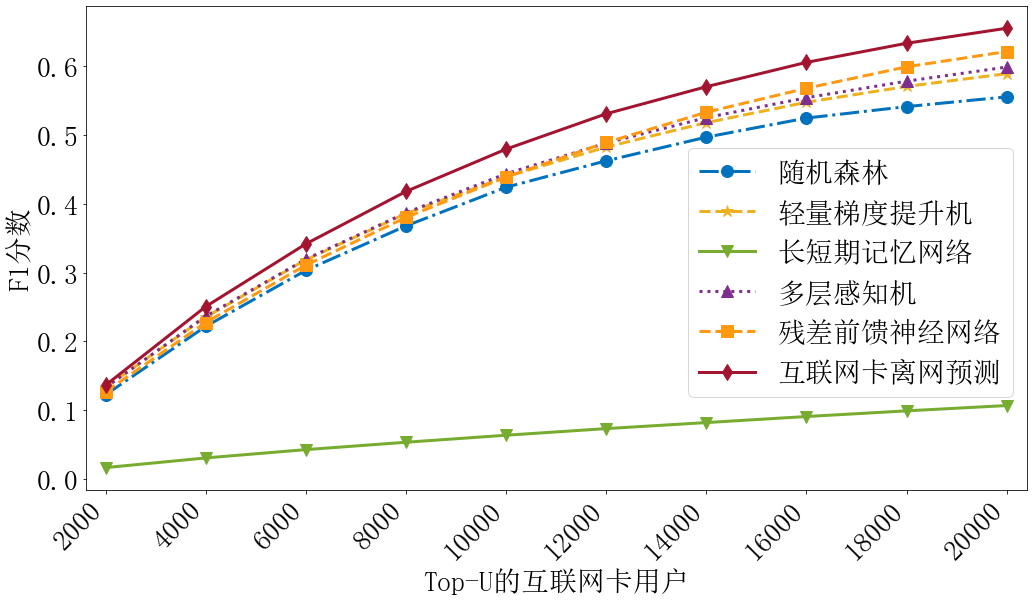

In [72]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)


labels = ['1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10000']
labels = ['500','1000','1500','2000','2500','3000','3500','4000','4500','5000','5500','6000','6500','7000','7500','8000','8500','9000']
labels = ['500','1000','2000','3000','4000','5000','6000','7000','8000','9000']
ticks = [0.5,1,2,3,4,5,6,7,8,9]
labels = ['2000', '4000', '6000', '8000', '10000', '12000', '14000', '16000', '18000', '20000']
ticks = [1,2,3,4,5,6,7,8,9,10]

def f1_score(recall,precision):
    return 2*recall*precision/(recall+precision)

# rf_recall = [0.04832768528068366, 0.09809194047443642, 0.14708265802269044, 0.19669957271253868, 0.24410637984381905, 0.29099749521143364, 0.3416089583026374, 0.39170472963017533, 0.44143214969795197, 0.49193310741122737]
# lgbm_recall = [0.07260203329895389, 0.13754236039487255, 0.19795196699572712, 0.25659348754972744, 0.3101885958449978, 0.3607263886842493, 0.40864888757919554, 0.45362457639605125, 0.4941432149697952, 0.5344040076617061]
# lstm_recall = [0.03385148077206424, 0.05982024458523648, 0.08494180050095772, 0.1068955355827317, 0.12652865772800942, 0.14627228525121555, 0.1638794754678061, 0.18115514955061146, 0.1978046264918226, 0.21474878444084278]
# mlp_recall = [0.07263886842493002, 0.13883158980403712, 0.20001473405039044, 0.25799322233682037, 0.311662000884043, 0.3638205392662443, 0.41284809194047445, 0.45878149403270957, 0.5005156917636658, 0.5413658464711949]
# eam_recall = [0.07267570355090615, 0.13883158980403712, 0.20097244732576985, 0.26068218653307795, 0.316155886253131, 0.3677987328716664, 0.4173051421835863, 0.4645646088109621, 0.5083247384706056, 0.5484013555326359]


# rf_precision = [0.656, 0.66575, 0.6655, 0.6675, 0.6627, 0.6583333333333333, 0.6624285714285715, 0.664625, 0.6657777777777778, 0.66775]
# lgbm_precision = [0.9855, 0.9335, 0.8956666666666667, 0.87075, 0.8421, 0.8160833333333334, 0.7924285714285715, 0.7696875, 0.7452777777777778, 0.7254]
# lstm_precision = [0.3355, 0.29275, 0.27266666666666667, 0.25875, 0.2405, 0.20333333333333334, 0.1742857142857143, 0.1525, 0.13555555555555557, 0.122]
# mlp_precision = [0.986, 0.94225, 0.905, 0.8755, 0.8461, 0.8230833333333333, 0.8005714285714286, 0.7784375, 0.7548888888888889, 0.73485]
# eam_precision = [0.9865, 0.94225, 0.9093333333333333, 0.884625, 0.8583, 0.8320833333333333, 0.8092142857142857, 0.78825, 0.7666666666666667, 0.7444]

# rf_recall = [0.06700308384105956, 0.13238548725604632, 0.19397378582450772, 0.252468114250358, 0.3076102182298393, 0.3585163708845512, 0.4064022657123754, 0.45159906877565986, 0.4900549229684252, 0.5282529570579119]
# rf_recall = [0.06718730017873456, 0.13047004576405205, 0.19117442070702087, 0.24786378452529845, 0.30079596410654597, 0.3496762458755195, 0.39490994241076927, 0.43671783787157636, 0.47403184656983316, 0.5084358775785318]
rf_recall = [0.06567704914640596, 0.12722858993055167, 0.18513347763714885, 0.23817616802473043, 0.29022413903642097, 0.3335791586483746, 0.37671302774439297, 0.41708434378229997, 0.450272850902679, 0.4825403916691854]
lgbm_recall = [0.07149574652675483, 0.13502631182504982, 0.19461008016587172, 0.24989318327882168, 0.30090671499670474, 0.348253576122141, 0.39294477468775235, 0.43569505494487126, 0.4750832167754693, 0.512321499817402]
lstm_recall = [0.008280536319434212, 0.01564756151466038, 0.02218211286282599, 0.028178871371740088, 0.03405039045233534, 0.03976720200383085, 0.045145130396345955, 0.05066303226757035, 0.05600412553410933, 0.06116841019596288]
mlp_recall = [0.07138648693480582, 0.13570066897403515, 0.19511555669080888, 0.2505523674611517, 0.3037055415175375, 0.3521806328268452, 0.398224594946924, 0.44058503765501894, 0.481029964242912, 0.5201857428237346]
resmlp_recall = [0.06801804321724429, 0.12984973947698691, 0.18777510721641744, 0.24161787652545813, 0.2923202317402755, 0.3395461557237999, 0.38508170578614576, 0.4251882614360381, 0.4620758433648525, 0.4932471570571049]
eam_recall = [0.07311774601103752, 0.14373070479218247, 0.20863421221616263, 0.27062765375361225, 0.3281641698443018, 0.38290119191423727, 0.4323339937929685, 0.48147202103701314, 0.5268897575159934, 0.5692133813803302]

# rf_precision = [0.9095000000000001, 0.8985, 0.8776666666666667, 0.8567500000000001, 0.8351000000000001, 0.8110833333333334, 0.7880714285714285, 0.76625, 0.7391111111111112, 0.7170500000000001]
# rf_precision = [0.9120000000000001, 0.8855000000000001, 0.865, 0.8411250000000001, 0.8166, 0.7910833333333334, 0.7657857142857143, 0.7409999999999999, 0.7149444444444444, 0.69015]
rf_precision = [0.8915, 0.8634999999999999, 0.8376666666666667, 0.8082499999999999, 0.7879, 0.7546666666666667, 0.7305, 0.7076875, 0.679111111111111, 0.655]
lgbm_precision = [0.9685, 0.9145, 0.8786666666666667, 0.8462500000000001, 0.8152000000000001, 0.7862500000000001, 0.7604285714285715, 0.7377499999999999, 0.7150555555555556, 0.6940000000000001]
lstm_precision = [0.562, 0.531, 0.5018333333333334, 0.478125, 0.4622, 0.4498333333333333, 0.4377142857142857, 0.4298125, 0.42233333333333334, 0.41515]
mlp_precision = [0.969, 0.921, 0.8828333333333334, 0.85025, 0.8245000000000001, 0.7967500000000001, 0.7722142857142857, 0.7475625, 0.7255, 0.7061]
resmlp_precision = [0.9275, 0.9125, 0.9025, 0.891875, 0.8815, 0.8754166666666666, 0.8671428571428571, 0.85625, 0.8527777777777777, 0.8405]
eam_precision = [0.9925, 0.9754999999999999, 0.944, 0.9183749999999999, 0.8909, 0.86625, 0.8383571428571429, 0.8169375000000001, 0.7946666666666666, 0.7726500000000001]


# [0.08867874245263378, 0.16262316745818708, 0.28162556165751373, 0.37268700086596745, 0.44403780227925504, 0.4955618119473019, 0.5315036767963143, 0.5548566523605151, 0.5660175539819914, 0.5733750195839499]
# [0.0907740164684355, 0.17025975561687035, 0.3085409223477944, 0.41389152659850986, 0.4926469478079333, 0.5496015622457282, 0.5901921327694886, 0.6146662713472486, 0.6302463688466672, 0.6352574436326499]
# [0.030638964167419454, 0.055171741778319114, 0.09952302910426675, 0.1308046065259117, 0.1528869752421959, 0.17465355862775214, 0.1898068965517241, 0.20626102733270504, 0.21652719378427787, 0.22442721814543032]
# [0.09686935008088306, 0.18440779173493538, 0.3238177001910717, 0.42828455162019596, 0.5065641192235848, 0.5669784683334648, 0.6153868992959901, 0.6490829589697514, 0.6728971836164424, 0.6840128410914927]
# [0.09686935008088306, 0.18404414447282014, 0.32878928907519894, 0.43701048744460863, 0.5230529023124115, 0.5891101867314407, 0.6424568203474308, 0.6813037734503175, 0.7069410793028627, 0.7248880688468158]
new_rf_recall = []
new_lgbm_recall = []
new_lstm_recall = []
new_mlp_recall = []
new_resmlp_recall = []
new_eam_recall = []
for ele1,ele2,ele3,ele4,ele5,ele6,ele7,ele8,ele9,ele10,ele11,ele12 in zip(rf_recall,lgbm_recall,lstm_recall,mlp_recall,resmlp_recall,eam_recall,rf_precision,lgbm_precision,lstm_precision,mlp_precision,resmlp_precision,eam_precision):
    new_rf_recall.append(f1_score(ele1,ele7))
    new_lgbm_recall.append(f1_score(ele2,ele8))
    new_lstm_recall.append(f1_score(ele3,ele9))
    new_mlp_recall.append(f1_score(ele4,ele10))
    new_resmlp_recall.append(f1_score(ele5,ele11))
    new_eam_recall.append(f1_score(ele6,ele12))


# new_rf_recall2 = [new_rf_recall[0]]
# new_lgbm_recall2 = [new_lgbm_recall[0]]
# new_lstm_recall2 = [new_lstm_recall[0]]
# new_mlp_recall2 = [new_mlp_recall[0]]
# new_eam_recall2 = [new_eam_recall[0]]

# for i in range(1,18,2):
#     new_rf_recall2.append(new_rf_recall[i])
#     new_lgbm_recall2.append(new_lgbm_recall[i])
#     new_lstm_recall2.append(new_lstm_recall[i])
#     new_mlp_recall2.append(new_mlp_recall[i])
#     new_eam_recall2.append(new_eam_recall[i])

# print(new_rf_recall2)
# print(new_lgbm_recall2)
# print(new_lstm_recall2)
# print(new_mlp_recall2)
# print(new_eam_recall2)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#FF9912'
c6 = '#A2142F'
legends = ['随机森林','轻量梯度提升机','长短期记忆网络','多层感知机','残差前馈神经网络' ,'互联网卡离网预测']
lw = 3
ms = 9
ms = 12

ax.plot(ticks, new_rf_recall, 'o-.', color=c1, lw=lw, ms=ms)
ax.plot(ticks, new_lgbm_recall, '*--', color=c2, lw=lw, ms=ms)
ax.plot(ticks, new_lstm_recall,'v-',color=c3, lw=lw, ms=ms)
ax.plot(ticks, new_mlp_recall, '^:', color=c4, lw=lw, ms=ms)
ax.plot(ticks, new_resmlp_recall, 's--', color=c5, lw=lw, ms=ms)
ax.plot(ticks, new_eam_recall, 'd-', color=c6, lw=lw, ms=ms)


ax.set_xlim(0.8,10.2)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.legend(legends, bbox_to_anchor=(0.00, 0.45, 1, 0.0))

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

ax.set_ylabel('F1分数')
ax.set(xlabel='Top-U的互联网卡用户')
# ax.grid()

fig.autofmt_xdate(rotation=45)

plt.tight_layout()
fig_name = "Ms-ICCP_TopU-F1Score"
# plt.savefig(fig_name+".png")
# plt.savefig(fig_name+".pdf")
plt.show()



In [ ]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

female_recall_list = [0.7715,0.7216,0.675,0.7143,0.7345]
female_precision_list = [0.6171,0.6606,0.6907,0.6382,0.682]
female_f1_list = [0.6857,0.6897,0.6828,0.6741,0.7073]

male_recall_list = [0.762,0.7434,0.7415,0.7102,0.7478 ]
male_precision_list = [0.6484,0.6749,0.6683,0.7018,0.6666]
male_f1_list = [0.7007,0.7075,0.703,0.706,0.7049]
       
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()


female_list = [get_mean(female_recall_list),get_mean(female_precision_list),get_mean(female_f1_list)]
male_list = [get_mean(male_recall_list),get_mean(male_precision_list),get_mean(male_f1_list)]

female_min_list = [get_min(female_recall_list),get_min(female_precision_list),get_min(female_f1_list)]
male_min_list = [get_min(male_recall_list),get_min(male_precision_list),get_min(male_f1_list)]

female_max_list = [get_max(female_recall_list),get_max(female_precision_list),get_max(female_f1_list)]
male_max_list = [get_max(male_recall_list),get_max(male_precision_list),get_max(male_f1_list)]

labels = ['召回率', '精准率', 'F1分数']
legends = ['女性','男性']
# x = np.array([0,0.6,1.2])
x = np.array([0,0.5,1])
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#A2142F'

female_array = np.array([female_min_list,female_max_list])
male_array = np.array([male_min_list,male_max_list])
print(female_array)
print(male_array)

elinewidth = 2
lw = 3.5
edgewidth = 0.025
capsize = 4
# rects1 = ax.bar(x=x-2*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-0.5*width-edgewidth/4, height=female_list, width=width, label='女性',edgecolor=c5, hatch="/",yerr=female_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects3 = ax.bar(x=x-0*width, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+0.5*width+edgewidth/4, height=male_list, width=width, label='男性',edgecolor=c1, hatch="\\",yerr=male_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+2*width+edgewidth, height=eam_list, width=width, label='EAMLP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

# # ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# # ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

# ax.set_xlim(-0.2,1.4)
ax.set_xlim(-0.2,1.2)
ax.set_ylim(0, 1)
ax.set_ylim(0.5,0.8)
# ax.set_ylim(0.7,0.8)
ax.set_xlabel('指标')
ax.set_ylabel('性能分数')
ax.legend(loc='upper right')


font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

ax.set_xticks(x)
ax.set_xticklabels(labels)




plt.tight_layout()
fig_name = "Ms-ICCP_Impact-Gender"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# Raw Data-Model Performance

# # # low
# 0.7149, 0.7615, 0.6736,
# 0.722, 0.748, 0.6977,
# 0.7158, 0.7583, 0.6779,
# 0.718, 0.7414, 0.696,
# 0.7202, 0.7802, 0.6688,

# # # mid
# 0.5868, 0.6255, 0.5527,
# 0.6122, 0.6116, 0.6128,
# 0.61, 0.5901, 0.6314,
# 0.5931, 0.6866, 0.522,
# 0.6411, 0.635, 0.6473,

# # # high
# 0.6077, 0.6182, 0.5976,
# 0.5885, 0.6067, 0.5714,
# 0.6028, 0.6532, 0.5597,
# 0.5805, 0.5395, 0.6283,
# 0.5836, 0.5439, 0.6295,


low_recall_list = [0.7615,0.748,0.7583,0.7414,0.7802]
low_precision_list = [0.6736,0.6977,0.6779,0.696, 0.6688]
low_f1_list = [0.7149,0.722,0.7158,0.718,0.7202]

mid_recall_list = [0.6255,0.6116,0.5901,0.6866,0.635,]
mid_precision_list = [0.5527,0.6128,0.6314,0.522,0.6473]
mid_f1_list = [0.5868,0.6122,0.61,0.5931,0.6411]

high_recall_list = [0.6182,0.6067,0.6532,0.5395,0.5439]
high_precision_list = [0.5976,0.5714,0.5597,0.6283,0.6295]
high_f1_list = [0.6077,0.5885,0.6028,0.5805,0.5836]
       

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()


low_list = [get_mean(low_recall_list),get_mean(low_precision_list),get_mean(low_f1_list)]
mid_list = [get_mean(mid_recall_list),get_mean(mid_precision_list),get_mean(mid_f1_list)]
high_list = [get_mean(high_recall_list),get_mean(high_precision_list),get_mean(high_f1_list)]

low_min_list = [get_min(low_recall_list),get_min(low_precision_list),get_min(low_f1_list)]
mid_min_list = [get_min(mid_recall_list),get_min(mid_precision_list),get_min(mid_f1_list)]
high_min_list = [get_min(high_recall_list),get_min(high_precision_list),get_min(high_f1_list)]

low_max_list = [get_max(low_recall_list),get_max(low_precision_list),get_max(low_f1_list)]
mid_max_list = [get_max(mid_recall_list),get_max(mid_precision_list),get_max(mid_f1_list)]
high_max_list = [get_max(high_recall_list),get_max(high_precision_list),get_max(high_f1_list)]

labels = ['召回率', '精准率', 'F1分数']
legends = ['APP低频','APP中频','APP高频']
# x = np.array([0,0.6,1.2])
x = np.array([0,0.5,1])
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#A2142F'

low_array = np.array([low_min_list,low_max_list])
mid_array = np.array([mid_min_list,mid_max_list])
high_array = np.array([high_min_list,high_max_list])
print(low_array)
print(high_array)

elinewidth = 2
lw = 3.5
edgewidth = 0.025
capsize = 4
# rects1 = ax.bar(x=x-2*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-width-edgewidth/3, height=low_list, width=width, label='APP低频',edgecolor=c5, hatch="/",yerr=low_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects3 = ax.bar(x=x, height=mid_list, width=width, label='APP中频',edgecolor=c2, hatch="x",yerr=low_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+width+edgewidth/3, height=high_list, width=width, label='APP高频',edgecolor=c1, hatch="\\",yerr=high_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+2*width+edgewidth, height=eam_list, width=width, label='EAMLP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

# # ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# # ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

# ax.set_xlim(-0.2,1.4)
ax.set_xlim(-0.3,1.3)
ax.set_ylim(0, 1)
# ax.set_ylim(0.5,0.8)
# ax.set_ylim(0.7,0.8)
ax.set_xlabel('指标')
ax.set_ylabel('性能分数')
ax.legend(legends, loc='upper right', bbox_to_anchor=(0.00, 1.02, 1, 0.0))

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)
ax.set_xticks(x)
ax.set_xticklabels(labels)


plt.tight_layout()
fig_name = "Ms-ICCP_Impact-APP"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
# Raw Data-Model Performance

# # # 19
# 0.6892, 0.7466, 0.6399,
# 0.6967, 0.7319, 0.6647,
# 0.6933, 0.7247, 0.6646,
# 0.6938, 0.7095, 0.6787,
# 0.6981, 0.7367, 0.6633,

# # # 39
# 0.7705, 0.8815, 0.6844
# 0.7611, 0.8989, 0.6599,
# 0.751, 0.8862, 0.6516,
# 0.7532, 0.8882, 0.6538,
# 0.7772, 0.8761, 0.6984,



# recall_list_19 = [0.7466,0.7319,0.7247,0.7095,0.7367]
# precision_list_19 = [0.6399,0.6647,0.6646,0.6787,0.6633]
# f1_list_19 = [0.6892,0.6967,0.6933,0.6938,0.6981]

# recall_list_39 = [0.8815,0.8989,0.8862,0.8882,0.8761]
# precision_list_39 = [0.6844,0.6599,0.6516,0.6538,0.6984]
# f1_list_39 = [0.7705,0.7611,0.751,0.7532,0.7772]

female_recall_list = [0.7466,0.7319,0.7247,0.7095,0.7367]
female_precision_list = [0.6399,0.6647,0.6646,0.6787,0.6633]
female_f1_list = [0.6892,0.6967,0.6933,0.6938,0.6981]

male_recall_list = [0.8815,0.8989,0.8862,0.8882,0.8761]
male_precision_list = [0.6844,0.6599,0.6516,0.6538,0.6984]
male_f1_list = [0.7705,0.7611,0.751,0.7532,0.7772]
    

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

def get_mean(li):
    se = pd.Series(li)
    return se.mean()
    # return se.mean(),se.min(),se.max()
def get_min(li):
    se = pd.Series(li)
    return se.mean()-se.min()
    # return se.min()

def get_max(li):
    se = pd.Series(li)
    return se.max()-se.mean()
    # return se.max()


female_list = [get_mean(female_recall_list),get_mean(female_precision_list),get_mean(female_f1_list)]
male_list = [get_mean(male_recall_list),get_mean(male_precision_list),get_mean(male_f1_list)]

female_min_list = [get_min(female_recall_list),get_min(female_precision_list),get_min(female_f1_list)]
male_min_list = [get_min(male_recall_list),get_min(male_precision_list),get_min(male_f1_list)]

female_max_list = [get_max(female_recall_list),get_max(female_precision_list),get_max(female_f1_list)]
male_max_list = [get_max(male_recall_list),get_max(male_precision_list),get_max(male_f1_list)]

labels = ['召回率', '精准率', 'F1分数']
legends = ['19元套餐','39元套餐']
# x = np.array([0,0.6,1.2])
x = np.array([0,0.5,1])
width = 0.15  # the width of the bars
lw = 2.5
c1 = '#0072BD'
c2 = '#EDB120'
c3 = '#77AC30'
c4 = '#7E2F8E'
c5 = '#A2142F'

female_array = np.array([female_min_list,female_max_list])
male_array = np.array([male_min_list,male_max_list])
print(female_array)
print(male_array)

elinewidth = 2
lw = 3.5
edgewidth = 0.025
capsize = 4
# rects1 = ax.bar(x=x-2*width-edgewidth, height=rf_list, width=width, label='RF',edgecolor=c1, hatch="/",yerr=rf_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects2 = ax.bar(x=x-0.5*width-edgewidth/4, height=female_list, width=width, label='Female',edgecolor=c5, hatch="/",yerr=female_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects3 = ax.bar(x=x-0*width, height=lstm_list, width=width, label='LSTM',edgecolor=c3, hatch="-",yerr=lstm_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
rects4 = ax.bar(x=x+0.5*width+edgewidth/4, height=male_list, width=width, label='Male',edgecolor=c1, hatch="\\",yerr=male_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)
# rects5 = ax.bar(x=x+2*width+edgewidth, height=eam_list, width=width, label='EAMLP',edgecolor=c5, hatch="+",yerr=eam_array,error_kw={'capsize':capsize,'elinewidth':elinewidth},color='#FFFFFF',lw=lw)

# # ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# # ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

# ax.set_xlim(-0.2,1.4)
ax.set_xlim(-0.2,1.2)
ax.set_ylim(0, 1)
# ax.set_ylim(0.5,0.8)
# ax.set_ylim(0.7,0.8)
ax.set_xlabel('指标')
ax.set_ylabel('性能分数')
ax.legend(legends, loc='upper right')


font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)
ax.set_xticks(x)
ax.set_xticklabels(labels)



plt.tight_layout()
fig_name = "Ms-ICCP_Impact-Combo"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

In [ ]:
config = {
    "font.family":'serif',
    "font.size": 28,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)



# --d
all_pre_list = []
all_rec_list = []
all_f1_list = []



# 0 
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8208956808466553, 0.9763554106999557, 0.7868316318400103, 0.6995, 0.7703, 0.6406, 14618, 506, 269, 902])
# 21~25
li1.append([0.8236903532960435, 0.9759124175261035, 0.7830586423620269, 0.7121, 0.7432, 0.6835, 15209, 402, 300, 868])
# 26~30
li1.append([0.8264445293457962, 0.977561981548533, 0.7963716064888554, 0.7054, 0.6923, 0.719, 9158, 211, 240, 540])
# 31~35
li1.append([0.8217398942463076, 0.9759089263052647, 0.7859107564336579, 0.7034, 0.75, 0.6622, 8343, 277, 181, 543])
# 36~40
li1.append([0.7943569509369764, 0.9720855541045283, 0.7344852987064012, 0.6765, 0.7352, 0.6265, 5357, 192, 116, 322])
# 41~45
li1.append([0.8221790585072676, 0.9721071893573994, 0.7810299861644033, 0.7134, 0.7507, 0.6796, 4223, 132, 93, 280])
# 46~50
li1.append([0.7894145770575892, 0.9719854707589414, 0.7136582604138266, 0.6826, 0.7508, 0.6257, 4128, 137, 76, 229])
# 51~55
li1.append([0.7620000192577795, 0.9619405303653344, 0.692259527408004, 0.6318, 0.6709, 0.597, 2700, 106, 77, 157])
# 56~60
li1.append([0.8527023829745621, 0.978268015632419, 0.8175391332912677, 0.7623, 0.771, 0.7537, 1430, 33, 30, 101])
# 61~65
li1.append([0.7023643497238896, 0.9484546165884193, 0.5895384325832496, 0.5691, 0.7292, 0.4667, 599, 40, 13, 35])
# 66~70
li1.append([0.8411044957467838, 0.9821895424836602, 0.7740239447566915, 0.7671, 0.7778, 0.7568, 501, 9, 8, 28])
# 71~75
li1.append([0.6427830179938803, 0.9374201787994891, 0.5364288751821518, 0.4545, 0.4167, 0.5, 256, 5, 7, 5])
# 76~80
li1.append([0.6928102234465872, 0.9683195592286502, 0.6486111111111111, 0.4615, 0.5, 0.4286, 117, 4, 3, 3])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)



# 1
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
# 16~20
li1.append([0.8152112911276074, 0.9756880739218201, 0.7709457994610022, 0.699, 0.7482, 0.6559, 14869, 446, 286, 850])
# 21~25
li1.append([0.8297847489951683, 0.9768160133444538, 0.7970382336410511, 0.7155, 0.7123, 0.7189, 15291, 334, 345, 854])
# 26~30
li1.append([0.8362560771879165, 0.9774430252023695, 0.8000252063613797, 0.7313, 0.7854, 0.6841, 9009, 284, 168, 615])
# 31~35
li1.append([0.8272348323608382, 0.9757990867579908, 0.7863054103245234, 0.7196, 0.7667, 0.6781, 8341, 273, 175, 575])
# 36~40
li1.append([0.7942145411471655, 0.9714366695157924, 0.7357069539257038, 0.6755, 0.8105, 0.5791, 5143, 258, 83, 355])
# 41~45
li1.append([0.7798852860012017, 0.9694263476314757, 0.7166295103721295, 0.6536, 0.6391, 0.6687, 4348, 107, 122, 216])
# 46~50
li1.append([0.7945953066529267, 0.9712763253449527, 0.729409594613827, 0.6831, 0.8117, 0.5897, 4067, 183, 61, 263])
# 51~55
li1.append([0.7982634833308784, 0.9718440521962017, 0.7358463977964333, 0.6871, 0.7, 0.6747, 2780, 81, 72, 168])
# 56~60
li1.append([0.8412645164399671, 0.9765822643114603, 0.8146112850084409, 0.7326, 0.7937, 0.6803, 1371, 47, 26, 100])
# 61~65
li1.append([0.7630866245280524, 0.967110709716264, 0.6709491638678935, 0.6512, 0.6512, 0.6512, 603, 15, 15, 28])
# 66~70
li1.append([0.8144212778017922, 0.9738493723849372, 0.7397144610204393, 0.7297, 0.7941, 0.675, 465, 13, 7, 27])
# 71~75
li1.append([0.7423904480098029, 0.9764829764829766, 0.6352883675464321, 0.6154, 0.7273, 0.5333, 252, 7, 3, 8])
# 76~80
li1.append([0.7604166666666666, 0.96875, 0.6875, 0.625, 0.8333, 0.5, 107, 5, 1, 5])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)

# 2
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8227143179813833, 0.9756627662905321, 0.7897801876536175, 0.7027, 0.7365, 0.6719, 14769, 419, 307, 858])
# 21~25
li1.append([0.8273562882221769, 0.9786921035845378, 0.787476761081993, 0.7159, 0.7682, 0.6702, 15160, 432, 265, 878])
# 26~30
li1.append([0.8265651701018212, 0.9773239066087984, 0.7981716036966652, 0.7042, 0.799, 0.6295, 9006, 379, 162, 644])
# 31~35
li1.append([0.8007644721862445, 0.972929669539024, 0.7542637470197096, 0.6751, 0.6799, 0.6704, 8371, 236, 226, 480])
# 36~40
li1.append([0.8021762160392427, 0.9711872097753295, 0.7531414383423986, 0.6822, 0.7016, 0.6638, 5371, 156, 131, 308])
# 41~45
li1.append([0.8068966240188825, 0.9737354911206846, 0.7531543809359629, 0.6938, 0.7159, 0.673, 4149, 120, 98, 247])
# 46~50
li1.append([0.8357783033525837, 0.976805408224543, 0.791429501833208, 0.7391, 0.7638, 0.7158, 4178, 104, 81, 262])
# 51~55
li1.append([0.7994063172660836, 0.9727419260301271, 0.7218770257681238, 0.7036, 0.783, 0.6389, 2800, 104, 51, 184])
# 56~60
li1.append([0.7956597398298871, 0.9696032489846923, 0.7262759705049687, 0.6911, 0.7902, 0.6141, 1384, 71, 30, 113])
# 61~65
li1.append([0.813414303526821, 0.9647508625780984, 0.7527920480023648, 0.7227, 0.8113, 0.6515, 584, 23, 10, 43])
# 66~70
li1.append([0.751728179279969, 0.9529478458049887, 0.6355366920349185, 0.6667, 0.6571, 0.6765, 493, 11, 12, 23])
# 71~75
li1.append([0.8203011100197375, 0.9868082368082368, 0.7597950932509757, 0.7143, 0.8333, 0.625, 253, 6, 2, 10])
# 76~80
li1.append([0.8652593683521519, 0.9862542955326461, 0.8095238095238095, 0.8, 0.6667, 1.0, 97, 0, 1, 2])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)

# 3
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8225755476650972, 0.9751091658503591, 0.7898174771449323, 0.7028, 0.7326, 0.6753, 14728, 415, 315, 863])
# 21~25
li1.append([0.8191843533287909, 0.976819410201249, 0.7806336497851238, 0.7001, 0.7329, 0.6702, 15380, 405, 300, 823])
# 26~30
li1.append([0.8294983283208491, 0.9759476418075967, 0.7925473431549509, 0.72, 0.7741, 0.673, 8989, 308, 185, 634])
# 31~35
li1.append([0.7975582893876688, 0.9722081477428602, 0.7429667204201461, 0.6775, 0.7761, 0.6011, 8181, 375, 163, 565])
# 36~40
li1.append([0.817577282159644, 0.9746349621873184, 0.7696968842916132, 0.7084, 0.6911, 0.7266, 5231, 117, 139, 311])
# 41~45
li1.append([0.793334286757242, 0.9708868567400328, 0.7376160035316934, 0.6715, 0.6853, 0.6582, 4385, 121, 107, 233])
# 46~50
li1.append([0.8228585693983894, 0.9749274603675342, 0.772448247827634, 0.7212, 0.7201, 0.7222, 4110, 95, 96, 247])
# 51~55
li1.append([0.7965644240043287, 0.9709729833504765, 0.7225202886625094, 0.6962, 0.7399, 0.6574, 2787, 86, 58, 165])
# 56~60
li1.append([0.7945505768572166, 0.9662309258400693, 0.7480208047315804, 0.6694, 0.6241, 0.7217, 1460, 32, 50, 83])
# 61~65
li1.append([0.779944557019875, 0.9741426882144264, 0.6856909828451985, 0.68, 0.7907, 0.5965, 567, 23, 9, 34])
# 66~70
li1.append([0.7767121967636433, 0.970324833029751, 0.658011757261179, 0.7018, 0.7407, 0.6667, 478, 10, 7, 20])
# 71~75
li1.append([0.6783969530155997, 0.9463019250253293, 0.5888889340214698, 0.5, 0.4286, 0.6, 278, 4, 8, 6])
# 76~80
li1.append([0.8380677958446251, 0.9532520325203252, 0.7917513550135502, 0.7692, 0.625, 1.0, 123, 0, 3, 5])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)


# 4
pre_list = []
rec_list = []
f1_list = []
li1 = []
# 16~20
li1.append([0.8355526938952084, 0.9781778874744576, 0.8066801942111678, 0.7218, 0.7581, 0.6889, 14838, 402, 284, 890])
# 21~25
li1.append([0.8198326290042242, 0.9779031155980693, 0.7827947714146033, 0.6988, 0.7459, 0.6573, 15285, 427, 279, 819])
# 26~30
li1.append([0.8280197269282388, 0.9758920956310595, 0.7868670851536566, 0.7213, 0.7872, 0.6656, 8938, 327, 176, 651])
# 31~35
li1.append([0.8234452404974372, 0.9747134146341463, 0.7797223068581656, 0.7159, 0.756, 0.6799, 8261, 267, 183, 567])
# 36~40
li1.append([0.7996748567354254, 0.971263799987827, 0.7476607702184495, 0.6801, 0.7624, 0.6138, 5215, 212, 105, 337])
# 41~45
li1.append([0.817607923573702, 0.9764519966832106, 0.7649717740378956, 0.7114, 0.7808, 0.6533, 4360, 138, 73, 260])
# 46~50
li1.append([0.7906153712974238, 0.9726374658304233, 0.7415086480618479, 0.6577, 0.6151, 0.7065, 4145, 81, 122, 195])
# 51~55
li1.append([0.786274922008531, 0.9661862984436984, 0.7259384675818946, 0.6667, 0.646, 0.6887, 2834, 66, 80, 146])
# 56~60
li1.append([0.8342439394262097, 0.9747239108409321, 0.7873079074376972, 0.7407, 0.7801, 0.7051, 1354, 46, 31, 110])
# 61~65
li1.append([0.8013200357203903, 0.967569731749633, 0.7371903754115378, 0.6992, 0.7288, 0.6719, 614, 21, 16, 43])
# 66~70
li1.append([0.7797957446028475, 0.9691670785961444, 0.6941201552123982, 0.6761, 0.7059, 0.6486, 463, 13, 10, 24])
# 71~75
li1.append([0.813146905132887, 0.9765240439227565, 0.7518166714759045, 0.7111, 0.8421, 0.6154, 268, 10, 3, 16])
# 76~80
li1.append([0.3878787878787879, 0.9636363636363636, 0.2, 0, 0.0, 0.0, 106, 4, 1, 0])

for li in li1:
    pre_list.append(li[5])
    rec_list.append(li[4])
    f1_list.append(li[3])

all_pre_list.append(pre_list)
all_rec_list.append(rec_list)
all_f1_list.append(f1_list)

print(f"all_pre_list:{all_pre_list}")
print(f"all_rec_list:{all_rec_list}")
print(f"all_f1_list:{all_f1_list}")

pre_list = list(np.zeros(13))
rec_list = list(np.zeros(13))
f1_list = list(np.zeros(13))



for i,tmp_pre_list in enumerate(all_pre_list):
    for j,pre in enumerate(tmp_pre_list):
        # print(pre)
        pre_list[j] = (pre_list[j]*i + pre) / (i+1)

for i,tmp_rec_list in enumerate(all_rec_list):
    for j,rec in enumerate(tmp_rec_list):
        # print(pre)
        rec_list[j] = (rec_list[j]*i + rec) / (i+1)

for i,tmp_f1_list in enumerate(all_f1_list):
    for j,f1 in enumerate(tmp_f1_list):
        # print(pre)
        f1_list[j] = (f1_list[j]*i + f1) / (i+1)        

print(f"pre_list:{pre_list}")
print(f"arec_list:{rec_list}")
print(f"f1_list:{f1_list}")

ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12]
labels = ['16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-76','76-80']
labels = ['16-20','','26-30','','36-40','','46-50','','56-60','','66-70','','76-80']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

blue = '#0072BD'
yellow = '#EDB120'
green = '#77AC30'
purple = '#7E2F8E'
red = '#A2142F'
# legends = ['RF','LGBM','LSTM','EAM-SUB','EAM']
# legends = ['Recall','Precision','F1-Score']
legends = ['召回率', '精准率', 'F1分数']
lw = 3
ms = 9
ms = 12

ax.plot(ticks, rec_list, '^-.', color=red, lw=lw, ms=ms)
ax.plot(ticks, pre_list, 'v--', color=blue, lw=lw, ms=ms)
ax.plot(ticks, f1_list,'d-',color=purple, lw=lw, ms=ms)
# ax.plot(ticks, new_mlp_recall2, '^:', color=c4, lw=lw, ms=ms)
# ax.plot(ticks, new_eam_recall2, 'd-', color=c5, lw=lw, ms=ms)
ax.legend(legends)
ax.set(xlabel='年龄组')
ax.set_ylabel('性能分数')

font = {'family' : 'Times New Roman',
        'size'   : 28}
matplotlib.rc('font', **font)

ax.set_xlim(-0.5,12.5)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# ax.grid()

fig.autofmt_xdate(rotation=45)

plt.tight_layout()
fig_name = "Ms-ICCP_Impact-Age"
plt.savefig(fig_name+".png")
plt.savefig(fig_name+".pdf")
plt.show()

